# Covid Dataset

**Required Dataset features and target**

The dataset has 53 columns; 1 to represent the country, 1 to represent the day (it will be an integer), 50 floats to represent the positive cases of the 50 previous days, and 1 column to represent the output that is the average of a full week of cases.

![required_features.jpg](https://drive.google.com/uc?id=1smUwSHRwMT8h-M8kjG3ymmxdhQbe1HvY)


In [1]:
# Installing Incremental learner: Scikit-Multiflow
!pip install scikit-multiflow


# Overdiding some files from scikit multiflow library
!gdown https://drive.google.com/uc?id=1f5GgBqjAsTUFnubHODmfqn6qiNyDBqIw
!unzip /content/src.zip -d /content/src
!cp -r /content/src/src /content/
!rm -r /content/src/src

# Creating a seperate directory to store all csv's
! mkdir -p /content/csv_files
! mkdir -p /content/csv_files/processed_null
! mkdir -p /content/csv_files/processed
! mkdir -p /content/Result/exp1
! mkdir -p /content/Result/exp2
! mkdir -p /content/Result/exp1/runtime
! mkdir -p /content/Result/exp2/runtime
! mkdir -p /content/Result/exp1/summary
! mkdir -p /content/Result/exp2/summary
! mkdir -p /content/Plots
! mkdir -p /content/Plots/barplot
! mkdir -p /content/Plots/boxplots
! mkdir -p /content/Result/exp1/united_dataframe
! mkdir -p /content/Result/exp1/united_dataframe/incremental
! mkdir -p /content/Result/exp1/united_dataframe/static
! mkdir -p /content/Result/exp2/united_dataframe
! mkdir -p /content/Result/exp2/united_dataframe/incremental
! mkdir -p /content/Result/exp2/united_dataframe/static
! mkdir -p /content/Result/exp2/united_dataframe/incremental_alternate

# Download the zip file
"""
!zip -r /content/file.zip /content/csv_files
from google.colab import files
files.download("/content/file.zip")
"""

     |████████████████████████████████| 1.1MB 8.3MB/s 
Downloading...
From: https://drive.google.com/uc?id=1f5GgBqjAsTUFnubHODmfqn6qiNyDBqIw
To: /content/src.zip
100% 26.1k/26.1k [00:00<00:00, 21.7MB/s]
Archive:  /content/src.zip
  inflating: /content/src/src/_classification_performance_evaluator.py  
  inflating: /content/src/src/base_evaluator.py  
  inflating: /content/src/src/constants.py  
  inflating: /content/src/src/evaluate_prequential.py  
  inflating: /content/src/src/evaluation_data_buffer.py  
  inflating: /content/src/src/measure_collection.py  


'\n!zip -r /content/file.zip /content/csv_files\nfrom google.colab import files\nfiles.download("/content/file.zip")\n'

In [2]:
# For Box plot: Run this only if manually uploaded the results
'''
!unzip /content/Result.zip -d /content/Result
!cp -r /content/Result/content/Result /content/
!rm -r /content/Result/content/Result
!rm -r /content/Result/content

csv_processed_path = '/content/csv_files/processed'
csv_processed_with_null_path = '/content/csv_files/processed_null'
exp1_path = '/content/Result/exp1'
exp2_path = '/content/Result/exp2'
exp1_runtime_path = '/content/Result/exp1/runtime'
exp2_runtime_path = '/content/Result/exp2/runtime'
exp1_summary_path = '/content/Result/exp1/summary'
exp2_summary_path = '/content/Result/exp2/summary'
bar_plot_path = r'/content/Plots/barplot'
box_plot_path = r'/content/Plots/boxplots'
exp1_static_united_df_path = '/content/Result/exp1/united_dataframe/static'
exp1_inc_united_df_path = '/content/Result/exp1/united_dataframe/incremental'
exp2_static_united_df_path = '/content/Result/exp2/united_dataframe/static'
exp2_inc_united_df_path = '/content/Result/exp2/united_dataframe/incremental'
exp2_inc_alt_united_df_path = '/content/Result/exp2/united_dataframe/incremental_alternate'
'''

"\n!unzip /content/Result.zip -d /content/Result\n!cp -r /content/Result/content/Result /content/\n!rm -r /content/Result/content/Result\n!rm -r /content/Result/content\n\ncsv_processed_path = '/content/csv_files/processed'\ncsv_processed_with_null_path = '/content/csv_files/processed_null'\nexp1_path = '/content/Result/exp1'\nexp2_path = '/content/Result/exp2'\nexp1_runtime_path = '/content/Result/exp1/runtime'\nexp2_runtime_path = '/content/Result/exp2/runtime'\nexp1_summary_path = '/content/Result/exp1/summary'\nexp2_summary_path = '/content/Result/exp2/summary'\nbar_plot_path = r'/content/Plots/barplot'\nbox_plot_path = r'/content/Plots/boxplots'\nexp1_static_united_df_path = '/content/Result/exp1/united_dataframe/static'\nexp1_inc_united_df_path = '/content/Result/exp1/united_dataframe/incremental'\nexp2_static_united_df_path = '/content/Result/exp2/united_dataframe/static'\nexp2_inc_united_df_path = '/content/Result/exp2/united_dataframe/incremental'\nexp2_inc_alt_united_df_path 

In [3]:
#!pip uninstall keras
#!pip uninstall tensorflow

!pip install keras==2.3.1
!pip install tensorflow==2.1.0

     |████████████████████████████████| 378kB 8.4MB/s 
     |████████████████████████████████| 51kB 3.1MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 421.8MB 31kB/s 
     |████████████████████████████████| 450kB 41.9MB/s 
     |████████████████████████████████| 3.9MB 46.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=9716922b19605e701ce24959b1bd20265b63313dd78bb7969721958d501d6320
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    

In [4]:
# General Imports 
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
import glob
import matplotlib.pyplot as plt
import matplotlib

# Imports for incremental learner
from skmultiflow.data import DataStream
from skmultiflow.trees import HoeffdingTreeRegressor
from src.evaluate_prequential import EvaluatePrequential
from skmultiflow.meta import AdaptiveRandomForestRegressor
from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

# Imports for static Learner
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from time import perf_counter as pc_timer
from functools import wraps

import keras
from keras.layers import Dense, Dropout, LSTM
#from tensorflow.keras import Sequential
from keras.models import Sequential
from keras.callbacks import EarlyStopping

# For significance tests
from scipy.stats import normaltest
from scipy import stats 
# pd.set_option('display.max_colwidth', 500)

Using TensorFlow backend.


In [5]:
url = 'https://drive.google.com/file/d/1eYy56fHe1XsWgPkBGVc0i6d6A5EU3nxj/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

dateRep  ...  Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0  30/11/2020  ...                                              6.417         
1  29/11/2020  ...                                              6.845         
2  28/11/2020  ...                                              6.785         
3  27/11/2020  ...                                              6.396         
4  26/11/2020  ...                                              7.342         

[5 rows x 12 columns]

In [6]:
# Grouping countries together for analysis
total_countries = df['countriesAndTerritories'].unique()
df_grouped = df.groupby('countriesAndTerritories')
pretrain_days = [30,60,90,120,150,180,210,240]  # List of pretrain days TODO: Make it full list later
valid_countries = []
decimal = 3  # Specify the scale of decimal places 
error_metrics = ['MAE','MAPE', 'RMSE']

# Setting path variables for both experiments
csv_processed_path = '/content/csv_files/processed'
csv_processed_with_null_path = '/content/csv_files/processed_null'
exp1_path = '/content/Result/exp1'
exp2_path = '/content/Result/exp2'
exp1_runtime_path = '/content/Result/exp1/runtime'
exp2_runtime_path = '/content/Result/exp2/runtime'
exp1_summary_path = '/content/Result/exp1/summary'
exp2_summary_path = '/content/Result/exp2/summary'
bar_plot_path = r'/content/Plots/barplot'
box_plot_path = r'/content/Plots/boxplots'
exp1_static_united_df_path = '/content/Result/exp1/united_dataframe/static'
exp1_inc_united_df_path = '/content/Result/exp1/united_dataframe/incremental'
exp2_static_united_df_path = '/content/Result/exp2/united_dataframe/static'
exp2_inc_united_df_path = '/content/Result/exp2/united_dataframe/incremental'
exp2_inc_alt_united_df_path = '/content/Result/exp2/united_dataframe/incremental_alternate'


## Feature Set with Individual Countries

In [7]:
# Create lags
def create_features_with_lags(df):
  for i in range(89, 0, -1):  # Loop in reverse order for creating ordered lags eg: cases_t-10, cases_t-9... cases_t-1. t=current cases
    df[f'cases_t-{i}'] = df['cases'].shift(i, axis=0)
  return df

In [8]:
# Pre-Processing dataset and saving them into csv's.
for country in total_countries:
  df = df_grouped.get_group(country)

  # Selecting required features
  df= df[['dateRep','cases','countriesAndTerritories']]

  # Rename features
  df.rename(columns={'countriesAndTerritories':'country', 'dateRep':'date'}, inplace=True)

  # Convert to date, sort and set index
  df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y')
  df.sort_values('date', inplace=True)
  df.set_index('date', inplace=True)

  # Adding feature
  df['day_no']= pd.Series([i for i in range(1,len(df)+1)], index=df.index)

  # Reordering features
  df = df[['day_no', 'country','cases']]

  # Adding features through lags
  df = create_features_with_lags(df)

  # Creating target with last 10 days cases
  df['target'] = df.iloc[:,[2]+[i*-1 for i in range(1,10)]].mean(axis=1)

  # Dropping mid columns
  drop_columns = list(df.loc[:,'cases_t-39':'cases_t-1'].columns)  #list(df.loc[:,'cases_t-38':'cases_t-1'].columns)
  df.drop(drop_columns, axis=1, inplace=True)

  # Country name
  filename = df['country'].unique()[0]

  # Saving file
  df.to_csv(f'{csv_processed_with_null_path}/{filename}.csv')

  # Dropping null records
  df.dropna(how='any', axis=0, inplace=True)

  # Valid countries that have records more than max of pretrain
  if len(df)>max(pretrain_days):
    valid_countries.append(country)  
    df.to_csv(f'{csv_processed_path}/{filename}.csv')
  
print('Done!')

Done!


## Total cases of top selected countries

In [14]:
# Top countries to select for experiment 1
number_of_countries = 50

In [15]:
# Replaces underscore from country names
def format_names(list_countries):
  updated_country_list = []
  for country_name in list_countries:
    updated_country_list.append(country_name.replace("_"," "))
  return updated_country_list

In [16]:
# A dictionary of all countries
dict_countries = Counter(valid_countries)

for country in valid_countries:
  dict_countries[country] = df_grouped.get_group(country)['cases'].sum()

# Select top_countries and order(Ascending/Decending) 
top_countries = sorted(dict_countries.items(), key=lambda dict_countries: dict_countries[1], reverse=True) [0:number_of_countries]

# Creating dataframe of top selected countries
df_top_countries = pd.DataFrame.from_dict(dict(top_countries), orient='index', columns=['Total Cases'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


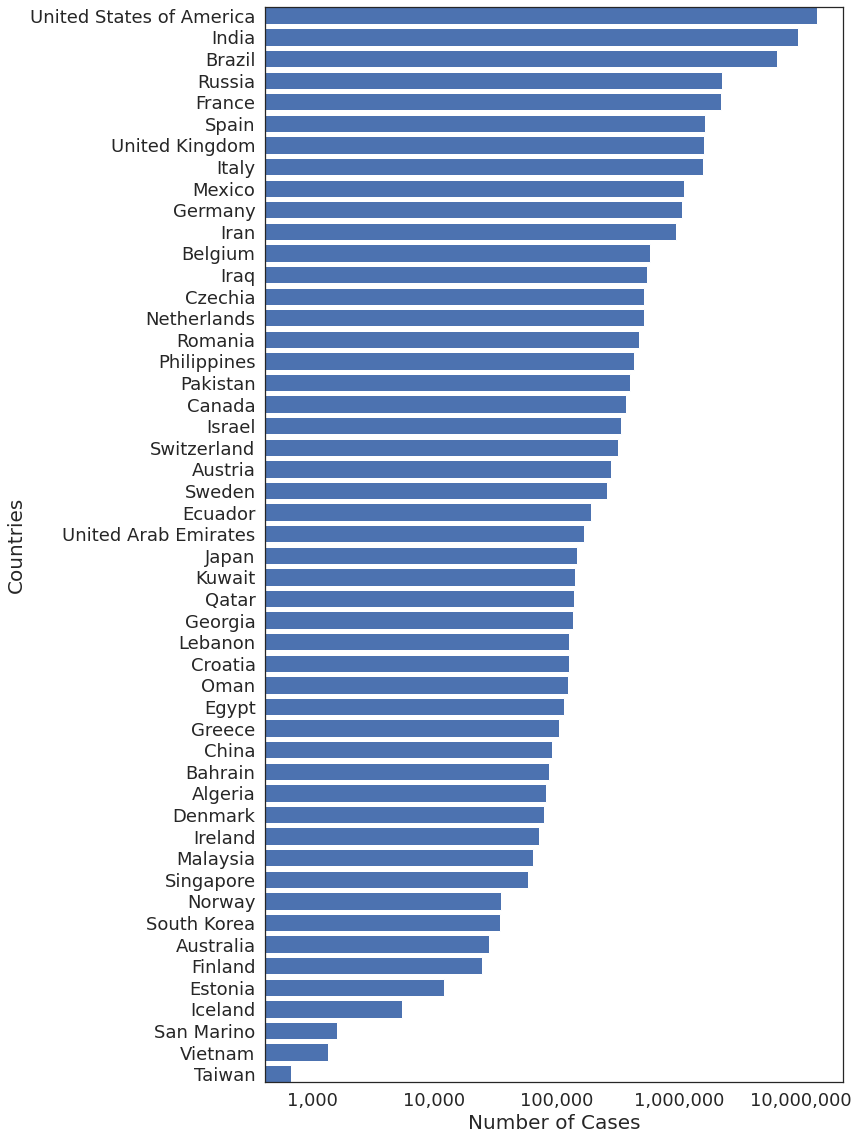

In [17]:
# Number of countries to plot on bar graph
num_country_plot = 50

df_plot_countries = df_top_countries.iloc[0:num_country_plot]

# Plotting graph
sns.set_theme(style='white')
plt.figure(figsize=(12,16))
top_countries_list = format_names(df_plot_countries.index)
plt.barh(top_countries_list[::-1], df_plot_countries['Total Cases'].values[::-1]) # Reversing the order to have heighest values at the top of bar chart
#plt.title(f'Top {len(top_countries)} Countries with Most Cases')
plt.xscale('log')
ax = plt.axes() # for updating axes values to plain text
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.margins(y=0)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('Number of Cases', fontsize=20)
plt.ylabel('Countries',fontsize=20)
plt.tight_layout()
plt.savefig(f'{bar_plot_path}/top_selected_country_cases.pdf')
plt.show()

In [18]:
"""
# Plotting graph
sns.set_theme(style='white')
plt.figure(figsize=(12,16), dpi=90)

#plt.bar(df_top_countries.index, df_top_countries['Total Cases'].values)
top_countries_list = format_names(df_top_countries.index)
plt.barh(top_countries_list, df_top_countries['Total Cases'].values)

#plt.axvline(Number_of_countries-0.5, 0,1, ls='--', c='black')
plt.axhline(y=(Number_of_countries-0.5), ls='--', c='black')

plt.title(f'Top {len(top_countries)} Countries with Most Cases')

plt.xscale('log')
ax = plt.axes() # for updating 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)  # To get labels in plain text 
#plt.xticks(rotation=90)
plt.margins(y=0)
plt.xlabel('Number of Cases')
plt.ylabel('Countries')
plt.show()
"""

"\n# Plotting graph\nsns.set_theme(style='white')\nplt.figure(figsize=(12,16), dpi=90)\n\n#plt.bar(df_top_countries.index, df_top_countries['Total Cases'].values)\ntop_countries_list = format_names(df_top_countries.index)\nplt.barh(top_countries_list, df_top_countries['Total Cases'].values)\n\n#plt.axvline(Number_of_countries-0.5, 0,1, ls='--', c='black')\nplt.axhline(y=(Number_of_countries-0.5), ls='--', c='black')\n\nplt.title(f'Top {len(top_countries)} Countries with Most Cases')\n\nplt.xscale('log')\nax = plt.axes() # for updating \nax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))\n\n#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)  # To get labels in plain text \n#plt.xticks(rotation=90)\nplt.margins(y=0)\nplt.xlabel('Number of Cases')\nplt.ylabel('Countries')\nplt.show()\n"

## Average cases of top selected countries

In [19]:
dict_countries_avg = Counter(total_countries)

for country in dict_countries.keys():
  dict_countries_avg[country] = df_grouped.get_group(country)['cases'].mean()

# Average cases for all countries
df_avg_cases_countries = pd.DataFrame.from_dict(dict_countries_avg, orient='index', columns=['Average'])

# List of top selected countries
top_countries = list(df_top_countries.index)

# Average of selected top countries
avg_df = df_avg_cases_countries[df_avg_cases_countries.index.isin(top_countries)]
avg_df

Average
Algeria                    248.402
Australia                   83.015
Austria                    827.923
Bahrain                    259.066
Belgium                   1719.735
Brazil                   18793.869
Canada                    1102.018
China                      273.256
Croatia                    380.216
Czechia                   1546.795
Denmark                    236.167
Ecuador                    580.414
Egypt                      348.015
Estonia                     36.411
Finland                     74.184
France                    6602.628
Georgia                    407.159
Germany                   3136.515
Greece                     312.057
Iceland                     16.015
India                    28154.301
Iran                      2823.658
Iraq                      1648.009
Ireland                    216.290
Israel                    1008.949
Italy                     4717.792
Japan                      436.786
Kuwait                     427.706
Lebanon                    382.361
Malaysia                   192.493
Mexico                    3294.854
Netherlands               1542.479
Norway                     103.414
Oman                       374.194
Pakistan                  1202.489
Philippines               1294.771
Qatar                      417.614
Romania                   1411.784
Russia                    6753.917
San_Marino                   4.734
Singapore                  173.253
South_Korea                101.789
Spain                     4905.318
Sweden                     766.554
Switzerland                943.503
Taiwan                       2.009
United_Arab_Emirates       508.342
United_Kingdom            4813.473
United_States_of_America 39831.312
Vietnam                      4.045

# Common Methods for All Experiments

In [21]:
countries = top_countries

## Common Methods

In [22]:
# Return a combined dataframe for a each error statistics(MAE,RMSE,MAPE etc) along with the newly added mean row.
def get_metric_with_mean(result: pd.DataFrame, error_metric: str)->pd.DataFrame:
  df_grouped = result.groupby('EvaluationMeasurement')
  df = df_grouped.get_group(error_metric).reset_index(drop=True)
  df = df.append(df.describe().loc['mean'])
  return df

In [23]:
def calc_mean_to_max_error(df, max_of_pretrain_days, max_of_df):
  i=-1
  for row_num in range(len(df)-1):  # Go before mean row
    i += 1
    for col_num in df.columns[2:]:
      df.loc[row_num,col_num] = df.loc[row_num,col_num]/max_of_pretrain_days[i] 
  
  for col in df.columns[2:]:
      df.loc['mean',col] = df.loc['mean',col]/max_of_df

  return df

In [24]:
# Note: Do not change the filenames, since they are later being used for visualizations 
def save_runtime(df,path,country=None,static_learner=True,alternate_batch=False, transpose=False):
  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  if country==None:
    if static_learner:
      df.to_latex(f'{path}/combined25country_runtime_static.tex')
      df.to_csv(f'{path}/combined25country_runtime_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_runtime_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_runtime_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_runtime_incremental.tex')
        df.to_csv(f'{path}/combined25country_runtime_incremental.csv')
  else:
    if static_learner:
      df.to_latex(f'{path}/{country}_runtime_static.tex')
      df.to_csv(f'{path}/{country}_runtime_static.csv')
    else:
      df.to_latex(f'{path}/{country}_runtime_incremental.tex')
      df.to_csv(f'{path}/{country}_runtime_incremental.csv')

In [25]:
# Note: Do not change the filenames, since they are later being used for visualizations 
def save_summary_table(df,path,country=False,static_learner=True,alternate_batch=False, transpose=False):

  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  if country:
    metric = df.loc['EvaluationMeasurement'].unique()[0]
    if static_learner:
      df.to_latex(f'{path}/top_countries_{metric}_summary_table_static.tex')
      df.to_csv(f'{path}/top_countries_{metric}_summary_table_static.csv')
    else:
      df.to_latex(f'{path}/top_countries_{metric}_summary_table_incremental.tex')
      df.to_csv(f'{path}/top_countries_{metric}_summary_table_incremental.csv')
    
  else:
    if static_learner:
      df.to_latex(f'{path}/combined25country_summary_table_static.tex')
      df.to_csv(f'{path}/combined25country_summary_table_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_summary_table_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_summary_table_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_summary_table_incremental.tex')
        df.to_csv(f'{path}/combined25country_summary_table_incremental.csv')
    

In [26]:
# Note: Do not change the filenames since they are later being used for visualizations
def save_metrics(df, path, country=None, static_learner=True, alternate_batch=False, transpose=False): 
  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  metric_type = df.loc['EvaluationMeasurement'].unique()[0]
  if country==None:
    if static_learner:
      df.to_latex(f'{path}/combined25country_{metric_type}_static.tex')
      df.to_csv(f'{path}/combined25country_{metric_type}_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_{metric_type}_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_{metric_type}_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_{metric_type}_incremental.tex')
        df.to_csv(f'{path}/combined25country_{metric_type}_incremental.csv')
  else:
    if static_learner:
      df.to_latex(f'{path}/{country}_{metric_type}_static.tex')
      df.to_csv(f'{path}/{country}_{metric_type}_static.csv')
    else:
      df.to_latex(f'{path}/{country}_{metric_type}_incremental.tex')
      df.to_csv(f'{path}/{country}_{metric_type}_incremental.csv')

In [27]:
def save_combined_summary_table(df, path, static_learner=False,transpose=False):
  df = df.apply(pd.to_numeric,errors='ignore')
  df = df.round(decimal)
  if transpose:
    df = df.transpose()
  
  if static_learner:
    save_path = f'{path}/summary_table_combined_mean_static'
  else:
    save_path = f'{path}/summary_table_combined_mean_incremental'

  df.to_csv(f'{save_path}.csv')
  df.to_latex(f'{save_path}.tex')

In [28]:
def save_united_df(df, path, country=None):
    if country:
        df.to_csv(f'{path}/{country}.csv')
    else:
        df.to_csv(f'{path}/united_df.csv')



In [29]:
def display_runtime_per_country(results_runtime,countries):
  for i in range(len(countries)):
    print(f'_____________Running Time for {countries[i]}________________')
    print(results_runtime[i].to_string())
    print('\n')

In [30]:
def calc_save_err_metric_countrywise(countries, error_metrics, results, max_of_pretrain_per_country, max_cases_per_country, path, static_learner, transpose):
  countrywise_error_scores={}
  for i in range(len(countries)):
    country_error_score = []
    for error_metric in error_metrics:
      
      df_error_metric = get_metric_with_mean(results[i], error_metric=error_metric)

      #if error_metric != 'MAPE':
      #  df_error_metric = calc_mean_to_max_error(df_error_metric, max_of_pretrain_per_country[i], max_cases_per_country[i])

      country_error_score.append(df_error_metric)
      display_countrywise_scores(countries[i],df_error_metric)

      # Transposing the metrics while saving
      save_metrics(df_error_metric, path=path, country=countries[i], static_learner=static_learner, transpose=transpose)
      
    countrywise_error_scores[countries[i]] = pd.concat(country_error_score,ignore_index=True)
    
  return countrywise_error_scores

In [31]:
def calc_save_err_metric_combined(error_metrics, results, max_of_pretrain_days, max_selected_countries, path, static_learner, alternate_batch, transpose):
  combined_err_metric = []
  for error_metric in error_metrics:
    df_error_metric = get_metric_with_mean(results, error_metric=error_metric)

    #if error_metric != 'MAPE':
    #  df_error_metric = calc_mean_to_max_error(df_error_metric, max_of_pretrain_days, max_selected_countries)

    # Transposing the metrics while saving
    save_metrics(df_error_metric, path=path, static_learner=static_learner, alternate_batch=alternate_batch, transpose=transpose)
    
    combined_err_metric.append(df_error_metric)
  return (pd.concat(combined_err_metric, ignore_index=True))

In [32]:
def get_summary_table(df_result, df_runtime_result, error_metrics, static_learner=True):
  sum_metric=[]
  measure_col_name = 'Metric'
  
  # Setting start row and column for static and incremental learner
  for metric in error_metrics:
    start_row = 'mean'
    if static_learner:
      start_col='RandomForest'
    else:
      start_col='HT_Reg'

    df_metric = get_metric_with_mean(df_result, metric)
    df_row = pd.DataFrame([df_metric.loc[start_row][start_col:]])
    
    df_row[measure_col_name] = str(metric)    
    sum_metric.append(df_row)

  # Adding run time
  df_runtime_row = pd.DataFrame([df_runtime_result.describe().loc[start_row][start_col:]])
  df_runtime_row[measure_col_name]='Time(sec)'
  sum_metric.append(df_runtime_row)

  df_summary = pd.concat(sum_metric, ignore_index=True)
  df_summary.set_index(measure_col_name, inplace=True)

  return df_summary

In [33]:
def get_summary_table_countrywise(df_result_dict, error_metrics, static_learner=True):  #df_runtime_result,
  summary_metric=[]
  measure_col_name = f'Country({str(error_metrics[0])})'
  eval_measure_col = 'EvaluationMeasurement'
  start_row = 'mean'
  if static_learner:
    start_col='RandomForest'
  else:
    start_col='HT_Reg'

  for country in df_result_dict.keys():
    df_result = df_result_dict[country]

    # Setting start row and column for static and incremental learner
    for metric in error_metrics:      
      df_metric = get_metric_with_mean(df_result, metric)
      df_row = pd.DataFrame([df_metric.loc[start_row][start_col:]])
      df_row[eval_measure_col] = metric
      df_row[measure_col_name] = country
      summary_metric.append(df_row)

  df_summary = pd.concat(summary_metric, ignore_index=True)
  df_summary.set_index(measure_col_name, inplace=True)

  return df_summary

In [34]:
def get_sum_table_combined_mean(countrywise_error_score_incremental,results_runtime, static_learner=False):
  sum_table_combined_mean=[]
  measure_col_name = 'Metric'
  start_row = 'mean'
  if static_learner:
    start_col = 'RandomForest'
  else:
    start_col= 'HT_Reg'

  for metric in error_metrics:
    df_sum_cur_metric = get_summary_table_countrywise(countrywise_error_score_incremental, [metric], static_learner=static_learner)
    df_row = pd.DataFrame([df_sum_cur_metric.describe().loc[start_row]])

    df_row[measure_col_name] = metric
    sum_table_combined_mean.append(df_row)

  # Adding run time
  df_runtime = pd.concat(results_runtime, ignore_index=True).describe().loc[start_row][start_col:]
  df_runtime_row = pd.DataFrame([df_runtime])
  df_runtime_row[measure_col_name]='Time(sec)'
  sum_table_combined_mean.append(df_runtime_row)

  # Concating results to one dataframe
  sum_table_combined_mean = pd.concat(sum_table_combined_mean, ignore_index=True)
  sum_table_combined_mean.set_index(measure_col_name, inplace=True)
  return sum_table_combined_mean

In [35]:
def check_significance(target_pop, competitor_pop, significance_at: float):
    """
    Comparing algorithms per batch or per country pairs (exp 2 or 1 respectively), 
      so for each pair, we compare the significance of the best algo to all of the the other algos.
    Ttest performed if the distribution is normal, otherwise we perform a non-parametric test.
    """
    model_pop, population = target_pop, competitor_pop  
    
    # Normality tests
    if len(model_pop) >= 8:  # skew test not valid for smaller populations
      value_mdl, p_mdl = normaltest(model_pop.values)
      value_pop, p_pop = normaltest(population.values)
      if (p_mdl >= 0.05) & (p_pop >= 0.05):
          # print('It is likely that both populations are normal. Thus, running T-Test...')
          tset, pval = stats.ttest_ind(model_pop, population)
          if pval < significance_at:    # alpha value is 0.05 or 5%
              significant = 'Significant (Ttest)'
          else:
              significant = 'Not Significant (Ttest)'
      else:
          # print('It is unlikely that the result is normal. Thus, running Wilcoxon test...')
          if np.sum(np.subtract(list(model_pop), list(competitor_pop))) != 0.0:  # if values are identical the test will crash, but we now it's not significant
              tset, pval = stats.wilcoxon(model_pop, population)
              if pval < significance_at:    # alpha value is 0.05 or 5%
                  significant = 'Significant (Wilcox Test)'
              else:
                  significant = 'Not Significant (Wilcox Test)'
          else:
              # print('Warning: results are identical')
              tset, pval = stats.ttest_ind(model_pop, population)
              significant = 'Not Significant (Wilcox Test)'
    else:
      print('Population too small.')
      if np.sum(np.subtract(list(model_pop), list(competitor_pop))) != 0.0:  # if values are identical the test will crash, but we now it's not significant
          tset, pval = stats.wilcoxon(model_pop, population)
          if pval < significance_at:    # alpha value is 0.05 or 5%
              significant = 'Significant (Wilcox Test)'
          else:
              significant = 'Not Significant (Wilcox Test)'
    return pval, significant 

In [36]:
def unit_incremental_df(country_name, evaluator, date, milestone):  # Added Now
    frame = {}
    frame['date'] = date
    if type(country_name) == pd.Series:
        frame['Country'] = country_name
    else:
        frame['Country'] = [country_name] * len(date)
    frame['Milestone'] = [milestone] * len(date)
    frame['y_true'] = evaluator.mean_eval_measurements[0].y_true_vector
    for i in range(len(evaluator.model_names)):
        frame[f'pred_{evaluator.model_names[i]}'] = evaluator.mean_eval_measurements[i].y_pred_vector
    return pd.DataFrame(frame)



def unit_static_df(country_name, date, y_true,  milestone, model_predictions):  # Added Now
    frame = {}
    frame['date'] = date
    if type(country_name) == pd.Series:
        frame['Country'] = country_name
    else:
        frame['Country'] = [country_name] * len(date)

    frame['Milestone'] = [milestone] * len(date)
    frame['y_true'] = y_true

    for algo, y_pred in model_predictions.items():  # Updated Now
        if algo == 'LSTM':
            frame[f'pred_{algo}'] = y_pred.flatten().tolist()
        else:
            frame[f'pred_{algo}'] = y_pred

    return pd.DataFrame(frame)

## Combining Dataset

In [37]:
'''
def sortby_date_and_set_index(df):
  df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
  df.sort_values('date', inplace=True)
  df.set_index('date', inplace=True)
  return df
'''

def sortby_date_and_set_index(df):  # Updated
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
    df.sort_values('date', inplace=True)
    # df.set_index('date', inplace=True) #TODO:  Not setting date as idx; Might need to remove this line later
    return df

In [38]:
def get_dataset_with_target(countries, df_grouped):
    # Empty list to store Dataframes of each country
    frames = []

    for country in countries:
        df = df_grouped.get_group(country)

        # Creating feature 'day_no'
        df['day_no'] = pd.Series([i for i in range(1, len(df) + 1)], index=df.index)

        # Reordering features
        # df = df[['day_no', 'country', 'cases']]
        df = df[['date', 'day_no', 'country', 'cases']]  # Added: Date column

        # Adding features through lags
        df = create_features_with_lags(df)

        # Creating target with last 10 days cases
        idx_cases = list(df.columns).index('cases')  # Added: Earlier hard coded idx
        df['target'] = df.iloc[:, [idx_cases] + [i * -1 for i in range(1, 10)]].mean(axis=1)  # Updated: Replacing idx with idx_cases

        # Dropping null columns
        df.dropna(how='any', axis=0, inplace=True)

        # Dropping mid columns
        drop_columns = list(df.loc[:, 'cases_t-39':'cases_t-1'].columns)  # Updated: cases_t-38 to t-39 for exact 50 columns of lags
        df.drop(drop_columns, axis=1, inplace=True)

        frames.append(df)

    return (pd.concat(frames, ignore_index=True))

In [39]:
def reshape_dataframe(*data: np.ndarray):
    # This function adds an extra dimension which is necessary in the LSTM
    arr = []
    for d in data:
        arr.append(np.reshape(np.array(d), (d.shape[0], 1, d.shape[1])))
    return arr

In [40]:
def get_countries_sortedby_cases(valid_countries, df_grouped):
  # A dictionary of all countries
  dict_countries = Counter(valid_countries)

  for country in dict_countries.keys():
    dict_countries[country] = df_grouped.get_group(country)['cases'].sum()

  # Sorting countries based on number of cases
  countries_sortedby_cases = sorted(dict_countries.items(), key=lambda dict_countries: dict_countries[1], reverse=True)

  # Creating dataframe 
  df_countries_sortedbycases = pd.DataFrame.from_dict(dict(countries_sortedby_cases), orient='index', columns=['Total Cases'])
  
  return df_countries_sortedbycases

In [41]:
# Getting a list of valid countries
def get_countries_with_valid_size(df):
  total_countries = list(df_grouped.groups.keys())

  # A list for countries with required datasize
  valid_countries = []

  # List of countries with more than 230 records. Because, max training size = 150, lags removed = 50, prediction = 30.
  for country in total_countries:
    if len(df_grouped.get_group(country)) >= 230:
      valid_countries.append(country)

  return valid_countries

In [42]:
def preprocess_dataset(df):  
  # Selecting required features
  df= df[['dateRep','cases','countriesAndTerritories']]

  # Rename features
  df.rename(columns={'countriesAndTerritories':'country', 'dateRep':'date'}, inplace=True)

  # Convert to date, sort and set index
  df = sortby_date_and_set_index(df)

  return df

In [43]:
# Calculating maximum of dataframe for every pretrain size
def calc_max_of_pretrain_days(pretrain_days,df)->list:
  max_of_pretrain_days = []
  
  for day in pretrain_days:
    df_subset = create_subset(df,day)
    max_of_pretrain_days.append(df_subset['cases'].max())
  
  return max_of_pretrain_days

In [44]:
def display_scores(results):
  #print(f'_________________________________{country}____________________________________________')
  df_MAE = get_metric_with_mean(results,'MAE' )
  df_RMSE = get_metric_with_mean(results,'RMSE')
  df_MAPE = get_metric_with_mean(results,'MAPE')
  print('MAE Score')
  print(df_MAE.to_string())
  print('-----------------------------------------------------------------------------------')
  print('RMSE Score')
  print(df_RMSE.to_string())
  print('-----------------------------------------------------------------------------------')
  print('MAPE Score')
  print(df_MAPE.to_string())
  print('\n\n')

## Alternate Batch

In [45]:
def get_alternate_batch_records_idx(batch_size,total_records): 
  total_batches = total_records//batch_size
  current_batch=1
  start_idx = 0
  end_idx = batch_size
  idx_list = []
  
  while current_batch <= total_batches:
    if current_batch%2!=0:
      idx_list.extend([x for x in range(start_idx,end_idx)])
      start_idx = idx_list[-1]+(batch_size+1)
      end_idx = start_idx + batch_size
    current_batch += 1

  return idx_list

In [46]:
def create_alternate_batch_subset(df,days,batch_size):
  df_grouped = df.groupby('country')
  countries = df['country'].unique()
  frame1,frame2 = [],[]

  for country in countries:
    df_cur_country = df_grouped.get_group(country)

    df1 = df_cur_country.iloc[0:days//2]
    df2 = df_cur_country.iloc[days:days+30]  # Adding 30 for a testing batch that is one month ahead
    
    # Selecting alternate batches
    idx = get_alternate_batch_records_idx(batch_size,total_records=len(df2))
    df2 = df2.iloc[idx]

    # Appending dataframes
    frame1.append(df1)
    frame2.append(df2)

  r1 = pd.concat(frame1, ignore_index=True)
  r2 = pd.concat(frame2, ignore_index=True)
  r = r1.append(r2, ignore_index=True)
  
  return (r)

## Incremental Learner

In [47]:
def instantiate_regressors():
  ht_reg = HoeffdingTreeRegressor()
  hat_reg = HoeffdingAdaptiveTreeRegressor()
  arf_reg = AdaptiveRandomForestRegressor()
  pa_reg = PassiveAggressiveRegressor(max_iter=1, random_state=0, tol=1e-3)

  model = [ht_reg, hat_reg, arf_reg, pa_reg]
  model_names = ['HT_Reg', 'HAT_Reg', 'ARF_Reg', 'PA_Reg']

  return model, model_names

In [48]:
def get_error_scores_per_model(evaluator, mdl_evaluation_scores)-> pd.DataFrame:
  
  for i in range(len(evaluator.model_names)):
    # Desired error metrics
    mse = evaluator.mean_eval_measurements[i].get_mean_square_error()
    mae = evaluator.mean_eval_measurements[i].get_average_error()
    mape = evaluator.mean_eval_measurements[i].get_mean_absolute_percentage_error()
    rmse = sqrt(mse)

    # Dictionary of errors per model
    mdl_evaluation_scores[str(evaluator.model_names[i])] = [rmse, mae, mape]

  return(pd.DataFrame(mdl_evaluation_scores))


In [49]:
def get_running_time_per_model_incremental_learner(evaluator,day):
    cols = ['PretrainDays']  # Adding pretrain as first column
    cols += evaluator.model_names  # Adding remaining columns of different algorithm
    running_time = []
    running_time.append(day)
    for i in range(len(evaluator.model_names)):
        running_time.append(evaluator.running_time_measurements[i]._total_time)

    return (pd.DataFrame([running_time],columns=cols))  # Passing running_time as a list of list to insert it as a row

In [50]:
def display_countrywise_scores(country,df_error_metric):
  print(f'_________________________________{country}____________________________________________')
  print(df_error_metric.to_string())
  print('\n\n')

In [51]:
# Create a dataframe of all countries with pre-train size = pretrain days and test&train size = pretrain days
def create_subset(result,days):
  result_grouped = result.groupby('country')
  countries = result['country'].unique()
  frame1,frame2 = [],[]
  for country in countries:
    df = result_grouped.get_group(country) 
    df1 = df.iloc[0:days]
    df2 = df.iloc[days:days+30]
    frame1.append(df1)
    frame2.append(df2)

  r1 = pd.concat(frame1, ignore_index=True)
  r2 = pd.concat(frame2, ignore_index=True)
  r = r1.append(r2, ignore_index=True)
  
  return (r)

## Static Learner

In [52]:
def mean_absolute_percentage_error(actual, predicted):
    """
    Mean absolute percentage error (MAPE).
    :return error
    """
    actual =  np.array(actual) 
    predicted = np.array(predicted) 

    mask = actual != 0
    return (np.fabs(actual - predicted) / np.fabs(actual))[mask].mean()

In [53]:
def get_scores(y_true, model_predictions, days):
    mdl_evaluation_scores = {}
    mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE', 'MAE', 'MAPE']
    mdl_evaluation_scores['PretrainDays'] = [days] * len(mdl_evaluation_scores['EvaluationMeasurement'])

    for model in model_predictions:
        y_pred = model_predictions[model]
        if model == 'LSTM':
            rmse = mean_squared_error(y_true[:, np.newaxis], y_pred, squared=False)
            mae = mean_absolute_error(y_true[:, np.newaxis], y_pred)
            mape = mean_absolute_percentage_error(y_true[:, np.newaxis], y_pred)
        else:
            rmse = mean_squared_error(y_true, y_pred, squared=False)
            mae = mean_absolute_error(y_true, y_pred)
            mape = mean_absolute_percentage_error(y_true, y_pred)

        mdl_evaluation_scores[model] = [rmse, mae, mape]
    return pd.DataFrame(mdl_evaluation_scores)

In [54]:
def get_running_time_per_model_static_learner(model_predictions,total_execution_time):
    cols = ['PretrainDays']
    cols += model_predictions.keys()
    return pd.DataFrame(total_execution_time, columns=cols)


def measure(wrapped_func):
    @wraps(wrapped_func)
    def _time_it(*args, **kwargs):
        start = pc_timer()
        try:
            model_predictions = wrapped_func(*args, **kwargs)
        finally:
            end_ = pc_timer() - start
            return model_predictions, end_
    return _time_it


@measure
def train_test_model(regressor, X_train, y_train, X_test):
    regressor.fit(X_train, y_train)
    return regressor.predict(X_test)


@measure
def train_test_lstm(regressor, X_train_lstm, y_train, X_val_lstm, y_val, X_test_lstm, patience, epochs, batch_size_lstm):
    regressor.compile(loss='mae', optimizer='adagrad', metrics=['mse', 'mae'])

    history = regressor.fit(
        X_train_lstm,
        y_train,
        validation_data=(X_val_lstm, y_val),
        epochs=epochs,
        batch_size=batch_size_lstm,
        callbacks=[EarlyStopping(monitor='val_loss',
                                 mode='min',
                                 patience=patience)])

    return regressor.predict(X_test_lstm)

In [55]:
def define_lstm_model(x_train_lstm, layers, activations, patience):
    # Start defining the model
    input_shape = x_train_lstm.shape

    # Definining model first with LSTM n layers
    model = Sequential()
    model.add(LSTM(layers[0], input_shape=input_shape[1:], activation=activations[0], return_sequences=True))

    # Adding middle layers
    for l in range(1, len(layers)-1):
      model.add(LSTM(layers[l], activation=activations[l], return_sequences=True))
      model.add(Dropout(0.2))

    # Add last Dense and LSTMs layers
    if len(layers) > 1:
      model.add(Dense(layers[-1], activation=activations[-1]))
      model.add(Dropout(0.2))
      model.add(LSTM(layers[-1], activation=activations[-1]))

    model.add(Dense(1))  # output layer. Since we have only 1 output value
    # End defining model

    return model


In [56]:
def normalize_dataset(*dataframes):
    arr = []
    for df in dataframes:
        arr.append(StandardScaler().fit_transform(df))
    return arr

In [57]:
def get_validation_set(df_train, batch_size=10):  # Updated Now
    '''
    lst_idx = -1
    total_batches = len(df_train) // batch_size
    train_set, val_set = [], []

    for cur_batch in range(total_batches):
        start = lst_idx + 1
        end = start + batch_size
        if cur_batch % 2 == 0:
            train_set.append(df_train.iloc[start:end])
        else:
            val_set.append(df_train.iloc[start:end])

        lst_idx = end - 1  # adjusting last index because we add 1 in starting
    '''
    train_set, val_set = [], []
    countries = df_train['country'].unique()
    for country in countries:
        train_set.append(df_train[df_train['country'] == country].iloc[:-batch_size, :])
        val_set.append(df_train[df_train['country'] == country].iloc[-batch_size:])
    return pd.concat(train_set, ignore_index=True), pd.concat(val_set, ignore_index=True)

# Experiment 1
Training and testing with five countries individually. 

### Dataset Description

* cases(t): Number of cases on current day(Column='cases') 

* cases(t-n): Number of cases 'n' days before current day 't'

* 30 day gap: Training from day number t-89 to t-39(50 days). Then a gap of 30 days and then creating target by averaging t to t-9(10 Days).


In [ ]:
# Sample set for understanding dataset
sample_df = pd.read_csv(f'{csv_processed_path}/United_States_of_America.csv')
sample_df.head(5)

FileNotFoundError: ignored

## Incremental Learner

In [ ]:
def reset_evaluator(evaluator):  # Added Now
  for j in range(evaluator.n_models):
      evaluator.mean_eval_measurements[j].reset()
      evaluator.current_eval_measurements[j].reset()
  return evaluator


def update_incremental_metrics(evaluator, y, prediction):  # Added Now
  for j in range(evaluator.n_models):
    for i in range(len(prediction[0])):
      evaluator.mean_eval_measurements[j].add_result(y[i], prediction[j][i])
      evaluator.current_eval_measurements[j].add_result(y[i], prediction[j][i])

    # Adding result manually causes y_true_vector to have a objects inserted like array([123.45]) in a list.
    # For calculating metrics we have to convert them into flat list.
    evaluator.mean_eval_measurements[j].y_true_vector = np.array(evaluator.mean_eval_measurements[j].y_true_vector).flatten().tolist()
    evaluator.current_eval_measurements[j].y_true_vector = np.array(evaluator.current_eval_measurements[j].y_true_vector).flatten().tolist()
  return evaluator


def get_error_scores_per_model(evaluator, mdl_evaluation_scores) -> pd.DataFrame:
  for i in range(len(evaluator.model_names)):
    # Desired error metrics
    mse = evaluator.mean_eval_measurements[i].get_mean_square_error()
    mae = evaluator.mean_eval_measurements[i].get_average_error()
    mae = mae[0]  # get_average_error() is returning a List instead of single value.  # Updated Now
    mape = evaluator.mean_eval_measurements[i].get_mean_absolute_percentage_error()
    rmse = sqrt(mse)

    # Dictionary of errors per model
    mdl_evaluation_scores[str(evaluator.model_names[i])] = [rmse, mae, mape]
  return (pd.DataFrame(mdl_evaluation_scores))

In [ ]:
"""
# Old

def scikit_multiflow(df, pretrain_days):

  # Creating a stream from dataframe
  stream = DataStream(np.array(df.iloc[:,4:-1]), y=np.array(df.iloc[:,-1])) # Selecting features x=[t-89:t-39] and y=[target]. TODO: Drop columns with name 

  model, model_names = instantiate_regressors()

  frames, running_time_frames = [], []

  # Setup the evaluator
  for day in pretrain_days:

      pretrain_days = day
      max_samples = pretrain_days + 30  #Testing on set one month ahead only

      '''evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=day,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'], 
                                    max_samples=max_samples)'''
      
      evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=day-1,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'], 
                                    max_samples=day)


      # Run evaluation
      evaluator.evaluate(stream=stream, model=model, model_names=model_names)

      # Dictionary to store each iteration error scores
      mdl_evaluation_scores = {}

      # Adding Evaluation Measurements and pretraining days
      mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE']
      mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])
      mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

      # Errors of each model on a specific pre-train days
      frames.append(mdl_evaluation_df)

      # Run time for each algorithm
      running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

  # Final Run Time DataFrame
  running_time_df = pd.concat(running_time_frames,ignore_index=True)

  # Final Evaluation Score Dataframe
  evaluation_scores_df = pd.concat(frames, ignore_index=True)
  return evaluation_scores_df, running_time_df

for country in countries:
  # Read each country  
  df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

  # Get evaluation scores and running time for country
  evaluation_scores_df, running_time_df = scikit_multiflow(df_country,pretrain_days)

  # Appending evaluation scores and runtime for each country
  results_incremental.append(evaluation_scores_df)
  results_runtime_incremental.append(running_time_df)

  # Get max of each pretrain subset and for each country dataset
  max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days,df_country))
  max_cases_per_country.append(df_country['cases'].max())
"""

"\n# Old\n\ndef scikit_multiflow(df, pretrain_days):\n\n  # Creating a stream from dataframe\n  stream = DataStream(np.array(df.iloc[:,4:-1]), y=np.array(df.iloc[:,-1])) # Selecting features x=[t-89:t-39] and y=[target]. TODO: Drop columns with name \n\n  model, model_names = instantiate_regressors()\n\n  frames, running_time_frames = [], []\n\n  # Setup the evaluator\n  for day in pretrain_days:\n\n      pretrain_days = day\n      max_samples = pretrain_days + 30  #Testing on set one month ahead only\n\n      '''evaluator = EvaluatePrequential(show_plot=False,\n                                    pretrain_size=day,\n                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'], \n                                    max_samples=max_samples)'''\n      \n      evaluator = EvaluatePrequential(show_plot=False,\n                                    pretrain_size=day-1,\n                                    metrics = ['mean_square_

In [ ]:
def scikit_multiflow(df, pretrain_days, country):  # Added Country in parameter
    # Creating a stream from dataframe
    stream = DataStream(np.array(df.iloc[:, 4:-1]), y=np.array(df.iloc[:, -1]))  # Selecting features x=[t-89:t-39] and y=[target].

    model, model_names = instantiate_regressors()

    frames, running_time_frames = [], []

    united_dataframe = []  # Added Now

    # Setup the evaluator
    for day in pretrain_days:
        pretrain_days = day
        # max_samples = pretrain_days + 30  # Training and then testing on set one month ahead only
        max_samples = pretrain_days + 1
        testing_samples_size = 30

        evaluator = EvaluatePrequential(show_plot=False,
                                        pretrain_size=pretrain_days,
                                        metrics=['mean_square_error', 'mean_absolute_error',
                                                 'mean_absolute_percentage_error'],
                                        max_samples=max_samples)

        # Run evaluation
        evaluator.evaluate(stream=stream, model=model, model_names=model_names)

        X = stream.X[pretrain_days: pretrain_days + testing_samples_size]
        y = stream.y[pretrain_days: pretrain_days + testing_samples_size]
        target_dates = df.iloc[pretrain_days: pretrain_days +testing_samples_size, 0]  # Added Now

        prediction = evaluator.predict(X)

        # Since we add one extra sample, reset the evaluator
        evaluator = reset_evaluator(evaluator)

        evaluator = update_incremental_metrics(evaluator, y, prediction)

        united_dataframe.append(unit_incremental_df(country, evaluator, target_dates, pretrain_days))  # Added now

        # Dictionary to store each iteration error scores
        mdl_evaluation_scores = {}

        # Adding Evaluation Measurements and pretraining days
        mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE', 'MAE', 'MAPE']
        mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])
        mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

        # Errors of each model on a specific pre-train days
        frames.append(mdl_evaluation_df)

        # Run time for each algorithm
        running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

    # Final Run Time DataFrame
    running_time_df = pd.concat(running_time_frames, ignore_index=True)

    # Final Evaluation Score Dataframe
    evaluation_scores_df = pd.concat(frames, ignore_index=True)

    united_dataframe = pd.concat(united_dataframe, ignore_index=True)  # Added Now
    return evaluation_scores_df, running_time_df, united_dataframe  # Added united_dataframe in return statement


In [ ]:
# Training all countries
results_incremental = []
results_runtime_incremental = []
max_of_pretrain_per_country = []
max_cases_per_country = []

for country in countries:
    # Read each country
    df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

    # Get evaluation scores and running time for country
    evaluation_scores_df, running_time_df, united_dataframe = scikit_multiflow(df_country,pretrain_days, country)

    save_united_df(united_dataframe, exp1_inc_united_df_path, country=country)

    # Appending evaluation scores and runtime for each country
    results_incremental.append(evaluation_scores_df)

    results_runtime_incremental.append(running_time_df)

    # Get max of each pretrain subset and for each country dataset
    max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days,df_country))
    max_cases_per_country.append(df_country['cases'].max())



NameError: ignored

In [ ]:
# Save the running time for each country
for i in range(len(countries)):
  save_runtime(results_runtime_incremental[i], path=exp1_runtime_path, country = countries[i], static_learner=False)

# Display countrywise running time complexity
display_runtime_per_country(results_runtime_incremental, countries)

NameError: ignored

In [ ]:
countrywise_error_score_incremental = calc_save_err_metric_countrywise(countries, error_metrics, results_incremental, max_of_pretrain_per_country, max_cases_per_country, path=exp1_path, static_learner=False, transpose=True)

In [ ]:
# Get summary table for each country for specified metric
summary_table_countrywise_incremental = get_summary_table_countrywise(countrywise_error_score_incremental, ['MAPE'], static_learner=False)

# Saving the summary table
save_summary_table(summary_table_countrywise_incremental, exp1_summary_path,country=True, static_learner=False,alternate_batch=False,transpose=True)

summary_table_countrywise_incremental

In [ ]:
sum_inc_countrywise_mean = get_sum_table_combined_mean(countrywise_error_score_incremental,results_runtime_incremental)
save_combined_summary_table(sum_inc_countrywise_mean, exp1_summary_path, static_learner=False, transpose=True) 
sum_inc_countrywise_mean

## Static Learner

In [ ]:
def scikit_learn(df, training_days, country):  #Added country now
    frames = []
    model_predictions = {
        'RandomForest': [],
        'GradientBoosting': [],
        'LinearSVR': [],
        'DecisionTree': [],
        'BayesianRidge': [],
        'LSTM': [] 
      # 'MLPRegressor': [],
      # 'LinearRegression': []
    }
    total_execution_time = []

    # params (others like epoch and batch size are also hardcoded in train_test_lstm())
    layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
    activations = ['tanh', 'tanh', 'relu']
    epochs = 500
    patience = 20
    batch_size_lstm = 10
    united_dataframe = []  # Added Now

    for day in training_days:
        testing_samples_size = 30  # Added Now
        cur_exec_time = [day]  # Keeping running time for each pre-train set
        target_dates = df.iloc[day: day + testing_samples_size, 0]  # Added Now
        train = df.iloc[:day, :]
        test = df.iloc[day:day + testing_samples_size, :]  # Testing on set one month ahead only, hence day+30.

        # training and test sets for all models except LSTM
        X_train, y_train = train.iloc[:, 4:-1], train.iloc[:, -1]
        X_test, y_test = test.iloc[:, 4:-1], test.iloc[:, -1]

        # Seperating validation set from train set
        train_df, val_df = get_validation_set(train, batch_size=10)

        # Splitting test and validation into dependent and independent sets
        X_train_batch, y_train_batch = train_df.iloc[:, 4:-1], train_df.iloc[:, -1]  # Consist only odd batches
        X_val_batch, y_val_batch = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

        # Normalizing dataset
        X_train_lstm_norm, X_test_lstm_norm, X_val_lstm_norm = normalize_dataset(X_train_batch, X_test, X_val_batch)

        # Reshaping the dataframes
        X_train_lstm, X_val_lstm, X_test_lstm = reshape_dataframe(X_train_lstm_norm, X_val_lstm_norm, X_test_lstm_norm)

        rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
        model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        gb_reg = GradientBoostingRegressor(random_state=0)
        model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        lsv_reg = LinearSVR(random_state=0, tol=1e-5)
        model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        dt_reg = DecisionTreeRegressor(random_state=0)
        model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        br_reg = BayesianRidge()
        model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
        model_predictions['LSTM'], exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train_batch, X_val_lstm, y_val_batch, X_test_lstm, patience, epochs, batch_size_lstm)
        cur_exec_time.append(exec_time)

        united_dataframe.append(unit_static_df(country, target_dates, y_test, day, model_predictions))  # Added now

        mdl_evaluation_df = get_scores(y_test, model_predictions, day)
        total_execution_time.append(cur_exec_time)
        frames.append(mdl_evaluation_df)

    evaluation_score_df = pd.concat(frames, ignore_index=True)
    united_dataframe = pd.concat(united_dataframe, ignore_index=True)  # Added Now
    running_time_df = get_running_time_per_model_static_learner(model_predictions, total_execution_time)
    return evaluation_score_df, running_time_df, united_dataframe


In [ ]:
results_static = []
results_runtime_static = []
max_of_pretrain_per_country = []
max_cases_per_country = []

for country in countries:
    # Read country wise csv file
    df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

    # Evaluation scores and running time of each algorithm over different pre-training days
    evaluation_scores_df, running_time_df, united_dataframe = scikit_learn(df_country, pretrain_days, country)  # Returning united_dataframe also

    save_united_df(united_dataframe, exp1_static_united_df_path, country=country)

    # Append result of each pretrain size in results
    results_static.append(evaluation_scores_df)

    # Appending every country runtime
    results_runtime_static.append(running_time_df)

    # Calculating max cases per country based on pre-train size
    max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days, df_country))

    # Maximum case of each country
    max_cases_per_country.append(df_country['cases'].max())

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 90ms/step - loss: 24611.8672 - mse: 649051776.0000 - mae: 24611.8672 - val_loss: 29278.5410 - val_mse: 857781440.0000 - val_mae: 29278.5410
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 24611.8418 - mse: 649050496.0000 - mae: 24611.8398 - val_loss: 29278.5195 - val_mse: 857780096.0000 - val_mae: 29278.5195
Epoch 3/500
20/20 [==============================] - 0s 914us/step - loss: 24611.8184 - mse: 649049344.0000 - mae: 24611.8184 - val_loss: 29278.4961 - val_mse: 857778816.0000 - val_mae: 29278.4961
Epoch 4/500
20/20 [==============================] - 0s 861us/step - loss: 24611.7939 - mse: 649048192.0000 - mae: 24611.7930 - val_loss: 29278.4727 - val_mse: 857777344.0000 - val_mae: 29278.4727
Epoch 5/500
20/20 [==============================] - 0s 866us/step - loss: 24611.7666 - mse: 649046720.0000 - mae: 24611.7656 - val_loss: 29278.4414 - val_mse: 857775552.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 34ms/step - loss: 26302.4742 - mse: 713714624.0000 - mae: 26302.4727 - val_loss: 22458.7539 - val_mse: 504743744.0000 - val_mae: 22458.7539
Epoch 2/500
50/50 [==============================] - 0s 625us/step - loss: 26302.4000 - mse: 713710720.0000 - mae: 26302.4004 - val_loss: 22458.6309 - val_mse: 504738208.0000 - val_mae: 22458.6309
Epoch 3/500
50/50 [==============================] - 0s 563us/step - loss: 26302.1137 - mse: 713696000.0000 - mae: 26302.1133 - val_loss: 22458.0117 - val_mse: 504710336.0000 - val_mae: 22458.0117
Epoch 4/500
50/50 [==============================] - 0s 558us/step - loss: 26300.5367 - mse: 713610496.0000 - mae: 26300.5371 - val_loss: 22455.9258 - val_mse: 504616608.0000 - val_mae: 22455.9258
Epoch 5/500
50/50 [==============================] - 0s 570us/step - loss: 26296.4594 - mse: 713397888.0000 - mae: 26296.4609 - val_loss: 22452.1914 - val_mse: 504448512

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 24614.9907 - mse: 624500864.0000 - mae: 24614.9902 - val_loss: 25531.6445 - val_mse: 659507008.0000 - val_mae: 25531.6445
Epoch 2/500
80/80 [==============================] - 0s 606us/step - loss: 24611.9307 - mse: 624348288.0000 - mae: 24611.9316 - val_loss: 25529.0430 - val_mse: 659390336.0000 - val_mae: 25529.0430
Epoch 3/500
80/80 [==============================] - 0s 562us/step - loss: 24599.7202 - mse: 623710336.0000 - mae: 24599.7207 - val_loss: 25520.1133 - val_mse: 658986176.0000 - val_mae: 25520.1133
Epoch 4/500
80/80 [==============================] - 0s 499us/step - loss: 24579.8020 - mse: 622681728.0000 - mae: 24579.8027 - val_loss: 25507.0391 - val_mse: 658389888.0000 - val_mae: 25507.0391
Epoch 5/500
80/80 [==============================] - 0s 528us/step - loss: 24550.9744 - mse: 621222336.0000 - mae: 24550.9746 - val_loss: 25490.0312 - val_mse: 657612928

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 15ms/step - loss: 28792.7033 - mse: 931269184.0000 - mae: 28792.7051 - val_loss: 65973.5625 - val_mse: 4354310656.0000 - val_mae: 65973.5625
Epoch 2/500
110/110 [==============================] - 0s 508us/step - loss: 28788.2496 - mse: 931030912.0000 - mae: 28788.2480 - val_loss: 65969.5156 - val_mse: 4353763840.0000 - val_mae: 65969.5156
Epoch 3/500
110/110 [==============================] - 0s 462us/step - loss: 28766.3581 - mse: 929847872.0000 - mae: 28766.3594 - val_loss: 65956.3984 - val_mse: 4351998976.0000 - val_mae: 65956.3984
Epoch 4/500
110/110 [==============================] - 0s 450us/step - loss: 28728.3468 - mse: 927741824.0000 - mae: 28728.3457 - val_loss: 65935.2500 - val_mse: 4349161984.0000 - val_mae: 65935.2500
Epoch 5/500
110/110 [==============================] - 0s 507us/step - loss: 28670.3848 - mse: 924566592.0000 - mae: 28670.3848 - val_loss: 65904.9375 - val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 35871.0149 - mse: 1556183936.0000 - mae: 35871.0156 - val_loss: 48379.1953 - val_mse: 2349037312.0000 - val_mae: 48379.1953
Epoch 2/500
140/140 [==============================] - 0s 521us/step - loss: 35868.7981 - mse: 1556015232.0000 - mae: 35868.7969 - val_loss: 48374.7734 - val_mse: 2348623104.0000 - val_mae: 48374.7734
Epoch 3/500
140/140 [==============================] - 0s 440us/step - loss: 35851.0518 - mse: 1554680576.0000 - mae: 35851.0508 - val_loss: 48360.2227 - val_mse: 2347260416.0000 - val_mae: 48360.2227
Epoch 4/500
140/140 [==============================] - 0s 538us/step - loss: 35819.2063 - mse: 1552513920.0000 - mae: 35819.2070 - val_loss: 48335.1211 - val_mse: 2344867072.0000 - val_mae: 48335.1211
Epoch 5/500
140/140 [==============================] - 0s 531us/step - loss: 35771.3970 - mse: 1549019136.0000 - mae: 35771.3945 - val_loss: 48300.1250 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 37113.1810 - mse: 1610370176.0000 - mae: 37113.1797 - val_loss: 38882.4258 - val_mse: 1517694208.0000 - val_mae: 38882.4258
Epoch 2/500
170/170 [==============================] - 0s 517us/step - loss: 37087.4885 - mse: 1608514944.0000 - mae: 37087.4883 - val_loss: 38844.3672 - val_mse: 1514769792.0000 - val_mae: 38844.3672
Epoch 3/500
170/170 [==============================] - 0s 497us/step - loss: 37028.0556 - mse: 1604128000.0000 - mae: 37028.0547 - val_loss: 38790.8477 - val_mse: 1510632832.0000 - val_mae: 38790.8477
Epoch 4/500
170/170 [==============================] - 0s 488us/step - loss: 36966.1109 - mse: 1599621376.0000 - mae: 36966.1133 - val_loss: 38728.2422 - val_mse: 1505790976.0000 - val_mae: 38728.2422
Epoch 5/500
170/170 [==============================] - 0s 467us/step - loss: 36888.8933 - mse: 1594024832.0000 - mae: 36888.8984 - val_loss: 38653.0078 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 94ms/step - loss: 467.9267 - mse: 295145.6562 - mae: 467.9267 - val_loss: 1253.0999 - val_mse: 1595502.6250 - val_mae: 1253.0999
Epoch 2/500
20/20 [==============================] - 0s 969us/step - loss: 467.8987 - mse: 295119.6875 - mae: 467.8987 - val_loss: 1253.0771 - val_mse: 1595445.7500 - val_mae: 1253.0771
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 467.8772 - mse: 295098.1875 - mae: 467.8771 - val_loss: 1253.0559 - val_mse: 1595392.3750 - val_mae: 1253.0559
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 467.8526 - mse: 295076.5000 - mae: 467.8526 - val_loss: 1253.0316 - val_mse: 1595331.7500 - val_mae: 1253.0316
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 467.8276 - mse: 295048.2500 - mae: 467.8275 - val_loss: 1253.0035 - val_mse: 1595261.5000 - val_mae: 1253.0035
Epoch 6/500
20/20 [==============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 33ms/step - loss: 1524.6568 - mse: 3647325.5000 - mae: 1524.6569 - val_loss: 5221.8511 - val_mse: 27775204.0000 - val_mae: 5221.8511
Epoch 2/500
50/50 [==============================] - 0s 815us/step - loss: 1524.6095 - mse: 3647205.5000 - mae: 1524.6094 - val_loss: 5221.7720 - val_mse: 27774438.0000 - val_mae: 5221.7720
Epoch 3/500
50/50 [==============================] - 0s 586us/step - loss: 1524.3860 - mse: 3646815.2500 - mae: 1524.3860 - val_loss: 5221.1904 - val_mse: 27769126.0000 - val_mae: 5221.1904
Epoch 4/500
50/50 [==============================] - 0s 559us/step - loss: 1522.8812 - mse: 3644299.5000 - mae: 1522.8812 - val_loss: 5219.1240 - val_mse: 27750234.0000 - val_mae: 5219.1240
Epoch 5/500
50/50 [==============================] - 0s 601us/step - loss: 1518.8967 - mse: 3636683.5000 - mae: 1518.8967 - val_loss: 5215.5068 - val_mse: 27716998.0000 - val_mae: 5215.5068
Epoch 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 3797.3566 - mse: 25441002.0000 - mae: 3797.3567 - val_loss: 13037.0527 - val_mse: 171846176.0000 - val_mae: 13037.0527
Epoch 2/500
80/80 [==============================] - 0s 655us/step - loss: 3796.0194 - mse: 25435648.0000 - mae: 3796.0190 - val_loss: 13033.6641 - val_mse: 171765280.0000 - val_mae: 13033.6641
Epoch 3/500
80/80 [==============================] - 0s 577us/step - loss: 3785.9420 - mse: 25390136.0000 - mae: 3785.9421 - val_loss: 13020.6660 - val_mse: 171447824.0000 - val_mae: 13020.6660
Epoch 4/500
80/80 [==============================] - 0s 580us/step - loss: 3766.3660 - mse: 25284406.0000 - mae: 3766.3660 - val_loss: 13000.5576 - val_mse: 170942176.0000 - val_mae: 13000.5576
Epoch 5/500
80/80 [==============================] - 0s 707us/step - loss: 3731.3682 - mse: 25065778.0000 - mae: 3731.3684 - val_loss: 12967.0879 - val_mse: 170098336.0000 - val_mae

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 15ms/step - loss: 7874.8733 - mse: 121395296.0000 - mae: 7874.8740 - val_loss: 35990.0742 - val_mse: 1314471040.0000 - val_mae: 35990.0742
Epoch 2/500
110/110 [==============================] - 0s 682us/step - loss: 7873.8133 - mse: 121389728.0000 - mae: 7873.8135 - val_loss: 35987.0469 - val_mse: 1314275968.0000 - val_mae: 35987.0469
Epoch 3/500
110/110 [==============================] - 0s 467us/step - loss: 7865.7593 - mse: 121321128.0000 - mae: 7865.7593 - val_loss: 35977.5430 - val_mse: 1313644544.0000 - val_mae: 35977.5430
Epoch 4/500
110/110 [==============================] - 0s 475us/step - loss: 7848.7549 - mse: 121160648.0000 - mae: 7848.7544 - val_loss: 35961.8750 - val_mse: 1312562560.0000 - val_mae: 35961.8750
Epoch 5/500
110/110 [==============================] - 0s 537us/step - loss: 7826.3600 - mse: 120881016.0000 - mae: 7826.3599 - val_loss: 35939.7891 - val_mse: 1311

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 16463.9474 - mse: 608855040.0000 - mae: 16463.9473 - val_loss: 63331.3984 - val_mse: 4012633344.0000 - val_mae: 63331.3984
Epoch 2/500
140/140 [==============================] - 0s 561us/step - loss: 16451.0951 - mse: 608665280.0000 - mae: 16451.0938 - val_loss: 63310.9180 - val_mse: 4010071552.0000 - val_mae: 63310.9180
Epoch 3/500
140/140 [==============================] - 0s 562us/step - loss: 16414.1440 - mse: 607876096.0000 - mae: 16414.1426 - val_loss: 63269.6250 - val_mse: 4004881152.0000 - val_mae: 63269.6250
Epoch 4/500
140/140 [==============================] - 0s 565us/step - loss: 16363.1984 - mse: 606560832.0000 - mae: 16363.1982 - val_loss: 63213.5938 - val_mse: 3997824512.0000 - val_mae: 63213.5938
Epoch 5/500
140/140 [==============================] - 0s 661us/step - loss: 16293.5452 - mse: 604220096.0000 - mae: 16293.5469 - val_loss: 63141.9922 - val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 26577.1314 - mse: 1478880128.0000 - mae: 26577.1289 - val_loss: 91205.6172 - val_mse: 8322076672.0000 - val_mae: 91205.6172
Epoch 2/500
170/170 [==============================] - 0s 519us/step - loss: 26555.1553 - mse: 1478484096.0000 - mae: 26555.1562 - val_loss: 91174.1562 - val_mse: 8316262912.0000 - val_mae: 91174.1562
Epoch 3/500
170/170 [==============================] - 0s 528us/step - loss: 26500.4535 - mse: 1477261952.0000 - mae: 26500.4531 - val_loss: 91121.9453 - val_mse: 8306651136.0000 - val_mae: 91121.9453
Epoch 4/500
170/170 [==============================] - 0s 546us/step - loss: 26430.8474 - mse: 1475142144.0000 - mae: 26430.8438 - val_loss: 91050.0469 - val_mse: 8293462016.0000 - val_mae: 91050.0469
Epoch 5/500
170/170 [==============================] - 0s 502us/step - loss: 26346.9728 - mse: 1472066688.0000 - mae: 26346.9727 - val_loss: 90959.7734 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 91ms/step - loss: 999.9335 - mse: 1218817.2500 - mae: 999.9336 - val_loss: 2437.6147 - val_mse: 6102584.0000 - val_mae: 2437.6147
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 999.9093 - mse: 1218768.2500 - mae: 999.9094 - val_loss: 2437.5942 - val_mse: 6102482.5000 - val_mae: 2437.5942
Epoch 3/500
20/20 [==============================] - 0s 996us/step - loss: 999.8886 - mse: 1218726.3750 - mae: 999.8885 - val_loss: 2437.5750 - val_mse: 6102389.5000 - val_mae: 2437.5750
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 999.8712 - mse: 1218693.6250 - mae: 999.8713 - val_loss: 2437.5554 - val_mse: 6102295.5000 - val_mae: 2437.5554
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 999.8499 - mse: 1218650.5000 - mae: 999.8499 - val_loss: 2437.5320 - val_mse: 6102185.0000 - val_mae: 2437.5320
Epoch 6/500
20/20 [=========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 33ms/step - loss: 3541.4831 - mse: 21182384.0000 - mae: 3541.4832 - val_loss: 13879.5098 - val_mse: 197002880.0000 - val_mae: 13879.5098
Epoch 2/500
50/50 [==============================] - 0s 795us/step - loss: 3541.1432 - mse: 21181028.0000 - mae: 3541.1431 - val_loss: 13878.3408 - val_mse: 196975328.0000 - val_mae: 13878.3408
Epoch 3/500
50/50 [==============================] - 0s 684us/step - loss: 3536.6845 - mse: 21162596.0000 - mae: 3536.6846 - val_loss: 13871.8096 - val_mse: 196818736.0000 - val_mae: 13871.8096
Epoch 4/500
50/50 [==============================] - 0s 657us/step - loss: 3524.3104 - mse: 21120400.0000 - mae: 3524.3101 - val_loss: 13862.4551 - val_mse: 196592688.0000 - val_mae: 13862.4551
Epoch 5/500
50/50 [==============================] - 0s 663us/step - loss: 3512.4232 - mse: 21054766.0000 - mae: 3512.4231 - val_loss: 13852.0342 - val_mse: 196339536.0000 - val_mae

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 9755.5756 - mse: 175142288.0000 - mae: 9755.5762 - val_loss: 28893.7812 - val_mse: 841204672.0000 - val_mae: 28893.7812
Epoch 2/500
80/80 [==============================] - 0s 530us/step - loss: 9755.2083 - mse: 175138144.0000 - mae: 9755.2090 - val_loss: 28892.9434 - val_mse: 841159296.0000 - val_mae: 28892.9434
Epoch 3/500
80/80 [==============================] - 0s 653us/step - loss: 9752.3863 - mse: 175109776.0000 - mae: 9752.3867 - val_loss: 28889.3164 - val_mse: 840959872.0000 - val_mae: 28889.3164
Epoch 4/500
80/80 [==============================] - 0s 606us/step - loss: 9745.3454 - mse: 175023840.0000 - mae: 9745.3457 - val_loss: 28883.9062 - val_mse: 840657280.0000 - val_mae: 28883.9062
Epoch 5/500
80/80 [==============================] - 0s 708us/step - loss: 9735.9738 - mse: 174883280.0000 - mae: 9735.9746 - val_loss: 28877.0879 - val_mse: 840270848.0000 - va

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 15ms/step - loss: 16388.2626 - mse: 448965504.0000 - mae: 16388.2656 - val_loss: 37181.5234 - val_mse: 1395521280.0000 - val_mae: 37181.5234
Epoch 2/500
110/110 [==============================] - 0s 549us/step - loss: 16384.9910 - mse: 448905152.0000 - mae: 16384.9922 - val_loss: 37176.3945 - val_mse: 1395143296.0000 - val_mae: 37176.3945
Epoch 3/500
110/110 [==============================] - 0s 486us/step - loss: 16370.8980 - mse: 448637856.0000 - mae: 16370.8984 - val_loss: 37162.5742 - val_mse: 1394130688.0000 - val_mae: 37162.5742
Epoch 4/500
110/110 [==============================] - 0s 500us/step - loss: 16342.2631 - mse: 447961280.0000 - mae: 16342.2627 - val_loss: 37138.8047 - val_mse: 1392385792.0000 - val_mae: 37138.8047
Epoch 5/500
110/110 [==============================] - 0s 567us/step - loss: 16299.3838 - mse: 447043616.0000 - mae: 16299.3828 - val_loss: 37099.8203 - val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 14ms/step - loss: 21854.4566 - mse: 733897024.0000 - mae: 21854.4570 - val_loss: 41123.2305 - val_mse: 1700434944.0000 - val_mae: 41123.2305
Epoch 2/500
140/140 [==============================] - 0s 620us/step - loss: 21851.8940 - mse: 733790464.0000 - mae: 21851.8945 - val_loss: 41121.2109 - val_mse: 1700262784.0000 - val_mae: 41121.2109
Epoch 3/500
140/140 [==============================] - 0s 621us/step - loss: 21839.3330 - mse: 733335104.0000 - mae: 21839.3320 - val_loss: 41113.7578 - val_mse: 1699630464.0000 - val_mae: 41113.7578
Epoch 4/500
140/140 [==============================] - 0s 590us/step - loss: 21815.4547 - mse: 732462528.0000 - mae: 21815.4551 - val_loss: 41098.3633 - val_mse: 1698335488.0000 - val_mae: 41098.3633
Epoch 5/500
140/140 [==============================] - 0s 626us/step - loss: 21783.7291 - mse: 731259968.0000 - mae: 21783.7285 - val_loss: 41074.3984 - val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 24711.8903 - mse: 862768896.0000 - mae: 24711.8906 - val_loss: 29170.7441 - val_mse: 857779264.0000 - val_mae: 29170.7441
Epoch 2/500
170/170 [==============================] - 0s 517us/step - loss: 24705.6241 - mse: 862551744.0000 - mae: 24705.6230 - val_loss: 29168.0566 - val_mse: 857620288.0000 - val_mae: 29168.0566
Epoch 3/500
170/170 [==============================] - 0s 611us/step - loss: 24675.7831 - mse: 861321344.0000 - mae: 24675.7832 - val_loss: 29150.4492 - val_mse: 856591680.0000 - val_mae: 29150.4492
Epoch 4/500
170/170 [==============================] - 0s 612us/step - loss: 24609.2614 - mse: 858167040.0000 - mae: 24609.2617 - val_loss: 29106.4844 - val_mse: 854022848.0000 - val_mae: 29106.4844
Epoch 5/500
170/170 [==============================] - 0s 551us/step - loss: 24517.2403 - mse: 854085696.0000 - mae: 24517.2383 - val_loss: 29038.4258 - val_mse

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 93ms/step - loss: 773.4403 - mse: 960357.3750 - mae: 773.4402 - val_loss: 3970.3657 - val_mse: 16573123.0000 - val_mae: 3970.3657
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 773.4087 - mse: 960304.1875 - mae: 773.4087 - val_loss: 3970.3384 - val_mse: 16572909.0000 - val_mae: 3970.3384
Epoch 3/500
20/20 [==============================] - 0s 924us/step - loss: 773.3808 - mse: 960261.1250 - mae: 773.3807 - val_loss: 3970.3113 - val_mse: 16572693.0000 - val_mae: 3970.3113
Epoch 4/500
20/20 [==============================] - 0s 869us/step - loss: 773.3510 - mse: 960213.6250 - mae: 773.3510 - val_loss: 3970.2808 - val_mse: 16572454.0000 - val_mae: 3970.2808
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 773.3238 - mse: 960179.1875 - mae: 773.3237 - val_loss: 3970.2480 - val_mse: 16572197.0000 - val_mae: 3970.2480
Epoch 6/500
20/20 [=======

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 34ms/step - loss: 4503.2428 - mse: 34180400.0000 - mae: 4503.2427 - val_loss: 9648.3242 - val_mse: 93329936.0000 - val_mae: 9648.3242
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 4503.1826 - mse: 34179928.0000 - mae: 4503.1826 - val_loss: 9648.1504 - val_mse: 93326448.0000 - val_mae: 9648.1504
Epoch 3/500
50/50 [==============================] - 0s 811us/step - loss: 4502.7887 - mse: 34177912.0000 - mae: 4502.7886 - val_loss: 9646.5938 - val_mse: 93295064.0000 - val_mae: 9646.5938
Epoch 4/500
50/50 [==============================] - 0s 801us/step - loss: 4499.2529 - mse: 34159376.0000 - mae: 4499.2529 - val_loss: 9642.7178 - val_mse: 93217240.0000 - val_mae: 9642.7178
Epoch 5/500
50/50 [==============================] - 0s 788us/step - loss: 4492.9292 - mse: 34122440.0000 - mae: 4492.9287 - val_loss: 9638.3105 - val_mse: 93129128.0000 - val_mae: 9638.3105
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 23ms/step - loss: 6221.6230 - mse: 52408444.0000 - mae: 6221.6230 - val_loss: 8212.9277 - val_mse: 67549856.0000 - val_mae: 8212.9277
Epoch 2/500
80/80 [==============================] - 0s 623us/step - loss: 6219.8826 - mse: 52387272.0000 - mae: 6219.8828 - val_loss: 8209.3135 - val_mse: 67488664.0000 - val_mae: 8209.3135
Epoch 3/500
80/80 [==============================] - 0s 666us/step - loss: 6211.4850 - mse: 52295784.0000 - mae: 6211.4854 - val_loss: 8200.4150 - val_mse: 67339824.0000 - val_mae: 8200.4150
Epoch 4/500
80/80 [==============================] - 0s 669us/step - loss: 6196.5703 - mse: 52107704.0000 - mae: 6196.5703 - val_loss: 8188.0518 - val_mse: 67133712.0000 - val_mae: 8188.0518
Epoch 5/500
80/80 [==============================] - 0s 688us/step - loss: 6177.7351 - mse: 51893332.0000 - mae: 6177.7354 - val_loss: 8171.2627 - val_mse: 66855640.0000 - val_mae: 8171.2627
Ep

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 15ms/step - loss: 6515.3697 - mse: 52783904.0000 - mae: 6515.3691 - val_loss: 6297.3164 - val_mse: 39683544.0000 - val_mae: 6297.3164
Epoch 2/500
110/110 [==============================] - 0s 632us/step - loss: 6510.9309 - mse: 52731476.0000 - mae: 6510.9307 - val_loss: 6295.7100 - val_mse: 39662816.0000 - val_mae: 6295.7100
Epoch 3/500
110/110 [==============================] - 0s 770us/step - loss: 6492.4081 - mse: 52502556.0000 - mae: 6492.4077 - val_loss: 6283.2046 - val_mse: 39501460.0000 - val_mae: 6283.2046
Epoch 4/500
110/110 [==============================] - 0s 557us/step - loss: 6458.5239 - mse: 52077892.0000 - mae: 6458.5239 - val_loss: 6260.2822 - val_mse: 39207776.0000 - val_mae: 6260.2822
Epoch 5/500
110/110 [==============================] - 0s 559us/step - loss: 6410.5181 - mse: 51458892.0000 - mae: 6410.5176 - val_loss: 6234.1821 - val_mse: 38876384.0000 - val_mae: 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 15ms/step - loss: 6353.4895 - mse: 48623848.0000 - mae: 6353.4893 - val_loss: 4976.8252 - val_mse: 24774070.0000 - val_mae: 4976.8252
Epoch 2/500
140/140 [==============================] - 0s 619us/step - loss: 6346.3683 - mse: 48534512.0000 - mae: 6346.3682 - val_loss: 4964.6084 - val_mse: 24652832.0000 - val_mae: 4964.6084
Epoch 3/500
140/140 [==============================] - 0s 637us/step - loss: 6316.3339 - mse: 48152964.0000 - mae: 6316.3335 - val_loss: 4933.5620 - val_mse: 24346028.0000 - val_mae: 4933.5620
Epoch 4/500
140/140 [==============================] - 0s 683us/step - loss: 6263.7228 - mse: 47496920.0000 - mae: 6263.7231 - val_loss: 4886.2305 - val_mse: 23882522.0000 - val_mae: 4886.2305
Epoch 5/500
140/140 [==============================] - 0s 686us/step - loss: 6187.0022 - mse: 46530316.0000 - mae: 6187.0024 - val_loss: 4820.6953 - val_mse: 23250116.0000 - val_mae: 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 6106.0991 - mse: 44371484.0000 - mae: 6106.0991 - val_loss: 5591.3291 - val_mse: 31305050.0000 - val_mae: 5591.3291
Epoch 2/500
170/170 [==============================] - 0s 574us/step - loss: 6073.8312 - mse: 43975968.0000 - mae: 6073.8311 - val_loss: 5529.4756 - val_mse: 30617670.0000 - val_mae: 5529.4756
Epoch 3/500
170/170 [==============================] - 0s 655us/step - loss: 5978.6595 - mse: 42859392.0000 - mae: 5978.6597 - val_loss: 5426.1094 - val_mse: 29489850.0000 - val_mae: 5426.1094
Epoch 4/500
170/170 [==============================] - 0s 611us/step - loss: 5855.9429 - mse: 41344508.0000 - mae: 5855.9438 - val_loss: 5308.5288 - val_mse: 28234410.0000 - val_mae: 5308.5288
Epoch 5/500
170/170 [==============================] - 0s 585us/step - loss: 5728.8979 - mse: 39844856.0000 - mae: 5728.8979 - val_loss: 5176.0000 - val_mse: 26857712.0000 - val_mae: 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 96ms/step - loss: 3751.9514 - mse: 14259883.0000 - mae: 3751.9517 - val_loss: 2337.5776 - val_mse: 5681460.0000 - val_mae: 2337.5776
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 3751.9210 - mse: 14259658.0000 - mae: 3751.9211 - val_loss: 2337.5518 - val_mse: 5681339.5000 - val_mae: 2337.5518
Epoch 3/500
20/20 [==============================] - 0s 971us/step - loss: 3751.8947 - mse: 14259461.0000 - mae: 3751.8945 - val_loss: 2337.5261 - val_mse: 5681219.0000 - val_mae: 2337.5261
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 3751.8678 - mse: 14259258.0000 - mae: 3751.8679 - val_loss: 2337.4980 - val_mse: 5681086.5000 - val_mae: 2337.4980
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 3751.8387 - mse: 14259040.0000 - mae: 3751.8386 - val_loss: 2337.4629 - val_mse: 5680920.0000 - val_mae: 2337.4629
Epoch 6/500
2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 35ms/step - loss: 2414.8400 - mse: 7369174.0000 - mae: 2414.8401 - val_loss: 417.0580 - val_mse: 176889.9844 - val_mae: 417.0580
Epoch 2/500
50/50 [==============================] - 0s 761us/step - loss: 2414.7023 - mse: 7368334.5000 - mae: 2414.7021 - val_loss: 416.7218 - val_mse: 176585.6562 - val_mae: 416.7218
Epoch 3/500
50/50 [==============================] - 0s 800us/step - loss: 2413.3679 - mse: 7360144.5000 - mae: 2413.3679 - val_loss: 414.1711 - val_mse: 174257.7188 - val_mae: 414.1711
Epoch 4/500
50/50 [==============================] - 0s 812us/step - loss: 2407.6065 - mse: 7325159.5000 - mae: 2407.6064 - val_loss: 409.1974 - val_mse: 169779.2500 - val_mae: 409.1974
Epoch 5/500
50/50 [==============================] - 0s 754us/step - loss: 2400.1316 - mse: 7280041.0000 - mae: 2400.1316 - val_loss: 403.4898 - val_mse: 164759.6562 - val_mae: 403.4898
Epoch 6/500
50/50 [========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 21ms/step - loss: 1702.4748 - mse: 4713667.0000 - mae: 1702.4749 - val_loss: 443.7168 - val_mse: 197973.1562 - val_mae: 443.7168
Epoch 2/500
80/80 [==============================] - 0s 737us/step - loss: 1700.5945 - mse: 4705286.0000 - mae: 1700.5945 - val_loss: 442.0556 - val_mse: 196599.4688 - val_mae: 442.0556
Epoch 3/500
80/80 [==============================] - 0s 637us/step - loss: 1690.5694 - mse: 4656982.5000 - mae: 1690.5693 - val_loss: 436.8380 - val_mse: 192407.4844 - val_mae: 436.8380
Epoch 4/500
80/80 [==============================] - 0s 714us/step - loss: 1665.3391 - mse: 4552148.5000 - mae: 1665.3391 - val_loss: 427.7661 - val_mse: 185426.6875 - val_mae: 427.7661
Epoch 5/500
80/80 [==============================] - 0s 728us/step - loss: 1631.2031 - mse: 4423717.0000 - mae: 1631.2030 - val_loss: 414.4444 - val_mse: 175523.6250 - val_mae: 414.4444
Epoch 6/500
80/80 [========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 18ms/step - loss: 1376.5226 - mse: 3499473.5000 - mae: 1376.5227 - val_loss: 636.9282 - val_mse: 417214.4062 - val_mae: 636.9282
Epoch 2/500
110/110 [==============================] - 0s 615us/step - loss: 1373.3147 - mse: 3484267.7500 - mae: 1373.3148 - val_loss: 632.6025 - val_mse: 410828.3125 - val_mae: 632.6025
Epoch 3/500
110/110 [==============================] - 0s 657us/step - loss: 1361.0040 - mse: 3435523.0000 - mae: 1361.0040 - val_loss: 621.8251 - val_mse: 395339.8750 - val_mae: 621.8251
Epoch 4/500
110/110 [==============================] - 0s 740us/step - loss: 1338.6049 - mse: 3369642.5000 - mae: 1338.6050 - val_loss: 606.1780 - val_mse: 374154.0625 - val_mae: 606.1780
Epoch 5/500
110/110 [==============================] - 0s 806us/step - loss: 1301.7378 - mse: 3241271.2500 - mae: 1301.7378 - val_loss: 582.5297 - val_mse: 344418.8750 - val_mae: 582.5297
Epoch 6/500
110/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 1303.9420 - mse: 3016285.0000 - mae: 1303.9420 - val_loss: 2706.9014 - val_mse: 7525994.5000 - val_mae: 2706.9014
Epoch 2/500
140/140 [==============================] - 0s 618us/step - loss: 1291.4243 - mse: 2973932.0000 - mae: 1291.4243 - val_loss: 2703.3560 - val_mse: 7507522.5000 - val_mae: 2703.3560
Epoch 3/500
140/140 [==============================] - 0s 632us/step - loss: 1248.0508 - mse: 2857207.7500 - mae: 1248.0508 - val_loss: 2688.3787 - val_mse: 7429109.0000 - val_mae: 2688.3787
Epoch 4/500
140/140 [==============================] - 0s 752us/step - loss: 1190.5394 - mse: 2704271.0000 - mae: 1190.5393 - val_loss: 2663.0332 - val_mse: 7296487.0000 - val_mae: 2663.0332
Epoch 5/500
140/140 [==============================] - 0s 646us/step - loss: 1135.1581 - mse: 2569576.2500 - mae: 1135.1581 - val_loss: 2629.3555 - val_mse: 7121200.0000 - val_mae: 2629.3555
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 12ms/step - loss: 1905.6630 - mse: 7003884.5000 - mae: 1905.6628 - val_loss: 9020.8525 - val_mse: 82098352.0000 - val_mae: 9020.8525
Epoch 2/500
170/170 [==============================] - 0s 617us/step - loss: 1896.6025 - mse: 6961009.0000 - mae: 1896.6025 - val_loss: 9013.5420 - val_mse: 81975104.0000 - val_mae: 9013.5420
Epoch 3/500
170/170 [==============================] - 0s 581us/step - loss: 1865.4987 - mse: 6833614.5000 - mae: 1865.4987 - val_loss: 8992.0264 - val_mse: 81605048.0000 - val_mae: 8992.0264
Epoch 4/500
170/170 [==============================] - 0s 650us/step - loss: 1817.2331 - mse: 6672522.0000 - mae: 1817.2329 - val_loss: 8956.4121 - val_mse: 80987720.0000 - val_mae: 8956.4121
Epoch 5/500
170/170 [==============================] - 0s 606us/step - loss: 1748.6678 - mse: 6436457.5000 - mae: 1748.6678 - val_loss: 8905.1396 - val_mse: 80098256.0000 - val_mae: 8905.1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 81ms/step - loss: 6186.8782 - mse: 39701672.0000 - mae: 6186.8779 - val_loss: 2935.1038 - val_mse: 8889983.0000 - val_mae: 2935.1038
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 6186.8535 - mse: 39701364.0000 - mae: 6186.8540 - val_loss: 2935.0845 - val_mse: 8889870.0000 - val_mae: 2935.0845
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 6186.8347 - mse: 39701140.0000 - mae: 6186.8350 - val_loss: 2935.0671 - val_mse: 8889769.0000 - val_mae: 2935.0671
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 6186.8167 - mse: 39700908.0000 - mae: 6186.8164 - val_loss: 2935.0464 - val_mse: 8889648.0000 - val_mae: 2935.0464
Epoch 5/500
20/20 [==============================] - 0s 972us/step - loss: 6186.7983 - mse: 39700684.0000 - mae: 6186.7983 - val_loss: 2935.0222 - val_mse: 8889506.0000 - val_mae: 2935.0222
Epoch 6/500
2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 38ms/step - loss: 3581.8273 - mse: 18390452.0000 - mae: 3581.8271 - val_loss: 625.0239 - val_mse: 403133.6562 - val_mae: 625.0239
Epoch 2/500
50/50 [==============================] - 0s 854us/step - loss: 3581.7638 - mse: 18390004.0000 - mae: 3581.7637 - val_loss: 624.9562 - val_mse: 403046.0625 - val_mae: 624.9562
Epoch 3/500
50/50 [==============================] - 0s 780us/step - loss: 3581.5440 - mse: 18387912.0000 - mae: 3581.5439 - val_loss: 624.5626 - val_mse: 402495.5625 - val_mae: 624.5626
Epoch 4/500
50/50 [==============================] - 0s 840us/step - loss: 3579.1853 - mse: 18365488.0000 - mae: 3579.1851 - val_loss: 621.5900 - val_mse: 398439.0625 - val_mae: 621.5900
Epoch 5/500
50/50 [==============================] - 0s 814us/step - loss: 3570.7499 - mse: 18278576.0000 - mae: 3570.7500 - val_loss: 614.9484 - val_mse: 389687.3125 - val_mae: 614.9484
Epoch 6/500
50/50 [===

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 2424.0615 - mse: 11594750.0000 - mae: 2424.0615 - val_loss: 340.5961 - val_mse: 116402.2969 - val_mae: 340.5961
Epoch 2/500
80/80 [==============================] - 0s 819us/step - loss: 2423.7300 - mse: 11591957.0000 - mae: 2423.7300 - val_loss: 339.9530 - val_mse: 115971.6641 - val_mae: 339.9530
Epoch 3/500
80/80 [==============================] - 0s 664us/step - loss: 2420.4304 - mse: 11567842.0000 - mae: 2420.4304 - val_loss: 335.6882 - val_mse: 113184.6250 - val_mae: 335.6882
Epoch 4/500
80/80 [==============================] - 0s 638us/step - loss: 2412.5934 - mse: 11510098.0000 - mae: 2412.5933 - val_loss: 327.6294 - val_mse: 108102.7266 - val_mae: 327.6294
Epoch 5/500
80/80 [==============================] - 0s 714us/step - loss: 2400.5874 - mse: 11450813.0000 - mae: 2400.5874 - val_loss: 316.0186 - val_mse: 101101.3594 - val_mae: 316.0186
Epoch 6/500
80/80 [===

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 18ms/step - loss: 1871.0576 - mse: 8478235.0000 - mae: 1871.0575 - val_loss: 1184.1815 - val_mse: 1492537.2500 - val_mae: 1184.1815
Epoch 2/500
110/110 [==============================] - 0s 583us/step - loss: 1869.1457 - mse: 8469319.0000 - mae: 1869.1456 - val_loss: 1182.5566 - val_mse: 1488397.3750 - val_mae: 1182.5566
Epoch 3/500
110/110 [==============================] - 0s 826us/step - loss: 1849.6014 - mse: 8379275.5000 - mae: 1849.6014 - val_loss: 1170.3221 - val_mse: 1457040.7500 - val_mae: 1170.3221
Epoch 4/500
110/110 [==============================] - 0s 567us/step - loss: 1818.7816 - mse: 8267634.5000 - mae: 1818.7816 - val_loss: 1151.6549 - val_mse: 1410786.7500 - val_mae: 1151.6549
Epoch 5/500
110/110 [==============================] - 0s 840us/step - loss: 1775.3065 - mse: 8118030.0000 - mae: 1775.3066 - val_loss: 1124.4827 - val_mse: 1346786.5000 - val_mae: 1124.4827
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 1975.0585 - mse: 8088294.5000 - mae: 1975.0585 - val_loss: 5357.2808 - val_mse: 29636764.0000 - val_mae: 5357.2808
Epoch 2/500
140/140 [==============================] - 0s 656us/step - loss: 1973.6808 - mse: 8079826.5000 - mae: 1973.6808 - val_loss: 5356.9663 - val_mse: 29633568.0000 - val_mae: 5356.9663
Epoch 3/500
140/140 [==============================] - 0s 669us/step - loss: 1967.8364 - mse: 8048803.5000 - mae: 1967.8364 - val_loss: 5354.4478 - val_mse: 29609692.0000 - val_mae: 5354.4478
Epoch 4/500
140/140 [==============================] - 0s 709us/step - loss: 1954.9299 - mse: 7992950.0000 - mae: 1954.9299 - val_loss: 5346.0752 - val_mse: 29527584.0000 - val_mae: 5346.0752
Epoch 5/500
140/140 [==============================] - 0s 707us/step - loss: 1927.7292 - mse: 7872482.0000 - mae: 1927.7290 - val_loss: 5326.9595 - val_mse: 29335824.0000 - val_mae: 5326.9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 2915.1321 - mse: 16605809.0000 - mae: 2915.1321 - val_loss: 10661.3926 - val_mse: 114849512.0000 - val_mae: 10661.3926
Epoch 2/500
170/170 [==============================] - 0s 636us/step - loss: 2881.0392 - mse: 16310465.0000 - mae: 2881.0393 - val_loss: 10627.0391 - val_mse: 114129000.0000 - val_mae: 10627.0391
Epoch 3/500
170/170 [==============================] - 0s 573us/step - loss: 2804.2379 - mse: 15798417.0000 - mae: 2804.2378 - val_loss: 10569.0645 - val_mse: 112925952.0000 - val_mae: 10569.0645
Epoch 4/500
170/170 [==============================] - 0s 607us/step - loss: 2677.6627 - mse: 15062069.0000 - mae: 2677.6628 - val_loss: 10482.0596 - val_mse: 111141352.0000 - val_mae: 10482.0596
Epoch 5/500
170/170 [==============================] - 0s 631us/step - loss: 2546.5935 - mse: 14309381.0000 - mae: 2546.5933 - val_loss: 10393.3496 - val_mse: 109347048.000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 102ms/step - loss: 3795.5552 - mse: 15226304.0000 - mae: 3795.5552 - val_loss: 4621.0117 - val_mse: 21384912.0000 - val_mae: 4621.0117
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 3795.5383 - mse: 15226179.0000 - mae: 3795.5383 - val_loss: 4620.9990 - val_mse: 21384802.0000 - val_mae: 4620.9990
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 3795.5272 - mse: 15226090.0000 - mae: 3795.5273 - val_loss: 4620.9893 - val_mse: 21384708.0000 - val_mae: 4620.9893
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 3795.5172 - mse: 15226018.0000 - mae: 3795.5171 - val_loss: 4620.9810 - val_mse: 21384628.0000 - val_mae: 4620.9810
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 3795.5087 - mse: 15225952.0000 - mae: 3795.5085 - val_loss: 4620.9731 - val_mse: 21384554.0000 - val_mae: 4620.9731
Epoch 6/5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 52ms/step - loss: 4042.4663 - mse: 16910056.0000 - mae: 4042.4663 - val_loss: 2566.8828 - val_mse: 6642755.0000 - val_mae: 2566.8828
Epoch 2/500
50/50 [==============================] - 0s 841us/step - loss: 4042.3350 - mse: 16908948.0000 - mae: 4042.3350 - val_loss: 2566.6021 - val_mse: 6641237.0000 - val_mae: 2566.6021
Epoch 3/500
50/50 [==============================] - 0s 1ms/step - loss: 4041.5288 - mse: 16902412.0000 - mae: 4041.5288 - val_loss: 2565.3215 - val_mse: 6634265.5000 - val_mae: 2565.3215
Epoch 4/500
50/50 [==============================] - 0s 799us/step - loss: 4038.5256 - mse: 16876594.0000 - mae: 4038.5256 - val_loss: 2561.5332 - val_mse: 6613653.5000 - val_mae: 2561.5332
Epoch 5/500
50/50 [==============================] - 0s 1ms/step - loss: 4031.3512 - mse: 16818914.0000 - mae: 4031.3513 - val_loss: 2555.4910 - val_mse: 6581079.0000 - val_mae: 2555.4910
Epoch 6/500

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 3s 33ms/step - loss: 3207.8381 - mse: 11949046.0000 - mae: 3207.8384 - val_loss: 969.2914 - val_mse: 942095.0000 - val_mae: 969.2914
Epoch 2/500
80/80 [==============================] - 0s 751us/step - loss: 3207.1492 - mse: 11943603.0000 - mae: 3207.1492 - val_loss: 968.7955 - val_mse: 941104.8125 - val_mae: 968.7955
Epoch 3/500
80/80 [==============================] - 0s 727us/step - loss: 3204.4710 - mse: 11922853.0000 - mae: 3204.4709 - val_loss: 966.8247 - val_mse: 937136.5000 - val_mae: 966.8247
Epoch 4/500
80/80 [==============================] - 0s 652us/step - loss: 3198.6923 - mse: 11878744.0000 - mae: 3198.6924 - val_loss: 962.8329 - val_mse: 929119.0000 - val_mae: 962.8329
Epoch 5/500
80/80 [==============================] - 0s 663us/step - loss: 3192.4848 - mse: 11832569.0000 - mae: 3192.4849 - val_loss: 958.4757 - val_mse: 920452.0000 - val_mae: 958.4757
Epoch 6/500
80/80 [===

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 16ms/step - loss: 2540.9414 - mse: 8855345.0000 - mae: 2540.9414 - val_loss: 626.8292 - val_mse: 393826.4375 - val_mae: 626.8292
Epoch 2/500
110/110 [==============================] - 0s 734us/step - loss: 2529.1742 - mse: 8786591.0000 - mae: 2529.1741 - val_loss: 608.2784 - val_mse: 370413.0938 - val_mae: 608.2784
Epoch 3/500
110/110 [==============================] - 0s 902us/step - loss: 2487.6361 - mse: 8576367.0000 - mae: 2487.6360 - val_loss: 571.7664 - val_mse: 327140.0312 - val_mae: 571.7664
Epoch 4/500
110/110 [==============================] - 0s 793us/step - loss: 2438.4815 - mse: 8357736.5000 - mae: 2438.4814 - val_loss: 527.3892 - val_mse: 278825.4375 - val_mae: 527.3892
Epoch 5/500
110/110 [==============================] - 0s 839us/step - loss: 2369.5984 - mse: 8002104.0000 - mae: 2369.5984 - val_loss: 471.5080 - val_mse: 224207.6562 - val_mae: 471.5080
Epoch 6/500
110/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 14ms/step - loss: 2146.2866 - mse: 7066413.0000 - mae: 2146.2866 - val_loss: 1045.0228 - val_mse: 1092503.2500 - val_mae: 1045.0228
Epoch 2/500
140/140 [==============================] - 0s 713us/step - loss: 2143.0838 - mse: 7057851.0000 - mae: 2143.0837 - val_loss: 1039.3215 - val_mse: 1080810.6250 - val_mae: 1039.3215
Epoch 3/500
140/140 [==============================] - 0s 638us/step - loss: 2131.6608 - mse: 7021304.0000 - mae: 2131.6606 - val_loss: 1027.4229 - val_mse: 1056515.3750 - val_mae: 1027.4229
Epoch 4/500
140/140 [==============================] - 0s 782us/step - loss: 2109.5090 - mse: 6938200.0000 - mae: 2109.5088 - val_loss: 1005.8743 - val_mse: 1013196.1250 - val_mae: 1005.8743
Epoch 5/500
140/140 [==============================] - 0s 669us/step - loss: 2073.5179 - mse: 6799849.5000 - mae: 2073.5178 - val_loss: 973.8561 - val_mse: 950598.1875 - val_mae: 973.8561
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 2020.8479 - mse: 6231306.5000 - mae: 2020.8478 - val_loss: 3425.9368 - val_mse: 11880176.0000 - val_mae: 3425.9368
Epoch 2/500
170/170 [==============================] - 0s 746us/step - loss: 2019.5363 - mse: 6224785.5000 - mae: 2019.5364 - val_loss: 3425.3640 - val_mse: 11876334.0000 - val_mae: 3425.3640
Epoch 3/500
170/170 [==============================] - 0s 625us/step - loss: 2010.5692 - mse: 6187593.0000 - mae: 2010.5691 - val_loss: 3421.3706 - val_mse: 11850532.0000 - val_mae: 3421.3706
Epoch 4/500
170/170 [==============================] - 0s 597us/step - loss: 1994.3792 - mse: 6114641.0000 - mae: 1994.3789 - val_loss: 3413.2656 - val_mse: 11797675.0000 - val_mae: 3413.2656
Epoch 5/500
170/170 [==============================] - 0s 587us/step - loss: 1968.5114 - mse: 6009851.0000 - mae: 1968.5114 - val_loss: 3400.1235 - val_mse: 11714092.0000 - val_mae: 3400.1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 98ms/step - loss: 4599.6636 - mse: 21579408.0000 - mae: 4599.6631 - val_loss: 3248.8853 - val_mse: 10630270.0000 - val_mae: 3248.8853
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 4599.6404 - mse: 21579198.0000 - mae: 4599.6406 - val_loss: 3248.8672 - val_mse: 10630154.0000 - val_mae: 3248.8672
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 4599.6235 - mse: 21579046.0000 - mae: 4599.6235 - val_loss: 3248.8518 - val_mse: 10630053.0000 - val_mae: 3248.8518
Epoch 4/500
20/20 [==============================] - 0s 959us/step - loss: 4599.6089 - mse: 21578908.0000 - mae: 4599.6089 - val_loss: 3248.8364 - val_mse: 10629952.0000 - val_mae: 3248.8364
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 4599.5930 - mse: 21578764.0000 - mae: 4599.5928 - val_loss: 3248.8198 - val_mse: 10629846.0000 - val_mae: 3248.8198
Epoch 6/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 40ms/step - loss: 3188.4541 - mse: 12094341.0000 - mae: 3188.4543 - val_loss: 766.8100 - val_mse: 600477.3750 - val_mae: 766.8100
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 3188.0021 - mse: 12090559.0000 - mae: 3188.0022 - val_loss: 766.1448 - val_mse: 599316.8750 - val_mae: 766.1448
Epoch 3/500
50/50 [==============================] - 0s 842us/step - loss: 3185.5199 - mse: 12070555.0000 - mae: 3185.5198 - val_loss: 763.2561 - val_mse: 594305.3750 - val_mae: 763.2561
Epoch 4/500
50/50 [==============================] - 0s 762us/step - loss: 3179.6460 - mse: 12024102.0000 - mae: 3179.6462 - val_loss: 757.6955 - val_mse: 584807.3750 - val_mae: 757.6955
Epoch 5/500
50/50 [==============================] - 0s 751us/step - loss: 3169.6488 - mse: 11949164.0000 - mae: 3169.6487 - val_loss: 750.0607 - val_mse: 572047.6250 - val_mae: 750.0607
Epoch 6/500
50/50 [=====

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 21ms/step - loss: 2185.9108 - mse: 7674637.5000 - mae: 2185.9109 - val_loss: 251.5220 - val_mse: 63699.6055 - val_mae: 251.5220
Epoch 2/500
80/80 [==============================] - 0s 811us/step - loss: 2185.4867 - mse: 7671945.0000 - mae: 2185.4868 - val_loss: 250.5966 - val_mse: 63261.7891 - val_mae: 250.5966
Epoch 3/500
80/80 [==============================] - 0s 636us/step - loss: 2182.2222 - mse: 7650385.0000 - mae: 2182.2222 - val_loss: 246.5533 - val_mse: 61402.2500 - val_mae: 246.5533
Epoch 4/500
80/80 [==============================] - 0s 661us/step - loss: 2173.1563 - mse: 7596702.5000 - mae: 2173.1565 - val_loss: 239.9231 - val_mse: 58482.8438 - val_mae: 239.9231
Epoch 5/500
80/80 [==============================] - 0s 735us/step - loss: 2159.1052 - mse: 7509950.5000 - mae: 2159.1052 - val_loss: 231.1893 - val_mse: 54858.6680 - val_mae: 231.1893
Epoch 6/500
80/80 [=============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 19ms/step - loss: 1650.7105 - mse: 5595316.0000 - mae: 1650.7106 - val_loss: 206.3268 - val_mse: 42752.1172 - val_mae: 206.3268
Epoch 2/500
110/110 [==============================] - 0s 734us/step - loss: 1648.6058 - mse: 5592885.0000 - mae: 1648.6057 - val_loss: 201.0826 - val_mse: 40694.6875 - val_mae: 201.0826
Epoch 3/500
110/110 [==============================] - 0s 674us/step - loss: 1631.6369 - mse: 5560550.5000 - mae: 1631.6368 - val_loss: 176.8141 - val_mse: 31824.1367 - val_mae: 176.8141
Epoch 4/500
110/110 [==============================] - 0s 702us/step - loss: 1591.4836 - mse: 5436842.0000 - mae: 1591.4835 - val_loss: 131.8216 - val_mse: 18218.9648 - val_mae: 131.8216
Epoch 5/500
110/110 [==============================] - 0s 691us/step - loss: 1522.7738 - mse: 5233976.0000 - mae: 1522.7737 - val_loss: 66.2531 - val_mse: 5808.3936 - val_mae: 66.2531
Epoch 6/500
110/110 [===

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 12ms/step - loss: 1354.2438 - mse: 4411971.5000 - mae: 1354.2438 - val_loss: 551.8175 - val_mse: 316022.3438 - val_mae: 551.8175
Epoch 2/500
140/140 [==============================] - 0s 685us/step - loss: 1341.3250 - mse: 4370836.0000 - mae: 1341.3250 - val_loss: 541.4264 - val_mse: 305484.1562 - val_mae: 541.4264
Epoch 3/500
140/140 [==============================] - 0s 739us/step - loss: 1284.1494 - mse: 4221168.5000 - mae: 1284.1493 - val_loss: 506.5560 - val_mse: 271517.3125 - val_mae: 506.5560
Epoch 4/500
140/140 [==============================] - 0s 701us/step - loss: 1191.6260 - mse: 3955444.5000 - mae: 1191.6260 - val_loss: 455.4390 - val_mse: 224328.5469 - val_mae: 455.4390
Epoch 5/500
140/140 [==============================] - 0s 779us/step - loss: 1129.4597 - mse: 3789708.5000 - mae: 1129.4596 - val_loss: 413.4081 - val_mse: 186313.4062 - val_mae: 413.4081
Epoch 6/500
140/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 1292.6395 - mse: 3833670.0000 - mae: 1292.6395 - val_loss: 1443.5793 - val_mse: 2086262.3750 - val_mae: 1443.5793
Epoch 2/500
170/170 [==============================] - 0s 632us/step - loss: 1264.1913 - mse: 3746817.5000 - mae: 1264.1914 - val_loss: 1415.0399 - val_mse: 2007544.3750 - val_mae: 1415.0399
Epoch 3/500
170/170 [==============================] - 0s 614us/step - loss: 1190.8576 - mse: 3545058.7500 - mae: 1190.8577 - val_loss: 1357.8423 - val_mse: 1855248.3750 - val_mae: 1357.8423
Epoch 4/500
170/170 [==============================] - 0s 677us/step - loss: 1097.3444 - mse: 3298696.2500 - mae: 1097.3444 - val_loss: 1296.3163 - val_mse: 1696804.2500 - val_mae: 1296.3163
Epoch 5/500
170/170 [==============================] - 0s 674us/step - loss: 1043.2915 - mse: 3131883.7500 - mae: 1043.2915 - val_loss: 1257.5242 - val_mse: 1597999.2500 - val_mae: 1257.5242
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 81ms/step - loss: 336.2587 - mse: 133665.8750 - mae: 336.2586 - val_loss: 954.1849 - val_mse: 942122.6250 - val_mae: 954.1849
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 336.2349 - mse: 133649.8438 - mae: 336.2349 - val_loss: 954.1658 - val_mse: 942086.1250 - val_mae: 954.1658
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 336.2166 - mse: 133637.9062 - mae: 336.2166 - val_loss: 954.1492 - val_mse: 942054.6250 - val_mae: 954.1492
Epoch 4/500
20/20 [==============================] - 0s 939us/step - loss: 336.1996 - mse: 133626.4062 - mae: 336.1996 - val_loss: 954.1333 - val_mse: 942024.0000 - val_mae: 954.1333
Epoch 5/500
20/20 [==============================] - 0s 892us/step - loss: 336.1838 - mse: 133615.9688 - mae: 336.1838 - val_loss: 954.1167 - val_mse: 941992.6250 - val_mae: 954.1167
Epoch 6/500
20/20 [===========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 39ms/step - loss: 1054.6594 - mse: 1632702.7500 - mae: 1054.6594 - val_loss: 3024.0828 - val_mse: 9227589.0000 - val_mae: 3024.0828
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 1054.5787 - mse: 1632542.1250 - mae: 1054.5789 - val_loss: 3023.9285 - val_mse: 9226705.0000 - val_mae: 3023.9285
Epoch 3/500
50/50 [==============================] - 0s 763us/step - loss: 1054.0153 - mse: 1631726.3750 - mae: 1054.0153 - val_loss: 3022.2146 - val_mse: 9217210.0000 - val_mae: 3022.2146
Epoch 4/500
50/50 [==============================] - 0s 727us/step - loss: 1048.8372 - mse: 1624546.7500 - mae: 1048.8373 - val_loss: 3014.6052 - val_mse: 9174366.0000 - val_mae: 3014.6052
Epoch 5/500
50/50 [==============================] - 0s 727us/step - loss: 1034.5446 - mse: 1601719.6250 - mae: 1034.5446 - val_loss: 3002.4402 - val_mse: 9104160.0000 - val_mae: 3002.4402
Epoch 6/500
50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 21ms/step - loss: 2074.7079 - mse: 6524637.0000 - mae: 2074.7078 - val_loss: 5239.1348 - val_mse: 27522000.0000 - val_mae: 5239.1348
Epoch 2/500
80/80 [==============================] - 0s 825us/step - loss: 2073.6794 - mse: 6521546.5000 - mae: 2073.6792 - val_loss: 5236.3193 - val_mse: 27492544.0000 - val_mae: 5236.3193
Epoch 3/500
80/80 [==============================] - 0s 873us/step - loss: 2063.0344 - mse: 6490130.0000 - mae: 2063.0344 - val_loss: 5221.3696 - val_mse: 27335984.0000 - val_mae: 5221.3696
Epoch 4/500
80/80 [==============================] - 0s 743us/step - loss: 2032.9287 - mse: 6399324.5000 - mae: 2032.9287 - val_loss: 5195.5278 - val_mse: 27065580.0000 - val_mae: 5195.5278
Epoch 5/500
80/80 [==============================] - 0s 784us/step - loss: 2001.7043 - mse: 6277215.5000 - mae: 2001.7043 - val_loss: 5166.1240 - val_mse: 26758836.0000 - val_mae: 5166.1240
Epoch 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 19ms/step - loss: 3073.2476 - mse: 13802956.0000 - mae: 3073.2478 - val_loss: 7037.1455 - val_mse: 49657624.0000 - val_mae: 7037.1455
Epoch 2/500
110/110 [==============================] - 0s 741us/step - loss: 3064.3483 - mse: 13772580.0000 - mae: 3064.3479 - val_loss: 7025.6641 - val_mse: 49501492.0000 - val_mae: 7025.6641
Epoch 3/500
110/110 [==============================] - 0s 815us/step - loss: 3037.2497 - mse: 13668169.0000 - mae: 3037.2495 - val_loss: 6994.6924 - val_mse: 49083964.0000 - val_mae: 6994.6924
Epoch 4/500
110/110 [==============================] - 0s 779us/step - loss: 2986.3199 - mse: 13468794.0000 - mae: 2986.3198 - val_loss: 6954.1641 - val_mse: 48542464.0000 - val_mae: 6954.1641
Epoch 5/500
110/110 [==============================] - 0s 787us/step - loss: 2937.2085 - mse: 13228724.0000 - mae: 2937.2085 - val_loss: 6909.1680 - val_mse: 47946868.0000 - val_mae: 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 3815.0086 - mse: 20070048.0000 - mae: 3815.0085 - val_loss: 5271.7773 - val_mse: 27881338.0000 - val_mae: 5271.7773
Epoch 2/500
140/140 [==============================] - 0s 693us/step - loss: 3812.2587 - mse: 20055818.0000 - mae: 3812.2590 - val_loss: 5269.4907 - val_mse: 27857270.0000 - val_mae: 5269.4907
Epoch 3/500
140/140 [==============================] - 0s 734us/step - loss: 3797.3419 - mse: 19953446.0000 - mae: 3797.3420 - val_loss: 5257.5552 - val_mse: 27731396.0000 - val_mae: 5257.5552
Epoch 4/500
140/140 [==============================] - 0s 866us/step - loss: 3768.8596 - mse: 19745968.0000 - mae: 3768.8599 - val_loss: 5235.2881 - val_mse: 27498570.0000 - val_mae: 5235.2881
Epoch 5/500
140/140 [==============================] - 0s 701us/step - loss: 3726.0670 - mse: 19442536.0000 - mae: 3726.0667 - val_loss: 5201.6201 - val_mse: 27147482.0000 - val_mae: 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 4071.9262 - mse: 21460292.0000 - mae: 4071.9265 - val_loss: 4321.0889 - val_mse: 18756028.0000 - val_mae: 4321.0889
Epoch 2/500
170/170 [==============================] - 0s 685us/step - loss: 4053.2088 - mse: 21348976.0000 - mae: 4053.2087 - val_loss: 4310.4580 - val_mse: 18659936.0000 - val_mae: 4310.4580
Epoch 3/500
170/170 [==============================] - 0s 658us/step - loss: 4007.1661 - mse: 21061316.0000 - mae: 4007.1658 - val_loss: 4273.2119 - val_mse: 18327194.0000 - val_mae: 4273.2119
Epoch 4/500
170/170 [==============================] - 0s 676us/step - loss: 3946.9094 - mse: 20637772.0000 - mae: 3946.9097 - val_loss: 4219.4189 - val_mse: 17859476.0000 - val_mae: 4219.4189
Epoch 5/500
170/170 [==============================] - 0s 643us/step - loss: 3881.0797 - mse: 20119524.0000 - mae: 3881.0793 - val_loss: 4160.3047 - val_mse: 17355092.0000 - val_mae: 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 102ms/step - loss: 4640.8237 - mse: 21919976.0000 - mae: 4640.8237 - val_loss: 2653.2163 - val_mse: 7171285.0000 - val_mae: 2653.2163
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 4640.8020 - mse: 21919770.0000 - mae: 4640.8018 - val_loss: 2653.1987 - val_mse: 7171192.0000 - val_mae: 2653.1987
Epoch 3/500
20/20 [==============================] - 0s 918us/step - loss: 4640.7847 - mse: 21919610.0000 - mae: 4640.7842 - val_loss: 2653.1836 - val_mse: 7171112.0000 - val_mae: 2653.1836
Epoch 4/500
20/20 [==============================] - 0s 892us/step - loss: 4640.7698 - mse: 21919472.0000 - mae: 4640.7695 - val_loss: 2653.1685 - val_mse: 7171032.0000 - val_mae: 2653.1685
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 4640.7534 - mse: 21919320.0000 - mae: 4640.7529 - val_loss: 2653.1511 - val_mse: 7170939.0000 - val_mae: 2653.1511
Epoch 6/50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 47ms/step - loss: 2870.1163 - mse: 10833725.0000 - mae: 2870.1162 - val_loss: 629.6274 - val_mse: 402649.8125 - val_mae: 629.6274
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 2870.0399 - mse: 10833280.0000 - mae: 2870.0400 - val_loss: 629.5445 - val_mse: 402540.5938 - val_mae: 629.5445
Epoch 3/500
50/50 [==============================] - 0s 729us/step - loss: 2869.6869 - mse: 10830980.0000 - mae: 2869.6868 - val_loss: 629.0740 - val_mse: 401890.6562 - val_mae: 629.0740
Epoch 4/500
50/50 [==============================] - 0s 715us/step - loss: 2866.7924 - mse: 10811104.0000 - mae: 2866.7925 - val_loss: 625.9708 - val_mse: 397596.9062 - val_mae: 625.9708
Epoch 5/500
50/50 [==============================] - 0s 824us/step - loss: 2857.6135 - mse: 10753494.0000 - mae: 2857.6135 - val_loss: 618.8035 - val_mse: 387835.3125 - val_mae: 618.8035
Epoch 6/500
50/50 [=====

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 23ms/step - loss: 1974.1379 - mse: 6863632.0000 - mae: 1974.1381 - val_loss: 454.7580 - val_mse: 212984.5469 - val_mae: 454.7580
Epoch 2/500
80/80 [==============================] - 0s 750us/step - loss: 1973.8777 - mse: 6863013.5000 - mae: 1973.8777 - val_loss: 454.3314 - val_mse: 212646.7031 - val_mae: 454.3314
Epoch 3/500
80/80 [==============================] - 0s 676us/step - loss: 1971.5322 - mse: 6857734.5000 - mae: 1971.5322 - val_loss: 451.1807 - val_mse: 210139.7500 - val_mae: 451.1807
Epoch 4/500
80/80 [==============================] - 0s 742us/step - loss: 1964.1160 - mse: 6834352.0000 - mae: 1964.1160 - val_loss: 441.9987 - val_mse: 202313.0781 - val_mae: 441.9987
Epoch 5/500
80/80 [==============================] - 0s 870us/step - loss: 1941.6242 - mse: 6746462.5000 - mae: 1941.6243 - val_loss: 422.8125 - val_mse: 186351.9531 - val_mae: 422.8125
Epoch 6/500
80/80 [========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 16ms/step - loss: 1555.4438 - mse: 5046058.0000 - mae: 1555.4438 - val_loss: 426.0361 - val_mse: 184418.5625 - val_mae: 426.0361
Epoch 2/500
110/110 [==============================] - 0s 752us/step - loss: 1555.3837 - mse: 5045848.5000 - mae: 1555.3837 - val_loss: 425.9655 - val_mse: 184355.7969 - val_mae: 425.9655
Epoch 3/500
110/110 [==============================] - 0s 757us/step - loss: 1554.3062 - mse: 5040512.0000 - mae: 1554.3063 - val_loss: 424.7077 - val_mse: 183162.6875 - val_mae: 424.7077
Epoch 4/500
110/110 [==============================] - 0s 686us/step - loss: 1549.9797 - mse: 5023105.0000 - mae: 1549.9797 - val_loss: 420.7635 - val_mse: 179621.2500 - val_mae: 420.7635
Epoch 5/500
110/110 [==============================] - 0s 751us/step - loss: 1542.3034 - mse: 5000897.0000 - mae: 1542.3035 - val_loss: 413.8360 - val_mse: 173643.8125 - val_mae: 413.8360
Epoch 6/500
110/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 15ms/step - loss: 1356.7319 - mse: 4056536.7500 - mae: 1356.7318 - val_loss: 1169.3615 - val_mse: 1382533.2500 - val_mae: 1169.3615
Epoch 2/500
140/140 [==============================] - 0s 861us/step - loss: 1345.5864 - mse: 4010618.5000 - mae: 1345.5864 - val_loss: 1164.4291 - val_mse: 1370423.2500 - val_mae: 1164.4291
Epoch 3/500
140/140 [==============================] - 0s 706us/step - loss: 1314.5852 - mse: 3917476.5000 - mae: 1314.5853 - val_loss: 1148.4617 - val_mse: 1333256.6250 - val_mae: 1148.4617
Epoch 4/500
140/140 [==============================] - 0s 740us/step - loss: 1252.4110 - mse: 3736905.0000 - mae: 1252.4109 - val_loss: 1112.4857 - val_mse: 1253849.2500 - val_mae: 1112.4857
Epoch 5/500
140/140 [==============================] - 0s 663us/step - loss: 1168.6150 - mse: 3546260.0000 - mae: 1168.6151 - val_loss: 1057.5747 - val_mse: 1138904.2500 - val_mae: 1057.5747
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 1335.1023 - mse: 3612818.7500 - mae: 1335.1023 - val_loss: 1549.1029 - val_mse: 2418292.5000 - val_mae: 1549.1029
Epoch 2/500
170/170 [==============================] - 0s 686us/step - loss: 1312.0919 - mse: 3555522.0000 - mae: 1312.0918 - val_loss: 1531.8489 - val_mse: 2368711.5000 - val_mae: 1531.8489
Epoch 3/500
170/170 [==============================] - 0s 695us/step - loss: 1251.5628 - mse: 3379159.7500 - mae: 1251.5627 - val_loss: 1491.2279 - val_mse: 2251881.0000 - val_mae: 1491.2279
Epoch 4/500
170/170 [==============================] - 0s 654us/step - loss: 1157.4262 - mse: 3171733.0000 - mae: 1157.4261 - val_loss: 1426.6771 - val_mse: 2072062.7500 - val_mae: 1426.6771
Epoch 5/500
170/170 [==============================] - 0s 651us/step - loss: 1058.2430 - mse: 2922015.0000 - mae: 1058.2429 - val_loss: 1346.7203 - val_mse: 1861145.2500 - val_mae: 1346.7203
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 82ms/step - loss: 388.0683 - mse: 151657.7344 - mae: 388.0683 - val_loss: 314.7742 - val_mse: 99993.9219 - val_mae: 314.7742
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 388.0435 - mse: 151638.3438 - mae: 388.0435 - val_loss: 314.7536 - val_mse: 99980.9766 - val_mae: 314.7536
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 388.0217 - mse: 151621.3281 - mae: 388.0217 - val_loss: 314.7342 - val_mse: 99968.7578 - val_mae: 314.7342
Epoch 4/500
20/20 [==============================] - 0s 985us/step - loss: 388.0030 - mse: 151607.0312 - mae: 388.0030 - val_loss: 314.7155 - val_mse: 99957.0078 - val_mae: 314.7155
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 387.9755 - mse: 151585.2656 - mae: 387.9755 - val_loss: 314.6940 - val_mse: 99943.5156 - val_mae: 314.6940
Epoch 6/500
20/20 [==============================] - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 40ms/step - loss: 333.6851 - mse: 114109.5469 - mae: 333.6851 - val_loss: 401.0742 - val_mse: 163326.4062 - val_mae: 401.0742
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 333.6237 - mse: 114068.8516 - mae: 333.6236 - val_loss: 401.0124 - val_mse: 163276.4062 - val_mae: 401.0124
Epoch 3/500
50/50 [==============================] - 0s 754us/step - loss: 333.4351 - mse: 113952.5391 - mae: 333.4351 - val_loss: 400.8604 - val_mse: 163148.4688 - val_mae: 400.8604
Epoch 4/500
50/50 [==============================] - 0s 748us/step - loss: 331.0045 - mse: 112504.9922 - mae: 331.0045 - val_loss: 400.0454 - val_mse: 162435.1562 - val_mae: 400.0454
Epoch 5/500
50/50 [==============================] - 0s 774us/step - loss: 325.3382 - mse: 109315.4531 - mae: 325.3382 - val_loss: 397.9920 - val_mse: 160603.3750 - val_mae: 397.9920
Epoch 6/500
50/50 [=========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 420.4750 - mse: 197521.5156 - mae: 420.4750 - val_loss: 733.1412 - val_mse: 538006.5625 - val_mae: 733.1412
Epoch 2/500
80/80 [==============================] - 0s 887us/step - loss: 420.2877 - mse: 197358.0938 - mae: 420.2877 - val_loss: 732.8936 - val_mse: 537642.8750 - val_mae: 732.8936
Epoch 3/500
80/80 [==============================] - 0s 819us/step - loss: 417.3473 - mse: 194568.1719 - mae: 417.3474 - val_loss: 730.0268 - val_mse: 533416.1250 - val_mae: 730.0268
Epoch 4/500
80/80 [==============================] - 0s 711us/step - loss: 396.0949 - mse: 176959.4531 - mae: 396.0950 - val_loss: 717.2669 - val_mse: 514855.7500 - val_mae: 717.2669
Epoch 5/500
80/80 [==============================] - 0s 711us/step - loss: 351.3329 - mse: 140562.0156 - mae: 351.3329 - val_loss: 693.1563 - val_mse: 480883.8438 - val_mae: 693.1563
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 18ms/step - loss: 477.1785 - mse: 254029.2656 - mae: 477.1785 - val_loss: 897.6603 - val_mse: 838406.3750 - val_mae: 897.6603
Epoch 2/500
110/110 [==============================] - 0s 732us/step - loss: 476.3266 - mse: 253130.5156 - mae: 476.3266 - val_loss: 896.5387 - val_mse: 836302.1250 - val_mae: 896.5387
Epoch 3/500
110/110 [==============================] - 0s 799us/step - loss: 460.0783 - mse: 236087.1250 - mae: 460.0783 - val_loss: 879.8505 - val_mse: 804151.9375 - val_mae: 879.8505
Epoch 4/500
110/110 [==============================] - 0s 723us/step - loss: 409.8431 - mse: 191603.7031 - mae: 409.8430 - val_loss: 839.9163 - val_mse: 729637.8750 - val_mae: 839.9163
Epoch 5/500
110/110 [==============================] - 0s 736us/step - loss: 345.4002 - mse: 143843.2812 - mae: 345.4002 - val_loss: 788.1309 - val_mse: 639140.8750 - val_mae: 788.1309
Epoch 6/500
110/110 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 901.4952 - mse: 2192414.0000 - mae: 901.4952 - val_loss: 10075.9238 - val_mse: 105251136.0000 - val_mae: 10075.9238
Epoch 2/500
140/140 [==============================] - 0s 649us/step - loss: 879.0720 - mse: 2151245.7500 - mae: 879.0720 - val_loss: 10054.4355 - val_mse: 104744224.0000 - val_mae: 10054.4355
Epoch 3/500
140/140 [==============================] - 0s 636us/step - loss: 803.4178 - mse: 2029676.1250 - mae: 803.4178 - val_loss: 10011.9609 - val_mse: 103759920.0000 - val_mae: 10011.9609
Epoch 4/500
140/140 [==============================] - 0s 681us/step - loss: 714.0023 - mse: 1894221.5000 - mae: 714.0023 - val_loss: 9963.0020 - val_mse: 102641640.0000 - val_mae: 9963.0020
Epoch 5/500
140/140 [==============================] - 0s 739us/step - loss: 631.8750 - mse: 1771792.1250 - mae: 631.8749 - val_loss: 9922.4434 - val_mse: 101729328.0000 - val_mae: 9922.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 12ms/step - loss: 3838.2040 - mse: 62522472.0000 - mae: 3838.2041 - val_loss: 21525.1348 - val_mse: 464138592.0000 - val_mae: 21525.1348
Epoch 2/500
170/170 [==============================] - 0s 651us/step - loss: 3830.0462 - mse: 62482488.0000 - mae: 3830.0464 - val_loss: 21508.1914 - val_mse: 463398464.0000 - val_mae: 21508.1914
Epoch 3/500
170/170 [==============================] - 0s 649us/step - loss: 3789.7861 - mse: 62282220.0000 - mae: 3789.7861 - val_loss: 21462.1191 - val_mse: 461410144.0000 - val_mae: 21462.1191
Epoch 4/500
170/170 [==============================] - 0s 707us/step - loss: 3724.1081 - mse: 61783268.0000 - mae: 3724.1084 - val_loss: 21392.8125 - val_mse: 458439744.0000 - val_mae: 21392.8125
Epoch 5/500
170/170 [==============================] - 0s 805us/step - loss: 3644.0333 - mse: 61125688.0000 - mae: 3644.0334 - val_loss: 21309.1094 - val_mse: 454870080.000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 92ms/step - loss: 2357.9485 - mse: 5690978.0000 - mae: 2357.9485 - val_loss: 1460.3655 - val_mse: 2153009.5000 - val_mae: 1460.3655
Epoch 2/500
20/20 [==============================] - 0s 980us/step - loss: 2357.9254 - mse: 5690872.0000 - mae: 2357.9253 - val_loss: 1460.3474 - val_mse: 2152956.7500 - val_mae: 1460.3474
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 2357.9084 - mse: 5690790.5000 - mae: 2357.9087 - val_loss: 1460.3311 - val_mse: 2152908.7500 - val_mae: 1460.3311
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 2357.8918 - mse: 5690712.0000 - mae: 2357.8918 - val_loss: 1460.3124 - val_mse: 2152853.0000 - val_mae: 1460.3124
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 2357.8738 - mse: 5690627.0000 - mae: 2357.8738 - val_loss: 1460.2859 - val_mse: 2152772.5000 - val_mae: 1460.2859
Epoch 6/500
20/20 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 34ms/step - loss: 1739.4017 - mse: 3359342.7500 - mae: 1739.4016 - val_loss: 1977.0000 - val_mse: 3929728.5000 - val_mae: 1977.0000
Epoch 2/500
50/50 [==============================] - 0s 922us/step - loss: 1739.3432 - mse: 3359133.7500 - mae: 1739.3431 - val_loss: 1976.9355 - val_mse: 3929483.5000 - val_mae: 1976.9355
Epoch 3/500
50/50 [==============================] - 0s 826us/step - loss: 1739.1359 - mse: 3358322.2500 - mae: 1739.1360 - val_loss: 1976.5641 - val_mse: 3928132.7500 - val_mae: 1976.5641
Epoch 4/500
50/50 [==============================] - 0s 815us/step - loss: 1737.5308 - mse: 3351761.5000 - mae: 1737.5306 - val_loss: 1974.6602 - val_mse: 3921219.5000 - val_mae: 1974.6602
Epoch 5/500
50/50 [==============================] - 0s 976us/step - loss: 1733.1810 - mse: 3334462.7500 - mae: 1733.1809 - val_loss: 1970.8906 - val_mse: 3907404.0000 - val_mae: 1970.8906
Epoch 6/500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 26ms/step - loss: 1949.4883 - mse: 4117552.0000 - mae: 1949.4883 - val_loss: 2441.3105 - val_mse: 5965601.0000 - val_mae: 2441.3105
Epoch 2/500
80/80 [==============================] - 0s 920us/step - loss: 1949.4311 - mse: 4117326.7500 - mae: 1949.4310 - val_loss: 2441.2559 - val_mse: 5965335.0000 - val_mae: 2441.2559
Epoch 3/500
80/80 [==============================] - 0s 852us/step - loss: 1949.0431 - mse: 4115698.7500 - mae: 1949.0432 - val_loss: 2440.8540 - val_mse: 5963410.5000 - val_mae: 2440.8540
Epoch 4/500
80/80 [==============================] - 0s 794us/step - loss: 1946.2708 - mse: 4104320.5000 - mae: 1946.2708 - val_loss: 2438.6240 - val_mse: 5952758.5000 - val_mae: 2438.6240
Epoch 5/500
80/80 [==============================] - 0s 806us/step - loss: 1941.2365 - mse: 4083363.5000 - mae: 1941.2367 - val_loss: 2434.9380 - val_mse: 5935040.5000 - val_mae: 2434.9380
Epoch 6/500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 16ms/step - loss: 2095.0548 - mse: 4677509.0000 - mae: 2095.0549 - val_loss: 2385.8755 - val_mse: 5694011.5000 - val_mae: 2385.8755
Epoch 2/500
110/110 [==============================] - 0s 682us/step - loss: 2087.1579 - mse: 4641478.5000 - mae: 2087.1577 - val_loss: 2376.6509 - val_mse: 5649493.0000 - val_mae: 2376.6509
Epoch 3/500
110/110 [==============================] - 0s 687us/step - loss: 2063.3327 - mse: 4534554.5000 - mae: 2063.3328 - val_loss: 2360.3064 - val_mse: 5571568.0000 - val_mae: 2360.3064
Epoch 4/500
110/110 [==============================] - 0s 648us/step - loss: 2024.3583 - mse: 4367211.0000 - mae: 2024.3583 - val_loss: 2334.1250 - val_mse: 5448628.0000 - val_mae: 2334.1250
Epoch 5/500
110/110 [==============================] - 0s 799us/step - loss: 1977.5602 - mse: 4175528.7500 - mae: 1977.5602 - val_loss: 2303.3840 - val_mse: 5307152.0000 - val_mae: 2303.3840
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 14ms/step - loss: 2175.7608 - mse: 4986018.0000 - mae: 2175.7607 - val_loss: 2268.5227 - val_mse: 5158672.0000 - val_mae: 2268.5227
Epoch 2/500
140/140 [==============================] - 0s 761us/step - loss: 2173.4784 - mse: 4976833.0000 - mae: 2173.4780 - val_loss: 2267.0288 - val_mse: 5151835.0000 - val_mae: 2267.0288
Epoch 3/500
140/140 [==============================] - 0s 811us/step - loss: 2161.0178 - mse: 4923944.5000 - mae: 2161.0176 - val_loss: 2260.3105 - val_mse: 5121487.0000 - val_mae: 2260.3105
Epoch 4/500
140/140 [==============================] - 0s 752us/step - loss: 2144.0678 - mse: 4848653.5000 - mae: 2144.0676 - val_loss: 2249.6733 - val_mse: 5073964.5000 - val_mae: 2249.6733
Epoch 5/500
140/140 [==============================] - 0s 748us/step - loss: 2123.7638 - mse: 4761568.0000 - mae: 2123.7639 - val_loss: 2234.1558 - val_mse: 5005244.0000 - val_mae: 2234.1558
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 10ms/step - loss: 2168.7502 - mse: 4915442.5000 - mae: 2168.7500 - val_loss: 2575.7422 - val_mse: 6707545.0000 - val_mae: 2575.7422
Epoch 2/500
170/170 [==============================] - 0s 627us/step - loss: 2147.2154 - mse: 4823572.5000 - mae: 2147.2153 - val_loss: 2564.8979 - val_mse: 6647992.0000 - val_mae: 2564.8979
Epoch 3/500
170/170 [==============================] - 0s 835us/step - loss: 2086.9780 - mse: 4568215.5000 - mae: 2086.9780 - val_loss: 2538.3059 - val_mse: 6504225.0000 - val_mae: 2538.3059
Epoch 4/500
170/170 [==============================] - 0s 835us/step - loss: 2015.1784 - mse: 4274521.5000 - mae: 2015.1785 - val_loss: 2499.6116 - val_mse: 6297457.0000 - val_mae: 2499.6116
Epoch 5/500
170/170 [==============================] - 0s 706us/step - loss: 1929.9034 - mse: 3951323.7500 - mae: 1929.9031 - val_loss: 2448.6558 - val_mse: 6033780.0000 - val_mae: 2448.6558
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 97ms/step - loss: 1341.3215 - mse: 1827505.6250 - mae: 1341.3215 - val_loss: 1138.9995 - val_mse: 1325800.2500 - val_mae: 1138.9995
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 1341.2925 - mse: 1827428.3750 - mae: 1341.2926 - val_loss: 1138.9749 - val_mse: 1325743.7500 - val_mae: 1138.9749
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 1341.2725 - mse: 1827374.7500 - mae: 1341.2726 - val_loss: 1138.9523 - val_mse: 1325691.7500 - val_mae: 1138.9523
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 1341.2459 - mse: 1827305.2500 - mae: 1341.2458 - val_loss: 1138.9242 - val_mse: 1325626.1250 - val_mae: 1138.9242
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 1341.2194 - mse: 1827234.0000 - mae: 1341.2194 - val_loss: 1138.8879 - val_mse: 1325540.2500 - val_mae: 1138.8879
Epoch 6/500
20/20 [=

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 51ms/step - loss: 962.1466 - mse: 1101175.1250 - mae: 962.1467 - val_loss: 252.4880 - val_mse: 64970.9766 - val_mae: 252.4880
Epoch 2/500
50/50 [==============================] - 0s 799us/step - loss: 961.9286 - mse: 1100649.5000 - mae: 961.9286 - val_loss: 251.9687 - val_mse: 64679.7695 - val_mae: 251.9687
Epoch 3/500
50/50 [==============================] - 0s 677us/step - loss: 959.1147 - mse: 1093898.8750 - mae: 959.1147 - val_loss: 246.8200 - val_mse: 61817.0859 - val_mae: 246.8200
Epoch 4/500
50/50 [==============================] - 0s 750us/step - loss: 949.9521 - mse: 1071836.1250 - mae: 949.9520 - val_loss: 237.8539 - val_mse: 57091.5312 - val_mae: 237.8539
Epoch 5/500
50/50 [==============================] - 0s 711us/step - loss: 932.6616 - mse: 1031397.1875 - mae: 932.6616 - val_loss: 225.4522 - val_mse: 51079.5391 - val_mae: 225.4522
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 31ms/step - loss: 667.8938 - mse: 701514.5000 - mae: 667.8938 - val_loss: 94.9797 - val_mse: 9059.2490 - val_mae: 94.9797
Epoch 2/500
80/80 [==============================] - 0s 985us/step - loss: 667.4144 - mse: 700637.3125 - mae: 667.4144 - val_loss: 94.7024 - val_mse: 9006.2168 - val_mae: 94.7024
Epoch 3/500
80/80 [==============================] - 0s 736us/step - loss: 661.8458 - mse: 691233.3125 - mae: 661.8458 - val_loss: 92.5288 - val_mse: 8598.4668 - val_mae: 92.5288
Epoch 4/500
80/80 [==============================] - 0s 758us/step - loss: 645.3867 - mse: 667297.3750 - mae: 645.3867 - val_loss: 85.5553 - val_mse: 7393.7861 - val_mae: 85.5553
Epoch 5/500
80/80 [==============================] - 0s 712us/step - loss: 622.0214 - mse: 634955.3750 - mae: 622.0214 - val_loss: 75.4483 - val_mse: 6051.3486 - val_mae: 75.4483
Epoch 6/500
80/80 [==============================] - 0s 716us/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 20ms/step - loss: 511.4635 - mse: 512636.5000 - mae: 511.4635 - val_loss: 217.1695 - val_mse: 50343.3203 - val_mae: 217.1695
Epoch 2/500
110/110 [==============================] - 0s 812us/step - loss: 508.4960 - mse: 509526.6250 - mae: 508.4961 - val_loss: 212.3682 - val_mse: 48010.1836 - val_mae: 212.3682
Epoch 3/500
110/110 [==============================] - 0s 811us/step - loss: 485.4316 - mse: 485801.7500 - mae: 485.4316 - val_loss: 188.3396 - val_mse: 37842.0078 - val_mae: 188.3396
Epoch 4/500
110/110 [==============================] - 0s 754us/step - loss: 445.3417 - mse: 446344.6875 - mae: 445.3417 - val_loss: 154.1871 - val_mse: 25807.3848 - val_mae: 154.1871
Epoch 5/500
110/110 [==============================] - 0s 845us/step - loss: 419.0432 - mse: 410834.7188 - mae: 419.0432 - val_loss: 131.7787 - val_mse: 18917.0938 - val_mae: 131.7787
Epoch 6/500
110/110 [===============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 492.9927 - mse: 447929.8438 - mae: 492.9926 - val_loss: 508.8269 - val_mse: 261119.0469 - val_mae: 508.8269
Epoch 2/500
140/140 [==============================] - 0s 762us/step - loss: 491.6297 - mse: 445789.7188 - mae: 491.6297 - val_loss: 508.0519 - val_mse: 260361.6562 - val_mae: 508.0519
Epoch 3/500
140/140 [==============================] - 0s 755us/step - loss: 482.6220 - mse: 434921.4375 - mae: 482.6220 - val_loss: 501.4652 - val_mse: 253880.8281 - val_mae: 501.4652
Epoch 4/500
140/140 [==============================] - 0s 778us/step - loss: 458.9944 - mse: 408777.6562 - mae: 458.9944 - val_loss: 482.5179 - val_mse: 235461.5000 - val_mae: 482.5179
Epoch 5/500
140/140 [==============================] - 0s 746us/step - loss: 423.5046 - mse: 379546.9688 - mae: 423.5046 - val_loss: 450.2136 - val_mse: 205755.5938 - val_mae: 450.2136
Epoch 6/500
140/140 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 12ms/step - loss: 498.9543 - mse: 419515.5312 - mae: 498.9544 - val_loss: 1244.9558 - val_mse: 1598462.0000 - val_mae: 1244.9558
Epoch 2/500
170/170 [==============================] - 0s 658us/step - loss: 480.9373 - mse: 396426.2500 - mae: 480.9372 - val_loss: 1213.3422 - val_mse: 1529406.5000 - val_mae: 1213.3422
Epoch 3/500
170/170 [==============================] - 0s 775us/step - loss: 406.0884 - mse: 315451.8125 - mae: 406.0883 - val_loss: 1142.4851 - val_mse: 1376753.6250 - val_mae: 1142.4851
Epoch 4/500
170/170 [==============================] - 0s 668us/step - loss: 316.1020 - mse: 230676.1875 - mae: 316.1021 - val_loss: 1066.8627 - val_mse: 1234003.1250 - val_mae: 1066.8627
Epoch 5/500
170/170 [==============================] - 0s 837us/step - loss: 251.8333 - mse: 177163.0938 - mae: 251.8333 - val_loss: 1015.1373 - val_mse: 1167757.7500 - val_mae: 1015.1373
Epoch 6/500
170/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 83ms/step - loss: 51.5448 - mse: 2733.7188 - mae: 51.5448 - val_loss: 32.0321 - val_mse: 1042.8245 - val_mae: 32.0321
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 51.5106 - mse: 2730.1653 - mae: 51.5106 - val_loss: 32.0017 - val_mse: 1040.8834 - val_mae: 32.0017
Epoch 3/500
20/20 [==============================] - 0s 980us/step - loss: 51.4796 - mse: 2727.0054 - mae: 51.4796 - val_loss: 31.9700 - val_mse: 1038.8878 - val_mae: 31.9700
Epoch 4/500
20/20 [==============================] - 0s 937us/step - loss: 51.4422 - mse: 2723.0613 - mae: 51.4422 - val_loss: 31.9299 - val_mse: 1036.3938 - val_mae: 31.9299
Epoch 5/500
20/20 [==============================] - 0s 984us/step - loss: 51.3771 - mse: 2716.3440 - mae: 51.3771 - val_loss: 31.8635 - val_mse: 1032.3553 - val_mae: 31.8635
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 51.2768 - m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 38ms/step - loss: 54.5813 - mse: 3249.7556 - mae: 54.5813 - val_loss: 132.2096 - val_mse: 18503.4043 - val_mae: 132.2096
Epoch 2/500
50/50 [==============================] - 0s 933us/step - loss: 54.5236 - mse: 3243.7041 - mae: 54.5236 - val_loss: 132.1511 - val_mse: 18489.1172 - val_mae: 132.1511
Epoch 3/500
50/50 [==============================] - 0s 705us/step - loss: 54.2287 - mse: 3216.4695 - mae: 54.2287 - val_loss: 131.8138 - val_mse: 18420.6016 - val_mae: 131.8138
Epoch 4/500
50/50 [==============================] - 0s 741us/step - loss: 52.4159 - mse: 3062.4807 - mae: 52.4159 - val_loss: 130.2567 - val_mse: 18120.1465 - val_mae: 130.2567
Epoch 5/500
50/50 [==============================] - 0s 988us/step - loss: 47.9190 - mse: 2701.0356 - mae: 47.9190 - val_loss: 127.3521 - val_mse: 17584.4590 - val_mae: 127.3521
Epoch 6/500
50/50 [==============================] - 0s 820us/step 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 21ms/step - loss: 226.9017 - mse: 158857.3438 - mae: 226.9017 - val_loss: 1555.8346 - val_mse: 2469659.2500 - val_mae: 1555.8346
Epoch 2/500
80/80 [==============================] - 0s 844us/step - loss: 225.0792 - mse: 158615.5781 - mae: 225.0792 - val_loss: 1554.9795 - val_mse: 2467270.7500 - val_mae: 1554.9795
Epoch 3/500
80/80 [==============================] - 0s 628us/step - loss: 211.8705 - mse: 157124.5938 - mae: 211.8705 - val_loss: 1550.2791 - val_mse: 2454428.5000 - val_mae: 1550.2791
Epoch 4/500
80/80 [==============================] - 0s 614us/step - loss: 203.2810 - mse: 154633.2188 - mae: 203.2810 - val_loss: 1548.9780 - val_mse: 2450272.0000 - val_mae: 1548.9780
Epoch 5/500
80/80 [==============================] - 0s 654us/step - loss: 198.1620 - mse: 152353.4688 - mae: 198.1620 - val_loss: 1546.3015 - val_mse: 2441933.2500 - val_mae: 1546.3015
Epoch 6/500
80/80 [========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 18ms/step - loss: 707.5826 - mse: 1228701.3750 - mae: 707.5826 - val_loss: 2296.6804 - val_mse: 5280417.5000 - val_mae: 2296.6804
Epoch 2/500
110/110 [==============================] - 0s 770us/step - loss: 704.7149 - mse: 1228116.6250 - mae: 704.7148 - val_loss: 2291.4126 - val_mse: 5256740.5000 - val_mae: 2291.4126
Epoch 3/500
110/110 [==============================] - 0s 792us/step - loss: 695.8001 - mse: 1223978.7500 - mae: 695.8000 - val_loss: 2282.0669 - val_mse: 5214620.5000 - val_mae: 2282.0669
Epoch 4/500
110/110 [==============================] - 0s 804us/step - loss: 683.8878 - mse: 1213661.6250 - mae: 683.8878 - val_loss: 2270.9609 - val_mse: 5164541.0000 - val_mae: 2270.9609
Epoch 5/500
110/110 [==============================] - 0s 787us/step - loss: 676.1013 - mse: 1201076.1250 - mae: 676.1012 - val_loss: 2261.3914 - val_mse: 5121420.0000 - val_mae: 2261.3914
Epoch 6/500

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 1136.3611 - mse: 2569722.2500 - mae: 1136.3613 - val_loss: 3898.7681 - val_mse: 15217686.0000 - val_mae: 3898.7681
Epoch 2/500
140/140 [==============================] - 0s 831us/step - loss: 1127.0114 - mse: 2559607.7500 - mae: 1127.0114 - val_loss: 3886.8000 - val_mse: 15127350.0000 - val_mae: 3886.8000
Epoch 3/500
140/140 [==============================] - 0s 757us/step - loss: 1104.7852 - mse: 2523366.7500 - mae: 1104.7853 - val_loss: 3868.6479 - val_mse: 14990138.0000 - val_mae: 3868.6479
Epoch 4/500
140/140 [==============================] - 0s 764us/step - loss: 1096.3012 - mse: 2496368.2500 - mae: 1096.3011 - val_loss: 3859.7122 - val_mse: 14922003.0000 - val_mae: 3859.7122
Epoch 5/500
140/140 [==============================] - 0s 813us/step - loss: 1087.4190 - mse: 2455383.2500 - mae: 1087.4189 - val_loss: 3847.5579 - val_mse: 14829613.0000 - val_mae: 3847.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 1640.2959 - mse: 4964324.5000 - mae: 1640.2958 - val_loss: 4180.0078 - val_mse: 17480864.0000 - val_mae: 4180.0078
Epoch 2/500
170/170 [==============================] - 0s 752us/step - loss: 1615.9467 - mse: 4916796.5000 - mae: 1615.9465 - val_loss: 4157.1890 - val_mse: 17289818.0000 - val_mae: 4157.1890
Epoch 3/500
170/170 [==============================] - 0s 759us/step - loss: 1598.2981 - mse: 4838975.0000 - mae: 1598.2982 - val_loss: 4140.8125 - val_mse: 17153764.0000 - val_mae: 4140.8125
Epoch 4/500
170/170 [==============================] - 0s 680us/step - loss: 1598.1310 - mse: 4797564.0000 - mae: 1598.1311 - val_loss: 4131.5093 - val_mse: 17076414.0000 - val_mae: 4131.5093
Epoch 5/500
170/170 [==============================] - 0s 808us/step - loss: 1585.0560 - mse: 4715817.0000 - mae: 1585.0559 - val_loss: 4119.4062 - val_mse: 16976098.0000 - val_mae: 4119.4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 99ms/step - loss: 5658.0767 - mse: 34565492.0000 - mae: 5658.0767 - val_loss: 6777.1890 - val_mse: 49378824.0000 - val_mae: 6777.1890
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 5658.0466 - mse: 34565148.0000 - mae: 5658.0469 - val_loss: 6777.1631 - val_mse: 49378472.0000 - val_mae: 6777.1631
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 5658.0220 - mse: 34564872.0000 - mae: 5658.0220 - val_loss: 6777.1357 - val_mse: 49378104.0000 - val_mae: 6777.1357
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 5657.9883 - mse: 34564476.0000 - mae: 5657.9883 - val_loss: 6777.0977 - val_mse: 49377592.0000 - val_mae: 6777.0977
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 5657.9287 - mse: 34563816.0000 - mae: 5657.9287 - val_loss: 6777.0249 - val_mse: 49376612.0000 - val_mae: 6777.0249
Epoch 6/50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 53ms/step - loss: 4851.4560 - mse: 27597470.0000 - mae: 4851.4561 - val_loss: 2148.9109 - val_mse: 4622589.0000 - val_mae: 2148.9109
Epoch 2/500
50/50 [==============================] - 0s 912us/step - loss: 4851.3702 - mse: 27596584.0000 - mae: 4851.3701 - val_loss: 2148.7739 - val_mse: 4621996.0000 - val_mae: 2148.7739
Epoch 3/500
50/50 [==============================] - 0s 719us/step - loss: 4850.6521 - mse: 27588744.0000 - mae: 4850.6519 - val_loss: 2147.6143 - val_mse: 4616992.0000 - val_mae: 2147.6143
Epoch 4/500
50/50 [==============================] - 0s 753us/step - loss: 4847.4401 - mse: 27552400.0000 - mae: 4847.4399 - val_loss: 2143.4138 - val_mse: 4598978.5000 - val_mae: 2143.4138
Epoch 5/500
50/50 [==============================] - 0s 832us/step - loss: 4841.9918 - mse: 27501816.0000 - mae: 4841.9917 - val_loss: 2136.9004 - val_mse: 4571229.0000 - val_mae: 2136.9004
Epoch 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 3781.7780 - mse: 18753974.0000 - mae: 3781.7781 - val_loss: 1717.6331 - val_mse: 2952369.2500 - val_mae: 1717.6331
Epoch 2/500
80/80 [==============================] - 0s 726us/step - loss: 3780.1809 - mse: 18737454.0000 - mae: 3780.1809 - val_loss: 1717.2332 - val_mse: 2950971.5000 - val_mae: 1717.2332
Epoch 3/500
80/80 [==============================] - 0s 829us/step - loss: 3770.8745 - mse: 18646434.0000 - mae: 3770.8745 - val_loss: 1715.9437 - val_mse: 2946477.2500 - val_mae: 1715.9437
Epoch 4/500
80/80 [==============================] - 0s 711us/step - loss: 3760.1525 - mse: 18541050.0000 - mae: 3760.1523 - val_loss: 1708.8336 - val_mse: 2921894.7500 - val_mae: 1708.8336
Epoch 5/500
80/80 [==============================] - 0s 735us/step - loss: 3744.8633 - mse: 18395934.0000 - mae: 3744.8633 - val_loss: 1694.2893 - val_mse: 2872605.5000 - val_mae: 1694.2893
Epoch 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 16ms/step - loss: 3225.9333 - mse: 14469235.0000 - mae: 3225.9333 - val_loss: 1645.5183 - val_mse: 2714940.5000 - val_mae: 1645.5183
Epoch 2/500
110/110 [==============================] - 0s 717us/step - loss: 3223.5900 - mse: 14446814.0000 - mae: 3223.5901 - val_loss: 1640.6621 - val_mse: 2698956.5000 - val_mae: 1640.6621
Epoch 3/500
110/110 [==============================] - 0s 800us/step - loss: 3213.9273 - mse: 14365226.0000 - mae: 3213.9275 - val_loss: 1631.1029 - val_mse: 2667944.2500 - val_mae: 1631.1029
Epoch 4/500
110/110 [==============================] - 0s 721us/step - loss: 3199.5401 - mse: 14246346.0000 - mae: 3199.5403 - val_loss: 1617.5427 - val_mse: 2624524.2500 - val_mae: 1617.5427
Epoch 5/500
110/110 [==============================] - 0s 827us/step - loss: 3178.6664 - mse: 14091775.0000 - mae: 3178.6663 - val_loss: 1599.2373 - val_mse: 2566696.7500 - val_mae: 1599.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 15ms/step - loss: 2889.2227 - mse: 11957573.0000 - mae: 2889.2227 - val_loss: 1479.7900 - val_mse: 2193186.0000 - val_mae: 1479.7900
Epoch 2/500
140/140 [==============================] - 0s 856us/step - loss: 2888.1553 - mse: 11948816.0000 - mae: 2888.1550 - val_loss: 1478.7067 - val_mse: 2189957.0000 - val_mae: 1478.7067
Epoch 3/500
140/140 [==============================] - 0s 684us/step - loss: 2877.3105 - mse: 11872653.0000 - mae: 2877.3105 - val_loss: 1469.4684 - val_mse: 2162563.2500 - val_mae: 1469.4684
Epoch 4/500
140/140 [==============================] - 0s 684us/step - loss: 2850.5357 - mse: 11714331.0000 - mae: 2850.5354 - val_loss: 1446.2874 - val_mse: 2094809.6250 - val_mae: 1446.2874
Epoch 5/500
140/140 [==============================] - 0s 654us/step - loss: 2809.4144 - mse: 11445733.0000 - mae: 2809.4143 - val_loss: 1407.4684 - val_mse: 1983984.0000 - val_mae: 1407.4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 2630.0340 - mse: 10202630.0000 - mae: 2630.0337 - val_loss: 1351.7561 - val_mse: 1829864.7500 - val_mae: 1351.7561
Epoch 2/500
170/170 [==============================] - 0s 720us/step - loss: 2613.6125 - mse: 10099049.0000 - mae: 2613.6125 - val_loss: 1333.5111 - val_mse: 1782029.6250 - val_mae: 1333.5111
Epoch 3/500
170/170 [==============================] - 0s 705us/step - loss: 2576.4188 - mse: 9882035.0000 - mae: 2576.4187 - val_loss: 1300.7662 - val_mse: 1699458.6250 - val_mae: 1300.7662
Epoch 4/500
170/170 [==============================] - 0s 750us/step - loss: 2517.0258 - mse: 9564549.0000 - mae: 2517.0256 - val_loss: 1255.9045 - val_mse: 1593112.7500 - val_mae: 1255.9045
Epoch 5/500
170/170 [==============================] - 0s 871us/step - loss: 2423.7155 - mse: 9055432.0000 - mae: 2423.7153 - val_loss: 1189.5170 - val_mse: 1446506.5000 - val_mae: 1189.5170

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 85ms/step - loss: 248.7970 - mse: 67118.9844 - mae: 248.7970 - val_loss: 334.5401 - val_mse: 112009.4375 - val_mae: 334.5401
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 248.7687 - mse: 67104.7734 - mae: 248.7686 - val_loss: 334.5164 - val_mse: 111993.5625 - val_mae: 334.5164
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 248.7460 - mse: 67094.1797 - mae: 248.7460 - val_loss: 334.4919 - val_mse: 111977.2266 - val_mae: 334.4919
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 248.7204 - mse: 67081.2344 - mae: 248.7204 - val_loss: 334.4619 - val_mse: 111957.1250 - val_mae: 334.4619
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 248.6822 - mse: 67061.6641 - mae: 248.6822 - val_loss: 334.4180 - val_mse: 111927.7031 - val_mae: 334.4180
Epoch 6/500
20/20 [==============================] - 0s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 60ms/step - loss: 343.7170 - mse: 130791.9062 - mae: 343.7170 - val_loss: 630.7891 - val_mse: 398504.1250 - val_mae: 630.7891
Epoch 2/500
50/50 [==============================] - 0s 928us/step - loss: 343.5341 - mse: 130679.7734 - mae: 343.5341 - val_loss: 630.4124 - val_mse: 398033.5312 - val_mae: 630.4124
Epoch 3/500
50/50 [==============================] - 0s 740us/step - loss: 341.8379 - mse: 129710.9219 - mae: 341.8379 - val_loss: 628.2144 - val_mse: 395304.8438 - val_mae: 628.2144
Epoch 4/500
50/50 [==============================] - 0s 823us/step - loss: 336.4198 - mse: 126695.3672 - mae: 336.4198 - val_loss: 623.8337 - val_mse: 389916.0938 - val_mae: 623.8337
Epoch 5/500
50/50 [==============================] - 0s 736us/step - loss: 329.9420 - mse: 123103.8984 - mae: 329.9420 - val_loss: 618.0460 - val_mse: 382897.8750 - val_mae: 618.0460
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 28ms/step - loss: 509.4363 - mse: 325187.8125 - mae: 509.4363 - val_loss: 1128.1948 - val_mse: 1275972.2500 - val_mae: 1128.1948
Epoch 2/500
80/80 [==============================] - 0s 743us/step - loss: 508.6723 - mse: 324669.2500 - mae: 508.6723 - val_loss: 1126.8383 - val_mse: 1273047.6250 - val_mae: 1126.8383
Epoch 3/500
80/80 [==============================] - 0s 777us/step - loss: 504.0699 - mse: 321518.5625 - mae: 504.0699 - val_loss: 1122.4958 - val_mse: 1263703.2500 - val_mae: 1122.4958
Epoch 4/500
80/80 [==============================] - 0s 710us/step - loss: 498.1894 - mse: 317134.3438 - mae: 498.1895 - val_loss: 1116.7101 - val_mse: 1251314.2500 - val_mae: 1116.7101
Epoch 5/500
80/80 [==============================] - 0s 954us/step - loss: 485.9725 - mse: 308060.7812 - mae: 485.9726 - val_loss: 1108.2974 - val_mse: 1233501.3750 - val_mae: 1108.2974
Epoch 6/500
80/80 [========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 18ms/step - loss: 752.4058 - mse: 785777.6875 - mae: 752.4058 - val_loss: 1747.9287 - val_mse: 3058955.5000 - val_mae: 1747.9287
Epoch 2/500
110/110 [==============================] - 0s 675us/step - loss: 742.5117 - mse: 777829.0625 - mae: 742.5117 - val_loss: 1735.8861 - val_mse: 3018542.7500 - val_mae: 1735.8861
Epoch 3/500
110/110 [==============================] - 0s 660us/step - loss: 712.2714 - mse: 751202.1875 - mae: 712.2714 - val_loss: 1710.9519 - val_mse: 2936067.5000 - val_mae: 1710.9519
Epoch 4/500
110/110 [==============================] - 0s 775us/step - loss: 655.2310 - mse: 698078.0625 - mae: 655.2310 - val_loss: 1668.0469 - val_mse: 2797105.5000 - val_mae: 1668.0469
Epoch 5/500
110/110 [==============================] - 0s 725us/step - loss: 596.4065 - mse: 627410.0625 - mae: 596.4064 - val_loss: 1621.5026 - val_mse: 2649639.5000 - val_mae: 1621.5026
Epoch 6/500
110/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 989.8851 - mse: 1365823.0000 - mae: 989.8851 - val_loss: 2211.8274 - val_mse: 4929349.5000 - val_mae: 2211.8274
Epoch 2/500
140/140 [==============================] - 0s 681us/step - loss: 970.9257 - mse: 1345437.6250 - mae: 970.9257 - val_loss: 2189.0864 - val_mse: 4836235.0000 - val_mae: 2189.0864
Epoch 3/500
140/140 [==============================] - 0s 761us/step - loss: 932.4270 - mse: 1301215.2500 - mae: 932.4271 - val_loss: 2150.1287 - val_mse: 4676372.0000 - val_mae: 2150.1287
Epoch 4/500
140/140 [==============================] - 0s 818us/step - loss: 874.4119 - mse: 1221247.3750 - mae: 874.4119 - val_loss: 2085.8853 - val_mse: 4416343.0000 - val_mae: 2085.8853
Epoch 5/500
140/140 [==============================] - 0s 756us/step - loss: 817.8125 - mse: 1128854.6250 - mae: 817.8125 - val_loss: 2017.1536 - val_mse: 4144256.7500 - val_mae: 2017.1536
Epoch 6/500

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 13ms/step - loss: 1328.5454 - mse: 2672810.2500 - mae: 1328.5454 - val_loss: 4086.1069 - val_mse: 16728549.0000 - val_mae: 4086.1069
Epoch 2/500
170/170 [==============================] - 0s 773us/step - loss: 1314.9404 - mse: 2655482.2500 - mae: 1314.9404 - val_loss: 4073.4929 - val_mse: 16631240.0000 - val_mae: 4073.4929
Epoch 3/500
170/170 [==============================] - 0s 723us/step - loss: 1282.5835 - mse: 2609407.5000 - mae: 1282.5835 - val_loss: 4040.0415 - val_mse: 16376006.0000 - val_mae: 4040.0415
Epoch 4/500
170/170 [==============================] - 0s 773us/step - loss: 1215.5006 - mse: 2518940.2500 - mae: 1215.5005 - val_loss: 3983.8804 - val_mse: 15953117.0000 - val_mae: 3983.8804
Epoch 5/500
170/170 [==============================] - 0s 739us/step - loss: 1153.9546 - mse: 2413981.0000 - mae: 1153.9547 - val_loss: 3924.9368 - val_mse: 15514486.0000 - val_mae: 3924.9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 89ms/step - loss: 227.7620 - mse: 53064.1055 - mae: 227.7620 - val_loss: 118.3600 - val_mse: 14229.1719 - val_mae: 118.3600
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 227.7346 - mse: 53051.7070 - mae: 227.7346 - val_loss: 118.3375 - val_mse: 14223.8467 - val_mae: 118.3375
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 227.7143 - mse: 53042.5820 - mae: 227.7143 - val_loss: 118.3140 - val_mse: 14218.2607 - val_mae: 118.3140
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 227.6863 - mse: 53030.1016 - mae: 227.6863 - val_loss: 118.2850 - val_mse: 14211.3623 - val_mae: 118.2850
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 227.6552 - mse: 53015.2266 - mae: 227.6552 - val_loss: 118.2466 - val_mse: 14202.0078 - val_mae: 118.2466
Epoch 6/500
20/20 [==============================] - 0s 962u

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 33ms/step - loss: 138.5613 - mse: 25551.1934 - mae: 138.5613 - val_loss: 56.8434 - val_mse: 3257.8203 - val_mae: 56.8434
Epoch 2/500
50/50 [==============================] - 0s 961us/step - loss: 138.3138 - mse: 25472.3281 - mae: 138.3138 - val_loss: 56.5446 - val_mse: 3227.4731 - val_mae: 56.5446
Epoch 3/500
50/50 [==============================] - 0s 894us/step - loss: 135.1424 - mse: 24363.7402 - mae: 135.1424 - val_loss: 53.6336 - val_mse: 2959.4023 - val_mae: 53.6336
Epoch 4/500
50/50 [==============================] - 0s 921us/step - loss: 126.0621 - mse: 21341.3574 - mae: 126.0621 - val_loss: 47.2733 - val_mse: 2481.5203 - val_mae: 47.2733
Epoch 5/500
50/50 [==============================] - 0s 779us/step - loss: 117.2142 - mse: 18792.7695 - mae: 117.2142 - val_loss: 40.0659 - val_mse: 2120.1863 - val_mae: 40.0659
Epoch 6/500
50/50 [==============================] - 0s 871us/step 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 26ms/step - loss: 106.7707 - mse: 17061.1562 - mae: 106.7707 - val_loss: 63.3021 - val_mse: 4080.9141 - val_mae: 63.3021
Epoch 2/500
80/80 [==============================] - 0s 757us/step - loss: 106.0009 - mse: 16862.2656 - mae: 106.0010 - val_loss: 62.4084 - val_mse: 3959.8281 - val_mae: 62.4084
Epoch 3/500
80/80 [==============================] - 0s 679us/step - loss: 98.0110 - mse: 15085.1348 - mae: 98.0110 - val_loss: 55.9424 - val_mse: 3184.9597 - val_mae: 55.9424
Epoch 4/500
80/80 [==============================] - 0s 748us/step - loss: 83.3294 - mse: 12534.1006 - mae: 83.3294 - val_loss: 44.8597 - val_mse: 2186.7212 - val_mae: 44.8597
Epoch 5/500
80/80 [==============================] - 0s 778us/step - loss: 67.7712 - mse: 9729.0889 - mae: 67.7712 - val_loss: 36.1082 - val_mse: 1642.4694 - val_mae: 36.1082
Epoch 6/500
80/80 [==============================] - 0s 745us/step - loss:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 16ms/step - loss: 106.6854 - mse: 15893.6279 - mae: 106.6854 - val_loss: 128.2880 - val_mse: 17261.9727 - val_mae: 128.2880
Epoch 2/500
110/110 [==============================] - 0s 720us/step - loss: 100.9223 - mse: 14539.6533 - mae: 100.9222 - val_loss: 125.5392 - val_mse: 16586.3887 - val_mae: 125.5392
Epoch 3/500
110/110 [==============================] - 0s 761us/step - loss: 67.6732 - mse: 8653.0186 - mae: 67.6732 - val_loss: 114.8870 - val_mse: 14486.5498 - val_mae: 114.8870
Epoch 4/500
110/110 [==============================] - 0s 665us/step - loss: 48.8512 - mse: 4955.5454 - mae: 48.8512 - val_loss: 109.8730 - val_mse: 13886.3848 - val_mae: 109.8730
Epoch 5/500
110/110 [==============================] - 0s 795us/step - loss: 43.5827 - mse: 3911.6870 - mae: 43.5827 - val_loss: 107.7721 - val_mse: 13747.1748 - val_mae: 107.7721
Epoch 6/500
110/110 [=============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 14ms/step - loss: 122.9387 - mse: 20061.3887 - mae: 122.9387 - val_loss: 244.8233 - val_mse: 60302.1797 - val_mae: 244.8233
Epoch 2/500
140/140 [==============================] - 0s 697us/step - loss: 114.7997 - mse: 17742.8145 - mae: 114.7997 - val_loss: 238.8494 - val_mse: 57604.3555 - val_mae: 238.8494
Epoch 3/500
140/140 [==============================] - 0s 816us/step - loss: 85.7829 - mse: 11197.3506 - mae: 85.7829 - val_loss: 221.8711 - val_mse: 50618.7852 - val_mae: 221.8711
Epoch 4/500
140/140 [==============================] - 0s 740us/step - loss: 65.0066 - mse: 7063.8945 - mae: 65.0066 - val_loss: 209.7593 - val_mse: 45964.6016 - val_mae: 209.7593
Epoch 5/500
140/140 [==============================] - 0s 809us/step - loss: 54.6300 - mse: 5177.4487 - mae: 54.6300 - val_loss: 200.6448 - val_mse: 42764.8438 - val_mae: 200.6448
Epoch 6/500
140/140 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 174.9970 - mse: 55812.4883 - mae: 174.9970 - val_loss: 1538.2162 - val_mse: 2449398.2500 - val_mae: 1538.2162
Epoch 2/500
170/170 [==============================] - 0s 677us/step - loss: 163.3815 - mse: 52887.4180 - mae: 163.3815 - val_loss: 1525.1392 - val_mse: 2411783.2500 - val_mae: 1525.1392
Epoch 3/500
170/170 [==============================] - 0s 688us/step - loss: 124.4280 - mse: 41631.2695 - mae: 124.4280 - val_loss: 1496.4670 - val_mse: 2326052.7500 - val_mae: 1496.4670
Epoch 4/500
170/170 [==============================] - 0s 712us/step - loss: 112.0706 - mse: 35703.9219 - mae: 112.0706 - val_loss: 1482.1619 - val_mse: 2284254.0000 - val_mae: 1482.1619
Epoch 5/500
170/170 [==============================] - 0s 768us/step - loss: 105.7329 - mse: 34058.4219 - mae: 105.7329 - val_loss: 1471.8157 - val_mse: 2254428.5000 - val_mae: 1471.8157
Epoch 6/500
170/170 [

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 84ms/step - loss: 991.1423 - mse: 989499.8750 - mae: 991.1423 - val_loss: 980.4525 - val_mse: 968526.6250 - val_mae: 980.4525
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 991.1166 - mse: 989448.8125 - mae: 991.1166 - val_loss: 980.4305 - val_mse: 968482.8125 - val_mae: 980.4305
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 991.0930 - mse: 989402.8125 - mae: 991.0930 - val_loss: 980.4050 - val_mse: 968431.5000 - val_mae: 980.4050
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 991.0663 - mse: 989350.6250 - mae: 991.0663 - val_loss: 980.3661 - val_mse: 968351.3125 - val_mae: 980.3661
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 991.0251 - mse: 989269.3750 - mae: 991.0252 - val_loss: 980.2749 - val_mse: 968158.1875 - val_mae: 980.2749
Epoch 6/500
20/20 [==============================]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 43ms/step - loss: 761.5705 - mse: 670227.2500 - mae: 761.5705 - val_loss: 188.4733 - val_mse: 35731.1523 - val_mae: 188.4733
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 761.5253 - mse: 670157.2500 - mae: 761.5252 - val_loss: 188.4208 - val_mse: 35710.9570 - val_mae: 188.4208
Epoch 3/500
50/50 [==============================] - 0s 825us/step - loss: 761.3839 - mse: 669909.5000 - mae: 761.3840 - val_loss: 188.1812 - val_mse: 35615.9258 - val_mae: 188.1812
Epoch 4/500
50/50 [==============================] - 0s 888us/step - loss: 760.4618 - mse: 668264.0625 - mae: 760.4617 - val_loss: 186.9912 - val_mse: 35148.2773 - val_mae: 186.9912
Epoch 5/500
50/50 [==============================] - 0s 843us/step - loss: 757.3401 - mse: 662688.8750 - mae: 757.3400 - val_loss: 183.8021 - val_mse: 33924.1094 - val_mae: 183.8021
Epoch 6/500
50/50 [==============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 23ms/step - loss: 541.9542 - mse: 430539.0625 - mae: 541.9542 - val_loss: 134.9164 - val_mse: 18883.0332 - val_mae: 134.9164
Epoch 2/500
80/80 [==============================] - 0s 864us/step - loss: 539.8959 - mse: 427348.7500 - mae: 539.8959 - val_loss: 132.9253 - val_mse: 18445.7656 - val_mae: 132.9253
Epoch 3/500
80/80 [==============================] - 0s 703us/step - loss: 524.8986 - mse: 406551.5000 - mae: 524.8986 - val_loss: 124.3320 - val_mse: 16369.4629 - val_mae: 124.3320
Epoch 4/500
80/80 [==============================] - 0s 719us/step - loss: 497.7039 - mse: 377515.9375 - mae: 497.7039 - val_loss: 110.2459 - val_mse: 12860.4238 - val_mae: 110.2459
Epoch 5/500
80/80 [==============================] - 0s 790us/step - loss: 459.6287 - mse: 340377.3125 - mae: 459.6287 - val_loss: 92.9468 - val_mse: 9433.5557 - val_mae: 92.9468
Epoch 6/500
80/80 [==============================]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 18ms/step - loss: 419.0943 - mse: 315757.1875 - mae: 419.0943 - val_loss: 108.8434 - val_mse: 12554.5449 - val_mae: 108.8434
Epoch 2/500
110/110 [==============================] - 0s 773us/step - loss: 418.4083 - mse: 315073.0312 - mae: 418.4083 - val_loss: 107.7182 - val_mse: 12291.3691 - val_mae: 107.7182
Epoch 3/500
110/110 [==============================] - 0s 661us/step - loss: 411.3762 - mse: 308978.3125 - mae: 411.3762 - val_loss: 98.2626 - val_mse: 10299.6855 - val_mae: 98.2626
Epoch 4/500
110/110 [==============================] - 0s 856us/step - loss: 391.5424 - mse: 292161.3125 - mae: 391.5424 - val_loss: 78.5428 - val_mse: 6890.9482 - val_mae: 78.5428
Epoch 5/500
110/110 [==============================] - 0s 804us/step - loss: 368.3800 - mse: 276089.1562 - mae: 368.3800 - val_loss: 56.3177 - val_mse: 4023.1633 - val_mae: 56.3177
Epoch 6/500
110/110 [=======================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 386.1729 - mse: 268464.0625 - mae: 386.1729 - val_loss: 570.1801 - val_mse: 325996.2500 - val_mae: 570.1801
Epoch 2/500
140/140 [==============================] - 0s 682us/step - loss: 362.5808 - mse: 248486.4531 - mae: 362.5808 - val_loss: 541.9745 - val_mse: 296180.8750 - val_mae: 541.9745
Epoch 3/500
140/140 [==============================] - 0s 705us/step - loss: 315.7131 - mse: 211658.7969 - mae: 315.7130 - val_loss: 498.3487 - val_mse: 252676.0938 - val_mae: 498.3487
Epoch 4/500
140/140 [==============================] - 0s 666us/step - loss: 273.6518 - mse: 176666.2656 - mae: 273.6518 - val_loss: 467.6813 - val_mse: 225906.1562 - val_mae: 467.6813
Epoch 5/500
140/140 [==============================] - 0s 798us/step - loss: 248.1989 - mse: 152887.2969 - mae: 248.1989 - val_loss: 447.2865 - val_mse: 210561.3438 - val_mae: 447.2865
Epoch 6/500
140/140 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 12ms/step - loss: 425.2997 - mse: 288936.2812 - mae: 425.2997 - val_loss: 1395.5463 - val_mse: 2017944.0000 - val_mae: 1395.5463
Epoch 2/500
170/170 [==============================] - 0s 746us/step - loss: 391.6246 - mse: 262676.7812 - mae: 391.6246 - val_loss: 1341.7721 - val_mse: 1874798.7500 - val_mae: 1341.7721
Epoch 3/500
170/170 [==============================] - 0s 721us/step - loss: 323.6526 - mse: 200174.3125 - mae: 323.6526 - val_loss: 1272.6553 - val_mse: 1695879.3750 - val_mae: 1272.6553
Epoch 4/500
170/170 [==============================] - 0s 758us/step - loss: 271.8734 - mse: 159843.5938 - mae: 271.8734 - val_loss: 1214.3870 - val_mse: 1554847.7500 - val_mae: 1214.3870
Epoch 5/500
170/170 [==============================] - 0s 806us/step - loss: 247.0471 - mse: 126541.2734 - mae: 247.0471 - val_loss: 1192.7139 - val_mse: 1500849.5000 - val_mae: 1192.7139
Epoch 6/500
170/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 89ms/step - loss: 294.9618 - mse: 90793.9531 - mae: 294.9618 - val_loss: 338.9097 - val_mse: 114991.7656 - val_mae: 338.9097
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 294.9335 - mse: 90777.2344 - mae: 294.9335 - val_loss: 338.8854 - val_mse: 114975.2734 - val_mae: 338.8854
Epoch 3/500
20/20 [==============================] - 0s 986us/step - loss: 294.9094 - mse: 90762.7734 - mae: 294.9094 - val_loss: 338.8620 - val_mse: 114959.3984 - val_mae: 338.8620
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 294.8851 - mse: 90748.5859 - mae: 294.8852 - val_loss: 338.8380 - val_mse: 114943.0859 - val_mae: 338.8380
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 294.8629 - mse: 90736.1406 - mae: 294.8629 - val_loss: 338.8119 - val_mse: 114925.3906 - val_mae: 338.8119
Epoch 6/500
20/20 [==============================] - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 40ms/step - loss: 304.5246 - mse: 94937.0391 - mae: 304.5245 - val_loss: 187.3925 - val_mse: 35254.9766 - val_mae: 187.3925
Epoch 2/500
50/50 [==============================] - 0s 907us/step - loss: 304.4928 - mse: 94917.3984 - mae: 304.4928 - val_loss: 187.3612 - val_mse: 35243.0195 - val_mae: 187.3612
Epoch 3/500
50/50 [==============================] - 0s 702us/step - loss: 304.4147 - mse: 94868.5391 - mae: 304.4147 - val_loss: 187.1957 - val_mse: 35177.3438 - val_mae: 187.1957
Epoch 4/500
50/50 [==============================] - 0s 725us/step - loss: 303.8405 - mse: 94513.5234 - mae: 303.8405 - val_loss: 186.5094 - val_mse: 34906.1445 - val_mae: 186.5094
Epoch 5/500
50/50 [==============================] - 0s 823us/step - loss: 302.6421 - mse: 93762.0234 - mae: 302.6421 - val_loss: 185.3164 - val_mse: 34441.7109 - val_mae: 185.3164
Epoch 6/500
50/50 [==============================] -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 23ms/step - loss: 258.7037 - mse: 71912.6719 - mae: 258.7037 - val_loss: 289.6879 - val_mse: 84512.7812 - val_mae: 289.6879
Epoch 2/500
80/80 [==============================] - 0s 726us/step - loss: 257.0053 - mse: 70897.4766 - mae: 257.0053 - val_loss: 289.0439 - val_mse: 84174.4453 - val_mae: 289.0439
Epoch 3/500
80/80 [==============================] - 0s 665us/step - loss: 247.8273 - mse: 65681.2969 - mae: 247.8273 - val_loss: 283.8538 - val_mse: 81552.2266 - val_mae: 283.8538
Epoch 4/500
80/80 [==============================] - 0s 757us/step - loss: 232.2176 - mse: 57584.6445 - mae: 232.2176 - val_loss: 273.5782 - val_mse: 76625.7422 - val_mae: 273.5782
Epoch 5/500
80/80 [==============================] - 0s 760us/step - loss: 206.2507 - mse: 45781.1914 - mae: 206.2507 - val_loss: 259.9579 - val_mse: 70789.4062 - val_mae: 259.9579
Epoch 6/500
80/80 [==============================] -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 17ms/step - loss: 290.4306 - mse: 93119.8828 - mae: 290.4306 - val_loss: 810.8596 - val_mse: 674386.5000 - val_mae: 810.8596
Epoch 2/500
110/110 [==============================] - 0s 682us/step - loss: 287.4599 - mse: 91421.0156 - mae: 287.4599 - val_loss: 807.4169 - val_mse: 667847.3125 - val_mae: 807.4169
Epoch 3/500
110/110 [==============================] - 0s 854us/step - loss: 276.5724 - mse: 85679.5234 - mae: 276.5724 - val_loss: 798.0944 - val_mse: 650721.6250 - val_mae: 798.0944
Epoch 4/500
110/110 [==============================] - 0s 950us/step - loss: 250.8292 - mse: 73438.1484 - mae: 250.8291 - val_loss: 779.7773 - val_mse: 618682.0000 - val_mae: 779.7773
Epoch 5/500
110/110 [==============================] - 0s 816us/step - loss: 208.2321 - mse: 54840.5469 - mae: 208.2321 - val_loss: 751.9312 - val_mse: 573031.8125 - val_mae: 751.9312
Epoch 6/500
110/110 [===============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 15ms/step - loss: 455.7695 - mse: 323776.5000 - mae: 455.7695 - val_loss: 1179.5559 - val_mse: 1394152.7500 - val_mae: 1179.5559
Epoch 2/500
140/140 [==============================] - 0s 745us/step - loss: 436.8832 - mse: 304923.2188 - mae: 436.8832 - val_loss: 1155.0514 - val_mse: 1339449.8750 - val_mae: 1155.0514
Epoch 3/500
140/140 [==============================] - 0s 717us/step - loss: 376.2838 - mse: 253078.0000 - mae: 376.2838 - val_loss: 1107.8438 - val_mse: 1236878.3750 - val_mae: 1107.8438
Epoch 4/500
140/140 [==============================] - 0s 887us/step - loss: 304.7534 - mse: 202322.5938 - mae: 304.7534 - val_loss: 1048.5879 - val_mse: 1113860.8750 - val_mae: 1048.5879
Epoch 5/500
140/140 [==============================] - 0s 841us/step - loss: 266.7995 - mse: 175448.1250 - mae: 266.7995 - val_loss: 1001.6559 - val_mse: 1021253.3125 - val_mae: 1001.6559
Epoch 6/500
140/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 583.9637 - mse: 513611.1562 - mae: 583.9636 - val_loss: 1300.9453 - val_mse: 1696959.7500 - val_mae: 1300.9453
Epoch 2/500
170/170 [==============================] - 0s 731us/step - loss: 570.8108 - mse: 498088.6250 - mae: 570.8108 - val_loss: 1271.5934 - val_mse: 1621209.2500 - val_mae: 1271.5934
Epoch 3/500
170/170 [==============================] - 0s 690us/step - loss: 507.1276 - mse: 426798.0312 - mae: 507.1276 - val_loss: 1204.8240 - val_mse: 1457570.0000 - val_mae: 1204.8240
Epoch 4/500
170/170 [==============================] - 0s 641us/step - loss: 414.6494 - mse: 336986.2500 - mae: 414.6494 - val_loss: 1118.6100 - val_mse: 1260921.6250 - val_mae: 1118.6100
Epoch 5/500
170/170 [==============================] - 0s 841us/step - loss: 359.5504 - mse: 271335.7500 - mae: 359.5504 - val_loss: 1059.8468 - val_mse: 1137360.6250 - val_mae: 1059.8468
Epoch 6/500
170/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 101ms/step - loss: 224.1194 - mse: 50890.5703 - mae: 224.1194 - val_loss: 197.5899 - val_mse: 39134.3203 - val_mae: 197.5899
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 224.0807 - mse: 50873.1523 - mae: 224.0807 - val_loss: 197.5577 - val_mse: 39121.6133 - val_mae: 197.5577
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 224.0443 - mse: 50856.7383 - mae: 224.0443 - val_loss: 197.5254 - val_mse: 39108.8555 - val_mae: 197.5254
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 224.0155 - mse: 50843.5039 - mae: 224.0155 - val_loss: 197.4926 - val_mse: 39095.8750 - val_mae: 197.4926
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 223.9715 - mse: 50824.1953 - mae: 223.9715 - val_loss: 197.4527 - val_mse: 39080.0312 - val_mae: 197.4527
Epoch 6/500
20/20 [==============================] - 0s 1ms

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 51ms/step - loss: 223.0067 - mse: 50240.3438 - mae: 223.0067 - val_loss: 265.9882 - val_mse: 74722.1953 - val_mae: 265.9882
Epoch 2/500
50/50 [==============================] - 0s 789us/step - loss: 222.9358 - mse: 50208.6094 - mae: 222.9358 - val_loss: 265.9102 - val_mse: 74682.4141 - val_mae: 265.9102
Epoch 3/500
50/50 [==============================] - 0s 968us/step - loss: 222.6287 - mse: 50079.0703 - mae: 222.6287 - val_loss: 265.4190 - val_mse: 74455.1406 - val_mae: 265.4190
Epoch 4/500
50/50 [==============================] - 0s 749us/step - loss: 219.6450 - mse: 48808.4961 - mae: 219.6450 - val_loss: 262.2730 - val_mse: 73063.4531 - val_mae: 262.2730
Epoch 5/500
50/50 [==============================] - 0s 717us/step - loss: 211.8300 - mse: 45656.8203 - mae: 211.8300 - val_loss: 257.0885 - val_mse: 70883.2109 - val_mae: 257.0885
Epoch 6/500
50/50 [==============================] -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 3s 32ms/step - loss: 313.1050 - mse: 120053.4141 - mae: 313.1050 - val_loss: 673.7212 - val_mse: 460110.8125 - val_mae: 673.7212
Epoch 2/500
80/80 [==============================] - 0s 791us/step - loss: 313.0468 - mse: 120017.8906 - mae: 313.0468 - val_loss: 673.6688 - val_mse: 460040.3438 - val_mae: 673.6688
Epoch 3/500
80/80 [==============================] - 0s 881us/step - loss: 312.8584 - mse: 119912.0859 - mae: 312.8583 - val_loss: 673.5493 - val_mse: 459880.2500 - val_mae: 673.5493
Epoch 4/500
80/80 [==============================] - 0s 861us/step - loss: 310.7150 - mse: 118781.3125 - mae: 310.7151 - val_loss: 673.0355 - val_mse: 459189.8125 - val_mae: 673.0355
Epoch 5/500
80/80 [==============================] - 0s 769us/step - loss: 302.6903 - mse: 113965.6484 - mae: 302.6903 - val_loss: 671.0601 - val_mse: 456499.4375 - val_mae: 671.0601
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 3s 28ms/step - loss: 530.3252 - mse: 469561.5625 - mae: 530.3253 - val_loss: 1789.7568 - val_mse: 3219531.5000 - val_mae: 1789.7568
Epoch 2/500
110/110 [==============================] - 0s 805us/step - loss: 523.0129 - mse: 464945.4062 - mae: 523.0129 - val_loss: 1787.6580 - val_mse: 3212288.5000 - val_mae: 1787.6580
Epoch 3/500
110/110 [==============================] - 0s 778us/step - loss: 489.6418 - mse: 438074.9062 - mae: 489.6418 - val_loss: 1776.4379 - val_mse: 3173150.7500 - val_mae: 1776.4379
Epoch 4/500
110/110 [==============================] - 0s 834us/step - loss: 427.8518 - mse: 392179.6875 - mae: 427.8518 - val_loss: 1754.7845 - val_mse: 3098172.5000 - val_mae: 1754.7845
Epoch 5/500
110/110 [==============================] - 0s 840us/step - loss: 375.5229 - mse: 342894.2188 - mae: 375.5229 - val_loss: 1734.9203 - val_mse: 3031015.2500 - val_mae: 1734.9203
Epoch 6/500
110/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 3s 19ms/step - loss: 1066.7206 - mse: 2576551.0000 - mae: 1066.7206 - val_loss: 4160.0146 - val_mse: 17324848.0000 - val_mae: 4160.0146
Epoch 2/500
140/140 [==============================] - 0s 707us/step - loss: 1056.8205 - mse: 2558658.5000 - mae: 1056.8206 - val_loss: 4150.7031 - val_mse: 17246202.0000 - val_mae: 4150.7031
Epoch 3/500
140/140 [==============================] - 0s 703us/step - loss: 1011.4201 - mse: 2465413.0000 - mae: 1011.4201 - val_loss: 4115.6826 - val_mse: 16953974.0000 - val_mae: 4115.6826
Epoch 4/500
140/140 [==============================] - 0s 690us/step - loss: 935.1536 - mse: 2324109.2500 - mae: 935.1536 - val_loss: 4059.2761 - val_mse: 16490109.0000 - val_mae: 4059.2761
Epoch 5/500
140/140 [==============================] - 0s 763us/step - loss: 884.3967 - mse: 2224356.0000 - mae: 884.3967 - val_loss: 4016.3555 - val_mse: 16142766.0000 - val_mae: 4016.3555


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 12ms/step - loss: 1517.2685 - mse: 4488111.5000 - mae: 1517.2686 - val_loss: 3348.1641 - val_mse: 11356196.0000 - val_mae: 3348.1641
Epoch 2/500
170/170 [==============================] - 0s 816us/step - loss: 1496.9942 - mse: 4466030.0000 - mae: 1496.9943 - val_loss: 3324.4036 - val_mse: 11181653.0000 - val_mae: 3324.4036
Epoch 3/500
170/170 [==============================] - 0s 644us/step - loss: 1452.5858 - mse: 4415324.0000 - mae: 1452.5859 - val_loss: 3287.8149 - val_mse: 10918441.0000 - val_mae: 3287.8149
Epoch 4/500
170/170 [==============================] - 0s 833us/step - loss: 1397.9808 - mse: 4344478.5000 - mae: 1397.9808 - val_loss: 3249.8638 - val_mse: 10651957.0000 - val_mae: 3249.8638
Epoch 5/500
170/170 [==============================] - 0s 744us/step - loss: 1371.9624 - mse: 4279960.5000 - mae: 1371.9625 - val_loss: 3226.2668 - val_mse: 10490337.0000 - val_mae: 3226.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 3s 125ms/step - loss: 296.2265 - mse: 95768.8906 - mae: 296.2265 - val_loss: 650.8079 - val_mse: 435171.1562 - val_mae: 650.8079
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 296.1959 - mse: 95751.0391 - mae: 296.1960 - val_loss: 650.7821 - val_mse: 435137.7500 - val_mae: 650.7821
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 296.1713 - mse: 95736.9688 - mae: 296.1713 - val_loss: 650.7573 - val_mse: 435105.8125 - val_mae: 650.7573
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 296.1411 - mse: 95719.0781 - mae: 296.1411 - val_loss: 650.7280 - val_mse: 435068.8125 - val_mae: 650.7280
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 296.1110 - mse: 95700.4531 - mae: 296.1110 - val_loss: 650.6922 - val_mse: 435024.2500 - val_mae: 650.6922
Epoch 6/500
20/20 [==============================] - 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 58ms/step - loss: 805.6556 - mse: 934197.9375 - mae: 805.6556 - val_loss: 1968.3571 - val_mse: 3887618.0000 - val_mae: 1968.3571
Epoch 2/500
50/50 [==============================] - 0s 828us/step - loss: 805.5433 - mse: 934044.3125 - mae: 805.5433 - val_loss: 1968.1924 - val_mse: 3886988.5000 - val_mae: 1968.1924
Epoch 3/500
50/50 [==============================] - 0s 884us/step - loss: 804.6030 - mse: 933110.2500 - mae: 804.6030 - val_loss: 1966.8301 - val_mse: 3881887.5000 - val_mae: 1966.8301
Epoch 4/500
50/50 [==============================] - 0s 807us/step - loss: 799.8950 - mse: 929259.2500 - mae: 799.8950 - val_loss: 1962.7965 - val_mse: 3866821.2500 - val_mae: 1962.7965
Epoch 5/500
50/50 [==============================] - 0s 965us/step - loss: 793.2266 - mse: 922107.1875 - mae: 793.2266 - val_loss: 1957.6293 - val_mse: 3847574.0000 - val_mae: 1957.6293
Epoch 6/500
50/50 [========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 3s 34ms/step - loss: 1881.1467 - mse: 6504231.0000 - mae: 1881.1469 - val_loss: 4557.1353 - val_mse: 21101176.0000 - val_mae: 4557.1353
Epoch 2/500
80/80 [==============================] - 0s 827us/step - loss: 1879.6918 - mse: 6501807.5000 - mae: 1879.6918 - val_loss: 4554.5308 - val_mse: 21074492.0000 - val_mae: 4554.5308
Epoch 3/500
80/80 [==============================] - 0s 718us/step - loss: 1870.9599 - mse: 6486220.5000 - mae: 1870.9600 - val_loss: 4546.4404 - val_mse: 20992552.0000 - val_mae: 4546.4404
Epoch 4/500
80/80 [==============================] - 0s 684us/step - loss: 1853.4075 - mse: 6454900.5000 - mae: 1853.4076 - val_loss: 4533.0107 - val_mse: 20857618.0000 - val_mae: 4533.0107
Epoch 5/500
80/80 [==============================] - 0s 755us/step - loss: 1833.7652 - mse: 6419223.0000 - mae: 1833.7653 - val_loss: 4516.3721 - val_mse: 20691658.0000 - val_mae: 4516.3721
Epoch 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 3s 24ms/step - loss: 2336.2607 - mse: 8391234.0000 - mae: 2336.2607 - val_loss: 1490.5332 - val_mse: 2268168.7500 - val_mae: 1490.5332
Epoch 2/500
110/110 [==============================] - 0s 736us/step - loss: 2327.7892 - mse: 8369406.5000 - mae: 2327.7893 - val_loss: 1478.2317 - val_mse: 2227465.5000 - val_mae: 1478.2317
Epoch 3/500
110/110 [==============================] - 0s 853us/step - loss: 2303.6235 - mse: 8284381.0000 - mae: 2303.6235 - val_loss: 1454.0703 - val_mse: 2153001.2500 - val_mae: 1454.0703
Epoch 4/500
110/110 [==============================] - 0s 738us/step - loss: 2267.8267 - mse: 8137315.0000 - mae: 2267.8269 - val_loss: 1419.9065 - val_mse: 2052561.0000 - val_mae: 1419.9065
Epoch 5/500
110/110 [==============================] - 0s 756us/step - loss: 2229.7698 - mse: 7958341.0000 - mae: 2229.7698 - val_loss: 1378.6381 - val_mse: 1935539.2500 - val_mae: 1378.6381
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 3s 22ms/step - loss: 2047.7973 - mse: 6835130.0000 - mae: 2047.7974 - val_loss: 561.5360 - val_mse: 317732.9688 - val_mae: 561.5360
Epoch 2/500
140/140 [==============================] - 0s 694us/step - loss: 2036.1427 - mse: 6789274.5000 - mae: 2036.1428 - val_loss: 555.6224 - val_mse: 311592.5625 - val_mae: 555.6224
Epoch 3/500
140/140 [==============================] - 0s 725us/step - loss: 2005.6085 - mse: 6659347.0000 - mae: 2005.6085 - val_loss: 539.8655 - val_mse: 293289.7500 - val_mae: 539.8655
Epoch 4/500
140/140 [==============================] - 0s 837us/step - loss: 1953.2414 - mse: 6440897.5000 - mae: 1953.2413 - val_loss: 512.8501 - val_mse: 264040.0625 - val_mae: 512.8501
Epoch 5/500
140/140 [==============================] - 0s 741us/step - loss: 1889.5708 - mse: 6183285.5000 - mae: 1889.5709 - val_loss: 473.6781 - val_mse: 228377.5000 - val_mae: 473.6781
Epoch 6/500
140/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 3s 16ms/step - loss: 1769.5720 - mse: 5668884.5000 - mae: 1769.5717 - val_loss: 622.9076 - val_mse: 388921.2812 - val_mae: 622.9076
Epoch 2/500
170/170 [==============================] - 0s 688us/step - loss: 1755.1167 - mse: 5622270.0000 - mae: 1755.1167 - val_loss: 600.0305 - val_mse: 361246.5938 - val_mae: 600.0305
Epoch 3/500
170/170 [==============================] - 0s 667us/step - loss: 1721.7886 - mse: 5513565.5000 - mae: 1721.7885 - val_loss: 567.3626 - val_mse: 323712.0938 - val_mae: 567.3626
Epoch 4/500
170/170 [==============================] - 0s 720us/step - loss: 1681.8401 - mse: 5376025.0000 - mae: 1681.8398 - val_loss: 525.3858 - val_mse: 278841.8125 - val_mae: 525.3858
Epoch 5/500
170/170 [==============================] - 0s 757us/step - loss: 1627.5556 - mse: 5186393.0000 - mae: 1627.5555 - val_loss: 471.5473 - val_mse: 226959.9219 - val_mae: 471.5473
Epoch 6/500
170/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 98ms/step - loss: 1089.6722 - mse: 1270415.3750 - mae: 1089.6722 - val_loss: 1547.4507 - val_mse: 2408529.5000 - val_mae: 1547.4507
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 1089.6447 - mse: 1270355.2500 - mae: 1089.6448 - val_loss: 1547.4285 - val_mse: 2408461.5000 - val_mae: 1547.4285
Epoch 3/500
20/20 [==============================] - 0s 953us/step - loss: 1089.6240 - mse: 1270308.8750 - mae: 1089.6240 - val_loss: 1547.4089 - val_mse: 2408400.7500 - val_mae: 1547.4089
Epoch 4/500
20/20 [==============================] - 0s 973us/step - loss: 1089.6038 - mse: 1270266.3750 - mae: 1089.6038 - val_loss: 1547.3881 - val_mse: 2408336.0000 - val_mae: 1547.3881
Epoch 5/500
20/20 [==============================] - 0s 987us/step - loss: 1089.5834 - mse: 1270221.6250 - mae: 1089.5834 - val_loss: 1547.3640 - val_mse: 2408261.5000 - val_mae: 1547.3640
Epoch 6/500
20

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 53ms/step - loss: 1368.4853 - mse: 1971236.5000 - mae: 1368.4854 - val_loss: 1134.7594 - val_mse: 1288677.2500 - val_mae: 1134.7594
Epoch 2/500
50/50 [==============================] - 0s 852us/step - loss: 1368.4017 - mse: 1971017.5000 - mae: 1368.4017 - val_loss: 1134.5990 - val_mse: 1288306.6250 - val_mae: 1134.5990
Epoch 3/500
50/50 [==============================] - 0s 761us/step - loss: 1367.5455 - mse: 1969012.5000 - mae: 1367.5454 - val_loss: 1132.9274 - val_mse: 1284437.3750 - val_mae: 1132.9274
Epoch 4/500
50/50 [==============================] - 0s 864us/step - loss: 1363.1915 - mse: 1956974.7500 - mae: 1363.1914 - val_loss: 1128.1307 - val_mse: 1273437.2500 - val_mae: 1128.1307
Epoch 5/500
50/50 [==============================] - 0s 766us/step - loss: 1354.1429 - mse: 1932853.1250 - mae: 1354.1429 - val_loss: 1121.1829 - val_mse: 1257684.8750 - val_mae: 1121.1829
Epoch 6/500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 24ms/step - loss: 1189.4150 - mse: 1549690.7500 - mae: 1189.4150 - val_loss: 384.1966 - val_mse: 148438.5625 - val_mae: 384.1966
Epoch 2/500
80/80 [==============================] - 0s 986us/step - loss: 1189.0828 - mse: 1548794.0000 - mae: 1189.0828 - val_loss: 383.8957 - val_mse: 148189.1562 - val_mae: 383.8957
Epoch 3/500
80/80 [==============================] - 0s 697us/step - loss: 1185.7444 - mse: 1540017.3750 - mae: 1185.7444 - val_loss: 380.1610 - val_mse: 145116.5781 - val_mae: 380.1610
Epoch 4/500
80/80 [==============================] - 0s 697us/step - loss: 1172.3805 - mse: 1505354.2500 - mae: 1172.3806 - val_loss: 370.6874 - val_mse: 137704.2344 - val_mae: 370.6874
Epoch 5/500
80/80 [==============================] - 0s 868us/step - loss: 1149.6390 - mse: 1445710.6250 - mae: 1149.6389 - val_loss: 358.3321 - val_mse: 128677.8750 - val_mae: 358.3321
Epoch 6/500
80/80 [========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 17ms/step - loss: 956.0440 - mse: 1157675.6250 - mae: 956.0439 - val_loss: 405.0415 - val_mse: 167314.5312 - val_mae: 405.0415
Epoch 2/500
110/110 [==============================] - 0s 798us/step - loss: 949.9595 - mse: 1142629.1250 - mae: 949.9595 - val_loss: 394.7145 - val_mse: 158373.6406 - val_mae: 394.7145
Epoch 3/500
110/110 [==============================] - 0s 724us/step - loss: 924.8590 - mse: 1086760.0000 - mae: 924.8591 - val_loss: 369.3848 - val_mse: 138563.3438 - val_mae: 369.3848
Epoch 4/500
110/110 [==============================] - 0s 780us/step - loss: 879.7032 - mse: 1003057.6250 - mae: 879.7031 - val_loss: 332.3761 - val_mse: 112695.0781 - val_mae: 332.3761
Epoch 5/500
110/110 [==============================] - 0s 788us/step - loss: 821.9788 - mse: 899909.9375 - mae: 821.9788 - val_loss: 287.3870 - val_mse: 86363.0000 - val_mae: 287.3870
Epoch 6/500
110/110 [=======

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 840.9074 - mse: 947595.0000 - mae: 840.9074 - val_loss: 381.8790 - val_mse: 146074.0312 - val_mae: 381.8790
Epoch 2/500
140/140 [==============================] - 0s 771us/step - loss: 824.9168 - mse: 915737.9375 - mae: 824.9169 - val_loss: 346.5847 - val_mse: 120701.3984 - val_mae: 346.5847
Epoch 3/500
140/140 [==============================] - 0s 753us/step - loss: 760.4531 - mse: 806004.3750 - mae: 760.4531 - val_loss: 274.7130 - val_mse: 76800.9766 - val_mae: 274.7130
Epoch 4/500
140/140 [==============================] - 0s 755us/step - loss: 667.2620 - mse: 677998.0625 - mae: 667.2620 - val_loss: 177.8780 - val_mse: 34026.5898 - val_mae: 177.8780
Epoch 5/500
140/140 [==============================] - 0s 838us/step - loss: 581.5226 - mse: 573924.3125 - mae: 581.5226 - val_loss: 81.6871 - val_mse: 10188.3066 - val_mae: 81.6871
Epoch 6/500
140/140 [===============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 13ms/step - loss: 774.4085 - mse: 819889.2500 - mae: 774.4084 - val_loss: 875.1533 - val_mse: 782387.5625 - val_mae: 875.1533
Epoch 2/500
170/170 [==============================] - 0s 830us/step - loss: 762.2575 - mse: 803276.2500 - mae: 762.2574 - val_loss: 870.9539 - val_mse: 775233.8125 - val_mae: 870.9539
Epoch 3/500
170/170 [==============================] - 0s 760us/step - loss: 726.0755 - mse: 749521.3750 - mae: 726.0755 - val_loss: 852.9088 - val_mse: 746085.6250 - val_mae: 852.9088
Epoch 4/500
170/170 [==============================] - 0s 733us/step - loss: 662.9710 - mse: 663245.3750 - mae: 662.9709 - val_loss: 815.6451 - val_mse: 689387.8750 - val_mae: 815.6451
Epoch 5/500
170/170 [==============================] - 0s 783us/step - loss: 583.4101 - mse: 569760.9375 - mae: 583.4101 - val_loss: 761.7142 - val_mse: 613817.1250 - val_mae: 761.7142
Epoch 6/500
170/170 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 89ms/step - loss: 2989.9670 - mse: 9681138.0000 - mae: 2989.9670 - val_loss: 3815.9390 - val_mse: 14592093.0000 - val_mae: 3815.9390
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 2989.9387 - mse: 9680966.0000 - mae: 2989.9387 - val_loss: 3815.9133 - val_mse: 14591894.0000 - val_mae: 3815.9133
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 2989.9099 - mse: 9680795.0000 - mae: 2989.9097 - val_loss: 3815.8796 - val_mse: 14591634.0000 - val_mae: 3815.8796
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 2989.8722 - mse: 9680608.0000 - mae: 2989.8723 - val_loss: 3815.8250 - val_mse: 14591210.0000 - val_mae: 3815.8250
Epoch 5/500
20/20 [==============================] - 0s 996us/step - loss: 2989.7656 - mse: 9680073.0000 - mae: 2989.7656 - val_loss: 3815.6880 - val_mse: 14590128.0000 - val_mae: 3815.6880
Epoch 6/500
2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 58ms/step - loss: 3305.4123 - mse: 11398298.0000 - mae: 3305.4126 - val_loss: 2324.6040 - val_mse: 5438575.0000 - val_mae: 2324.6040
Epoch 2/500
50/50 [==============================] - 0s 776us/step - loss: 3305.2231 - mse: 11397106.0000 - mae: 3305.2231 - val_loss: 2324.2964 - val_mse: 5437075.0000 - val_mae: 2324.2964
Epoch 3/500
50/50 [==============================] - 0s 808us/step - loss: 3304.0124 - mse: 11389837.0000 - mae: 3304.0122 - val_loss: 2322.2722 - val_mse: 5427117.5000 - val_mae: 2322.2722
Epoch 4/500
50/50 [==============================] - 0s 753us/step - loss: 3300.1126 - mse: 11363882.0000 - mae: 3300.1125 - val_loss: 2316.4380 - val_mse: 5398885.5000 - val_mae: 2316.4380
Epoch 5/500
50/50 [==============================] - 0s 740us/step - loss: 3291.7325 - mse: 11311011.0000 - mae: 3291.7324 - val_loss: 2307.1626 - val_mse: 5354930.5000 - val_mae: 2307.1626
Epoch 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 23ms/step - loss: 2735.1208 - mse: 8382933.0000 - mae: 2735.1208 - val_loss: 1231.0090 - val_mse: 1523017.7500 - val_mae: 1231.0090
Epoch 2/500
80/80 [==============================] - 0s 917us/step - loss: 2733.5168 - mse: 8373305.0000 - mae: 2733.5171 - val_loss: 1230.3158 - val_mse: 1521275.7500 - val_mae: 1230.3158
Epoch 3/500
80/80 [==============================] - 0s 702us/step - loss: 2726.6725 - mse: 8330070.5000 - mae: 2726.6724 - val_loss: 1226.3604 - val_mse: 1511447.5000 - val_mae: 1226.3604
Epoch 4/500
80/80 [==============================] - 0s 771us/step - loss: 2711.3963 - mse: 8240694.5000 - mae: 2711.3962 - val_loss: 1214.1842 - val_mse: 1482075.7500 - val_mae: 1214.1842
Epoch 5/500
80/80 [==============================] - 0s 717us/step - loss: 2681.0760 - mse: 8057729.5000 - mae: 2681.0759 - val_loss: 1191.9277 - val_mse: 1430160.8750 - val_mae: 1191.9277
Epoch 6/500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 19ms/step - loss: 2250.0740 - mse: 6360338.5000 - mae: 2250.0742 - val_loss: 544.2803 - val_mse: 297681.1875 - val_mae: 544.2803
Epoch 2/500
110/110 [==============================] - 0s 702us/step - loss: 2247.1072 - mse: 6346945.5000 - mae: 2247.1074 - val_loss: 537.5760 - val_mse: 290521.1250 - val_mae: 537.5760
Epoch 3/500
110/110 [==============================] - 0s 767us/step - loss: 2231.6501 - mse: 6275484.0000 - mae: 2231.6501 - val_loss: 517.1666 - val_mse: 269083.0000 - val_mae: 517.1666
Epoch 4/500
110/110 [==============================] - 0s 768us/step - loss: 2202.0676 - mse: 6145279.5000 - mae: 2202.0676 - val_loss: 483.1385 - val_mse: 235064.7188 - val_mae: 483.1385
Epoch 5/500
110/110 [==============================] - 0s 735us/step - loss: 2154.5143 - mse: 5943387.5000 - mae: 2154.5142 - val_loss: 431.4048 - val_mse: 187754.7812 - val_mae: 431.4048
Epoch 6/500
110/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 14ms/step - loss: 1869.2827 - mse: 5045970.5000 - mae: 1869.2828 - val_loss: 393.3331 - val_mse: 154906.2812 - val_mae: 393.3331
Epoch 2/500
140/140 [==============================] - 0s 755us/step - loss: 1862.9404 - mse: 5022451.0000 - mae: 1862.9406 - val_loss: 379.0481 - val_mse: 143920.2500 - val_mae: 379.0481
Epoch 3/500
140/140 [==============================] - 0s 709us/step - loss: 1839.8270 - mse: 4938036.5000 - mae: 1839.8273 - val_loss: 352.7795 - val_mse: 124843.3359 - val_mae: 352.7795
Epoch 4/500
140/140 [==============================] - 0s 769us/step - loss: 1801.2552 - mse: 4799183.5000 - mae: 1801.2554 - val_loss: 314.4130 - val_mse: 99578.1484 - val_mae: 314.4130
Epoch 5/500
140/140 [==============================] - 0s 698us/step - loss: 1759.5342 - mse: 4643150.0000 - mae: 1759.5342 - val_loss: 266.9836 - val_mse: 72510.8906 - val_mae: 266.9836
Epoch 6/500
140/14

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 1608.9317 - mse: 4181892.5000 - mae: 1608.9316 - val_loss: 295.8536 - val_mse: 88142.0781 - val_mae: 295.8536
Epoch 2/500
170/170 [==============================] - 0s 801us/step - loss: 1577.0112 - mse: 4092411.0000 - mae: 1577.0112 - val_loss: 235.5284 - val_mse: 56062.6680 - val_mae: 235.5284
Epoch 3/500
170/170 [==============================] - 0s 792us/step - loss: 1474.4965 - mse: 3803470.7500 - mae: 1474.4965 - val_loss: 110.3937 - val_mse: 14104.7549 - val_mae: 110.3937
Epoch 4/500
170/170 [==============================] - 0s 792us/step - loss: 1310.4956 - mse: 3318994.7500 - mae: 1310.4957 - val_loss: 90.9149 - val_mse: 9428.2061 - val_mae: 90.9149
Epoch 5/500
170/170 [==============================] - 0s 769us/step - loss: 1190.1506 - mse: 2896697.5000 - mae: 1190.1506 - val_loss: 212.8985 - val_mse: 51650.2812 - val_mae: 212.8985
Epoch 6/500
170/170 [===

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 104ms/step - loss: 475.9422 - mse: 232474.2969 - mae: 475.9422 - val_loss: 288.4412 - val_mse: 84811.2266 - val_mae: 288.4412
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 475.9155 - mse: 232448.5938 - mae: 475.9154 - val_loss: 288.4186 - val_mse: 84798.1406 - val_mae: 288.4186
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 475.8930 - mse: 232427.6562 - mae: 475.8931 - val_loss: 288.3963 - val_mse: 84785.0859 - val_mae: 288.3963
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 475.8700 - mse: 232405.6719 - mae: 475.8700 - val_loss: 288.3709 - val_mse: 84770.0000 - val_mae: 288.3709
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 475.8446 - mse: 232381.0469 - mae: 475.8446 - val_loss: 288.3348 - val_mse: 84747.9531 - val_mae: 288.3348
Epoch 6/500
20/20 [==============================] - 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 34ms/step - loss: 279.9450 - mse: 113980.0781 - mae: 279.9450 - val_loss: 18.7132 - val_mse: 385.0120 - val_mae: 18.7132
Epoch 2/500
50/50 [==============================] - 0s 857us/step - loss: 279.7777 - mse: 113864.9531 - mae: 279.7777 - val_loss: 18.3887 - val_mse: 373.9294 - val_mae: 18.3887
Epoch 3/500
50/50 [==============================] - 0s 877us/step - loss: 277.9327 - mse: 112487.9531 - mae: 277.9326 - val_loss: 15.7274 - val_mse: 302.6703 - val_mae: 15.7274
Epoch 4/500
50/50 [==============================] - 0s 746us/step - loss: 272.6770 - mse: 108736.8125 - mae: 272.6770 - val_loss: 11.6732 - val_mse: 248.1716 - val_mae: 11.6732
Epoch 5/500
50/50 [==============================] - 0s 770us/step - loss: 262.3129 - mse: 101016.9688 - mae: 262.3129 - val_loss: 17.7793 - val_mse: 353.9257 - val_mae: 17.7793
Epoch 6/500
50/50 [==============================] - 0s 771us/step 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 23ms/step - loss: 206.8161 - mse: 75380.2891 - mae: 206.8161 - val_loss: 275.1737 - val_mse: 79049.8594 - val_mae: 275.1737
Epoch 2/500
80/80 [==============================] - 0s 793us/step - loss: 205.0198 - mse: 74143.0391 - mae: 205.0198 - val_loss: 273.1755 - val_mse: 77673.0469 - val_mae: 273.1755
Epoch 3/500
80/80 [==============================] - 0s 760us/step - loss: 197.4998 - mse: 70238.4375 - mae: 197.4998 - val_loss: 269.3376 - val_mse: 75101.1797 - val_mae: 269.3376
Epoch 4/500
80/80 [==============================] - 0s 745us/step - loss: 187.5257 - mse: 65581.2734 - mae: 187.5257 - val_loss: 264.1593 - val_mse: 71808.8359 - val_mae: 264.1593
Epoch 5/500
80/80 [==============================] - 0s 692us/step - loss: 181.0433 - mse: 60574.1641 - mae: 181.0433 - val_loss: 259.7820 - val_mse: 69176.8047 - val_mae: 259.7820
Epoch 6/500
80/80 [==============================] -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 16ms/step - loss: 356.2593 - mse: 265201.1875 - mae: 356.2593 - val_loss: 1653.4482 - val_mse: 2739463.5000 - val_mae: 1653.4482
Epoch 2/500
110/110 [==============================] - 0s 847us/step - loss: 346.1231 - mse: 257636.3750 - mae: 346.1231 - val_loss: 1641.8590 - val_mse: 2702070.0000 - val_mae: 1641.8590
Epoch 3/500
110/110 [==============================] - 0s 701us/step - loss: 307.1289 - mse: 226438.4219 - mae: 307.1289 - val_loss: 1621.1125 - val_mse: 2636781.2500 - val_mae: 1621.1125
Epoch 4/500
110/110 [==============================] - 0s 717us/step - loss: 270.5692 - mse: 198219.8594 - mae: 270.5692 - val_loss: 1593.9496 - val_mse: 2553040.7500 - val_mae: 1593.9496
Epoch 5/500
110/110 [==============================] - 0s 787us/step - loss: 242.7853 - mse: 171881.5625 - mae: 242.7853 - val_loss: 1575.2498 - val_mse: 2497433.5000 - val_mae: 1575.2498
Epoch 6/500
110/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 615.1258 - mse: 737491.4375 - mae: 615.1258 - val_loss: 1440.1550 - val_mse: 2081527.2500 - val_mae: 1440.1550
Epoch 2/500
140/140 [==============================] - 0s 724us/step - loss: 603.2672 - mse: 720958.0000 - mae: 603.2673 - val_loss: 1422.0090 - val_mse: 2030719.6250 - val_mae: 1422.0090
Epoch 3/500
140/140 [==============================] - 0s 702us/step - loss: 573.7544 - mse: 668531.0000 - mae: 573.7543 - val_loss: 1392.9326 - val_mse: 1951429.3750 - val_mae: 1392.9326
Epoch 4/500
140/140 [==============================] - 0s 820us/step - loss: 539.1966 - mse: 617698.0000 - mae: 539.1967 - val_loss: 1357.2595 - val_mse: 1856822.3750 - val_mae: 1357.2595
Epoch 5/500
140/140 [==============================] - 0s 781us/step - loss: 502.0902 - mse: 552054.4375 - mae: 502.0902 - val_loss: 1315.6252 - val_mse: 1750137.7500 - val_mae: 1315.6252
Epoch 6/500
140/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 3s 17ms/step - loss: 878.7859 - mse: 1501739.6250 - mae: 878.7858 - val_loss: 4552.1763 - val_mse: 21012116.0000 - val_mae: 4552.1763
Epoch 2/500
170/170 [==============================] - 0s 665us/step - loss: 864.4942 - mse: 1477431.2500 - mae: 864.4942 - val_loss: 4522.1914 - val_mse: 20746218.0000 - val_mae: 4522.1914
Epoch 3/500
170/170 [==============================] - 0s 647us/step - loss: 813.0284 - mse: 1361122.6250 - mae: 813.0285 - val_loss: 4458.6606 - val_mse: 20173256.0000 - val_mae: 4458.6606
Epoch 4/500
170/170 [==============================] - 0s 704us/step - loss: 753.2107 - mse: 1231868.3750 - mae: 753.2108 - val_loss: 4403.8135 - val_mse: 19677914.0000 - val_mae: 4403.8135
Epoch 5/500
170/170 [==============================] - 0s 663us/step - loss: 717.7456 - mse: 1110111.8750 - mae: 717.7456 - val_loss: 4359.5405 - val_mse: 19276348.0000 - val_mae: 4359.5405
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 89ms/step - loss: 864.0934 - mse: 781100.0000 - mae: 864.0934 - val_loss: 338.8963 - val_mse: 121792.3906 - val_mae: 338.8963
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 864.0720 - mse: 781063.1875 - mae: 864.0721 - val_loss: 338.8797 - val_mse: 121781.0781 - val_mae: 338.8797
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 864.0562 - mse: 781035.2500 - mae: 864.0563 - val_loss: 338.8652 - val_mse: 121771.2109 - val_mae: 338.8652
Epoch 4/500
20/20 [==============================] - 0s 930us/step - loss: 864.0412 - mse: 781008.8125 - mae: 864.0412 - val_loss: 338.8505 - val_mse: 121761.1641 - val_mae: 338.8505
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 864.0267 - mse: 780984.6875 - mae: 864.0267 - val_loss: 338.8345 - val_mse: 121750.1484 - val_mae: 338.8345
Epoch 6/500
20/20 [=============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 41ms/step - loss: 457.3488 - mse: 342615.9688 - mae: 457.3488 - val_loss: 32.4741 - val_mse: 1110.4207 - val_mae: 32.4741
Epoch 2/500
50/50 [==============================] - 0s 825us/step - loss: 457.2443 - mse: 342495.3125 - mae: 457.2443 - val_loss: 32.3599 - val_mse: 1102.1613 - val_mae: 32.3599
Epoch 3/500
50/50 [==============================] - 0s 693us/step - loss: 456.1734 - mse: 341153.6875 - mae: 456.1734 - val_loss: 31.3362 - val_mse: 1023.6266 - val_mae: 31.3362
Epoch 4/500
50/50 [==============================] - 0s 731us/step - loss: 450.5566 - mse: 334266.7188 - mae: 450.5566 - val_loss: 26.7194 - val_mse: 732.0414 - val_mae: 26.7194
Epoch 5/500
50/50 [==============================] - 0s 780us/step - loss: 440.7064 - mse: 322654.3438 - mae: 440.7065 - val_loss: 19.5284 - val_mse: 456.4442 - val_mae: 19.5284
Epoch 6/500
50/50 [==============================] - 0s 700us/st

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 23ms/step - loss: 294.2677 - mse: 214325.9062 - mae: 294.2677 - val_loss: 24.9680 - val_mse: 634.6843 - val_mae: 24.9680
Epoch 2/500
80/80 [==============================] - 0s 918us/step - loss: 293.1579 - mse: 213195.4531 - mae: 293.1579 - val_loss: 22.1581 - val_mse: 506.9754 - val_mae: 22.1581
Epoch 3/500
80/80 [==============================] - 0s 708us/step - loss: 286.1960 - mse: 206239.5781 - mae: 286.1960 - val_loss: 14.4087 - val_mse: 320.6404 - val_mae: 14.4087
Epoch 4/500
80/80 [==============================] - 0s 739us/step - loss: 271.3626 - mse: 195027.7344 - mae: 271.3626 - val_loss: 18.8075 - val_mse: 395.1972 - val_mae: 18.8075
Epoch 5/500
80/80 [==============================] - 0s 701us/step - loss: 255.2354 - mse: 183548.2188 - mae: 255.2354 - val_loss: 25.6413 - val_mse: 863.8527 - val_mae: 25.6413
Epoch 6/500
80/80 [==============================] - 0s 827us/step 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 19ms/step - loss: 229.2999 - mse: 156929.9531 - mae: 229.2999 - val_loss: 101.7678 - val_mse: 10403.1250 - val_mae: 101.7678
Epoch 2/500
110/110 [==============================] - 0s 798us/step - loss: 223.6629 - mse: 152184.6875 - mae: 223.6629 - val_loss: 90.7747 - val_mse: 8266.1943 - val_mae: 90.7747
Epoch 3/500
110/110 [==============================] - 0s 880us/step - loss: 199.8401 - mse: 135653.7656 - mae: 199.8401 - val_loss: 65.7651 - val_mse: 4941.6602 - val_mae: 65.7651
Epoch 4/500
110/110 [==============================] - 0s 825us/step - loss: 181.2397 - mse: 126418.2422 - mae: 181.2397 - val_loss: 52.3068 - val_mse: 4461.2363 - val_mae: 52.3068
Epoch 5/500
110/110 [==============================] - 0s 795us/step - loss: 171.8679 - mse: 115888.7422 - mae: 171.8679 - val_loss: 55.0119 - val_mse: 4552.8682 - val_mae: 55.0119
Epoch 6/500
110/110 [===========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 208.5874 - mse: 127229.1406 - mae: 208.5874 - val_loss: 221.3517 - val_mse: 49415.9141 - val_mae: 221.3517
Epoch 2/500
140/140 [==============================] - 0s 744us/step - loss: 201.6962 - mse: 123163.9688 - mae: 201.6962 - val_loss: 212.1313 - val_mse: 45921.9180 - val_mae: 212.1313
Epoch 3/500
140/140 [==============================] - 0s 782us/step - loss: 176.1345 - mse: 111605.3828 - mae: 176.1345 - val_loss: 196.0050 - val_mse: 40576.6797 - val_mae: 196.0050
Epoch 4/500
140/140 [==============================] - 0s 698us/step - loss: 154.6974 - mse: 100185.6250 - mae: 154.6974 - val_loss: 182.8822 - val_mse: 37024.2656 - val_mae: 182.8822
Epoch 5/500
140/140 [==============================] - 0s 677us/step - loss: 143.0541 - mse: 91936.5859 - mae: 143.0541 - val_loss: 173.8370 - val_mse: 35144.3203 - val_mae: 173.8370
Epoch 6/500
140/140 [================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 220.0621 - mse: 118174.3438 - mae: 220.0621 - val_loss: 392.0775 - val_mse: 154349.0312 - val_mae: 392.0775
Epoch 2/500
170/170 [==============================] - 0s 686us/step - loss: 184.5159 - mse: 99933.7422 - mae: 184.5159 - val_loss: 356.8453 - val_mse: 129932.8281 - val_mae: 356.8453
Epoch 3/500
170/170 [==============================] - 0s 652us/step - loss: 141.7402 - mse: 74072.5938 - mae: 141.7402 - val_loss: 326.2038 - val_mse: 112028.8125 - val_mae: 326.2038
Epoch 4/500
170/170 [==============================] - 0s 700us/step - loss: 129.0960 - mse: 63271.5469 - mae: 129.0961 - val_loss: 317.0226 - val_mse: 107781.5859 - val_mae: 317.0226
Epoch 5/500
170/170 [==============================] - 0s 818us/step - loss: 126.9174 - mse: 58921.4766 - mae: 126.9174 - val_loss: 311.0059 - val_mse: 104676.8906 - val_mae: 311.0059
Epoch 6/500
170/170 [==============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 100ms/step - loss: 293.9291 - mse: 87069.5078 - mae: 293.9290 - val_loss: 335.0290 - val_mse: 112442.1719 - val_mae: 335.0290
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 293.9100 - mse: 87058.1094 - mae: 293.9100 - val_loss: 335.0146 - val_mse: 112432.5000 - val_mae: 335.0146
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 293.8952 - mse: 87049.4844 - mae: 293.8952 - val_loss: 335.0016 - val_mse: 112423.8125 - val_mae: 335.0016
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 293.8824 - mse: 87042.0156 - mae: 293.8824 - val_loss: 334.9895 - val_mse: 112415.7500 - val_mae: 334.9895
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 293.8671 - mse: 87033.1406 - mae: 293.8671 - val_loss: 334.9764 - val_mse: 112406.9531 - val_mae: 334.9764
Epoch 6/500
20/20 [==============================] - 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 36ms/step - loss: 323.4197 - mse: 105611.4688 - mae: 323.4198 - val_loss: 261.3316 - val_mse: 69645.7422 - val_mae: 261.3316
Epoch 2/500
50/50 [==============================] - 0s 780us/step - loss: 323.3769 - mse: 105583.7891 - mae: 323.3769 - val_loss: 261.2931 - val_mse: 69625.4688 - val_mae: 261.2931
Epoch 3/500
50/50 [==============================] - 0s 744us/step - loss: 323.3018 - mse: 105534.6094 - mae: 323.3018 - val_loss: 261.2228 - val_mse: 69587.2344 - val_mae: 261.2228
Epoch 4/500
50/50 [==============================] - 0s 779us/step - loss: 322.7646 - mse: 105173.8281 - mae: 322.7646 - val_loss: 260.8477 - val_mse: 69368.2500 - val_mae: 260.8477
Epoch 5/500
50/50 [==============================] - 0s 794us/step - loss: 318.5265 - mse: 102425.5000 - mae: 318.5265 - val_loss: 258.8945 - val_mse: 68242.8750 - val_mae: 258.8945
Epoch 6/500
50/50 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 24ms/step - loss: 282.8692 - mse: 84015.0703 - mae: 282.8692 - val_loss: 211.1957 - val_mse: 44868.6016 - val_mae: 211.1957
Epoch 2/500
80/80 [==============================] - 0s 769us/step - loss: 282.3052 - mse: 83705.6875 - mae: 282.3052 - val_loss: 210.6974 - val_mse: 44659.7344 - val_mae: 210.6974
Epoch 3/500
80/80 [==============================] - 0s 712us/step - loss: 271.3818 - mse: 78129.6094 - mae: 271.3818 - val_loss: 204.0670 - val_mse: 41984.0391 - val_mae: 204.0670
Epoch 4/500
80/80 [==============================] - 0s 743us/step - loss: 232.4793 - mse: 60646.2109 - mae: 232.4793 - val_loss: 186.0436 - val_mse: 35321.1367 - val_mae: 186.0436
Epoch 5/500
80/80 [==============================] - 0s 775us/step - loss: 176.7601 - mse: 39332.5664 - mae: 176.7601 - val_loss: 155.6372 - val_mse: 25869.9492 - val_mae: 155.6372
Epoch 6/500
80/80 [==============================] -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 16ms/step - loss: 293.5187 - mse: 92450.3828 - mae: 293.5187 - val_loss: 652.2469 - val_mse: 426828.7500 - val_mae: 652.2469
Epoch 2/500
110/110 [==============================] - 0s 706us/step - loss: 293.2722 - mse: 92305.0625 - mae: 293.2722 - val_loss: 651.9313 - val_mse: 426397.9062 - val_mae: 651.9313
Epoch 3/500
110/110 [==============================] - 0s 688us/step - loss: 289.4413 - mse: 90121.2031 - mae: 289.4413 - val_loss: 648.0535 - val_mse: 421092.3438 - val_mae: 648.0535
Epoch 4/500
110/110 [==============================] - 0s 717us/step - loss: 273.1443 - mse: 81040.9375 - mae: 273.1443 - val_loss: 636.2491 - val_mse: 405510.9688 - val_mae: 636.2491
Epoch 5/500
110/110 [==============================] - 0s 773us/step - loss: 245.9704 - mse: 67076.0625 - mae: 245.9704 - val_loss: 618.1008 - val_mse: 382523.3438 - val_mae: 618.1008
Epoch 6/500
110/110 [===============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 3s 21ms/step - loss: 406.9847 - mse: 229675.4844 - mae: 406.9847 - val_loss: 2103.4651 - val_mse: 4533039.5000 - val_mae: 2103.4651
Epoch 2/500
140/140 [==============================] - 0s 2ms/step - loss: 403.4925 - mse: 226295.5312 - mae: 403.4925 - val_loss: 2096.7302 - val_mse: 4508661.0000 - val_mae: 2096.7302
Epoch 3/500
140/140 [==============================] - 0s 2ms/step - loss: 373.4008 - mse: 201254.2188 - mae: 373.4008 - val_loss: 2070.9316 - val_mse: 4412920.5000 - val_mae: 2070.9316
Epoch 4/500
140/140 [==============================] - 0s 2ms/step - loss: 332.6664 - mse: 168443.9219 - mae: 332.6665 - val_loss: 2036.0432 - val_mse: 4281175.0000 - val_mae: 2036.0432
Epoch 5/500
140/140 [==============================] - 0s 2ms/step - loss: 285.5511 - mse: 141591.6875 - mae: 285.5511 - val_loss: 1995.2019 - val_mse: 4127172.0000 - val_mae: 1995.2019
Epoch 6/500
140/140 [===

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 944.8207 - mse: 2555242.2500 - mae: 944.8207 - val_loss: 5947.2437 - val_mse: 35435648.0000 - val_mae: 5947.2437
Epoch 2/500
170/170 [==============================] - 0s 704us/step - loss: 940.4764 - mse: 2549048.7500 - mae: 940.4764 - val_loss: 5938.3896 - val_mse: 35331976.0000 - val_mae: 5938.3896
Epoch 3/500
170/170 [==============================] - 0s 664us/step - loss: 915.2618 - mse: 2509474.5000 - mae: 915.2618 - val_loss: 5913.8325 - val_mse: 35042632.0000 - val_mae: 5913.8325
Epoch 4/500
170/170 [==============================] - 0s 781us/step - loss: 867.0325 - mse: 2434671.5000 - mae: 867.0325 - val_loss: 5874.2334 - val_mse: 34579020.0000 - val_mae: 5874.2334
Epoch 5/500
170/170 [==============================] - 0s 781us/step - loss: 799.6389 - mse: 2294304.2500 - mae: 799.6389 - val_loss: 5825.5981 - val_mse: 34013252.0000 - val_mae: 5825.5981
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 89ms/step - loss: 468.6320 - mse: 251107.3438 - mae: 468.6320 - val_loss: 116.3192 - val_mse: 15088.1377 - val_mae: 116.3192
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 468.6029 - mse: 251080.2969 - mae: 468.6028 - val_loss: 116.2943 - val_mse: 15082.3096 - val_mae: 116.2943
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 468.5783 - mse: 251056.4688 - mae: 468.5783 - val_loss: 116.2696 - val_mse: 15076.3535 - val_mae: 116.2696
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 468.5548 - mse: 251033.4062 - mae: 468.5548 - val_loss: 116.2404 - val_mse: 15069.0889 - val_mae: 116.2404
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 468.5253 - mse: 251005.7031 - mae: 468.5253 - val_loss: 116.1961 - val_mse: 15057.2480 - val_mae: 116.1961
Epoch 6/500
20/20 [==============================] - 0s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 42ms/step - loss: 230.7839 - mse: 104495.9219 - mae: 230.7839 - val_loss: 44.2131 - val_mse: 1970.1008 - val_mae: 44.2131
Epoch 2/500
50/50 [==============================] - 0s 994us/step - loss: 230.7203 - mse: 104464.8594 - mae: 230.7203 - val_loss: 44.1519 - val_mse: 1964.5652 - val_mae: 44.1519
Epoch 3/500
50/50 [==============================] - 0s 964us/step - loss: 230.3244 - mse: 104224.2422 - mae: 230.3244 - val_loss: 43.7385 - val_mse: 1926.2888 - val_mae: 43.7385
Epoch 4/500
50/50 [==============================] - 0s 789us/step - loss: 227.2161 - mse: 102559.7578 - mae: 227.2161 - val_loss: 40.3751 - val_mse: 1639.8611 - val_mae: 40.3751
Epoch 5/500
50/50 [==============================] - 0s 812us/step - loss: 218.7834 - mse: 97782.0625 - mae: 218.7834 - val_loss: 34.4296 - val_mse: 1240.0872 - val_mae: 34.4296
Epoch 6/500
50/50 [==============================] - 0s 1ms/ste

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 157.4189 - mse: 65790.9141 - mae: 157.4189 - val_loss: 30.7173 - val_mse: 956.8309 - val_mae: 30.7173
Epoch 2/500
80/80 [==============================] - 0s 756us/step - loss: 157.3386 - mse: 65763.4062 - mae: 157.3386 - val_loss: 30.5974 - val_mse: 948.9347 - val_mae: 30.5974
Epoch 3/500
80/80 [==============================] - 0s 657us/step - loss: 156.5048 - mse: 65245.6445 - mae: 156.5048 - val_loss: 29.2622 - val_mse: 862.1270 - val_mae: 29.2622
Epoch 4/500
80/80 [==============================] - 0s 844us/step - loss: 153.0838 - mse: 63800.4609 - mae: 153.0838 - val_loss: 26.3612 - val_mse: 701.8149 - val_mae: 26.3612
Epoch 5/500
80/80 [==============================] - 0s 715us/step - loss: 147.7907 - mse: 61650.3047 - mae: 147.7907 - val_loss: 22.3637 - val_mse: 537.7310 - val_mae: 22.3637
Epoch 6/500
80/80 [==============================] - 0s 700us/step - los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 19ms/step - loss: 130.5872 - mse: 48969.1836 - mae: 130.5872 - val_loss: 106.6463 - val_mse: 11498.4590 - val_mae: 106.6463
Epoch 2/500
110/110 [==============================] - 0s 764us/step - loss: 129.7178 - mse: 48623.5078 - mae: 129.7178 - val_loss: 106.2260 - val_mse: 11403.7783 - val_mae: 106.2260
Epoch 3/500
110/110 [==============================] - 0s 771us/step - loss: 121.2628 - mse: 45175.7188 - mae: 121.2628 - val_loss: 103.1265 - val_mse: 10708.7793 - val_mae: 103.1265
Epoch 4/500
110/110 [==============================] - 0s 852us/step - loss: 106.5402 - mse: 41222.2266 - mae: 106.5402 - val_loss: 96.6363 - val_mse: 9355.8438 - val_mae: 96.6363
Epoch 5/500
110/110 [==============================] - 0s 788us/step - loss: 92.8804 - mse: 36737.8398 - mae: 92.8804 - val_loss: 90.6654 - val_mse: 8243.4385 - val_mae: 90.6654
Epoch 6/500
110/110 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 127.0559 - mse: 41290.2539 - mae: 127.0559 - val_loss: 222.3279 - val_mse: 50853.0430 - val_mae: 222.3279
Epoch 2/500
140/140 [==============================] - 0s 721us/step - loss: 118.9080 - mse: 38434.5820 - mae: 118.9080 - val_loss: 212.7475 - val_mse: 47578.1641 - val_mae: 212.7475
Epoch 3/500
140/140 [==============================] - 0s 682us/step - loss: 96.9314 - mse: 32367.9609 - mae: 96.9314 - val_loss: 195.7001 - val_mse: 42460.9492 - val_mae: 195.7001
Epoch 4/500
140/140 [==============================] - 0s 810us/step - loss: 75.1063 - mse: 25207.0176 - mae: 75.1063 - val_loss: 181.2686 - val_mse: 38640.0547 - val_mae: 181.2686
Epoch 5/500
140/140 [==============================] - 0s 980us/step - loss: 73.1912 - mse: 24381.8438 - mae: 73.1912 - val_loss: 184.5514 - val_mse: 39180.4492 - val_mae: 184.5514
Epoch 6/500
140/140 [==========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 154.6137 - mse: 49463.0312 - mae: 154.6136 - val_loss: 655.5515 - val_mse: 434054.9375 - val_mae: 655.5515
Epoch 2/500
170/170 [==============================] - 0s 772us/step - loss: 128.2258 - mse: 39754.8398 - mae: 128.2258 - val_loss: 627.1971 - val_mse: 401431.3750 - val_mae: 627.1971
Epoch 3/500
170/170 [==============================] - 0s 703us/step - loss: 93.8345 - mse: 27870.4023 - mae: 93.8345 - val_loss: 605.7665 - val_mse: 378173.7500 - val_mae: 605.7665
Epoch 4/500
170/170 [==============================] - 0s 735us/step - loss: 87.0330 - mse: 24281.8398 - mae: 87.0330 - val_loss: 599.5103 - val_mse: 371668.5312 - val_mae: 599.5103
Epoch 5/500
170/170 [==============================] - 0s 814us/step - loss: 87.3047 - mse: 24858.2031 - mae: 87.3047 - val_loss: 596.8706 - val_mse: 368770.9375 - val_mae: 596.8706
Epoch 6/500
170/170 [=====================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 3s 159ms/step - loss: 423.6626 - mse: 189712.9219 - mae: 423.6626 - val_loss: 560.8629 - val_mse: 316182.0938 - val_mae: 560.8629
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 423.6359 - mse: 189690.4062 - mae: 423.6359 - val_loss: 560.8373 - val_mse: 316153.3750 - val_mae: 560.8373
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 423.6116 - mse: 189670.0000 - mae: 423.6116 - val_loss: 560.8133 - val_mse: 316126.5000 - val_mae: 560.8133
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 423.5883 - mse: 189649.5938 - mae: 423.5883 - val_loss: 560.7892 - val_mse: 316099.4062 - val_mae: 560.7892
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 423.5595 - mse: 189625.1719 - mae: 423.5595 - val_loss: 560.7613 - val_mse: 316068.2500 - val_mae: 560.7613
Epoch 6/500
20/20 [==============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 56ms/step - loss: 513.3984 - mse: 274061.9688 - mae: 513.3984 - val_loss: 533.8382 - val_mse: 286232.8125 - val_mae: 533.8382
Epoch 2/500
50/50 [==============================] - 0s 863us/step - loss: 513.2174 - mse: 273889.8750 - mae: 513.2175 - val_loss: 533.4768 - val_mse: 285847.1875 - val_mae: 533.4768
Epoch 3/500
50/50 [==============================] - 0s 764us/step - loss: 512.0473 - mse: 272793.0000 - mae: 512.0474 - val_loss: 531.4083 - val_mse: 283636.0625 - val_mae: 531.4083
Epoch 4/500
50/50 [==============================] - 0s 809us/step - loss: 506.8599 - mse: 267969.7188 - mae: 506.8599 - val_loss: 525.1367 - val_mse: 276973.2500 - val_mae: 525.1367
Epoch 5/500
50/50 [==============================] - 0s 854us/step - loss: 494.8924 - mse: 256669.5938 - mae: 494.8924 - val_loss: 516.1749 - val_mse: 267618.2500 - val_mae: 516.1749
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 3s 36ms/step - loss: 576.2912 - mse: 355613.3125 - mae: 576.2912 - val_loss: 1047.4467 - val_mse: 1103751.6250 - val_mae: 1047.4467
Epoch 2/500
80/80 [==============================] - 0s 962us/step - loss: 574.9317 - mse: 354243.1250 - mae: 574.9318 - val_loss: 1045.6747 - val_mse: 1100061.2500 - val_mae: 1045.6747
Epoch 3/500
80/80 [==============================] - 0s 715us/step - loss: 565.0159 - mse: 343653.9375 - mae: 565.0158 - val_loss: 1036.6510 - val_mse: 1081174.8750 - val_mae: 1036.6510
Epoch 4/500
80/80 [==============================] - 0s 763us/step - loss: 542.4027 - mse: 319636.6875 - mae: 542.4027 - val_loss: 1021.3412 - val_mse: 1049824.2500 - val_mae: 1021.3412
Epoch 5/500
80/80 [==============================] - 0s 747us/step - loss: 498.4256 - mse: 277663.8750 - mae: 498.4256 - val_loss: 999.2307 - val_mse: 1006065.3750 - val_mae: 999.2307
Epoch 6/500
80/80 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 3s 25ms/step - loss: 637.2670 - mse: 456167.9688 - mae: 637.2670 - val_loss: 242.1300 - val_mse: 59584.1016 - val_mae: 242.1300
Epoch 2/500
110/110 [==============================] - 0s 752us/step - loss: 633.0720 - mse: 451070.1875 - mae: 633.0720 - val_loss: 239.7330 - val_mse: 58524.3750 - val_mae: 239.7330
Epoch 3/500
110/110 [==============================] - 0s 763us/step - loss: 608.3393 - mse: 420765.1875 - mae: 608.3392 - val_loss: 226.8056 - val_mse: 53258.0391 - val_mae: 226.8056
Epoch 4/500
110/110 [==============================] - 0s 746us/step - loss: 563.2013 - mse: 369015.5000 - mae: 563.2012 - val_loss: 204.7075 - val_mse: 45879.3359 - val_mae: 204.7075
Epoch 5/500
110/110 [==============================] - 0s 784us/step - loss: 511.4383 - mse: 312729.4062 - mae: 511.4384 - val_loss: 177.1577 - val_mse: 39526.4727 - val_mae: 177.1577
Epoch 6/500
110/110 [===============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 15ms/step - loss: 552.4409 - mse: 371304.8750 - mae: 552.4410 - val_loss: 269.2175 - val_mse: 73293.0000 - val_mae: 269.2175
Epoch 2/500
140/140 [==============================] - 0s 841us/step - loss: 549.2989 - mse: 367826.4375 - mae: 549.2990 - val_loss: 265.8318 - val_mse: 71398.4141 - val_mae: 265.8318
Epoch 3/500
140/140 [==============================] - 0s 824us/step - loss: 515.0785 - mse: 331615.8438 - mae: 515.0785 - val_loss: 233.0258 - val_mse: 55505.6445 - val_mae: 233.0258
Epoch 4/500
140/140 [==============================] - 0s 771us/step - loss: 441.3324 - mse: 263706.0625 - mae: 441.3324 - val_loss: 188.5050 - val_mse: 40020.2891 - val_mae: 188.5050
Epoch 5/500
140/140 [==============================] - 0s 806us/step - loss: 369.2376 - mse: 205714.1250 - mae: 369.2376 - val_loss: 144.5820 - val_mse: 31211.1133 - val_mae: 144.5820
Epoch 6/500
140/140 [===============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 492.9716 - mse: 313749.6875 - mae: 492.9716 - val_loss: 262.0981 - val_mse: 69768.4844 - val_mae: 262.0981
Epoch 2/500
170/170 [==============================] - 0s 682us/step - loss: 464.4623 - mse: 287080.0625 - mae: 464.4623 - val_loss: 218.7306 - val_mse: 49378.8906 - val_mae: 218.7306
Epoch 3/500
170/170 [==============================] - 0s 652us/step - loss: 359.6901 - mse: 202640.0469 - mae: 359.6901 - val_loss: 123.5878 - val_mse: 21416.3516 - val_mae: 123.5878
Epoch 4/500
170/170 [==============================] - 0s 673us/step - loss: 262.6685 - mse: 129884.2812 - mae: 262.6685 - val_loss: 92.4910 - val_mse: 10851.5977 - val_mae: 92.4910
Epoch 5/500
170/170 [==============================] - 0s 703us/step - loss: 209.6103 - mse: 95692.3750 - mae: 209.6102 - val_loss: 107.7737 - val_mse: 13789.1768 - val_mae: 107.7737
Epoch 6/500
170/170 [==================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 85ms/step - loss: 2.0238 - mse: 5.3263 - mae: 2.0238 - val_loss: 3.4053 - val_mse: 13.2843 - val_mae: 3.4053
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 1.9820 - mse: 5.1496 - mae: 1.9820 - val_loss: 3.3666 - val_mse: 13.0215 - val_mae: 3.3666
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 1.9397 - mse: 4.9812 - mae: 1.9397 - val_loss: 3.3262 - val_mse: 12.7507 - val_mae: 3.3262
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 1.8999 - mse: 4.8385 - mae: 1.8999 - val_loss: 3.2828 - val_mse: 12.4626 - val_mae: 3.2828
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 1.8581 - mse: 4.6735 - mae: 1.8581 - val_loss: 3.2334 - val_mse: 12.1389 - val_mae: 3.2334
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 1.7934 - mse: 4.4517 - mae: 1.7934 - val_loss: 3.1708 - val_ms

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 43ms/step - loss: 14.3512 - mse: 562.2781 - mae: 14.3512 - val_loss: 175.7252 - val_mse: 33597.2891 - val_mae: 175.7252
Epoch 2/500
50/50 [==============================] - 0s 853us/step - loss: 14.3032 - mse: 560.7746 - mae: 14.3032 - val_loss: 175.6813 - val_mse: 33582.0078 - val_mae: 175.6813
Epoch 3/500
50/50 [==============================] - 0s 830us/step - loss: 14.2571 - mse: 559.5542 - mae: 14.2571 - val_loss: 175.6225 - val_mse: 33562.2305 - val_mae: 175.6225
Epoch 4/500
50/50 [==============================] - 0s 826us/step - loss: 14.1533 - mse: 557.4666 - mae: 14.1533 - val_loss: 175.4846 - val_mse: 33520.2109 - val_mae: 175.4846
Epoch 5/500
50/50 [==============================] - 0s 784us/step - loss: 13.8639 - mse: 551.6318 - mae: 13.8639 - val_loss: 174.9781 - val_mse: 33388.0820 - val_mae: 174.9781
Epoch 6/500
50/50 [==============================] - 0s 874us/step - los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 127.5122 - mse: 43431.7969 - mae: 127.5122 - val_loss: 481.1970 - val_mse: 236236.9062 - val_mae: 481.1970
Epoch 2/500
80/80 [==============================] - 0s 865us/step - loss: 127.1222 - mse: 43383.4688 - mae: 127.1222 - val_loss: 480.6686 - val_mse: 235705.3281 - val_mae: 480.6686
Epoch 3/500
80/80 [==============================] - 0s 610us/step - loss: 126.2986 - mse: 43311.3750 - mae: 126.2985 - val_loss: 479.4599 - val_mse: 234488.9219 - val_mae: 479.4599
Epoch 4/500
80/80 [==============================] - 0s 705us/step - loss: 125.9969 - mse: 43216.3516 - mae: 125.9969 - val_loss: 479.8787 - val_mse: 234913.2031 - val_mae: 479.8787
Epoch 5/500
80/80 [==============================] - 0s 631us/step - loss: 126.0299 - mse: 43226.4570 - mae: 126.0299 - val_loss: 479.6393 - val_mse: 234670.5781 - val_mae: 479.6393
Epoch 6/500
80/80 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 18ms/step - loss: 166.2848 - mse: 58684.7227 - mae: 166.2848 - val_loss: 230.3806 - val_mse: 55762.6133 - val_mae: 230.3806
Epoch 2/500
110/110 [==============================] - 0s 797us/step - loss: 165.0980 - mse: 58225.3867 - mae: 165.0980 - val_loss: 227.9086 - val_mse: 54869.5508 - val_mae: 227.9086
Epoch 3/500
110/110 [==============================] - 0s 684us/step - loss: 162.9920 - mse: 56828.6719 - mae: 162.9920 - val_loss: 223.0850 - val_mse: 53176.7617 - val_mae: 223.0850
Epoch 4/500
110/110 [==============================] - 0s 721us/step - loss: 161.3571 - mse: 54391.4219 - mae: 161.3571 - val_loss: 218.7729 - val_mse: 51694.8398 - val_mae: 218.7729
Epoch 5/500
110/110 [==============================] - 0s 846us/step - loss: 160.7011 - mse: 53898.6484 - mae: 160.7011 - val_loss: 217.7482 - val_mse: 51309.6523 - val_mae: 217.7482
Epoch 6/500
110/110 [====================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 12ms/step - loss: 225.9530 - mse: 96947.1875 - mae: 225.9530 - val_loss: 960.9404 - val_mse: 932140.8125 - val_mae: 960.9404
Epoch 2/500
140/140 [==============================] - 0s 709us/step - loss: 224.3704 - mse: 96079.4531 - mae: 224.3704 - val_loss: 960.5895 - val_mse: 931459.1875 - val_mae: 960.5895
Epoch 3/500
140/140 [==============================] - 0s 791us/step - loss: 221.1936 - mse: 93498.2188 - mae: 221.1936 - val_loss: 959.1842 - val_mse: 928753.3125 - val_mae: 959.1842
Epoch 4/500
140/140 [==============================] - 0s 752us/step - loss: 213.9096 - mse: 87935.4219 - mae: 213.9096 - val_loss: 955.2576 - val_mse: 921495.1250 - val_mae: 955.2576
Epoch 5/500
140/140 [==============================] - 0s 862us/step - loss: 209.5125 - mse: 83053.6797 - mae: 209.5125 - val_loss: 950.5241 - val_mse: 912930.0000 - val_mae: 950.5241
Epoch 6/500
140/140 [===============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 3s 15ms/step - loss: 386.6181 - mse: 314690.4688 - mae: 386.6181 - val_loss: 1557.7863 - val_mse: 2472789.7500 - val_mae: 1557.7863
Epoch 2/500
170/170 [==============================] - 0s 774us/step - loss: 373.2925 - mse: 300803.9375 - mae: 373.2924 - val_loss: 1534.0894 - val_mse: 2398614.5000 - val_mae: 1534.0894
Epoch 3/500
170/170 [==============================] - 0s 626us/step - loss: 348.2956 - mse: 263198.9062 - mae: 348.2956 - val_loss: 1499.1478 - val_mse: 2284767.5000 - val_mae: 1499.1478
Epoch 4/500
170/170 [==============================] - 0s 900us/step - loss: 334.2850 - mse: 238499.8750 - mae: 334.2850 - val_loss: 1486.3252 - val_mse: 2237615.0000 - val_mae: 1486.3252
Epoch 5/500
170/170 [==============================] - 0s 750us/step - loss: 317.4951 - mse: 220085.3594 - mae: 317.4951 - val_loss: 1472.9670 - val_mse: 2189498.5000 - val_mae: 1472.9670
Epoch 6/500
170/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 99ms/step - loss: 12.8282 - mse: 180.4199 - mae: 12.8282 - val_loss: 5.2242 - val_mse: 27.8852 - val_mae: 5.2242
Epoch 2/500
20/20 [==============================] - 0s 962us/step - loss: 12.8047 - mse: 179.8367 - mae: 12.8047 - val_loss: 5.2058 - val_mse: 27.6932 - val_mae: 5.2058
Epoch 3/500
20/20 [==============================] - 0s 924us/step - loss: 12.7851 - mse: 179.3342 - mae: 12.7851 - val_loss: 5.1882 - val_mse: 27.5112 - val_mae: 5.1882
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 12.7629 - mse: 178.7435 - mae: 12.7629 - val_loss: 5.1690 - val_mse: 27.3135 - val_mae: 5.1690
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 12.7358 - mse: 178.0044 - mae: 12.7358 - val_loss: 5.1467 - val_mse: 27.0878 - val_mae: 5.1467
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 12.6847 - mse: 176.5210 - mae: 12.6847

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 36ms/step - loss: 9.4118 - mse: 105.7228 - mae: 9.4118 - val_loss: 15.5506 - val_mse: 242.7987 - val_mae: 15.5506
Epoch 2/500
50/50 [==============================] - 0s 926us/step - loss: 9.3655 - mse: 104.8086 - mae: 9.3655 - val_loss: 15.5085 - val_mse: 241.4914 - val_mae: 15.5085
Epoch 3/500
50/50 [==============================] - 0s 852us/step - loss: 9.1646 - mse: 101.2673 - mae: 9.1646 - val_loss: 15.4129 - val_mse: 238.5363 - val_mae: 15.4129
Epoch 4/500
50/50 [==============================] - 0s 902us/step - loss: 7.9058 - mse: 85.7620 - mae: 7.9058 - val_loss: 15.1423 - val_mse: 230.3134 - val_mae: 15.1423
Epoch 5/500
50/50 [==============================] - 0s 767us/step - loss: 6.2241 - mse: 64.3621 - mae: 6.2241 - val_loss: 14.9761 - val_mse: 225.2914 - val_mae: 14.9761
Epoch 6/500
50/50 [==============================] - 0s 883us/step - loss: 5.2004 - mse: 48.6858 - mae: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 3s 32ms/step - loss: 13.3834 - mse: 236.0810 - mae: 13.3834 - val_loss: 46.3120 - val_mse: 2475.8452 - val_mae: 46.3120
Epoch 2/500
80/80 [==============================] - 0s 723us/step - loss: 13.1523 - mse: 229.5175 - mae: 13.1523 - val_loss: 46.1692 - val_mse: 2464.0051 - val_mae: 46.1692
Epoch 3/500
80/80 [==============================] - 0s 709us/step - loss: 10.3246 - mse: 159.8105 - mae: 10.3246 - val_loss: 45.0849 - val_mse: 2383.5698 - val_mae: 45.0849
Epoch 4/500
80/80 [==============================] - 0s 700us/step - loss: 6.6012 - mse: 92.8331 - mae: 6.6012 - val_loss: 44.3492 - val_mse: 2326.9419 - val_mae: 44.3492
Epoch 5/500
80/80 [==============================] - 0s 664us/step - loss: 6.0906 - mse: 63.8728 - mae: 6.0906 - val_loss: 44.7902 - val_mse: 2352.1528 - val_mae: 44.7902
Epoch 6/500
80/80 [==============================] - 0s 952us/step - loss: 5.1020 - mse: 47.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 3s 23ms/step - loss: 91.5577 - mse: 42326.8789 - mae: 91.5577 - val_loss: 869.2242 - val_mse: 755772.3750 - val_mae: 869.2242
Epoch 2/500
110/110 [==============================] - 0s 812us/step - loss: 88.8900 - mse: 41609.0352 - mae: 88.8900 - val_loss: 866.9312 - val_mse: 751821.1250 - val_mae: 866.9312
Epoch 3/500
110/110 [==============================] - 0s 846us/step - loss: 81.2696 - mse: 38978.6680 - mae: 81.2695 - val_loss: 864.0084 - val_mse: 746825.8750 - val_mae: 864.0084
Epoch 4/500
110/110 [==============================] - 0s 856us/step - loss: 78.5935 - mse: 37858.9609 - mae: 78.5935 - val_loss: 863.8668 - val_mse: 746587.3125 - val_mae: 863.8668
Epoch 5/500
110/110 [==============================] - 0s 761us/step - loss: 80.0160 - mse: 39251.9453 - mae: 80.0160 - val_loss: 863.9888 - val_mse: 746792.5625 - val_mae: 863.9888
Epoch 6/500
110/110 [=========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 15ms/step - loss: 279.2329 - mse: 236669.7969 - mae: 279.2329 - val_loss: 1733.8590 - val_mse: 3102402.5000 - val_mae: 1733.8590
Epoch 2/500
140/140 [==============================] - 0s 852us/step - loss: 276.2768 - mse: 234744.3594 - mae: 276.2768 - val_loss: 1727.7371 - val_mse: 3084006.0000 - val_mae: 1727.7371
Epoch 3/500
140/140 [==============================] - 0s 810us/step - loss: 269.2530 - mse: 229703.4531 - mae: 269.2530 - val_loss: 1720.4102 - val_mse: 3061040.5000 - val_mae: 1720.4102
Epoch 4/500
140/140 [==============================] - 0s 995us/step - loss: 264.7409 - mse: 224823.3750 - mae: 264.7409 - val_loss: 1715.2018 - val_mse: 3045003.2500 - val_mae: 1715.2018
Epoch 5/500
140/140 [==============================] - 0s 835us/step - loss: 263.2340 - mse: 221385.6875 - mae: 263.2340 - val_loss: 1712.8656 - val_mse: 3038233.0000 - val_mae: 1712.8656
Epoch 6/500
140/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 798.4742 - mse: 2296345.5000 - mae: 798.4742 - val_loss: 4661.1265 - val_mse: 21752144.0000 - val_mae: 4661.1265
Epoch 2/500
170/170 [==============================] - 0s 856us/step - loss: 788.4283 - mse: 2286383.0000 - mae: 788.4283 - val_loss: 4650.3599 - val_mse: 21651438.0000 - val_mae: 4650.3599
Epoch 3/500
170/170 [==============================] - 0s 827us/step - loss: 785.1449 - mse: 2279911.2500 - mae: 785.1450 - val_loss: 4647.0703 - val_mse: 21620672.0000 - val_mae: 4647.0703
Epoch 4/500
170/170 [==============================] - 0s 781us/step - loss: 782.4705 - mse: 2271987.2500 - mae: 782.4705 - val_loss: 4641.7905 - val_mse: 21571428.0000 - val_mae: 4641.7905
Epoch 5/500
170/170 [==============================] - 0s 774us/step - loss: 778.5700 - mse: 2263450.2500 - mae: 778.5699 - val_loss: 4637.0835 - val_mse: 21527518.0000 - val_mae: 4637.0835
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 84ms/step - loss: 345.4502 - mse: 129542.6875 - mae: 345.4502 - val_loss: 1044.0984 - val_mse: 1414034.6250 - val_mae: 1044.0984
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 345.4096 - mse: 129513.8984 - mae: 345.4096 - val_loss: 1044.0645 - val_mse: 1413963.5000 - val_mae: 1044.0645
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 345.3767 - mse: 129492.3984 - mae: 345.3766 - val_loss: 1044.0328 - val_mse: 1413897.2500 - val_mae: 1044.0328
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 345.3512 - mse: 129475.0469 - mae: 345.3512 - val_loss: 1043.9998 - val_mse: 1413828.3750 - val_mae: 1043.9998
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 345.3141 - mse: 129447.0234 - mae: 345.3141 - val_loss: 1043.9573 - val_mse: 1413740.7500 - val_mae: 1043.9573
Epoch 6/500
20/20 [================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 41ms/step - loss: 626.4649 - mse: 690092.2500 - mae: 626.4649 - val_loss: 496.4864 - val_mse: 253237.5000 - val_mae: 496.4864
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 626.3775 - mse: 689975.3750 - mae: 626.3774 - val_loss: 496.3588 - val_mse: 253099.1562 - val_mae: 496.3588
Epoch 3/500
50/50 [==============================] - 0s 751us/step - loss: 625.3308 - mse: 688498.5000 - mae: 625.3308 - val_loss: 494.8069 - val_mse: 251345.3438 - val_mae: 494.8069
Epoch 4/500
50/50 [==============================] - 0s 895us/step - loss: 621.3107 - mse: 682767.1875 - mae: 621.3107 - val_loss: 491.0540 - val_mse: 247180.6562 - val_mae: 491.0540
Epoch 5/500
50/50 [==============================] - 0s 906us/step - loss: 615.8490 - mse: 676718.7500 - mae: 615.8490 - val_loss: 486.6988 - val_mse: 242462.2969 - val_mae: 486.6988
Epoch 6/500
50/50 [=========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 23ms/step - loss: 578.2276 - mse: 526186.1250 - mae: 578.2275 - val_loss: 580.9290 - val_mse: 339270.3438 - val_mae: 580.9290
Epoch 2/500
80/80 [==============================] - 0s 714us/step - loss: 577.1771 - mse: 524495.3750 - mae: 577.1771 - val_loss: 579.9852 - val_mse: 338224.5000 - val_mae: 579.9852
Epoch 3/500
80/80 [==============================] - 0s 702us/step - loss: 567.9135 - mse: 512161.5938 - mae: 567.9135 - val_loss: 575.0162 - val_mse: 332819.1562 - val_mae: 575.0162
Epoch 4/500
80/80 [==============================] - 0s 708us/step - loss: 553.4335 - mse: 494900.0625 - mae: 553.4335 - val_loss: 567.1735 - val_mse: 324609.0625 - val_mae: 567.1735
Epoch 5/500
80/80 [==============================] - 0s 778us/step - loss: 527.5598 - mse: 462245.5000 - mae: 527.5598 - val_loss: 555.8937 - val_mse: 313367.5938 - val_mae: 555.8937
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 19ms/step - loss: 632.3979 - mse: 553147.1875 - mae: 632.3979 - val_loss: 931.1365 - val_mse: 868175.6875 - val_mae: 931.1365
Epoch 2/500
110/110 [==============================] - 0s 752us/step - loss: 623.3473 - mse: 542187.2500 - mae: 623.3473 - val_loss: 925.3663 - val_mse: 857428.6875 - val_mae: 925.3663
Epoch 3/500
110/110 [==============================] - 0s 783us/step - loss: 591.6953 - mse: 508553.8438 - mae: 591.6954 - val_loss: 907.1353 - val_mse: 824747.6250 - val_mae: 907.1353
Epoch 4/500
110/110 [==============================] - 0s 689us/step - loss: 554.2322 - mse: 472558.0938 - mae: 554.2322 - val_loss: 880.2264 - val_mse: 779057.0625 - val_mae: 880.2264
Epoch 5/500
110/110 [==============================] - 0s 755us/step - loss: 507.7305 - mse: 424163.5625 - mae: 507.7305 - val_loss: 847.0404 - val_mse: 726269.4375 - val_mae: 847.0404
Epoch 6/500
110/110 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 3s 18ms/step - loss: 702.0928 - mse: 633017.0000 - mae: 702.0928 - val_loss: 944.3854 - val_mse: 898987.8125 - val_mae: 944.3854
Epoch 2/500
140/140 [==============================] - 0s 868us/step - loss: 698.7149 - mse: 628654.3750 - mae: 698.7150 - val_loss: 940.3205 - val_mse: 890913.0000 - val_mae: 940.3205
Epoch 3/500
140/140 [==============================] - 0s 693us/step - loss: 687.0169 - mse: 613242.3125 - mae: 687.0170 - val_loss: 928.2096 - val_mse: 867398.6250 - val_mae: 928.2096
Epoch 4/500
140/140 [==============================] - 0s 733us/step - loss: 675.1396 - mse: 600836.9375 - mae: 675.1396 - val_loss: 911.4834 - val_mse: 836104.1250 - val_mae: 911.4834
Epoch 5/500
140/140 [==============================] - 0s 642us/step - loss: 660.8145 - mse: 587907.3125 - mae: 660.8145 - val_loss: 887.7433 - val_mse: 793244.8750 - val_mae: 887.7433
Epoch 6/500
140/140 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 13ms/step - loss: 696.0338 - mse: 627577.0625 - mae: 696.0338 - val_loss: 1220.5334 - val_mse: 1496711.3750 - val_mae: 1220.5334
Epoch 2/500
170/170 [==============================] - 0s 670us/step - loss: 692.7200 - mse: 623065.8125 - mae: 692.7200 - val_loss: 1217.2190 - val_mse: 1488464.2500 - val_mae: 1217.2190
Epoch 3/500
170/170 [==============================] - 0s 678us/step - loss: 677.7932 - mse: 605051.0625 - mae: 677.7933 - val_loss: 1201.6990 - val_mse: 1450696.2500 - val_mae: 1201.6990
Epoch 4/500
170/170 [==============================] - 0s 719us/step - loss: 654.1483 - mse: 577908.5625 - mae: 654.1483 - val_loss: 1168.3522 - val_mse: 1371849.2500 - val_mae: 1168.3522
Epoch 5/500
170/170 [==============================] - 0s 742us/step - loss: 615.8827 - mse: 531358.1250 - mae: 615.8827 - val_loss: 1115.0540 - val_mse: 1250931.1250 - val_mae: 1115.0540
Epoch 6/500
170/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 91ms/step - loss: 287.2677 - mse: 93397.6641 - mae: 287.2677 - val_loss: 486.2113 - val_mse: 237051.2812 - val_mae: 486.2113
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 287.2414 - mse: 93383.0859 - mae: 287.2414 - val_loss: 486.1900 - val_mse: 237030.5469 - val_mae: 486.1900
Epoch 3/500
20/20 [==============================] - 0s 971us/step - loss: 287.2194 - mse: 93369.7734 - mae: 287.2194 - val_loss: 486.1712 - val_mse: 237012.2969 - val_mae: 486.1712
Epoch 4/500
20/20 [==============================] - 0s 930us/step - loss: 287.1997 - mse: 93358.6875 - mae: 287.1997 - val_loss: 486.1535 - val_mse: 236995.0469 - val_mae: 486.1535
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 287.1858 - mse: 93350.2734 - mae: 287.1857 - val_loss: 486.1368 - val_mse: 236978.8438 - val_mae: 486.1368
Epoch 6/500
20/20 [==============================] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 52ms/step - loss: 467.7042 - mse: 251875.0781 - mae: 467.7042 - val_loss: 815.6008 - val_mse: 666778.6250 - val_mae: 815.6008
Epoch 2/500
50/50 [==============================] - 0s 737us/step - loss: 467.6591 - mse: 251835.4219 - mae: 467.6591 - val_loss: 815.5470 - val_mse: 666689.8750 - val_mae: 815.5470
Epoch 3/500
50/50 [==============================] - 0s 709us/step - loss: 467.5501 - mse: 251745.8438 - mae: 467.5501 - val_loss: 815.2334 - val_mse: 666165.1875 - val_mae: 815.2334
Epoch 4/500
50/50 [==============================] - 0s 791us/step - loss: 466.6059 - mse: 251073.8125 - mae: 466.6059 - val_loss: 813.8254 - val_mse: 663805.5000 - val_mae: 813.8254
Epoch 5/500
50/50 [==============================] - 0s 747us/step - loss: 464.1392 - mse: 249210.4844 - mae: 464.1392 - val_loss: 811.7825 - val_mse: 660392.0000 - val_mae: 811.7825
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 3s 38ms/step - loss: 533.2195 - mse: 320328.0000 - mae: 533.2195 - val_loss: 396.4306 - val_mse: 157366.6250 - val_mae: 396.4306
Epoch 2/500
80/80 [==============================] - 0s 738us/step - loss: 531.0397 - mse: 318308.9062 - mae: 531.0397 - val_loss: 391.0105 - val_mse: 153271.2188 - val_mae: 391.0105
Epoch 3/500
80/80 [==============================] - 0s 662us/step - loss: 515.7617 - mse: 303432.6562 - mae: 515.7617 - val_loss: 373.9342 - val_mse: 140847.5938 - val_mae: 373.9342
Epoch 4/500
80/80 [==============================] - 0s 752us/step - loss: 488.4191 - mse: 276717.6875 - mae: 488.4191 - val_loss: 350.1049 - val_mse: 124539.7969 - val_mae: 350.1049
Epoch 5/500
80/80 [==============================] - 0s 686us/step - loss: 443.8617 - mse: 236538.6719 - mae: 443.8617 - val_loss: 317.8865 - val_mse: 104514.6719 - val_mae: 317.8865
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 17ms/step - loss: 505.9579 - mse: 285412.5938 - mae: 505.9579 - val_loss: 287.3028 - val_mse: 82862.0078 - val_mae: 287.3028
Epoch 2/500
110/110 [==============================] - 0s 808us/step - loss: 499.3880 - mse: 278346.6562 - mae: 499.3880 - val_loss: 283.7944 - val_mse: 80931.8984 - val_mae: 283.7944
Epoch 3/500
110/110 [==============================] - 0s 899us/step - loss: 474.1063 - mse: 253192.1406 - mae: 474.1064 - val_loss: 260.9406 - val_mse: 69988.2031 - val_mae: 260.9406
Epoch 4/500
110/110 [==============================] - 0s 879us/step - loss: 436.6860 - mse: 220303.0000 - mae: 436.6860 - val_loss: 233.0539 - val_mse: 59911.7188 - val_mae: 233.0539
Epoch 5/500
110/110 [==============================] - 0s 1ms/step - loss: 372.7192 - mse: 165035.0781 - mae: 372.7192 - val_loss: 198.7501 - val_mse: 52116.4219 - val_mae: 198.7501
Epoch 6/500
110/110 [=================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 15ms/step - loss: 454.8579 - mse: 239823.3750 - mae: 454.8579 - val_loss: 366.5090 - val_mse: 135023.6562 - val_mae: 366.5090
Epoch 2/500
140/140 [==============================] - 0s 850us/step - loss: 449.7232 - mse: 235002.0000 - mae: 449.7232 - val_loss: 361.4884 - val_mse: 131229.1406 - val_mae: 361.4884
Epoch 3/500
140/140 [==============================] - 0s 751us/step - loss: 434.3857 - mse: 221538.3125 - mae: 434.3856 - val_loss: 347.6355 - val_mse: 121251.0781 - val_mae: 347.6355
Epoch 4/500
140/140 [==============================] - 0s 834us/step - loss: 406.9560 - mse: 197611.8125 - mae: 406.9560 - val_loss: 321.7087 - val_mse: 103840.4922 - val_mae: 321.7087
Epoch 5/500
140/140 [==============================] - 0s 943us/step - loss: 366.3117 - mse: 166906.9688 - mae: 366.3118 - val_loss: 283.0526 - val_mse: 80601.9766 - val_mae: 283.0526
Epoch 6/500
140/140 [===========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 470.6901 - mse: 254982.5469 - mae: 470.6901 - val_loss: 834.7456 - val_mse: 698900.1250 - val_mae: 834.7456
Epoch 2/500
170/170 [==============================] - 0s 764us/step - loss: 458.6798 - mse: 244712.2188 - mae: 458.6797 - val_loss: 826.3569 - val_mse: 685220.5000 - val_mae: 826.3569
Epoch 3/500
170/170 [==============================] - 0s 788us/step - loss: 425.6348 - mse: 216200.2812 - mae: 425.6348 - val_loss: 801.5122 - val_mse: 645638.5000 - val_mae: 801.5122
Epoch 4/500
170/170 [==============================] - 0s 661us/step - loss: 375.8438 - mse: 176152.3438 - mae: 375.8438 - val_loss: 762.3134 - val_mse: 585952.8750 - val_mae: 762.3134
Epoch 5/500
170/170 [==============================] - 0s 766us/step - loss: 317.2332 - mse: 135322.5469 - mae: 317.2332 - val_loss: 712.6337 - val_mse: 515313.9062 - val_mae: 712.6337
Epoch 6/500
170/170 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 85ms/step - loss: 282.2791 - mse: 103752.6406 - mae: 282.2791 - val_loss: 491.1583 - val_mse: 243251.3438 - val_mae: 491.1583
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 282.2591 - mse: 103741.9609 - mae: 282.2591 - val_loss: 491.1424 - val_mse: 243235.7812 - val_mae: 491.1424
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 282.2435 - mse: 103733.2891 - mae: 282.2435 - val_loss: 491.1279 - val_mse: 243221.4062 - val_mae: 491.1279
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 282.2271 - mse: 103724.2891 - mae: 282.2271 - val_loss: 491.1126 - val_mse: 243206.4062 - val_mae: 491.1126
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 282.2112 - mse: 103717.3594 - mae: 282.2112 - val_loss: 491.0957 - val_mse: 243189.4531 - val_mae: 491.0957
Epoch 6/500
20/20 [==============================]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 64ms/step - loss: 295.9566 - mse: 111628.4688 - mae: 295.9566 - val_loss: 55.1305 - val_mse: 3233.5188 - val_mae: 55.1305
Epoch 2/500
50/50 [==============================] - 0s 789us/step - loss: 295.8030 - mse: 111532.2812 - mae: 295.8030 - val_loss: 54.8380 - val_mse: 3194.4019 - val_mae: 54.8380
Epoch 3/500
50/50 [==============================] - 0s 717us/step - loss: 294.1028 - mse: 110516.7812 - mae: 294.1028 - val_loss: 52.3181 - val_mse: 2864.1016 - val_mae: 52.3181
Epoch 4/500
50/50 [==============================] - 0s 718us/step - loss: 289.6061 - mse: 107520.6016 - mae: 289.6061 - val_loss: 47.9977 - val_mse: 2373.0059 - val_mae: 47.9977
Epoch 5/500
50/50 [==============================] - 0s 699us/step - loss: 282.4916 - mse: 102587.1172 - mae: 282.4916 - val_loss: 42.9311 - val_mse: 1912.8586 - val_mae: 42.9311
Epoch 6/500
50/50 [==============================] - 0s 837us/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 3s 33ms/step - loss: 202.3138 - mse: 70609.5625 - mae: 202.3138 - val_loss: 55.4401 - val_mse: 3094.4192 - val_mae: 55.4401
Epoch 2/500
80/80 [==============================] - 0s 852us/step - loss: 201.8666 - mse: 70382.6328 - mae: 201.8666 - val_loss: 55.2801 - val_mse: 3076.2668 - val_mae: 55.2801
Epoch 3/500
80/80 [==============================] - 0s 772us/step - loss: 198.5529 - mse: 68702.8359 - mae: 198.5529 - val_loss: 54.0897 - val_mse: 2940.7500 - val_mae: 54.0897
Epoch 4/500
80/80 [==============================] - 0s 725us/step - loss: 186.4152 - mse: 63383.5195 - mae: 186.4152 - val_loss: 50.1397 - val_mse: 2546.9226 - val_mae: 50.1397
Epoch 5/500
80/80 [==============================] - 0s 697us/step - loss: 170.0840 - mse: 57524.0312 - mae: 170.0840 - val_loss: 43.8039 - val_mse: 2088.6694 - val_mae: 43.8039
Epoch 6/500
80/80 [==============================] - 0s 824us/step 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 19ms/step - loss: 183.5397 - mse: 58275.0352 - mae: 183.5397 - val_loss: 491.6360 - val_mse: 250534.7031 - val_mae: 491.6360
Epoch 2/500
110/110 [==============================] - 0s 804us/step - loss: 182.8005 - mse: 57904.9727 - mae: 182.8005 - val_loss: 490.3144 - val_mse: 248956.3281 - val_mae: 490.3144
Epoch 3/500
110/110 [==============================] - 0s 754us/step - loss: 177.8680 - mse: 55711.5469 - mae: 177.8680 - val_loss: 486.2232 - val_mse: 244296.2031 - val_mae: 486.2232
Epoch 4/500
110/110 [==============================] - 0s 785us/step - loss: 169.3292 - mse: 52563.6719 - mae: 169.3291 - val_loss: 480.0225 - val_mse: 237795.9688 - val_mae: 480.0225
Epoch 5/500
110/110 [==============================] - 0s 799us/step - loss: 156.5717 - mse: 48697.8438 - mae: 156.5717 - val_loss: 470.8334 - val_mse: 228699.2031 - val_mae: 470.8334
Epoch 6/500
110/110 [===============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 333.4365 - mse: 242487.3438 - mae: 333.4365 - val_loss: 1088.3040 - val_mse: 1189885.3750 - val_mae: 1088.3040
Epoch 2/500
140/140 [==============================] - 0s 739us/step - loss: 313.4863 - mse: 225376.6406 - mae: 313.4863 - val_loss: 1054.2703 - val_mse: 1116961.7500 - val_mae: 1054.2703
Epoch 3/500
140/140 [==============================] - 0s 905us/step - loss: 260.0171 - mse: 179785.7500 - mae: 260.0171 - val_loss: 997.8994 - val_mse: 1004807.6875 - val_mae: 997.8994
Epoch 4/500
140/140 [==============================] - 0s 739us/step - loss: 224.7062 - mse: 150443.1562 - mae: 224.7062 - val_loss: 967.9889 - val_mse: 950362.8125 - val_mae: 967.9889
Epoch 5/500
140/140 [==============================] - 0s 713us/step - loss: 202.0364 - mse: 126175.7422 - mae: 202.0364 - val_loss: 955.7435 - val_mse: 929252.1250 - val_mae: 955.7435
Epoch 6/500
140/140 [===

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 13ms/step - loss: 422.8901 - mse: 332611.0938 - mae: 422.8901 - val_loss: 495.6814 - val_mse: 246740.0781 - val_mae: 495.6814
Epoch 2/500
170/170 [==============================] - 0s 648us/step - loss: 393.8195 - mse: 307808.6562 - mae: 393.8195 - val_loss: 452.2977 - val_mse: 206145.3281 - val_mae: 452.2977
Epoch 3/500
170/170 [==============================] - 0s 638us/step - loss: 347.8566 - mse: 265128.4375 - mae: 347.8567 - val_loss: 417.5471 - val_mse: 176949.9531 - val_mae: 417.5471
Epoch 4/500
170/170 [==============================] - 0s 919us/step - loss: 331.7714 - mse: 234941.3594 - mae: 331.7713 - val_loss: 398.3272 - val_mse: 163281.8125 - val_mae: 398.3272
Epoch 5/500
170/170 [==============================] - 0s 897us/step - loss: 300.9928 - mse: 204752.1406 - mae: 300.9928 - val_loss: 370.0289 - val_mse: 144403.8281 - val_mae: 370.0289
Epoch 6/500
170/170 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 91ms/step - loss: 188.8848 - mse: 37484.8867 - mae: 188.8848 - val_loss: 224.2114 - val_mse: 50684.3867 - val_mae: 224.2114
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 188.8681 - mse: 37478.6445 - mae: 188.8681 - val_loss: 224.1991 - val_mse: 50678.8594 - val_mae: 224.1991
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 188.8564 - mse: 37474.1055 - mae: 188.8564 - val_loss: 224.1890 - val_mse: 50674.3359 - val_mae: 224.1890
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 188.8467 - mse: 37470.4375 - mae: 188.8467 - val_loss: 224.1801 - val_mse: 50670.3672 - val_mae: 224.1801
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 188.8380 - mse: 37467.1797 - mae: 188.8380 - val_loss: 224.1721 - val_mse: 50666.7617 - val_mae: 224.1721
Epoch 6/500
20/20 [==============================] - 0s 2ms/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 54ms/step - loss: 247.0793 - mse: 65372.6758 - mae: 247.0793 - val_loss: 342.6187 - val_mse: 117555.6875 - val_mae: 342.6187
Epoch 2/500
50/50 [==============================] - 0s 899us/step - loss: 247.0339 - mse: 65350.1484 - mae: 247.0339 - val_loss: 342.5744 - val_mse: 117525.4141 - val_mae: 342.5744
Epoch 3/500
50/50 [==============================] - 0s 973us/step - loss: 246.9192 - mse: 65299.8438 - mae: 246.9192 - val_loss: 342.3775 - val_mse: 117392.2344 - val_mae: 342.3775
Epoch 4/500
50/50 [==============================] - 0s 845us/step - loss: 245.8816 - mse: 64894.1289 - mae: 245.8816 - val_loss: 340.9821 - val_mse: 116457.4766 - val_mae: 340.9821
Epoch 5/500
50/50 [==============================] - 0s 933us/step - loss: 242.0739 - mse: 63347.0703 - mae: 242.0739 - val_loss: 336.8442 - val_mse: 113736.6016 - val_mae: 336.8442
Epoch 6/500
50/50 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 3s 40ms/step - loss: 306.7760 - mse: 104784.5703 - mae: 306.7760 - val_loss: 670.0801 - val_mse: 451139.5625 - val_mae: 670.0801
Epoch 2/500
80/80 [==============================] - 0s 1ms/step - loss: 303.4419 - mse: 103177.2969 - mae: 303.4419 - val_loss: 666.7831 - val_mse: 447102.1562 - val_mae: 666.7831
Epoch 3/500
80/80 [==============================] - 0s 756us/step - loss: 283.2947 - mse: 93248.1719 - mae: 283.2947 - val_loss: 654.2997 - val_mse: 432196.0000 - val_mae: 654.2997
Epoch 4/500
80/80 [==============================] - 0s 729us/step - loss: 250.8132 - mse: 79285.9375 - mae: 250.8132 - val_loss: 635.3104 - val_mse: 410545.5938 - val_mae: 635.3104
Epoch 5/500
80/80 [==============================] - 0s 876us/step - loss: 200.9781 - mse: 61062.3555 - mae: 200.9781 - val_loss: 610.1828 - val_mse: 383585.9062 - val_mae: 610.1828
Epoch 6/500
80/80 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 3s 25ms/step - loss: 473.1895 - mse: 318226.0938 - mae: 473.1895 - val_loss: 1407.5369 - val_mse: 1985887.6250 - val_mae: 1407.5369
Epoch 2/500
110/110 [==============================] - 0s 963us/step - loss: 467.0691 - mse: 314710.0000 - mae: 467.0691 - val_loss: 1403.9072 - val_mse: 1975980.6250 - val_mae: 1403.9072
Epoch 3/500
110/110 [==============================] - 0s 906us/step - loss: 444.4344 - mse: 298505.2812 - mae: 444.4344 - val_loss: 1392.4531 - val_mse: 1944511.6250 - val_mae: 1392.4531
Epoch 4/500
110/110 [==============================] - 0s 879us/step - loss: 400.6803 - mse: 268293.4375 - mae: 400.6803 - val_loss: 1371.1868 - val_mse: 1886344.2500 - val_mae: 1371.1868
Epoch 5/500
110/110 [==============================] - 0s 970us/step - loss: 347.5938 - mse: 232240.0312 - mae: 347.5938 - val_loss: 1344.5157 - val_mse: 1814604.6250 - val_mae: 1344.5157
Epoch 6/500
110/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 15ms/step - loss: 619.1334 - mse: 547211.3125 - mae: 619.1334 - val_loss: 570.1211 - val_mse: 332952.4375 - val_mae: 570.1211
Epoch 2/500
140/140 [==============================] - 0s 723us/step - loss: 605.4049 - mse: 533656.6250 - mae: 605.4049 - val_loss: 544.4435 - val_mse: 303597.1875 - val_mae: 544.4435
Epoch 3/500
140/140 [==============================] - 0s 826us/step - loss: 553.5781 - mse: 475199.1562 - mae: 553.5781 - val_loss: 485.6139 - val_mse: 243503.0938 - val_mae: 485.6139
Epoch 4/500
140/140 [==============================] - 0s 842us/step - loss: 477.8565 - mse: 396202.2188 - mae: 477.8565 - val_loss: 408.1832 - val_mse: 174825.5156 - val_mae: 408.1832
Epoch 5/500
140/140 [==============================] - 0s 826us/step - loss: 418.8717 - mse: 329367.5000 - mae: 418.8716 - val_loss: 337.7702 - val_mse: 123014.4609 - val_mae: 337.7702
Epoch 6/500
140/140 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 618.8212 - mse: 519553.0938 - mae: 618.8212 - val_loss: 496.1019 - val_mse: 252939.0000 - val_mae: 496.1019
Epoch 2/500
170/170 [==============================] - 0s 706us/step - loss: 608.8686 - mse: 512322.3125 - mae: 608.8686 - val_loss: 490.6802 - val_mse: 248019.1562 - val_mae: 490.6802
Epoch 3/500
170/170 [==============================] - 0s 771us/step - loss: 587.1973 - mse: 494537.3750 - mae: 587.1973 - val_loss: 468.6160 - val_mse: 229753.7188 - val_mae: 468.6160
Epoch 4/500
170/170 [==============================] - 0s 840us/step - loss: 550.9389 - mse: 460539.5312 - mae: 550.9389 - val_loss: 430.0863 - val_mse: 202134.4062 - val_mae: 430.0863
Epoch 5/500
170/170 [==============================] - 0s 954us/step - loss: 506.4103 - mse: 421689.7500 - mae: 506.4103 - val_loss: 387.8643 - val_mse: 177449.2344 - val_mae: 387.8643
Epoch 6/500
170/170 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 82ms/step - loss: 60.8026 - mse: 4644.5801 - mae: 60.8026 - val_loss: 134.7834 - val_mse: 19129.0273 - val_mae: 134.7834
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 60.7782 - mse: 4641.7983 - mae: 60.7782 - val_loss: 134.7626 - val_mse: 19123.4492 - val_mae: 134.7626
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 60.7554 - mse: 4639.0347 - mae: 60.7554 - val_loss: 134.7406 - val_mse: 19117.5273 - val_mae: 134.7406
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 60.7332 - mse: 4636.4570 - mae: 60.7332 - val_loss: 134.7176 - val_mse: 19111.3320 - val_mae: 134.7176
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 60.7026 - mse: 4633.2319 - mae: 60.7026 - val_loss: 134.6888 - val_mse: 19103.6621 - val_mae: 134.6888
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 60

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 43ms/step - loss: 246.1620 - mse: 121119.4219 - mae: 246.1620 - val_loss: 893.8571 - val_mse: 800516.0625 - val_mae: 893.8571
Epoch 2/500
50/50 [==============================] - 0s 939us/step - loss: 246.1188 - mse: 121100.0000 - mae: 246.1188 - val_loss: 893.8229 - val_mse: 800454.8750 - val_mae: 893.8229
Epoch 3/500
50/50 [==============================] - 0s 1ms/step - loss: 246.0866 - mse: 121084.9062 - mae: 246.0866 - val_loss: 893.7926 - val_mse: 800400.6250 - val_mae: 893.7926
Epoch 4/500
50/50 [==============================] - 0s 788us/step - loss: 246.0560 - mse: 121069.4375 - mae: 246.0560 - val_loss: 893.7606 - val_mse: 800343.3750 - val_mae: 893.7606
Epoch 5/500
50/50 [==============================] - 0s 734us/step - loss: 246.0078 - mse: 121051.2500 - mae: 246.0078 - val_loss: 893.7010 - val_mse: 800236.6250 - val_mae: 893.7010
Epoch 6/500
50/50 [=========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 24ms/step - loss: 443.1911 - mse: 304584.7500 - mae: 443.1911 - val_loss: 597.5437 - val_mse: 361141.6875 - val_mae: 597.5437
Epoch 2/500
80/80 [==============================] - 0s 907us/step - loss: 441.6065 - mse: 303736.8750 - mae: 441.6065 - val_loss: 594.0497 - val_mse: 357392.9062 - val_mae: 594.0497
Epoch 3/500
80/80 [==============================] - 0s 856us/step - loss: 433.1355 - mse: 299815.6250 - mae: 433.1356 - val_loss: 584.9658 - val_mse: 347855.0625 - val_mae: 584.9658
Epoch 4/500
80/80 [==============================] - 0s 778us/step - loss: 420.5373 - mse: 291786.7812 - mae: 420.5373 - val_loss: 572.1906 - val_mse: 334814.5938 - val_mae: 572.1906
Epoch 5/500
80/80 [==============================] - 0s 843us/step - loss: 408.0391 - mse: 282231.1875 - mae: 408.0391 - val_loss: 557.0272 - val_mse: 319836.5625 - val_mae: 557.0272
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 19ms/step - loss: 505.9316 - mse: 346387.4688 - mae: 505.9316 - val_loss: 629.5791 - val_mse: 396498.8125 - val_mae: 629.5791
Epoch 2/500
110/110 [==============================] - 0s 1ms/step - loss: 503.5129 - mse: 344287.1562 - mae: 503.5129 - val_loss: 628.4015 - val_mse: 395013.5625 - val_mae: 628.4015
Epoch 3/500
110/110 [==============================] - 0s 972us/step - loss: 495.1641 - mse: 336000.9688 - mae: 495.1641 - val_loss: 622.6198 - val_mse: 387812.7188 - val_mae: 622.6198
Epoch 4/500
110/110 [==============================] - 0s 832us/step - loss: 481.3399 - mse: 324020.5938 - mae: 481.3399 - val_loss: 612.1793 - val_mse: 375088.1875 - val_mae: 612.1793
Epoch 5/500
110/110 [==============================] - 0s 758us/step - loss: 465.5540 - mse: 307523.9688 - mae: 465.5540 - val_loss: 596.6854 - val_mse: 356838.2500 - val_mae: 596.6854
Epoch 6/500
110/110 [============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 527.2108 - mse: 351083.3125 - mae: 527.2107 - val_loss: 612.9142 - val_mse: 376041.3125 - val_mae: 612.9142
Epoch 2/500
140/140 [==============================] - 0s 815us/step - loss: 516.1452 - mse: 339693.8750 - mae: 516.1452 - val_loss: 609.0926 - val_mse: 371443.2500 - val_mae: 609.0926
Epoch 3/500
140/140 [==============================] - 0s 937us/step - loss: 477.1721 - mse: 297653.8438 - mae: 477.1721 - val_loss: 594.1975 - val_mse: 353963.7188 - val_mae: 594.1975
Epoch 4/500
140/140 [==============================] - 0s 706us/step - loss: 429.5368 - mse: 242787.4062 - mae: 429.5368 - val_loss: 570.5325 - val_mse: 327363.1562 - val_mae: 570.5325
Epoch 5/500
140/140 [==============================] - 0s 744us/step - loss: 388.9476 - mse: 194217.8438 - mae: 388.9476 - val_loss: 543.0816 - val_mse: 298157.0312 - val_mae: 543.0816
Epoch 6/500
140/140 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 13ms/step - loss: 549.8135 - mse: 365554.8125 - mae: 549.8135 - val_loss: 664.8353 - val_mse: 443739.0938 - val_mae: 664.8353
Epoch 2/500
170/170 [==============================] - 0s 709us/step - loss: 531.2897 - mse: 344984.0000 - mae: 531.2897 - val_loss: 656.5522 - val_mse: 433324.9062 - val_mae: 656.5522
Epoch 3/500
170/170 [==============================] - 0s 745us/step - loss: 491.3776 - mse: 300993.8125 - mae: 491.3777 - val_loss: 638.2369 - val_mse: 411295.1875 - val_mae: 638.2369
Epoch 4/500
170/170 [==============================] - 0s 859us/step - loss: 444.8176 - mse: 248941.0781 - mae: 444.8176 - val_loss: 611.5366 - val_mse: 381482.1875 - val_mae: 611.5366
Epoch 5/500
170/170 [==============================] - 0s 869us/step - loss: 402.4002 - mse: 198465.7188 - mae: 402.4002 - val_loss: 580.4143 - val_mse: 350032.5312 - val_mae: 580.4143
Epoch 6/500
170/170 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 87ms/step - loss: 177.2281 - mse: 38780.6875 - mae: 177.2281 - val_loss: 574.2932 - val_mse: 344835.3125 - val_mae: 574.2932
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 177.2043 - mse: 38772.7500 - mae: 177.2043 - val_loss: 574.2742 - val_mse: 344813.5000 - val_mae: 574.2742
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 177.1841 - mse: 38765.4688 - mae: 177.1841 - val_loss: 574.2565 - val_mse: 344793.2812 - val_mae: 574.2565
Epoch 4/500
20/20 [==============================] - 0s 977us/step - loss: 177.1667 - mse: 38759.2695 - mae: 177.1667 - val_loss: 574.2391 - val_mse: 344773.3438 - val_mae: 574.2391
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 177.1511 - mse: 38753.6758 - mae: 177.1510 - val_loss: 574.2208 - val_mse: 344752.5000 - val_mae: 574.2208
Epoch 6/500
20/20 [==============================] - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 34ms/step - loss: 594.7545 - mse: 528411.6250 - mae: 594.7545 - val_loss: 1624.9990 - val_mse: 2649250.0000 - val_mae: 1624.9990
Epoch 2/500
50/50 [==============================] - 0s 848us/step - loss: 594.7079 - mse: 528353.2500 - mae: 594.7079 - val_loss: 1624.9573 - val_mse: 2649115.2500 - val_mae: 1624.9573
Epoch 3/500
50/50 [==============================] - 0s 786us/step - loss: 594.6271 - mse: 528290.5000 - mae: 594.6271 - val_loss: 1624.8412 - val_mse: 2648750.0000 - val_mae: 1624.8412
Epoch 4/500
50/50 [==============================] - 0s 875us/step - loss: 594.2204 - mse: 528052.3750 - mae: 594.2205 - val_loss: 1624.0598 - val_mse: 2646320.0000 - val_mae: 1624.0598
Epoch 5/500
50/50 [==============================] - 0s 754us/step - loss: 592.3627 - mse: 526945.4375 - mae: 592.3627 - val_loss: 1621.2842 - val_mse: 2637705.2500 - val_mae: 1621.2842
Epoch 6/500
50/50 [========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 26ms/step - loss: 991.7603 - mse: 1362313.8750 - mae: 991.7604 - val_loss: 1111.1213 - val_mse: 1243699.6250 - val_mae: 1111.1213
Epoch 2/500
80/80 [==============================] - 0s 735us/step - loss: 991.6718 - mse: 1362153.2500 - mae: 991.6718 - val_loss: 1110.9280 - val_mse: 1243248.2500 - val_mae: 1110.9280
Epoch 3/500
80/80 [==============================] - 0s 722us/step - loss: 990.0770 - mse: 1359968.1250 - mae: 990.0770 - val_loss: 1107.9421 - val_mse: 1236219.6250 - val_mae: 1107.9421
Epoch 4/500
80/80 [==============================] - 0s 729us/step - loss: 984.2706 - mse: 1350398.2500 - mae: 984.2706 - val_loss: 1101.3486 - val_mse: 1221150.0000 - val_mae: 1101.3486
Epoch 5/500
80/80 [==============================] - 0s 831us/step - loss: 974.0375 - mse: 1334212.7500 - mae: 974.0375 - val_loss: 1092.1720 - val_mse: 1200639.6250 - val_mae: 1092.1720
Epoch 6/500
80/80 [===

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 16ms/step - loss: 946.2769 - mse: 1193487.3750 - mae: 946.2769 - val_loss: 399.5616 - val_mse: 160562.6719 - val_mae: 399.5616
Epoch 2/500
110/110 [==============================] - 0s 682us/step - loss: 940.8080 - mse: 1181984.6250 - mae: 940.8080 - val_loss: 394.4033 - val_mse: 156199.5938 - val_mae: 394.4033
Epoch 3/500
110/110 [==============================] - 0s 750us/step - loss: 927.8131 - mse: 1158748.3750 - mae: 927.8130 - val_loss: 384.1888 - val_mse: 147925.0156 - val_mae: 384.1888
Epoch 4/500
110/110 [==============================] - 0s 713us/step - loss: 910.3730 - mse: 1119240.3750 - mae: 910.3731 - val_loss: 369.9991 - val_mse: 137096.2656 - val_mae: 369.9991
Epoch 5/500
110/110 [==============================] - 0s 725us/step - loss: 888.9828 - mse: 1082687.2500 - mae: 888.9829 - val_loss: 352.0816 - val_mse: 124395.6250 - val_mae: 352.0816
Epoch 6/500
110/110 [=====

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 15ms/step - loss: 812.4076 - mse: 960830.0625 - mae: 812.4076 - val_loss: 275.3481 - val_mse: 76025.8125 - val_mae: 275.3481
Epoch 2/500
140/140 [==============================] - 0s 802us/step - loss: 805.8404 - mse: 949216.9375 - mae: 805.8403 - val_loss: 264.1931 - val_mse: 70245.3906 - val_mae: 264.1931
Epoch 3/500
140/140 [==============================] - 0s 775us/step - loss: 778.1722 - mse: 900315.6250 - mae: 778.1722 - val_loss: 237.0569 - val_mse: 57471.4297 - val_mae: 237.0569
Epoch 4/500
140/140 [==============================] - 0s 771us/step - loss: 736.9221 - mse: 825943.5625 - mae: 736.9221 - val_loss: 202.8559 - val_mse: 44027.3672 - val_mae: 202.8559
Epoch 5/500
140/140 [==============================] - 0s 854us/step - loss: 686.7653 - mse: 741351.3125 - mae: 686.7653 - val_loss: 166.5923 - val_mse: 32732.2695 - val_mae: 166.5923
Epoch 6/500
140/140 [===============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 711.9825 - mse: 801984.0000 - mae: 711.9825 - val_loss: 237.7128 - val_mse: 56534.5078 - val_mae: 237.7128
Epoch 2/500
170/170 [==============================] - 0s 756us/step - loss: 710.1191 - mse: 799357.0625 - mae: 710.1191 - val_loss: 231.1104 - val_mse: 53466.8867 - val_mae: 231.1104
Epoch 3/500
170/170 [==============================] - 0s 789us/step - loss: 685.3202 - mse: 767580.6875 - mae: 685.3202 - val_loss: 192.4961 - val_mse: 37302.1836 - val_mae: 192.4961
Epoch 4/500
170/170 [==============================] - 0s 779us/step - loss: 630.8437 - mse: 694571.1250 - mae: 630.8436 - val_loss: 127.2674 - val_mse: 16897.9238 - val_mae: 127.2674
Epoch 5/500
170/170 [==============================] - 0s 679us/step - loss: 552.0609 - mse: 595735.2500 - mae: 552.0610 - val_loss: 40.2156 - val_mse: 2974.9448 - val_mae: 40.2156
Epoch 6/500
170/170 [==================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 83ms/step - loss: 11.8460 - mse: 153.5022 - mae: 11.8460 - val_loss: 14.4749 - val_mse: 212.1209 - val_mae: 14.4749
Epoch 2/500
20/20 [==============================] - 0s 999us/step - loss: 11.8115 - mse: 152.6750 - mae: 11.8115 - val_loss: 14.4435 - val_mse: 211.2125 - val_mae: 14.4435
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 11.7811 - mse: 151.9891 - mae: 11.7811 - val_loss: 14.4131 - val_mse: 210.3372 - val_mae: 14.4131
Epoch 4/500
20/20 [==============================] - 0s 888us/step - loss: 11.7494 - mse: 151.2296 - mae: 11.7494 - val_loss: 14.3801 - val_mse: 209.3887 - val_mae: 14.3801
Epoch 5/500
20/20 [==============================] - 0s 934us/step - loss: 11.7106 - mse: 150.3231 - mae: 11.7106 - val_loss: 14.3397 - val_mse: 208.2337 - val_mae: 14.3397
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 11.6647 - mse: 149.35

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 41ms/step - loss: 11.9006 - mse: 155.0322 - mae: 11.9006 - val_loss: 5.8547 - val_mse: 38.2371 - val_mae: 5.8547
Epoch 2/500
50/50 [==============================] - 0s 996us/step - loss: 11.8357 - mse: 153.4542 - mae: 11.8357 - val_loss: 5.7927 - val_mse: 37.4740 - val_mae: 5.7927
Epoch 3/500
50/50 [==============================] - 0s 1ms/step - loss: 11.6708 - mse: 149.3550 - mae: 11.6708 - val_loss: 5.6121 - val_mse: 34.9851 - val_mae: 5.6121
Epoch 4/500
50/50 [==============================] - 0s 882us/step - loss: 10.7031 - mse: 127.2804 - mae: 10.7031 - val_loss: 4.7011 - val_mse: 23.8222 - val_mae: 4.7011
Epoch 5/500
50/50 [==============================] - 0s 879us/step - loss: 8.5372 - mse: 86.1887 - mae: 8.5372 - val_loss: 3.1025 - val_mse: 11.6997 - val_mae: 3.1025
Epoch 6/500
50/50 [==============================] - 0s 960us/step - loss: 5.9830 - mse: 54.1003 - mae: 5.9830 -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 23ms/step - loss: 9.7545 - mse: 111.8305 - mae: 9.7545 - val_loss: 5.1652 - val_mse: 30.2506 - val_mae: 5.1652
Epoch 2/500
80/80 [==============================] - 0s 1ms/step - loss: 8.1837 - mse: 80.8724 - mae: 8.1837 - val_loss: 4.6081 - val_mse: 23.8368 - val_mae: 4.6081
Epoch 3/500
80/80 [==============================] - 0s 818us/step - loss: 5.2974 - mse: 34.6952 - mae: 5.2974 - val_loss: 3.9091 - val_mse: 17.2743 - val_mae: 3.9091
Epoch 4/500
80/80 [==============================] - 0s 1ms/step - loss: 5.0837 - mse: 33.6326 - mae: 5.0837 - val_loss: 3.6752 - val_mse: 15.6628 - val_mae: 3.6752
Epoch 5/500
80/80 [==============================] - 0s 717us/step - loss: 4.7722 - mse: 29.7376 - mae: 4.7722 - val_loss: 3.6912 - val_mse: 15.7835 - val_mae: 3.6912
Epoch 6/500
80/80 [==============================] - 0s 698us/step - loss: 4.2216 - mse: 24.5159 - mae: 4.2216 - val_loss: 3.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 19ms/step - loss: 8.3445 - mse: 87.6878 - mae: 8.3445 - val_loss: 9.7140 - val_mse: 103.1711 - val_mae: 9.7140
Epoch 2/500
110/110 [==============================] - 0s 742us/step - loss: 6.1525 - mse: 50.3184 - mae: 6.1525 - val_loss: 8.9255 - val_mse: 85.3269 - val_mae: 8.9255
Epoch 3/500
110/110 [==============================] - 0s 823us/step - loss: 4.1095 - mse: 25.5501 - mae: 4.1095 - val_loss: 8.4576 - val_mse: 76.0234 - val_mae: 8.4576
Epoch 4/500
110/110 [==============================] - 0s 751us/step - loss: 3.4996 - mse: 19.0421 - mae: 3.4996 - val_loss: 8.5047 - val_mse: 77.3049 - val_mae: 8.5047
Epoch 5/500
110/110 [==============================] - 0s 774us/step - loss: 2.9575 - mse: 14.5273 - mae: 2.9575 - val_loss: 8.4965 - val_mse: 77.4685 - val_mae: 8.4965
Epoch 6/500
110/110 [==============================] - 0s 709us/step - loss: 3.1350 - mse: 15.2138 - mae: 3.13

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 3s 18ms/step - loss: 8.5130 - mse: 88.2630 - mae: 8.5130 - val_loss: 10.7934 - val_mse: 117.2933 - val_mae: 10.7934
Epoch 2/500
140/140 [==============================] - 0s 796us/step - loss: 5.2744 - mse: 39.7256 - mae: 5.2744 - val_loss: 9.8587 - val_mse: 98.2117 - val_mae: 9.8587
Epoch 3/500
140/140 [==============================] - 0s 805us/step - loss: 4.0863 - mse: 27.7751 - mae: 4.0863 - val_loss: 9.9013 - val_mse: 99.0721 - val_mae: 9.9013
Epoch 4/500
140/140 [==============================] - 0s 793us/step - loss: 3.8633 - mse: 26.5424 - mae: 3.8633 - val_loss: 9.3996 - val_mse: 89.6665 - val_mae: 9.3996
Epoch 5/500
140/140 [==============================] - 0s 727us/step - loss: 3.8816 - mse: 25.0584 - mae: 3.8816 - val_loss: 9.1751 - val_mse: 85.7523 - val_mae: 9.1751
Epoch 6/500
140/140 [==============================] - 0s 826us/step - loss: 3.5080 - mse: 20.5259 - mae: 3.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 3s 18ms/step - loss: 11.8250 - mse: 396.7342 - mae: 11.8250 - val_loss: 184.8401 - val_mse: 34811.8047 - val_mae: 184.8401
Epoch 2/500
170/170 [==============================] - 0s 853us/step - loss: 9.7173 - mse: 360.8784 - mae: 9.7173 - val_loss: 184.0665 - val_mse: 34542.4609 - val_mae: 184.0665
Epoch 3/500
170/170 [==============================] - 0s 654us/step - loss: 9.0476 - mse: 349.1937 - mae: 9.0476 - val_loss: 183.5186 - val_mse: 34337.5000 - val_mae: 183.5186
Epoch 4/500
170/170 [==============================] - 0s 875us/step - loss: 8.6685 - mse: 341.7781 - mae: 8.6685 - val_loss: 182.8424 - val_mse: 34088.1562 - val_mae: 182.8424
Epoch 5/500
170/170 [==============================] - 0s 710us/step - loss: 7.8226 - mse: 328.2997 - mae: 7.8226 - val_loss: 182.2524 - val_mse: 33866.8867 - val_mae: 182.2524
Epoch 6/500
170/170 [==============================] - 0s 686us/step 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 3s 127ms/step - loss: 41.4428 - mse: 1789.1250 - mae: 41.4428 - val_loss: 78.9034 - val_mse: 6420.1826 - val_mae: 78.9034
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 41.4178 - mse: 1787.0149 - mae: 41.4178 - val_loss: 78.8836 - val_mse: 6417.0576 - val_mae: 78.8836
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 41.3989 - mse: 1785.4613 - mae: 41.3989 - val_loss: 78.8639 - val_mse: 6413.9858 - val_mae: 78.8639
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 41.3779 - mse: 1783.7367 - mae: 41.3779 - val_loss: 78.8422 - val_mse: 6410.6606 - val_mae: 78.8422
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 41.3587 - mse: 1782.1272 - mae: 41.3587 - val_loss: 78.8172 - val_mse: 6406.8711 - val_mae: 78.8172
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 41.3289 - mse: 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 53ms/step - loss: 104.8048 - mse: 16792.3633 - mae: 104.8048 - val_loss: 373.1388 - val_mse: 140204.6250 - val_mae: 373.1388
Epoch 2/500
50/50 [==============================] - 0s 829us/step - loss: 104.7552 - mse: 16782.9941 - mae: 104.7552 - val_loss: 373.0921 - val_mse: 140170.2500 - val_mae: 373.0921
Epoch 3/500
50/50 [==============================] - 0s 724us/step - loss: 104.6368 - mse: 16766.5215 - mae: 104.6368 - val_loss: 372.9041 - val_mse: 140038.0938 - val_mae: 372.9041
Epoch 4/500
50/50 [==============================] - 0s 919us/step - loss: 103.6114 - mse: 16660.1797 - mae: 103.6114 - val_loss: 371.7650 - val_mse: 139247.6406 - val_mae: 371.7650
Epoch 5/500
50/50 [==============================] - 0s 715us/step - loss: 101.6815 - mse: 16437.6172 - mae: 101.6815 - val_loss: 369.9633 - val_mse: 138001.8438 - val_mae: 369.9633
Epoch 6/500
50/50 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 3s 37ms/step - loss: 241.1483 - mse: 94829.1719 - mae: 241.1483 - val_loss: 598.5919 - val_mse: 358608.1250 - val_mae: 598.5919
Epoch 2/500
80/80 [==============================] - 0s 713us/step - loss: 240.6858 - mse: 94734.8125 - mae: 240.6858 - val_loss: 597.6449 - val_mse: 357495.8125 - val_mae: 597.6449
Epoch 3/500
80/80 [==============================] - 0s 838us/step - loss: 237.9950 - mse: 94168.8359 - mae: 237.9950 - val_loss: 594.9503 - val_mse: 354346.9375 - val_mae: 594.9503
Epoch 4/500
80/80 [==============================] - 0s 744us/step - loss: 233.6426 - mse: 93027.1719 - mae: 233.6426 - val_loss: 591.5675 - val_mse: 350424.3438 - val_mae: 591.5675
Epoch 5/500
80/80 [==============================] - 0s 742us/step - loss: 229.0126 - mse: 92046.4531 - mae: 229.0126 - val_loss: 587.7711 - val_mse: 346047.5938 - val_mae: 587.7711
Epoch 6/500
80/80 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 3s 29ms/step - loss: 314.7826 - mse: 141938.2344 - mae: 314.7826 - val_loss: 304.8594 - val_mse: 94888.1875 - val_mae: 304.8594
Epoch 2/500
110/110 [==============================] - 0s 869us/step - loss: 309.8371 - mse: 139771.9219 - mae: 309.8371 - val_loss: 297.3280 - val_mse: 90246.1406 - val_mae: 297.3280
Epoch 3/500
110/110 [==============================] - 0s 813us/step - loss: 290.2556 - mse: 129239.2969 - mae: 290.2556 - val_loss: 282.4494 - val_mse: 81885.0391 - val_mae: 282.4494
Epoch 4/500
110/110 [==============================] - 0s 887us/step - loss: 268.0313 - mse: 112836.0703 - mae: 268.0313 - val_loss: 264.3991 - val_mse: 72660.5312 - val_mae: 264.3991
Epoch 5/500
110/110 [==============================] - 0s 1ms/step - loss: 250.6688 - mse: 98261.8672 - mae: 250.6688 - val_loss: 243.1518 - val_mse: 62877.3750 - val_mae: 243.1518
Epoch 6/500
110/110 [==================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 3s 21ms/step - loss: 295.4737 - mse: 123188.1172 - mae: 295.4737 - val_loss: 143.7222 - val_mse: 20801.2871 - val_mae: 143.7222
Epoch 2/500
140/140 [==============================] - 0s 757us/step - loss: 284.3644 - mse: 117223.4375 - mae: 284.3644 - val_loss: 140.3618 - val_mse: 19861.1270 - val_mae: 140.3618
Epoch 3/500
140/140 [==============================] - 0s 720us/step - loss: 260.0293 - mse: 103119.5938 - mae: 260.0292 - val_loss: 131.1458 - val_mse: 17540.9102 - val_mae: 131.1458
Epoch 4/500
140/140 [==============================] - 0s 688us/step - loss: 235.3549 - mse: 87232.1562 - mae: 235.3549 - val_loss: 119.5555 - val_mse: 15206.9199 - val_mae: 119.5555
Epoch 5/500
140/140 [==============================] - 0s 687us/step - loss: 219.6584 - mse: 74296.4766 - mae: 219.6584 - val_loss: 107.3678 - val_mse: 13487.2861 - val_mae: 107.3678
Epoch 6/500
140/140 [=================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 3s 15ms/step - loss: 270.0403 - mse: 105227.0859 - mae: 270.0403 - val_loss: 273.1671 - val_mse: 76431.7656 - val_mae: 273.1671
Epoch 2/500
170/170 [==============================] - 0s 804us/step - loss: 250.0605 - mse: 93762.1406 - mae: 250.0605 - val_loss: 254.1613 - val_mse: 65655.9375 - val_mae: 254.1613
Epoch 3/500
170/170 [==============================] - 0s 685us/step - loss: 218.3730 - mse: 74543.4297 - mae: 218.3730 - val_loss: 226.3696 - val_mse: 52540.3359 - val_mae: 226.3696
Epoch 4/500
170/170 [==============================] - 0s 921us/step - loss: 188.4770 - mse: 55239.8281 - mae: 188.4770 - val_loss: 192.9397 - val_mse: 39793.4688 - val_mae: 192.9397
Epoch 5/500
170/170 [==============================] - 0s 823us/step - loss: 168.2678 - mse: 46478.9531 - mae: 168.2678 - val_loss: 167.9654 - val_mse: 32285.1934 - val_mae: 167.9654
Epoch 6/500
170/170 [===================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 122ms/step - loss: 295.5035 - mse: 111551.9375 - mae: 295.5035 - val_loss: 748.1663 - val_mse: 569840.6875 - val_mae: 748.1663
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 295.4819 - mse: 111539.8594 - mae: 295.4819 - val_loss: 748.1499 - val_mse: 569816.1250 - val_mae: 748.1499
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 295.4662 - mse: 111530.6406 - mae: 295.4662 - val_loss: 748.1358 - val_mse: 569795.0000 - val_mae: 748.1358
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 295.4528 - mse: 111523.0234 - mae: 295.4528 - val_loss: 748.1219 - val_mse: 569774.3750 - val_mae: 748.1219
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 295.4381 - mse: 111514.0469 - mae: 295.4381 - val_loss: 748.1058 - val_mse: 569750.3750 - val_mae: 748.1058
Epoch 6/500
20/20 [==============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 60ms/step - loss: 635.7722 - mse: 497329.1562 - mae: 635.7721 - val_loss: 920.7493 - val_mse: 848003.3750 - val_mae: 920.7493
Epoch 2/500
50/50 [==============================] - 0s 899us/step - loss: 635.2901 - mse: 496896.6875 - mae: 635.2901 - val_loss: 919.2412 - val_mse: 845187.8125 - val_mae: 919.2412
Epoch 3/500
50/50 [==============================] - 0s 779us/step - loss: 627.9718 - mse: 490163.5312 - mae: 627.9718 - val_loss: 911.5553 - val_mse: 831019.8125 - val_mae: 911.5553
Epoch 4/500
50/50 [==============================] - 0s 747us/step - loss: 613.1045 - mse: 475968.1250 - mae: 613.1045 - val_loss: 902.7723 - val_mse: 815161.8125 - val_mae: 902.7723
Epoch 5/500
50/50 [==============================] - 0s 1ms/step - loss: 600.4100 - mse: 461006.6250 - mae: 600.4100 - val_loss: 894.6946 - val_mse: 800881.8125 - val_mae: 894.6946
Epoch 6/500
50/50 [=========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 3s 33ms/step - loss: 708.9302 - mse: 573017.1250 - mae: 708.9302 - val_loss: 466.1257 - val_mse: 223811.2031 - val_mae: 466.1257
Epoch 2/500
80/80 [==============================] - 0s 783us/step - loss: 706.7911 - mse: 570497.6875 - mae: 706.7911 - val_loss: 463.0586 - val_mse: 220466.7031 - val_mae: 463.0586
Epoch 3/500
80/80 [==============================] - 0s 692us/step - loss: 698.3751 - mse: 559363.5625 - mae: 698.3751 - val_loss: 453.4760 - val_mse: 210365.9688 - val_mae: 453.4760
Epoch 4/500
80/80 [==============================] - 0s 809us/step - loss: 682.5461 - mse: 537495.6250 - mae: 682.5461 - val_loss: 440.2733 - val_mse: 197171.0781 - val_mae: 440.2733
Epoch 5/500
80/80 [==============================] - 0s 766us/step - loss: 658.5981 - mse: 509342.7500 - mae: 658.5980 - val_loss: 425.4166 - val_mse: 183188.3750 - val_mae: 425.4166
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 18ms/step - loss: 598.1272 - mse: 446482.0000 - mae: 598.1272 - val_loss: 146.0600 - val_mse: 21367.5781 - val_mae: 146.0600
Epoch 2/500
110/110 [==============================] - 0s 819us/step - loss: 590.8016 - mse: 438574.5938 - mae: 590.8016 - val_loss: 132.7817 - val_mse: 17681.6797 - val_mae: 132.7817
Epoch 3/500
110/110 [==============================] - 0s 723us/step - loss: 559.8064 - mse: 402602.3125 - mae: 559.8065 - val_loss: 103.2666 - val_mse: 11195.0137 - val_mae: 103.2666
Epoch 4/500
110/110 [==============================] - 0s 804us/step - loss: 510.0955 - mse: 350637.2500 - mae: 510.0955 - val_loss: 67.0955 - val_mse: 6366.0205 - val_mae: 67.0955
Epoch 5/500
110/110 [==============================] - 0s 710us/step - loss: 458.1191 - mse: 292954.2812 - mae: 458.1191 - val_loss: 52.4947 - val_mse: 5091.6963 - val_mae: 52.4947
Epoch 6/500
110/110 [=====================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 496.4454 - mse: 354272.4375 - mae: 496.4454 - val_loss: 154.7164 - val_mse: 24262.7617 - val_mae: 154.7164
Epoch 2/500
140/140 [==============================] - 0s 774us/step - loss: 495.2471 - mse: 353018.5625 - mae: 495.2471 - val_loss: 150.4469 - val_mse: 22963.2637 - val_mae: 150.4469
Epoch 3/500
140/140 [==============================] - 0s 700us/step - loss: 485.3901 - mse: 343275.0000 - mae: 485.3901 - val_loss: 137.8667 - val_mse: 19390.9414 - val_mae: 137.8667
Epoch 4/500
140/140 [==============================] - 0s 679us/step - loss: 468.8564 - mse: 326925.1250 - mae: 468.8564 - val_loss: 120.7577 - val_mse: 15036.1777 - val_mae: 120.7577
Epoch 5/500
140/140 [==============================] - 0s 754us/step - loss: 449.3753 - mse: 309471.1562 - mae: 449.3754 - val_loss: 100.4395 - val_mse: 10619.5283 - val_mae: 100.4395
Epoch 6/500
140/140 [===============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 12ms/step - loss: 439.5038 - mse: 297137.7812 - mae: 439.5038 - val_loss: 257.3022 - val_mse: 67182.7656 - val_mae: 257.3022
Epoch 2/500
170/170 [==============================] - 0s 753us/step - loss: 434.4024 - mse: 292057.0938 - mae: 434.4024 - val_loss: 245.9119 - val_mse: 61282.7812 - val_mae: 245.9119
Epoch 3/500
170/170 [==============================] - 0s 841us/step - loss: 400.5705 - mse: 262712.7188 - mae: 400.5705 - val_loss: 207.4336 - val_mse: 43943.7500 - val_mae: 207.4336
Epoch 4/500
170/170 [==============================] - 0s 794us/step - loss: 352.3607 - mse: 224021.9688 - mae: 352.3607 - val_loss: 161.9104 - val_mse: 27629.0781 - val_mae: 161.9104
Epoch 5/500
170/170 [==============================] - 0s 918us/step - loss: 317.0716 - mse: 195970.5938 - mae: 317.0716 - val_loss: 133.5263 - val_mse: 19622.3750 - val_mae: 133.5263
Epoch 6/500
170/170 [===============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 82ms/step - loss: 14.3065 - mse: 220.4209 - mae: 14.3065 - val_loss: 4.9074 - val_mse: 24.3573 - val_mae: 4.9074
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 14.2766 - mse: 219.5972 - mae: 14.2766 - val_loss: 4.8826 - val_mse: 24.1139 - val_mae: 4.8826
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 14.2497 - mse: 218.8180 - mae: 14.2497 - val_loss: 4.8584 - val_mse: 23.8771 - val_mae: 4.8584
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 14.2300 - mse: 218.2581 - mae: 14.2300 - val_loss: 4.8349 - val_mse: 23.6478 - val_mae: 4.8349
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 14.2053 - mse: 217.5705 - mae: 14.2053 - val_loss: 4.8069 - val_mse: 23.3721 - val_mae: 4.8069
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 14.1751 - mse: 216.6539 - mae: 14.1751 - v

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 33ms/step - loss: 10.7208 - mse: 140.2332 - mae: 10.7208 - val_loss: 22.2312 - val_mse: 498.9278 - val_mae: 22.2312
Epoch 2/500
50/50 [==============================] - 0s 853us/step - loss: 10.6485 - mse: 138.6707 - mae: 10.6485 - val_loss: 22.1643 - val_mse: 495.9828 - val_mae: 22.1643
Epoch 3/500
50/50 [==============================] - 0s 791us/step - loss: 10.0067 - mse: 123.2419 - mae: 10.0067 - val_loss: 21.9066 - val_mse: 485.2413 - val_mae: 21.9066
Epoch 4/500
50/50 [==============================] - 0s 1ms/step - loss: 7.4400 - mse: 81.8436 - mae: 7.4400 - val_loss: 21.2010 - val_mse: 458.5676 - val_mae: 21.2010
Epoch 5/500
50/50 [==============================] - 0s 1ms/step - loss: 6.5796 - mse: 64.0009 - mae: 6.5796 - val_loss: 20.5975 - val_mse: 437.5133 - val_mae: 20.5975
Epoch 6/500
50/50 [==============================] - 0s 1ms/step - loss: 6.5320 - mse: 64.8781 - mae: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 26ms/step - loss: 13.5358 - mse: 216.7552 - mae: 13.5358 - val_loss: 20.1599 - val_mse: 414.7679 - val_mae: 20.1599
Epoch 2/500
80/80 [==============================] - 0s 813us/step - loss: 13.2578 - mse: 209.8933 - mae: 13.2578 - val_loss: 19.9048 - val_mse: 403.5136 - val_mae: 19.9048
Epoch 3/500
80/80 [==============================] - 0s 789us/step - loss: 11.3452 - mse: 175.1284 - mae: 11.3452 - val_loss: 18.2690 - val_mse: 335.9394 - val_mae: 18.2690
Epoch 4/500
80/80 [==============================] - 0s 984us/step - loss: 10.8542 - mse: 166.2021 - mae: 10.8542 - val_loss: 18.0540 - val_mse: 327.7906 - val_mae: 18.0540
Epoch 5/500
80/80 [==============================] - 0s 832us/step - loss: 10.8121 - mse: 162.6705 - mae: 10.8121 - val_loss: 18.0175 - val_mse: 326.4485 - val_mae: 18.0175
Epoch 6/500
80/80 [==============================] - 0s 905us/step - loss: 10.0717 - mse: 14

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 17ms/step - loss: 19.1665 - mse: 616.3998 - mae: 19.1665 - val_loss: 101.4157 - val_mse: 10667.1670 - val_mae: 101.4157
Epoch 2/500
110/110 [==============================] - 0s 808us/step - loss: 17.3317 - mse: 568.4954 - mae: 17.3317 - val_loss: 100.8380 - val_mse: 10548.1641 - val_mae: 100.8380
Epoch 3/500
110/110 [==============================] - 0s 792us/step - loss: 14.7699 - mse: 500.8935 - mae: 14.7699 - val_loss: 99.8071 - val_mse: 10333.0342 - val_mae: 99.8071
Epoch 4/500
110/110 [==============================] - 0s 830us/step - loss: 12.5598 - mse: 429.8455 - mae: 12.5598 - val_loss: 98.8303 - val_mse: 10132.9863 - val_mae: 98.8303
Epoch 5/500
110/110 [==============================] - 0s 841us/step - loss: 10.3827 - mse: 347.2776 - mae: 10.3827 - val_loss: 98.0806 - val_mse: 9984.9609 - val_mae: 98.0806
Epoch 6/500
110/110 [==============================] - 0s 842us/step

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 3s 19ms/step - loss: 54.1773 - mse: 8889.4639 - mae: 54.1773 - val_loss: 492.7110 - val_mse: 247628.9219 - val_mae: 492.7110
Epoch 2/500
140/140 [==============================] - 0s 769us/step - loss: 52.9810 - mse: 8775.0781 - mae: 52.9810 - val_loss: 491.8280 - val_mse: 246734.8438 - val_mae: 491.8280
Epoch 3/500
140/140 [==============================] - 0s 777us/step - loss: 47.5122 - mse: 8020.5293 - mae: 47.5122 - val_loss: 489.3576 - val_mse: 244086.7969 - val_mae: 489.3576
Epoch 4/500
140/140 [==============================] - 0s 761us/step - loss: 43.4964 - mse: 7254.2749 - mae: 43.4964 - val_loss: 487.2655 - val_mse: 241796.0000 - val_mae: 487.2655
Epoch 5/500
140/140 [==============================] - 0s 697us/step - loss: 41.6975 - mse: 6679.5332 - mae: 41.6975 - val_loss: 485.2201 - val_mse: 239547.4531 - val_mae: 485.2201
Epoch 6/500
140/140 [==============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 138.4761 - mse: 58119.5195 - mae: 138.4762 - val_loss: 761.1175 - val_mse: 590944.1250 - val_mae: 761.1175
Epoch 2/500
170/170 [==============================] - 0s 684us/step - loss: 135.1629 - mse: 57642.4219 - mae: 135.1629 - val_loss: 756.6134 - val_mse: 584729.6875 - val_mae: 756.6134
Epoch 3/500
170/170 [==============================] - 0s 855us/step - loss: 131.0113 - mse: 56519.5664 - mae: 131.0113 - val_loss: 749.9281 - val_mse: 574985.8750 - val_mae: 749.9281
Epoch 4/500
170/170 [==============================] - 0s 775us/step - loss: 128.6243 - mse: 54127.1953 - mae: 128.6243 - val_loss: 746.0402 - val_mse: 568638.0000 - val_mae: 746.0402
Epoch 5/500
170/170 [==============================] - 0s 729us/step - loss: 127.5620 - mse: 52926.4922 - mae: 127.5620 - val_loss: 746.1200 - val_mse: 568145.8750 - val_mae: 746.1200
Epoch 6/500
170/170 [===============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 86ms/step - loss: 61.2122 - mse: 3797.3894 - mae: 61.2122 - val_loss: 28.8813 - val_mse: 878.3737 - val_mae: 28.8813
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 61.1855 - mse: 3794.1750 - mae: 61.1855 - val_loss: 28.8593 - val_mse: 877.0962 - val_mae: 28.8593
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 61.1644 - mse: 3791.6079 - mae: 61.1644 - val_loss: 28.8384 - val_mse: 875.8865 - val_mae: 28.8384
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 61.1436 - mse: 3789.0872 - mae: 61.1436 - val_loss: 28.8159 - val_mse: 874.5716 - val_mae: 28.8159
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 61.1160 - mse: 3785.6460 - mae: 61.1160 - val_loss: 28.7843 - val_mse: 872.6688 - val_mae: 28.7843
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 61.0763 - mse: 3780.60

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 41ms/step - loss: 34.7091 - mse: 1747.1006 - mae: 34.7091 - val_loss: 2.6098 - val_mse: 7.9552 - val_mae: 2.6098
Epoch 2/500
50/50 [==============================] - 0s 974us/step - loss: 34.6120 - mse: 1738.5894 - mae: 34.6120 - val_loss: 2.5026 - val_mse: 7.2464 - val_mae: 2.5026
Epoch 3/500
50/50 [==============================] - 0s 840us/step - loss: 33.3058 - mse: 1617.5247 - mae: 33.3058 - val_loss: 1.3795 - val_mse: 2.1674 - val_mae: 1.3795
Epoch 4/500
50/50 [==============================] - 0s 850us/step - loss: 28.4516 - mse: 1236.8461 - mae: 28.4516 - val_loss: 4.0167 - val_mse: 28.0679 - val_mae: 4.0167
Epoch 5/500
50/50 [==============================] - 0s 835us/step - loss: 21.7963 - mse: 740.7378 - mae: 21.7963 - val_loss: 7.2264 - val_mse: 108.7924 - val_mae: 7.2264
Epoch 6/500
50/50 [==============================] - 0s 1ms/step - loss: 19.2955 - mse: 614.1271 - mae: 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 22.1323 - mse: 1092.0940 - mae: 22.1323 - val_loss: 17.8004 - val_mse: 488.6246 - val_mae: 17.8004
Epoch 2/500
80/80 [==============================] - 0s 895us/step - loss: 21.5607 - mse: 1055.6199 - mae: 21.5607 - val_loss: 16.8121 - val_mse: 425.3419 - val_mae: 16.8121
Epoch 3/500
80/80 [==============================] - 0s 1ms/step - loss: 17.3607 - mse: 774.3921 - mae: 17.3607 - val_loss: 12.6262 - val_mse: 212.5313 - val_mae: 12.6262
Epoch 4/500
80/80 [==============================] - 0s 729us/step - loss: 14.5839 - mse: 584.4694 - mae: 14.5839 - val_loss: 11.3965 - val_mse: 166.6517 - val_mae: 11.3965
Epoch 5/500
80/80 [==============================] - 0s 848us/step - loss: 12.8866 - mse: 451.7903 - mae: 12.8866 - val_loss: 9.6744 - val_mse: 114.3508 - val_mae: 9.6744
Epoch 6/500
80/80 [==============================] - 0s 1ms/step - loss: 13.5548 - mse: 468.91

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 18ms/step - loss: 30.4129 - mse: 1754.5687 - mae: 30.4129 - val_loss: 81.5634 - val_mse: 6701.3970 - val_mae: 81.5634
Epoch 2/500
110/110 [==============================] - 0s 833us/step - loss: 29.9236 - mse: 1725.0897 - mae: 29.9236 - val_loss: 80.7712 - val_mse: 6580.9414 - val_mae: 80.7712
Epoch 3/500
110/110 [==============================] - 0s 735us/step - loss: 25.6028 - mse: 1415.7980 - mae: 25.6028 - val_loss: 76.2200 - val_mse: 5944.7520 - val_mae: 76.2200
Epoch 4/500
110/110 [==============================] - 0s 934us/step - loss: 19.5322 - mse: 806.3998 - mae: 19.5321 - val_loss: 72.4412 - val_mse: 5461.7607 - val_mae: 72.4412
Epoch 5/500
110/110 [==============================] - 0s 724us/step - loss: 14.9867 - mse: 465.3529 - mae: 14.9867 - val_loss: 73.1198 - val_mse: 5533.6904 - val_mae: 73.1198
Epoch 6/500
110/110 [==============================] - 0s 955us/step - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 39.6356 - mse: 2610.2063 - mae: 39.6356 - val_loss: 194.7482 - val_mse: 39197.3828 - val_mae: 194.7482
Epoch 2/500
140/140 [==============================] - 0s 749us/step - loss: 38.7404 - mse: 2526.1216 - mae: 38.7404 - val_loss: 192.8394 - val_mse: 38598.3906 - val_mae: 192.8394
Epoch 3/500
140/140 [==============================] - 0s 780us/step - loss: 30.3722 - mse: 1732.6003 - mae: 30.3722 - val_loss: 185.3644 - val_mse: 36358.8906 - val_mae: 185.3644
Epoch 4/500
140/140 [==============================] - 0s 748us/step - loss: 22.2028 - mse: 942.4390 - mae: 22.2028 - val_loss: 177.6307 - val_mse: 34195.7109 - val_mae: 177.6307
Epoch 5/500
140/140 [==============================] - 0s 791us/step - loss: 19.3625 - mse: 806.6158 - mae: 19.3625 - val_loss: 173.3326 - val_mse: 33076.8828 - val_mae: 173.3326
Epoch 6/500
140/140 [==============================] - 0s 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 12ms/step - loss: 73.9850 - mse: 12264.9229 - mae: 73.9850 - val_loss: 199.4594 - val_mse: 39996.1172 - val_mae: 199.4594
Epoch 2/500
170/170 [==============================] - 0s 777us/step - loss: 65.3917 - mse: 11238.8467 - mae: 65.3917 - val_loss: 196.0925 - val_mse: 38718.0156 - val_mae: 196.0925
Epoch 3/500
170/170 [==============================] - 0s 673us/step - loss: 57.2806 - mse: 10052.4727 - mae: 57.2806 - val_loss: 194.6563 - val_mse: 38179.6016 - val_mae: 194.6563
Epoch 4/500
170/170 [==============================] - 0s 969us/step - loss: 55.9445 - mse: 9844.9766 - mae: 55.9445 - val_loss: 194.4688 - val_mse: 38107.0195 - val_mae: 194.4688
Epoch 5/500
170/170 [==============================] - 0s 793us/step - loss: 55.4353 - mse: 9395.4180 - mae: 55.4353 - val_loss: 192.3316 - val_mse: 37342.6758 - val_mae: 192.3316
Epoch 6/500
170/170 [==============================] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 3s 127ms/step - loss: 51.2060 - mse: 3442.0813 - mae: 51.2060 - val_loss: 93.4068 - val_mse: 8755.4111 - val_mae: 93.4068
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 51.1744 - mse: 3439.1008 - mae: 51.1744 - val_loss: 93.3788 - val_mse: 8750.1846 - val_mae: 93.3788
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 51.1472 - mse: 3436.4402 - mae: 51.1472 - val_loss: 93.3509 - val_mse: 8744.9834 - val_mae: 93.3509
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 51.1161 - mse: 3433.2251 - mae: 51.1161 - val_loss: 93.3185 - val_mse: 8738.9375 - val_mae: 93.3185
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 51.0826 - mse: 3430.1470 - mae: 51.0826 - val_loss: 93.2784 - val_mse: 8731.4668 - val_mae: 93.2784
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 51.0358 - mse: 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 51ms/step - loss: 103.7652 - mse: 15721.0078 - mae: 103.7652 - val_loss: 387.3367 - val_mse: 156486.4062 - val_mae: 387.3367
Epoch 2/500
50/50 [==============================] - 0s 860us/step - loss: 103.5384 - mse: 15684.6572 - mae: 103.5384 - val_loss: 386.9114 - val_mse: 156201.0156 - val_mae: 386.9114
Epoch 3/500
50/50 [==============================] - 0s 940us/step - loss: 100.8557 - mse: 15369.5322 - mae: 100.8557 - val_loss: 383.6475 - val_mse: 154098.4688 - val_mae: 383.6475
Epoch 4/500
50/50 [==============================] - 0s 822us/step - loss: 93.6549 - mse: 14508.8740 - mae: 93.6549 - val_loss: 378.7687 - val_mse: 151066.0781 - val_mae: 378.7687
Epoch 5/500
50/50 [==============================] - 0s 787us/step - loss: 88.0483 - mse: 13845.7002 - mae: 88.0483 - val_loss: 373.5071 - val_mse: 147919.5156 - val_mae: 373.5071
Epoch 6/500
50/50 [==============================] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 3s 37ms/step - loss: 316.7910 - mse: 198868.1562 - mae: 316.7910 - val_loss: 1083.3215 - val_mse: 1177158.6250 - val_mae: 1083.3215
Epoch 2/500
80/80 [==============================] - 0s 719us/step - loss: 315.9797 - mse: 198631.9062 - mae: 315.9797 - val_loss: 1081.9861 - val_mse: 1174423.2500 - val_mae: 1081.9861
Epoch 3/500
80/80 [==============================] - 0s 693us/step - loss: 308.4903 - mse: 196895.0156 - mae: 308.4902 - val_loss: 1074.9996 - val_mse: 1160262.7500 - val_mae: 1074.9996
Epoch 4/500
80/80 [==============================] - 0s 789us/step - loss: 297.5289 - mse: 194052.7812 - mae: 297.5289 - val_loss: 1066.8815 - val_mse: 1143932.7500 - val_mae: 1066.8815
Epoch 5/500
80/80 [==============================] - 0s 713us/step - loss: 287.7770 - mse: 190203.3281 - mae: 287.7769 - val_loss: 1058.2590 - val_mse: 1126673.2500 - val_mae: 1058.2590
Epoch 6/500
80/80 [========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 3s 24ms/step - loss: 573.2549 - mse: 584107.1875 - mae: 573.2549 - val_loss: 1284.4810 - val_mse: 1680727.7500 - val_mae: 1284.4810
Epoch 2/500
110/110 [==============================] - 0s 821us/step - loss: 571.4639 - mse: 583162.3125 - mae: 571.4639 - val_loss: 1281.3792 - val_mse: 1671763.7500 - val_mae: 1281.3792
Epoch 3/500
110/110 [==============================] - 0s 837us/step - loss: 561.5974 - mse: 577504.1250 - mae: 561.5974 - val_loss: 1273.1021 - val_mse: 1648520.0000 - val_mae: 1273.1021
Epoch 4/500
110/110 [==============================] - 0s 833us/step - loss: 552.4128 - mse: 570144.9375 - mae: 552.4128 - val_loss: 1263.5159 - val_mse: 1622623.7500 - val_mae: 1263.5159
Epoch 5/500
110/110 [==============================] - 0s 924us/step - loss: 537.0267 - mse: 555243.0625 - mae: 537.0267 - val_loss: 1250.7687 - val_mse: 1589163.0000 - val_mae: 1250.7687
Epoch 6/500
110/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 3s 21ms/step - loss: 590.6166 - mse: 598250.6875 - mae: 590.6166 - val_loss: 159.8134 - val_mse: 25898.7773 - val_mae: 159.8134
Epoch 2/500
140/140 [==============================] - 0s 708us/step - loss: 573.2069 - mse: 582853.0625 - mae: 573.2068 - val_loss: 146.7222 - val_mse: 22561.7832 - val_mae: 146.7222
Epoch 3/500
140/140 [==============================] - 0s 744us/step - loss: 550.2513 - mse: 557738.3750 - mae: 550.2513 - val_loss: 131.5835 - val_mse: 19244.9688 - val_mae: 131.5835
Epoch 4/500
140/140 [==============================] - 0s 734us/step - loss: 530.5581 - mse: 525471.8750 - mae: 530.5581 - val_loss: 114.2203 - val_mse: 16052.3623 - val_mae: 114.2203
Epoch 5/500
140/140 [==============================] - 0s 848us/step - loss: 516.7374 - mse: 503186.3438 - mae: 516.7374 - val_loss: 97.8783 - val_mse: 13400.2783 - val_mae: 97.8783
Epoch 6/500
140/140 [=================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 3s 16ms/step - loss: 528.3924 - mse: 504077.3125 - mae: 528.3924 - val_loss: 571.3576 - val_mse: 329880.0625 - val_mae: 571.3576
Epoch 2/500
170/170 [==============================] - 0s 693us/step - loss: 514.9357 - mse: 489009.4062 - mae: 514.9358 - val_loss: 565.6497 - val_mse: 322939.8125 - val_mae: 565.6497
Epoch 3/500
170/170 [==============================] - 0s 673us/step - loss: 494.2421 - mse: 461764.0938 - mae: 494.2422 - val_loss: 552.7987 - val_mse: 308738.4375 - val_mae: 552.7987
Epoch 4/500
170/170 [==============================] - 0s 738us/step - loss: 464.7239 - mse: 420396.2812 - mae: 464.7239 - val_loss: 530.0394 - val_mse: 286447.5938 - val_mae: 530.0394
Epoch 5/500
170/170 [==============================] - 0s 794us/step - loss: 437.7807 - mse: 378057.4375 - mae: 437.7807 - val_loss: 497.0211 - val_mse: 256464.7812 - val_mae: 497.0211
Epoch 6/500
170/170 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 3s 146ms/step - loss: 56.4007 - mse: 3303.2134 - mae: 56.4007 - val_loss: 36.6953 - val_mse: 1349.1549 - val_mae: 36.6953
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 56.3672 - mse: 3299.3569 - mae: 56.3672 - val_loss: 36.6662 - val_mse: 1347.0164 - val_mae: 36.6662
Epoch 3/500
20/20 [==============================] - 0s 978us/step - loss: 56.3401 - mse: 3296.3188 - mae: 56.3401 - val_loss: 36.6373 - val_mse: 1344.8987 - val_mae: 36.6373
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 56.3062 - mse: 3292.3125 - mae: 56.3062 - val_loss: 36.5993 - val_mse: 1342.1145 - val_mae: 36.5993
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 56.2501 - mse: 3285.6870 - mae: 56.2501 - val_loss: 36.5347 - val_mse: 1337.3851 - val_mae: 36.5347
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 56.0875 - mse:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 38ms/step - loss: 63.4679 - mse: 4676.1230 - mae: 63.4679 - val_loss: 151.4914 - val_mse: 23528.9648 - val_mae: 151.4914
Epoch 2/500
50/50 [==============================] - 0s 855us/step - loss: 63.3881 - mse: 4666.0317 - mae: 63.3881 - val_loss: 151.4110 - val_mse: 23505.5273 - val_mae: 151.4110
Epoch 3/500
50/50 [==============================] - 0s 849us/step - loss: 62.8595 - mse: 4608.5283 - mae: 62.8595 - val_loss: 150.8792 - val_mse: 23366.5430 - val_mae: 150.8792
Epoch 4/500
50/50 [==============================] - 0s 771us/step - loss: 59.3572 - mse: 4276.4297 - mae: 59.3572 - val_loss: 148.4486 - val_mse: 22757.8340 - val_mae: 148.4486
Epoch 5/500
50/50 [==============================] - 0s 739us/step - loss: 54.0385 - mse: 3870.3518 - mae: 54.0385 - val_loss: 144.5094 - val_mse: 21810.0215 - val_mae: 144.5094
Epoch 6/500
50/50 [==============================] - 0s 757us/step 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 137.7544 - mse: 31540.8945 - mae: 137.7544 - val_loss: 490.6218 - val_mse: 242603.4219 - val_mae: 490.6218
Epoch 2/500
80/80 [==============================] - 0s 758us/step - loss: 137.6807 - mse: 31520.3750 - mae: 137.6807 - val_loss: 490.5490 - val_mse: 242532.0938 - val_mae: 490.5490
Epoch 3/500
80/80 [==============================] - 0s 982us/step - loss: 136.6026 - mse: 31339.0684 - mae: 136.6026 - val_loss: 489.9817 - val_mse: 241978.4062 - val_mae: 489.9817
Epoch 4/500
80/80 [==============================] - 0s 787us/step - loss: 129.9783 - mse: 29942.8789 - mae: 129.9783 - val_loss: 487.3573 - val_mse: 239308.6562 - val_mae: 487.3573
Epoch 5/500
80/80 [==============================] - 0s 790us/step - loss: 120.5581 - mse: 27942.2852 - mae: 120.5581 - val_loss: 483.0363 - val_mse: 234888.6562 - val_mae: 483.0363
Epoch 6/500
80/80 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 19ms/step - loss: 240.7782 - mse: 95887.1797 - mae: 240.7782 - val_loss: 384.5781 - val_mse: 148554.0312 - val_mae: 384.5781
Epoch 2/500
110/110 [==============================] - 0s 812us/step - loss: 230.9071 - mse: 92876.7812 - mae: 230.9071 - val_loss: 366.2921 - val_mse: 134539.6875 - val_mae: 366.2921
Epoch 3/500
110/110 [==============================] - 0s 933us/step - loss: 204.9529 - mse: 80305.0078 - mae: 204.9529 - val_loss: 340.5435 - val_mse: 116434.8125 - val_mae: 340.5435
Epoch 4/500
110/110 [==============================] - 0s 1ms/step - loss: 190.7940 - mse: 70771.6250 - mae: 190.7940 - val_loss: 324.2474 - val_mse: 105743.0781 - val_mae: 324.2474
Epoch 5/500
110/110 [==============================] - 0s 790us/step - loss: 182.3080 - mse: 64263.8125 - mae: 182.3080 - val_loss: 312.2122 - val_mse: 98225.9219 - val_mae: 312.2122
Epoch 6/500
110/110 [==================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 242.9054 - mse: 91945.2188 - mae: 242.9054 - val_loss: 145.0168 - val_mse: 21127.1562 - val_mae: 145.0168
Epoch 2/500
140/140 [==============================] - 0s 737us/step - loss: 225.8770 - mse: 86026.0547 - mae: 225.8770 - val_loss: 130.2298 - val_mse: 17781.4082 - val_mae: 130.2298
Epoch 3/500
140/140 [==============================] - 0s 725us/step - loss: 201.9506 - mse: 72440.0234 - mae: 201.9506 - val_loss: 114.7486 - val_mse: 14825.2051 - val_mae: 114.7486
Epoch 4/500
140/140 [==============================] - 0s 1ms/step - loss: 187.5894 - mse: 62221.9219 - mae: 187.5894 - val_loss: 97.8826 - val_mse: 12307.0176 - val_mae: 97.8826
Epoch 5/500
140/140 [==============================] - 0s 1ms/step - loss: 178.0806 - mse: 54307.1445 - mae: 178.0806 - val_loss: 84.0889 - val_mse: 10618.8877 - val_mae: 84.0889
Epoch 6/500
140/140 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 12ms/step - loss: 224.9075 - mse: 79131.0547 - mae: 224.9074 - val_loss: 117.5932 - val_mse: 13923.8311 - val_mae: 117.5932
Epoch 2/500
170/170 [==============================] - 0s 816us/step - loss: 214.7742 - mse: 74564.3672 - mae: 214.7742 - val_loss: 107.1729 - val_mse: 11923.3545 - val_mae: 107.1729
Epoch 3/500
170/170 [==============================] - 0s 768us/step - loss: 196.0550 - mse: 65021.9297 - mae: 196.0550 - val_loss: 94.4556 - val_mse: 10176.8994 - val_mae: 94.4556
Epoch 4/500
170/170 [==============================] - 0s 850us/step - loss: 183.3643 - mse: 56037.5547 - mae: 183.3643 - val_loss: 85.2495 - val_mse: 9387.0391 - val_mae: 85.2495
Epoch 5/500
170/170 [==============================] - 0s 833us/step - loss: 176.7328 - mse: 51353.0898 - mae: 176.7328 - val_loss: 79.3729 - val_mse: 9058.3652 - val_mae: 79.3729
Epoch 6/500
170/170 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 84ms/step - loss: 106.5793 - mse: 13097.8018 - mae: 106.5793 - val_loss: 179.1907 - val_mse: 32779.5352 - val_mae: 179.1907
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 106.5435 - mse: 13090.3730 - mae: 106.5435 - val_loss: 179.1559 - val_mse: 32767.0840 - val_mae: 179.1559
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 106.5072 - mse: 13082.9424 - mae: 106.5072 - val_loss: 179.1180 - val_mse: 32753.6191 - val_mae: 179.1180
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 106.4630 - mse: 13072.6084 - mae: 106.4630 - val_loss: 179.0719 - val_mse: 32737.2617 - val_mae: 179.0719
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 106.4157 - mse: 13062.8389 - mae: 106.4157 - val_loss: 179.0134 - val_mse: 32716.7227 - val_mae: 179.0134
Epoch 6/500
20/20 [==============================] - 0s 1ms/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 33ms/step - loss: 223.9579 - mse: 66450.5938 - mae: 223.9579 - val_loss: 706.2029 - val_mse: 513219.6875 - val_mae: 706.2029
Epoch 2/500
50/50 [==============================] - 0s 780us/step - loss: 223.7919 - mse: 66394.0938 - mae: 223.7919 - val_loss: 705.8555 - val_mse: 512801.6875 - val_mae: 705.8555
Epoch 3/500
50/50 [==============================] - 0s 781us/step - loss: 220.9673 - mse: 65739.9922 - mae: 220.9673 - val_loss: 701.8780 - val_mse: 508142.0625 - val_mae: 701.8780
Epoch 4/500
50/50 [==============================] - 0s 974us/step - loss: 213.4950 - mse: 63714.8008 - mae: 213.4950 - val_loss: 695.1045 - val_mse: 500189.2500 - val_mae: 695.1045
Epoch 5/500
50/50 [==============================] - 0s 830us/step - loss: 204.6868 - mse: 61662.6445 - mae: 204.6868 - val_loss: 687.7980 - val_mse: 491730.0000 - val_mae: 687.7980
Epoch 6/500
50/50 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 3s 36ms/step - loss: 560.1241 - mse: 552869.3750 - mae: 560.1241 - val_loss: 1503.3356 - val_mse: 2261160.5000 - val_mae: 1503.3356
Epoch 2/500
80/80 [==============================] - 0s 872us/step - loss: 557.5923 - mse: 551753.6250 - mae: 557.5923 - val_loss: 1499.6018 - val_mse: 2249694.0000 - val_mae: 1499.6018
Epoch 3/500
80/80 [==============================] - 0s 754us/step - loss: 548.4586 - mse: 547188.8750 - mae: 548.4586 - val_loss: 1491.4993 - val_mse: 2225081.5000 - val_mae: 1491.4993
Epoch 4/500
80/80 [==============================] - 0s 983us/step - loss: 536.3270 - mse: 541623.1875 - mae: 536.3270 - val_loss: 1481.2039 - val_mse: 2194216.7500 - val_mae: 1481.2039
Epoch 5/500
80/80 [==============================] - 0s 734us/step - loss: 524.7947 - mse: 534276.3750 - mae: 524.7947 - val_loss: 1469.9178 - val_mse: 2160831.0000 - val_mae: 1469.9178
Epoch 6/500
80/80 [========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 16ms/step - loss: 761.4490 - mse: 876076.0000 - mae: 761.4490 - val_loss: 686.9303 - val_mse: 479640.6875 - val_mae: 686.9303
Epoch 2/500
110/110 [==============================] - 0s 824us/step - loss: 760.7079 - mse: 874484.8125 - mae: 760.7079 - val_loss: 683.7598 - val_mse: 475733.0000 - val_mae: 683.7598
Epoch 3/500
110/110 [==============================] - 0s 761us/step - loss: 751.3489 - mse: 857680.4375 - mae: 751.3489 - val_loss: 664.8649 - val_mse: 451591.0938 - val_mae: 664.8649
Epoch 4/500
110/110 [==============================] - 0s 889us/step - loss: 723.5898 - mse: 810184.9375 - mae: 723.5898 - val_loss: 629.8460 - val_mse: 407804.3438 - val_mae: 629.8460
Epoch 5/500
110/110 [==============================] - 0s 997us/step - loss: 681.1414 - mse: 748013.7500 - mae: 681.1414 - val_loss: 583.4425 - val_mse: 353186.7500 - val_mae: 583.4425
Epoch 6/500
110/110 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 14ms/step - loss: 682.7233 - mse: 733518.7500 - mae: 682.7234 - val_loss: 135.2607 - val_mse: 18496.7188 - val_mae: 135.2607
Epoch 2/500
140/140 [==============================] - 0s 722us/step - loss: 672.8633 - mse: 719889.5625 - mae: 672.8633 - val_loss: 132.0952 - val_mse: 17551.7383 - val_mae: 132.0952
Epoch 3/500
140/140 [==============================] - 0s 677us/step - loss: 647.9558 - mse: 687179.5625 - mae: 647.9558 - val_loss: 125.1478 - val_mse: 15740.8096 - val_mae: 125.1478
Epoch 4/500
140/140 [==============================] - 0s 709us/step - loss: 622.6543 - mse: 651827.0000 - mae: 622.6543 - val_loss: 114.2839 - val_mse: 13225.4844 - val_mae: 114.2839
Epoch 5/500
140/140 [==============================] - 0s 1ms/step - loss: 595.4937 - mse: 607023.1875 - mae: 595.4938 - val_loss: 100.3149 - val_mse: 11064.3486 - val_mae: 100.3149
Epoch 6/500
140/140 [=================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 589.0080 - mse: 606613.6875 - mae: 589.0079 - val_loss: 130.9833 - val_mse: 17453.2578 - val_mae: 130.9833
Epoch 2/500
170/170 [==============================] - 0s 870us/step - loss: 563.4778 - mse: 569334.3750 - mae: 563.4778 - val_loss: 99.1396 - val_mse: 11770.8086 - val_mae: 99.1396
Epoch 3/500
170/170 [==============================] - 0s 937us/step - loss: 516.9853 - mse: 505537.2188 - mae: 516.9854 - val_loss: 75.0173 - val_mse: 8346.7402 - val_mae: 75.0173
Epoch 4/500
170/170 [==============================] - 0s 1ms/step - loss: 474.1364 - mse: 443015.1875 - mae: 474.1364 - val_loss: 86.2500 - val_mse: 8273.8037 - val_mae: 86.2500
Epoch 5/500
170/170 [==============================] - 0s 745us/step - loss: 427.4882 - mse: 380042.9062 - mae: 427.4882 - val_loss: 102.7916 - val_mse: 14034.4746 - val_mae: 102.7916
Epoch 6/500
170/170 [=========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 100ms/step - loss: 66.5191 - mse: 4692.7285 - mae: 66.5191 - val_loss: 30.2886 - val_mse: 924.8668 - val_mae: 30.2886
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 66.4802 - mse: 4687.4814 - mae: 66.4802 - val_loss: 30.2526 - val_mse: 922.6989 - val_mae: 30.2526
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 66.4410 - mse: 4682.1982 - mae: 66.4409 - val_loss: 30.2108 - val_mse: 920.2238 - val_mae: 30.2108
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 66.3929 - mse: 4675.3970 - mae: 66.3929 - val_loss: 30.1464 - val_mse: 916.5233 - val_mae: 30.1464
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 66.2842 - mse: 4659.5596 - mae: 66.2842 - val_loss: 29.9816 - val_mse: 907.4489 - val_mae: 29.9816
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 65.9580 - mse: 4610.1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 37ms/step - loss: 39.4414 - mse: 2191.0225 - mae: 39.4414 - val_loss: 10.1849 - val_mse: 110.9364 - val_mae: 10.1849
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 39.2102 - mse: 2167.6931 - mae: 39.2102 - val_loss: 9.9777 - val_mse: 106.1193 - val_mae: 9.9777
Epoch 3/500
50/50 [==============================] - 0s 911us/step - loss: 37.1804 - mse: 1964.3519 - mae: 37.1804 - val_loss: 8.3334 - val_mse: 74.1047 - val_mae: 8.3334
Epoch 4/500
50/50 [==============================] - 0s 969us/step - loss: 28.1890 - mse: 1183.3611 - mae: 28.1890 - val_loss: 8.5936 - val_mse: 80.4616 - val_mae: 8.5936
Epoch 5/500
50/50 [==============================] - 0s 839us/step - loss: 20.1952 - mse: 657.6627 - mae: 20.1952 - val_loss: 11.5305 - val_mse: 184.0030 - val_mae: 11.5305
Epoch 6/500
50/50 [==============================] - 0s 858us/step - loss: 18.2683 - mse: 507.1596

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 28.8521 - mse: 1424.2000 - mae: 28.8521 - val_loss: 18.2009 - val_mse: 332.0228 - val_mae: 18.2009
Epoch 2/500
80/80 [==============================] - 0s 778us/step - loss: 28.7655 - mse: 1417.6237 - mae: 28.7655 - val_loss: 18.1068 - val_mse: 328.6633 - val_mae: 18.1068
Epoch 3/500
80/80 [==============================] - 0s 825us/step - loss: 27.1766 - mse: 1294.4548 - mae: 27.1766 - val_loss: 16.8299 - val_mse: 288.3594 - val_mae: 16.8299
Epoch 4/500
80/80 [==============================] - 0s 765us/step - loss: 22.7676 - mse: 968.8690 - mae: 22.7676 - val_loss: 14.0172 - val_mse: 227.1042 - val_mae: 14.0172
Epoch 5/500
80/80 [==============================] - 0s 849us/step - loss: 17.8051 - mse: 731.2760 - mae: 17.8051 - val_loss: 12.9428 - val_mse: 204.5828 - val_mae: 12.9428
Epoch 6/500
80/80 [==============================] - 0s 877us/step - loss: 16.9445 - mse:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 3s 29ms/step - loss: 27.2084 - mse: 1187.1613 - mae: 27.2084 - val_loss: 28.0860 - val_mse: 800.9108 - val_mae: 28.0860
Epoch 2/500
110/110 [==============================] - 0s 780us/step - loss: 21.9678 - mse: 883.6453 - mae: 21.9678 - val_loss: 26.4142 - val_mse: 716.5679 - val_mae: 26.4142
Epoch 3/500
110/110 [==============================] - 0s 1ms/step - loss: 15.5319 - mse: 490.3261 - mae: 15.5319 - val_loss: 24.7697 - val_mse: 632.7916 - val_mae: 24.7697
Epoch 4/500
110/110 [==============================] - 0s 1ms/step - loss: 12.0423 - mse: 345.9559 - mae: 12.0423 - val_loss: 24.5264 - val_mse: 611.6377 - val_mae: 24.5264
Epoch 5/500
110/110 [==============================] - 0s 1ms/step - loss: 10.7653 - mse: 271.5728 - mae: 10.7653 - val_loss: 24.2850 - val_mse: 595.9509 - val_mae: 24.2850
Epoch 6/500
110/110 [==============================] - 0s 1ms/step - loss: 10.7801 - m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 3s 21ms/step - loss: 37.7192 - mse: 2837.4805 - mae: 37.7192 - val_loss: 213.9707 - val_mse: 45874.0547 - val_mae: 213.9707
Epoch 2/500
140/140 [==============================] - 0s 710us/step - loss: 28.1045 - mse: 1942.3704 - mae: 28.1045 - val_loss: 201.1932 - val_mse: 41027.5938 - val_mae: 201.1932
Epoch 3/500
140/140 [==============================] - 0s 747us/step - loss: 21.3351 - mse: 1187.6816 - mae: 21.3350 - val_loss: 200.8468 - val_mse: 40894.0195 - val_mae: 200.8468
Epoch 4/500
140/140 [==============================] - 0s 841us/step - loss: 20.2226 - mse: 1271.4305 - mae: 20.2226 - val_loss: 198.6825 - val_mse: 40112.2617 - val_mae: 198.6825
Epoch 5/500
140/140 [==============================] - 0s 753us/step - loss: 18.8057 - mse: 1123.7676 - mae: 18.8057 - val_loss: 199.5991 - val_mse: 40416.2578 - val_mae: 199.5991
Epoch 6/500
140/140 [==============================] - 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 3s 19ms/step - loss: 69.0954 - mse: 10543.1367 - mae: 69.0955 - val_loss: 288.4113 - val_mse: 83620.8438 - val_mae: 288.4113
Epoch 2/500
170/170 [==============================] - 0s 871us/step - loss: 60.2623 - mse: 9492.8730 - mae: 60.2623 - val_loss: 272.9637 - val_mse: 75518.5781 - val_mae: 272.9637
Epoch 3/500
170/170 [==============================] - 0s 839us/step - loss: 52.6181 - mse: 8589.6406 - mae: 52.6181 - val_loss: 267.7795 - val_mse: 72853.4609 - val_mae: 267.7795
Epoch 4/500
170/170 [==============================] - 0s 866us/step - loss: 50.7918 - mse: 8006.2222 - mae: 50.7918 - val_loss: 266.7545 - val_mse: 72349.6094 - val_mae: 266.7545
Epoch 5/500
170/170 [==============================] - 0s 907us/step - loss: 50.9347 - mse: 8040.9707 - mae: 50.9347 - val_loss: 265.1481 - val_mse: 71543.2656 - val_mae: 265.1481
Epoch 6/500
170/170 [==============================] - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 3s 127ms/step - loss: 82.6912 - mse: 6948.1396 - mae: 82.6912 - val_loss: 68.9479 - val_mse: 5329.7012 - val_mae: 68.9479
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 82.6596 - mse: 6942.8765 - mae: 82.6596 - val_loss: 68.9204 - val_mse: 5325.8516 - val_mae: 68.9204
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 82.6304 - mse: 6937.9702 - mae: 82.6304 - val_loss: 68.8909 - val_mse: 5321.6118 - val_mae: 68.8909
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 82.5956 - mse: 6932.1030 - mae: 82.5956 - val_loss: 68.8528 - val_mse: 5315.8916 - val_mae: 68.8528
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 82.5036 - mse: 6916.3154 - mae: 82.5036 - val_loss: 68.7749 - val_mse: 5302.9175 - val_mae: 68.7749
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 82.2915 - mse: 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 51ms/step - loss: 49.8897 - mse: 3871.6394 - mae: 49.8898 - val_loss: 6.7078 - val_mse: 45.8015 - val_mae: 6.7078
Epoch 2/500
50/50 [==============================] - 0s 940us/step - loss: 49.8467 - mse: 3866.9998 - mae: 49.8467 - val_loss: 6.6674 - val_mse: 45.2604 - val_mae: 6.6674
Epoch 3/500
50/50 [==============================] - 0s 786us/step - loss: 49.7818 - mse: 3861.6125 - mae: 49.7818 - val_loss: 6.5801 - val_mse: 44.0881 - val_mae: 6.5801
Epoch 4/500
50/50 [==============================] - 0s 807us/step - loss: 49.5250 - mse: 3844.8816 - mae: 49.5250 - val_loss: 6.1777 - val_mse: 38.8104 - val_mae: 6.1777
Epoch 5/500
50/50 [==============================] - 0s 1ms/step - loss: 47.7167 - mse: 3749.5029 - mae: 47.7167 - val_loss: 4.2749 - val_mse: 18.9381 - val_mae: 4.2749
Epoch 6/500
50/50 [==============================] - 0s 1ms/step - loss: 46.1180 - mse: 3557.5120 - mae:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 3s 38ms/step - loss: 34.0328 - mse: 2443.6167 - mae: 34.0328 - val_loss: 32.4133 - val_mse: 1070.6365 - val_mae: 32.4133
Epoch 2/500
80/80 [==============================] - 0s 736us/step - loss: 33.0674 - mse: 2428.3555 - mae: 33.0674 - val_loss: 31.7575 - val_mse: 1026.7998 - val_mae: 31.7575
Epoch 3/500
80/80 [==============================] - 0s 701us/step - loss: 31.4008 - mse: 2402.6665 - mae: 31.4008 - val_loss: 31.5622 - val_mse: 1014.1628 - val_mae: 31.5622
Epoch 4/500
80/80 [==============================] - 0s 786us/step - loss: 31.1570 - mse: 2394.1621 - mae: 31.1570 - val_loss: 31.3498 - val_mse: 1000.4474 - val_mae: 31.3498
Epoch 5/500
80/80 [==============================] - 0s 761us/step - loss: 31.0257 - mse: 2373.9119 - mae: 31.0257 - val_loss: 31.4740 - val_mse: 1008.3656 - val_mae: 31.4740
Epoch 6/500
80/80 [==============================] - 0s 832us/step - loss: 30.5043

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 17ms/step - loss: 32.1876 - mse: 1992.3541 - mae: 32.1876 - val_loss: 71.8657 - val_mse: 5620.6147 - val_mae: 71.8657
Epoch 2/500
110/110 [==============================] - 0s 806us/step - loss: 31.2888 - mse: 1964.8932 - mae: 31.2889 - val_loss: 71.5943 - val_mse: 5580.1240 - val_mae: 71.5943
Epoch 3/500
110/110 [==============================] - 0s 772us/step - loss: 29.4105 - mse: 1902.9320 - mae: 29.4105 - val_loss: 71.3783 - val_mse: 5550.0811 - val_mae: 71.3783
Epoch 4/500
110/110 [==============================] - 0s 861us/step - loss: 29.0803 - mse: 1880.0016 - mae: 29.0803 - val_loss: 71.0657 - val_mse: 5506.7178 - val_mae: 71.0657
Epoch 5/500
110/110 [==============================] - 0s 808us/step - loss: 28.0153 - mse: 1832.4993 - mae: 28.0153 - val_loss: 70.6245 - val_mse: 5445.8291 - val_mae: 70.6245
Epoch 6/500
110/110 [==============================] - 0s 967us/step - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 16ms/step - loss: 51.8325 - mse: 5355.3462 - mae: 51.8325 - val_loss: 72.3065 - val_mse: 5440.8120 - val_mae: 72.3065
Epoch 2/500
140/140 [==============================] - 0s 950us/step - loss: 47.2616 - mse: 4843.6226 - mae: 47.2616 - val_loss: 70.2953 - val_mse: 5103.0342 - val_mae: 70.2953
Epoch 3/500
140/140 [==============================] - 0s 1ms/step - loss: 45.1230 - mse: 4383.7607 - mae: 45.1230 - val_loss: 68.7258 - val_mse: 4853.9531 - val_mae: 68.7258
Epoch 4/500
140/140 [==============================] - 0s 787us/step - loss: 44.0839 - mse: 4129.4224 - mae: 44.0839 - val_loss: 68.7344 - val_mse: 4859.0947 - val_mae: 68.7344
Epoch 5/500
140/140 [==============================] - 0s 828us/step - loss: 43.6714 - mse: 3981.2639 - mae: 43.6714 - val_loss: 68.7620 - val_mse: 4868.3213 - val_mae: 68.7620
Epoch 6/500
140/140 [==============================] - 0s 812us/step - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 11ms/step - loss: 48.9511 - mse: 4738.3223 - mae: 48.9511 - val_loss: 20.1540 - val_mse: 415.1120 - val_mae: 20.1540
Epoch 2/500
170/170 [==============================] - 0s 910us/step - loss: 40.8319 - mse: 3673.6750 - mae: 40.8319 - val_loss: 17.8332 - val_mse: 345.3183 - val_mae: 17.8332
Epoch 3/500
170/170 [==============================] - 0s 680us/step - loss: 39.7775 - mse: 3356.0029 - mae: 39.7775 - val_loss: 18.5455 - val_mse: 360.7293 - val_mae: 18.5455
Epoch 4/500
170/170 [==============================] - 0s 806us/step - loss: 39.1853 - mse: 3262.4753 - mae: 39.1853 - val_loss: 19.2903 - val_mse: 379.5344 - val_mae: 19.2903
Epoch 5/500
170/170 [==============================] - 0s 750us/step - loss: 38.8913 - mse: 3222.8953 - mae: 38.8913 - val_loss: 19.7141 - val_mse: 391.2606 - val_mae: 19.7141
Epoch 6/500
170/170 [==============================] - 0s 777us/step - loss:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 102ms/step - loss: 45.7491 - mse: 2768.4954 - mae: 45.7491 - val_loss: 93.3472 - val_mse: 8732.9863 - val_mae: 93.3472
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 45.7280 - mse: 2766.5950 - mae: 45.7280 - val_loss: 93.3315 - val_mse: 8730.0645 - val_mae: 93.3315
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 45.7132 - mse: 2765.2964 - mae: 45.7132 - val_loss: 93.3188 - val_mse: 8727.6963 - val_mae: 93.3188
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 45.7012 - mse: 2764.2085 - mae: 45.7012 - val_loss: 93.3075 - val_mse: 8725.5811 - val_mae: 93.3075
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 45.6891 - mse: 2763.0513 - mae: 45.6891 - val_loss: 93.2969 - val_mse: 8723.6045 - val_mae: 93.2969
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 45.6803 - mse: 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 37ms/step - loss: 106.9554 - mse: 16809.6992 - mae: 106.9554 - val_loss: 280.7203 - val_mse: 79003.2500 - val_mae: 280.7203
Epoch 2/500
50/50 [==============================] - 0s 841us/step - loss: 106.9238 - mse: 16802.7773 - mae: 106.9238 - val_loss: 280.6950 - val_mse: 78989.0000 - val_mae: 280.6950
Epoch 3/500
50/50 [==============================] - 0s 832us/step - loss: 106.8988 - mse: 16797.3184 - mae: 106.8988 - val_loss: 280.6706 - val_mse: 78975.3281 - val_mae: 280.6706
Epoch 4/500
50/50 [==============================] - 0s 836us/step - loss: 106.8609 - mse: 16790.2051 - mae: 106.8609 - val_loss: 280.6273 - val_mse: 78950.8359 - val_mae: 280.6273
Epoch 5/500
50/50 [==============================] - 0s 771us/step - loss: 106.5416 - mse: 16749.0117 - mae: 106.5416 - val_loss: 280.3596 - val_mse: 78798.7969 - val_mae: 280.3596
Epoch 6/500
50/50 [==============================] -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 3s 32ms/step - loss: 211.2199 - mse: 70302.6406 - mae: 211.2199 - val_loss: 495.4813 - val_mse: 245914.2500 - val_mae: 495.4813
Epoch 2/500
80/80 [==============================] - 0s 813us/step - loss: 209.1547 - mse: 69913.8906 - mae: 209.1547 - val_loss: 491.5793 - val_mse: 242089.7500 - val_mae: 491.5793
Epoch 3/500
80/80 [==============================] - 0s 952us/step - loss: 198.5126 - mse: 67778.3203 - mae: 198.5126 - val_loss: 481.6597 - val_mse: 232712.1250 - val_mae: 481.6597
Epoch 4/500
80/80 [==============================] - 0s 728us/step - loss: 189.4006 - mse: 65872.1562 - mae: 189.4006 - val_loss: 473.3860 - val_mse: 225176.6562 - val_mae: 473.3860
Epoch 5/500
80/80 [==============================] - 0s 808us/step - loss: 182.7955 - mse: 64303.5078 - mae: 182.7955 - val_loss: 464.7001 - val_mse: 217499.9531 - val_mae: 464.7001
Epoch 6/500
80/80 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 3s 29ms/step - loss: 294.0430 - mse: 123688.7266 - mae: 294.0430 - val_loss: 466.3900 - val_mse: 218746.2969 - val_mae: 466.3900
Epoch 2/500
110/110 [==============================] - 0s 935us/step - loss: 289.6205 - mse: 122401.5156 - mae: 289.6205 - val_loss: 461.2564 - val_mse: 213682.7812 - val_mae: 461.2564
Epoch 3/500
110/110 [==============================] - 0s 830us/step - loss: 277.0426 - mse: 118222.4062 - mae: 277.0426 - val_loss: 449.9049 - val_mse: 202929.4219 - val_mae: 449.9049
Epoch 4/500
110/110 [==============================] - 0s 791us/step - loss: 264.1303 - mse: 112396.4766 - mae: 264.1303 - val_loss: 437.8309 - val_mse: 192085.9688 - val_mae: 437.8309
Epoch 5/500
110/110 [==============================] - 0s 949us/step - loss: 255.4500 - mse: 106673.5469 - mae: 255.4500 - val_loss: 426.5447 - val_mse: 182439.2344 - val_mae: 426.5447
Epoch 6/500
110/110 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 3s 19ms/step - loss: 316.1876 - mse: 131663.0156 - mae: 316.1876 - val_loss: 351.9709 - val_mse: 124316.2734 - val_mae: 351.9709
Epoch 2/500
140/140 [==============================] - 0s 725us/step - loss: 312.1758 - mse: 129547.3281 - mae: 312.1758 - val_loss: 348.3648 - val_mse: 121752.2734 - val_mae: 348.3648
Epoch 3/500
140/140 [==============================] - 0s 1ms/step - loss: 297.6300 - mse: 121185.2578 - mae: 297.6300 - val_loss: 337.7579 - val_mse: 114535.2500 - val_mae: 337.7579
Epoch 4/500
140/140 [==============================] - 0s 1ms/step - loss: 278.1694 - mse: 108260.6250 - mae: 278.1694 - val_loss: 321.6828 - val_mse: 104223.1797 - val_mae: 321.6828
Epoch 5/500
140/140 [==============================] - 0s 1ms/step - loss: 255.5975 - mse: 93358.0469 - mae: 255.5975 - val_loss: 301.2822 - val_mse: 92127.8906 - val_mae: 301.2822
Epoch 6/500
140/140 [==================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 3s 18ms/step - loss: 334.0989 - mse: 141440.7031 - mae: 334.0989 - val_loss: 686.4915 - val_mse: 471662.3125 - val_mae: 686.4915
Epoch 2/500
170/170 [==============================] - 0s 825us/step - loss: 324.5590 - mse: 134336.5000 - mae: 324.5591 - val_loss: 680.4447 - val_mse: 463457.2500 - val_mae: 680.4447
Epoch 3/500
170/170 [==============================] - 0s 789us/step - loss: 289.8007 - mse: 111101.4141 - mae: 289.8007 - val_loss: 657.5463 - val_mse: 433494.9062 - val_mae: 657.5463
Epoch 4/500
170/170 [==============================] - 0s 678us/step - loss: 244.0151 - mse: 82354.5781 - mae: 244.0151 - val_loss: 622.8390 - val_mse: 391494.8125 - val_mae: 622.8390
Epoch 5/500
170/170 [==============================] - 0s 1ms/step - loss: 196.4794 - mse: 55896.4062 - mae: 196.4794 - val_loss: 585.6870 - val_mse: 350983.6562 - val_mae: 585.6870
Epoch 6/500
170/170 [==============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 94ms/step - loss: 94.1014 - mse: 8928.6621 - mae: 94.1014 - val_loss: 113.4655 - val_mse: 12989.5967 - val_mae: 113.4655
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 94.0681 - mse: 8922.4316 - mae: 94.0681 - val_loss: 113.4361 - val_mse: 12982.9453 - val_mae: 113.4361
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 94.0378 - mse: 8916.6924 - mae: 94.0378 - val_loss: 113.4054 - val_mse: 12976.0947 - val_mae: 113.4054
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 94.0044 - mse: 8910.4141 - mae: 94.0044 - val_loss: 113.3679 - val_mse: 12967.8398 - val_mae: 113.3679
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 93.9626 - mse: 8902.5410 - mae: 93.9626 - val_loss: 113.3089 - val_mse: 12955.1377 - val_mae: 113.3089
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 93

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 2s 34ms/step - loss: 128.7466 - mse: 17939.8887 - mae: 128.7466 - val_loss: 180.9670 - val_mse: 32796.0703 - val_mae: 180.9670
Epoch 2/500
50/50 [==============================] - 0s 967us/step - loss: 128.3621 - mse: 17855.0781 - mae: 128.3621 - val_loss: 180.0343 - val_mse: 32452.1211 - val_mae: 180.0343
Epoch 3/500
50/50 [==============================] - 0s 949us/step - loss: 124.3375 - mse: 17034.5508 - mae: 124.3375 - val_loss: 174.4979 - val_mse: 30485.6035 - val_mae: 174.4979
Epoch 4/500
50/50 [==============================] - 0s 981us/step - loss: 112.7184 - mse: 14910.7305 - mae: 112.7184 - val_loss: 165.0401 - val_mse: 27405.6973 - val_mae: 165.0401
Epoch 5/500
50/50 [==============================] - 0s 892us/step - loss: 100.0464 - mse: 13095.6699 - mae: 100.0464 - val_loss: 155.7652 - val_mse: 24712.0391 - val_mae: 155.7652
Epoch 6/500
50/50 [==============================] -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 26ms/step - loss: 132.7874 - mse: 18890.0332 - mae: 132.7874 - val_loss: 158.6093 - val_mse: 26466.0938 - val_mae: 158.6093
Epoch 2/500
80/80 [==============================] - 0s 758us/step - loss: 129.1698 - mse: 18028.5156 - mae: 129.1698 - val_loss: 152.3871 - val_mse: 24736.9082 - val_mae: 152.3871
Epoch 3/500
80/80 [==============================] - 0s 685us/step - loss: 98.9312 - mse: 11535.6230 - mae: 98.9312 - val_loss: 124.3344 - val_mse: 17719.5234 - val_mae: 124.3344
Epoch 4/500
80/80 [==============================] - 0s 748us/step - loss: 57.1225 - mse: 4627.7173 - mae: 57.1225 - val_loss: 90.8400 - val_mse: 10963.7324 - val_mae: 90.8400
Epoch 5/500
80/80 [==============================] - 0s 973us/step - loss: 40.2641 - mse: 2415.8838 - mae: 40.2641 - val_loss: 83.2177 - val_mse: 9183.0029 - val_mae: 83.2177
Epoch 6/500
80/80 [==============================] - 0s 773us/ste

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 16ms/step - loss: 187.6141 - mse: 49757.8789 - mae: 187.6141 - val_loss: 593.3864 - val_mse: 352451.3438 - val_mae: 593.3864
Epoch 2/500
110/110 [==============================] - 0s 931us/step - loss: 183.7156 - mse: 48709.0039 - mae: 183.7156 - val_loss: 590.4175 - val_mse: 349115.8438 - val_mae: 590.4175
Epoch 3/500
110/110 [==============================] - 0s 752us/step - loss: 170.2342 - mse: 44875.2969 - mae: 170.2342 - val_loss: 581.3303 - val_mse: 339093.0625 - val_mae: 581.3303
Epoch 4/500
110/110 [==============================] - 0s 975us/step - loss: 143.8340 - mse: 37810.9961 - mae: 143.8340 - val_loss: 568.2240 - val_mse: 325264.4062 - val_mae: 568.2240
Epoch 5/500
110/110 [==============================] - 0s 812us/step - loss: 116.6345 - mse: 31238.3789 - mae: 116.6345 - val_loss: 554.9740 - val_mse: 312052.9062 - val_mae: 554.9740
Epoch 6/500
110/110 [===============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 16ms/step - loss: 266.5225 - mse: 105826.3750 - mae: 266.5225 - val_loss: 416.3869 - val_mse: 173884.1562 - val_mae: 416.3869
Epoch 2/500
140/140 [==============================] - 0s 714us/step - loss: 250.1218 - mse: 95769.4688 - mae: 250.1218 - val_loss: 389.7880 - val_mse: 153059.5625 - val_mae: 389.7880
Epoch 3/500
140/140 [==============================] - 0s 807us/step - loss: 202.3910 - mse: 72407.5547 - mae: 202.3910 - val_loss: 342.3736 - val_mse: 119214.8906 - val_mae: 342.3736
Epoch 4/500
140/140 [==============================] - 0s 746us/step - loss: 165.1448 - mse: 55316.8203 - mae: 165.1448 - val_loss: 309.3928 - val_mse: 98445.7969 - val_mae: 309.3928
Epoch 5/500
140/140 [==============================] - 0s 1ms/step - loss: 150.6400 - mse: 47331.8242 - mae: 150.6399 - val_loss: 278.9793 - val_mse: 80643.2734 - val_mae: 278.9793
Epoch 6/500
140/140 [==================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 14ms/step - loss: 281.2966 - mse: 109587.8828 - mae: 281.2966 - val_loss: 210.2822 - val_mse: 44569.4023 - val_mae: 210.2822
Epoch 2/500
170/170 [==============================] - 0s 808us/step - loss: 272.4014 - mse: 106391.0703 - mae: 272.4014 - val_loss: 198.4499 - val_mse: 39767.1680 - val_mae: 198.4499
Epoch 3/500
170/170 [==============================] - 0s 701us/step - loss: 235.0505 - mse: 90319.7031 - mae: 235.0505 - val_loss: 162.7808 - val_mse: 28267.3809 - val_mae: 162.7808
Epoch 4/500
170/170 [==============================] - 0s 757us/step - loss: 194.1024 - mse: 69179.8984 - mae: 194.1024 - val_loss: 137.1330 - val_mse: 23050.2461 - val_mae: 137.1330
Epoch 5/500
170/170 [==============================] - 0s 871us/step - loss: 182.5956 - mse: 57027.5430 - mae: 182.5956 - val_loss: 125.5726 - val_mse: 22323.6133 - val_mae: 125.5726
Epoch 6/500
170/170 [==================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 101ms/step - loss: 227.7245 - mse: 55504.6562 - mae: 227.7245 - val_loss: 176.3596 - val_mse: 31183.8008 - val_mae: 176.3596
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 227.7059 - mse: 55496.2578 - mae: 227.7060 - val_loss: 176.3454 - val_mse: 31178.8008 - val_mae: 176.3454
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 227.6923 - mse: 55490.2383 - mae: 227.6923 - val_loss: 176.3329 - val_mse: 31174.3691 - val_mae: 176.3329
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 227.6794 - mse: 55484.2734 - mae: 227.6794 - val_loss: 176.3203 - val_mse: 31169.9375 - val_mae: 176.3203
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 227.6660 - mse: 55478.1484 - mae: 227.6660 - val_loss: 176.3067 - val_mse: 31165.0977 - val_mae: 176.3067
Epoch 6/500
20/20 [==============================] - 0s 1ms

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 53ms/step - loss: 180.4471 - mse: 35947.0195 - mae: 180.4471 - val_loss: 67.4143 - val_mse: 4603.6963 - val_mae: 67.4143
Epoch 2/500
50/50 [==============================] - 0s 858us/step - loss: 180.3258 - mse: 35900.3711 - mae: 180.3258 - val_loss: 67.2495 - val_mse: 4579.9199 - val_mae: 67.2495
Epoch 3/500
50/50 [==============================] - 0s 729us/step - loss: 179.6400 - mse: 35642.5000 - mae: 179.6400 - val_loss: 65.8637 - val_mse: 4376.5142 - val_mae: 65.8637
Epoch 4/500
50/50 [==============================] - 0s 1ms/step - loss: 174.8425 - mse: 33771.7969 - mae: 174.8425 - val_loss: 60.2981 - val_mse: 3649.0332 - val_mae: 60.2981
Epoch 5/500
50/50 [==============================] - 0s 804us/step - loss: 164.9491 - mse: 29888.2070 - mae: 164.9491 - val_loss: 51.4449 - val_mse: 2740.3604 - val_mae: 51.4449
Epoch 6/500
50/50 [==============================] - 0s 750us/step - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 131.9328 - mse: 23510.4570 - mae: 131.9328 - val_loss: 38.5456 - val_mse: 1497.3879 - val_mae: 38.5456
Epoch 2/500
80/80 [==============================] - 0s 797us/step - loss: 130.4802 - mse: 23014.7910 - mae: 130.4802 - val_loss: 37.9361 - val_mse: 1449.2761 - val_mae: 37.9361
Epoch 3/500
80/80 [==============================] - 0s 817us/step - loss: 119.8593 - mse: 19696.8789 - mae: 119.8593 - val_loss: 34.0368 - val_mse: 1195.4938 - val_mae: 34.0368
Epoch 4/500
80/80 [==============================] - 0s 722us/step - loss: 93.1623 - mse: 12843.7129 - mae: 93.1623 - val_loss: 25.2136 - val_mse: 844.2587 - val_mae: 25.2136
Epoch 5/500
80/80 [==============================] - 0s 996us/step - loss: 68.2319 - mse: 9273.8984 - mae: 68.2319 - val_loss: 35.0004 - val_mse: 1350.9427 - val_mae: 35.0004
Epoch 6/500
80/80 [==============================] - 0s 1ms/step - loss: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 20ms/step - loss: 104.1145 - mse: 17349.3008 - mae: 104.1145 - val_loss: 31.7737 - val_mse: 1034.4834 - val_mae: 31.7737
Epoch 2/500
110/110 [==============================] - 0s 1ms/step - loss: 99.9056 - mse: 15994.9424 - mae: 99.9056 - val_loss: 23.5599 - val_mse: 601.8763 - val_mae: 23.5599
Epoch 3/500
110/110 [==============================] - 0s 1ms/step - loss: 76.5500 - mse: 10806.6621 - mae: 76.5500 - val_loss: 20.5330 - val_mse: 498.9182 - val_mae: 20.5330
Epoch 4/500
110/110 [==============================] - 0s 1ms/step - loss: 48.7914 - mse: 5633.4883 - mae: 48.7914 - val_loss: 34.5336 - val_mse: 1876.4832 - val_mae: 34.5336
Epoch 5/500
110/110 [==============================] - 0s 1ms/step - loss: 45.3369 - mse: 4776.2471 - mae: 45.3369 - val_loss: 41.9581 - val_mse: 3047.2715 - val_mae: 41.9581
Epoch 6/500
110/110 [==============================] - 0s 1ms/step - loss: 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 2s 13ms/step - loss: 94.2483 - mse: 14565.9492 - mae: 94.2483 - val_loss: 121.7738 - val_mse: 15131.3262 - val_mae: 121.7738
Epoch 2/500
140/140 [==============================] - 0s 713us/step - loss: 79.9058 - mse: 11681.3340 - mae: 79.9058 - val_loss: 115.0882 - val_mse: 13740.5986 - val_mae: 115.0882
Epoch 3/500
140/140 [==============================] - 0s 772us/step - loss: 51.6440 - mse: 6222.7256 - mae: 51.6440 - val_loss: 107.8838 - val_mse: 12623.0811 - val_mae: 107.8838
Epoch 4/500
140/140 [==============================] - 0s 705us/step - loss: 40.8932 - mse: 4154.2178 - mae: 40.8932 - val_loss: 104.0960 - val_mse: 12218.0322 - val_mae: 104.0960
Epoch 5/500
140/140 [==============================] - 0s 731us/step - loss: 36.6014 - mse: 3428.5774 - mae: 36.6014 - val_loss: 102.4991 - val_mse: 12025.4629 - val_mae: 102.4991
Epoch 6/500
140/140 [==============================] -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 2s 14ms/step - loss: 99.4696 - mse: 14973.6709 - mae: 99.4696 - val_loss: 346.0487 - val_mse: 127053.7500 - val_mae: 346.0487
Epoch 2/500
170/170 [==============================] - 0s 709us/step - loss: 95.3593 - mse: 13971.6279 - mae: 95.3592 - val_loss: 342.5633 - val_mse: 125094.9609 - val_mae: 342.5633
Epoch 3/500
170/170 [==============================] - 0s 757us/step - loss: 85.2116 - mse: 11977.5205 - mae: 85.2116 - val_loss: 335.7642 - val_mse: 121272.4219 - val_mae: 335.7642
Epoch 4/500
170/170 [==============================] - 0s 790us/step - loss: 71.3998 - mse: 9566.1055 - mae: 71.3998 - val_loss: 328.5271 - val_mse: 117005.5625 - val_mae: 328.5271
Epoch 5/500
170/170 [==============================] - 0s 813us/step - loss: 60.5031 - mse: 7791.2939 - mae: 60.5031 - val_loss: 321.8012 - val_mse: 112898.6250 - val_mae: 321.8012
Epoch 6/500
170/170 [===========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 86ms/step - loss: 1.6163 - mse: 3.0917 - mae: 1.6163 - val_loss: 6.1053 - val_mse: 40.5530 - val_mae: 6.1053
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 1.5834 - mse: 2.9897 - mae: 1.5834 - val_loss: 6.0770 - val_mse: 40.2090 - val_mae: 6.0770
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 1.5568 - mse: 2.9040 - mae: 1.5568 - val_loss: 6.0510 - val_mse: 39.8949 - val_mae: 6.0510
Epoch 4/500
20/20 [==============================] - 0s 960us/step - loss: 1.5297 - mse: 2.8286 - mae: 1.5297 - val_loss: 6.0244 - val_mse: 39.5750 - val_mae: 6.0244
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 1.4920 - mse: 2.7069 - mae: 1.4920 - val_loss: 5.9931 - val_mse: 39.2050 - val_mae: 5.9931
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 1.4540 - mse: 2.5856 - mae: 1.4540 - val_loss: 5.9555 - val_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/500
50/50 [==============================] - 3s 61ms/step - loss: 8.6507 - mse: 127.4777 - mae: 8.6507 - val_loss: 17.9131 - val_mse: 321.8515 - val_mae: 17.9131
Epoch 2/500
50/50 [==============================] - 0s 993us/step - loss: 8.5153 - mse: 124.7045 - mae: 8.5153 - val_loss: 17.8218 - val_mse: 318.5878 - val_mae: 17.8218
Epoch 3/500
50/50 [==============================] - 0s 1ms/step - loss: 7.4633 - mse: 99.9231 - mae: 7.4633 - val_loss: 17.4926 - val_mse: 306.9520 - val_mae: 17.4926
Epoch 4/500
50/50 [==============================] - 0s 878us/step - loss: 4.0086 - mse: 37.9618 - mae: 4.0086 - val_loss: 16.9356 - val_mse: 288.0266 - val_mae: 16.9356
Epoch 5/500
50/50 [==============================] - 0s 875us/step - loss: 3.5301 - mse: 27.1689 - mae: 3.5301 - val_loss: 17.2086 - val_mse: 297.3076 - val_mae: 17.2086
Epoch 6/500
50/50 [==============================] - 0s 845us/step - loss: 2.8896 - mse: 21.7136 - mae: 2.8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 10 samples
Epoch 1/500
80/80 [==============================] - 2s 24ms/step - loss: 11.5915 - mse: 188.0751 - mae: 11.5915 - val_loss: 31.4268 - val_mse: 990.7254 - val_mae: 31.4268
Epoch 2/500
80/80 [==============================] - 0s 815us/step - loss: 11.5163 - mse: 186.3384 - mae: 11.5163 - val_loss: 31.3363 - val_mse: 985.0518 - val_mae: 31.3363
Epoch 3/500
80/80 [==============================] - 0s 982us/step - loss: 10.8177 - mse: 168.9450 - mae: 10.8177 - val_loss: 30.3179 - val_mse: 924.5184 - val_mae: 30.3179
Epoch 4/500
80/80 [==============================] - 0s 810us/step - loss: 6.9519 - mse: 79.2685 - mae: 6.9519 - val_loss: 26.1703 - val_mse: 725.4215 - val_mae: 26.1703
Epoch 5/500
80/80 [==============================] - 0s 948us/step - loss: 4.5041 - mse: 39.0457 - mae: 4.5041 - val_loss: 26.2819 - val_mse: 731.5390 - val_mae: 26.2819
Epoch 6/500
80/80 [==============================] - 0s 758us/step - loss: 3.4333 - mse: 24.0792 -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 110 samples, validate on 10 samples
Epoch 1/500
110/110 [==============================] - 2s 17ms/step - loss: 21.3735 - mse: 869.2284 - mae: 21.3735 - val_loss: 110.6874 - val_mse: 12381.0576 - val_mae: 110.6874
Epoch 2/500
110/110 [==============================] - 0s 797us/step - loss: 19.1332 - mse: 807.2360 - mae: 19.1332 - val_loss: 110.1518 - val_mse: 12261.8262 - val_mae: 110.1518
Epoch 3/500
110/110 [==============================] - 0s 743us/step - loss: 14.2646 - mse: 640.5359 - mae: 14.2646 - val_loss: 109.3421 - val_mse: 12086.5957 - val_mae: 109.3421
Epoch 4/500
110/110 [==============================] - 0s 773us/step - loss: 12.3998 - mse: 536.0878 - mae: 12.3998 - val_loss: 109.1552 - val_mse: 12051.0312 - val_mae: 109.1552
Epoch 5/500
110/110 [==============================] - 0s 1ms/step - loss: 12.3752 - mse: 498.9366 - mae: 12.3752 - val_loss: 108.7457 - val_mse: 11968.0430 - val_mae: 108.7457
Epoch 6/500
110/110 [==============================] - 0s 1ms/s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 140 samples, validate on 10 samples
Epoch 1/500
140/140 [==============================] - 3s 22ms/step - loss: 65.0747 - mse: 16170.0020 - mae: 65.0747 - val_loss: 1137.6316 - val_mse: 1397228.0000 - val_mae: 1137.6316
Epoch 2/500
140/140 [==============================] - 0s 780us/step - loss: 60.0436 - mse: 15828.8105 - mae: 60.0436 - val_loss: 1132.4213 - val_mse: 1388162.0000 - val_mae: 1132.4213
Epoch 3/500
140/140 [==============================] - 0s 794us/step - loss: 57.6450 - mse: 15180.7891 - mae: 57.6450 - val_loss: 1130.6426 - val_mse: 1383152.2500 - val_mae: 1130.6426
Epoch 4/500
140/140 [==============================] - 0s 755us/step - loss: 55.2896 - mse: 14474.8975 - mae: 55.2896 - val_loss: 1128.4918 - val_mse: 1376434.2500 - val_mae: 1128.4918
Epoch 5/500
140/140 [==============================] - 0s 776us/step - loss: 53.1742 - mse: 14083.6494 - mae: 53.1742 - val_loss: 1126.9199 - val_mse: 1370751.0000 - val_mae: 1126.9199
Epoch 6/500
140/140 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 170 samples, validate on 10 samples
Epoch 1/500
170/170 [==============================] - 3s 16ms/step - loss: 300.1274 - mse: 373148.7188 - mae: 300.1274 - val_loss: 1481.8219 - val_mse: 2205003.2500 - val_mae: 1481.8219
Epoch 2/500
170/170 [==============================] - 0s 980us/step - loss: 295.7355 - mse: 370881.5625 - mae: 295.7355 - val_loss: 1473.6302 - val_mse: 2180236.7500 - val_mae: 1473.6302
Epoch 3/500
170/170 [==============================] - 0s 827us/step - loss: 290.4213 - mse: 366316.9062 - mae: 290.4213 - val_loss: 1467.2327 - val_mse: 2161091.2500 - val_mae: 1467.2327
Epoch 4/500
170/170 [==============================] - 0s 1ms/step - loss: 289.7350 - mse: 362719.0625 - mae: 289.7350 - val_loss: 1462.3324 - val_mse: 2146473.5000 - val_mae: 1462.3324
Epoch 5/500
170/170 [==============================] - 0s 1ms/step - loss: 286.7748 - mse: 357479.7188 - mae: 286.7748 - val_loss: 1458.2399 - val_mse: 2134391.5000 - val_mae: 1458.2399
Epoch 6/500
170/170 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
"""
# Old Script

def scikit_learn(df, training_days):
    frames = []
    model_predictions = {
        'RandomForest': [],
        'GradientBoosting': [],
        'LinearSVR': [],
        'DecisionTree': [],
        'BayesianRidge': [],
        'LSTM': []
        #'MLPRegressor': [],
        #'LinearRegression': []
    }
    total_execution_time = []
            
    # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)
    # params (others like epoch and batch size are also hardcoded in train_test_lstm())
    layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
    activations = ['tanh', 'tanh', 'relu']
    epochs = 500
    patience = 20
    batch_size_lstm = 10

    for day in training_days:
        
        cur_exec_time = [day]  # Keeping runing time for each pre-train set

        train = df.iloc[:day, :]
        test = df.iloc[day:day + 30, :]  # Testing on set one month ahead only, hence day+30.
        
        # training and test sets for all models except LSTM
        X_train, y_train = train.iloc[:, 4:-1], train.iloc[:, -1]
        X_test, y_test = test.iloc[:, 4:-1], test.iloc[:, -1]

        # Seperating validation set from train set
        train_df, val_df = get_validation_set(train, batch_size=10)

        # Splitting test and validation into dependent and independent sets
        X_train_batch, y_train_batch = train_df.iloc[:, 4:-1], train_df.iloc[:, -1]  # Consist only odd batches
        X_val_batch, y_val_batch = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

        # Normalizing dataset
        X_train_lstm_norm, X_test_lstm_norm, X_val_lstm_norm = normalize_dataset(X_train_batch, X_test, X_val_batch)

        # Reshaping the dataframes
        X_train_lstm, X_val_lstm, X_test_lstm = reshape_dataframe(X_train_lstm_norm, X_val_lstm_norm, X_test_lstm_norm)
       

        rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
        model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train,y_train,X_test)
        cur_exec_time.append(exec_time)


        gb_reg = GradientBoostingRegressor(random_state=0)
        model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        lsv_reg = LinearSVR(random_state=0, tol=1e-5)
        model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        dt_reg = DecisionTreeRegressor(random_state=0)
        model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        br_reg = BayesianRidge()
        model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        
        lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
        model_predictions['LSTM'],exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train_batch, X_val_lstm, y_val_batch, X_test_lstm, patience, epochs, batch_size_lstm)
        cur_exec_time.append(exec_time)

        
        mdl_evaluation_df = get_scores(y_test, model_predictions, day)
        total_execution_time.append(cur_exec_time)
        frames.append(mdl_evaluation_df)

    evaluation_score_df = pd.concat(frames, ignore_index=True)
    running_time_df = get_running_time_per_model_static_learner(model_predictions,total_execution_time)
    return evaluation_score_df, running_time_df

# Training all countries
results_static = []
results_runtime_static = []
max_of_pretrain_per_country = []
max_cases_per_country = []

results_static = []
results_runtime_static = []
max_of_pretrain_per_country = []
max_cases_per_country = []

for country in countries:
  # Read country wise csv file
  df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

  # Evaluation scores and running time of each algorithm over different pre-training days
  evaluation_scores_df, running_time_df = scikit_learn(df_country, pretrain_days)

  # Append result of each pretrain size in results
  results_static.append(evaluation_scores_df)

  # Appending every country runtime 
  results_runtime_static.append(running_time_df)

  # Calculating max cases per country based on pre-train size
  max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days,df_country))

  # Maximum case of each country
  max_cases_per_country.append(df_country['cases'].max())
"""

"\n# Old Script\n\ndef scikit_learn(df, training_days):\n    frames = []\n    model_predictions = {\n        'RandomForest': [],\n        'GradientBoosting': [],\n        'LinearSVR': [],\n        'DecisionTree': [],\n        'BayesianRidge': [],\n        'LSTM': []\n        #'MLPRegressor': [],\n        #'LinearRegression': []\n    }\n    total_execution_time = []\n            \n    # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)\n    # params (others like epoch and batch size are also hardcoded in train_test_lstm())\n    layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output\n    activations = ['tanh', 'tanh', 'relu']\n    epochs = 500\n    patience = 20\n    batch_size_lstm = 10\n\n    for day in training_days:\n        \n        cur_exec_time = [day]  # Keeping runing time for each pre-train set\n\n        train = df.iloc[:day, :]\n        test = df.iloc[day:day + 30, :]  # Testing on set one month ahead only,

In [ ]:
# Save the running time for each country
for i in range(len(countries)):
  save_runtime(results_runtime_static[i], path=exp1_runtime_path, country = countries[i], static_learner=True)

display_runtime_per_country(results_runtime_static, countries)

_____________Running Time for United_States_of_America________________
   PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge   LSTM
0            30         0.133             0.040      0.002         0.002          0.039 17.572
1            60         0.229             0.116      0.017         0.006          0.011 10.487
2            90         0.147             0.102      0.013         0.004          0.007 11.670
3           120         0.159             0.150      0.018         0.005          0.007 15.699
4           150         0.177             0.174      0.024         0.008          0.005 13.267
5           180         0.191             0.215      0.028         0.006          0.005 13.956


_____________Running Time for India________________
   PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge   LSTM
0            30         0.119             0.037      0.002         0.002          0.003  7.489
1            60     

In [ ]:
countrywise_error_scores_static = calc_save_err_metric_countrywise(countries, error_metrics, results_static, max_of_pretrain_per_country, max_cases_per_country, path=exp1_path, static_learner=True, transpose=True)

_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  PretrainDays  RandomForest  GradientBoosting   LinearSVR  DecisionTree  BayesianRidge      LSTM
0                      MAE        30.000      4093.543          3867.215 1006480.785      4560.880      99068.637  4112.049
1                      MAE        60.000      2042.897          1590.215 2886240.906      1845.367       1676.672  9323.961
2                      MAE        90.000     28342.025         25233.845  153275.689     25486.720      26921.287 33747.907
3                      MAE       120.000      8530.576          6842.980   71920.223      6927.423      10656.728 37454.651
4                      MAE       150.000      5149.964          5649.100   54311.707      8471.413       4885.341 12388.682
5                      MAE       180.000      7393.098          7508.353   62839.832      7452.797      31479.673 27450.009
mean                   NaN    

In [ ]:
summary_table_countrywise_static = get_summary_table_countrywise(countrywise_error_scores_static, ['MAPE'], static_learner=True)

# Saving the transposed matrix
save_summary_table(summary_table_countrywise_static, exp1_summary_path, country=True, static_learner=True, alternate_batch=False, transpose=True)

summary_table_countrywise_static

RandomForest  ...  EvaluationMeasurement
Country(MAPE)                           ...                       
United_States_of_America         0.200  ...                   MAPE
India                            0.385  ...                   MAPE
Brazil                           0.360  ...                   MAPE
Russia                           0.322  ...                   MAPE
France                           0.854  ...                   MAPE
Spain                            1.355  ...                   MAPE
United_Kingdom                   0.695  ...                   MAPE
Italy                            2.192  ...                   MAPE
Mexico                           0.303  ...                   MAPE
Germany                          0.935  ...                   MAPE
Poland                           0.442  ...                   MAPE
Iran                             0.194  ...                   MAPE
Belgium                          1.277  ...                   MAPE
Iraq                             0.385  ...                   MAPE
Chile                            0.581  ...                   MAPE
Indonesia                        0.267  ...                   MAPE
Czechia                          0.640  ...                   MAPE
Netherlands                      1.254  ...                   MAPE
Romania                          0.384  ...                   MAPE
Philippines                      0.380  ...                   MAPE
Pakistan                         1.493  ...                   MAPE
Canada                           0.453  ...                   MAPE
Saudi_Arabia                     2.074  ...                   MAPE
Israel                           1.938  ...                   MAPE
Switzerland                      2.698  ...                   MAPE
Portugal                         0.396  ...                   MAPE
Austria                          0.999  ...                   MAPE
Sweden                           0.857  ...                   MAPE
Nepal                            0.809  ...                   MAPE
Hungary                          0.524  ...                   MAPE
Ecuador                          1.238  ...                   MAPE
United_Arab_Emirates             0.441  ...                   MAPE
Japan                            1.362  ...                   MAPE
Dominican_Republic               0.474  ...                   MAPE
Kuwait                           0.241  ...                   MAPE
Qatar                            1.243  ...                   MAPE
Georgia                          0.656  ...                   MAPE
Armenia                          0.550  ...                   MAPE
Belarus                          0.838  ...                   MAPE
Lebanon                          0.458  ...                   MAPE
Croatia                          5.014  ...                   MAPE
Oman                             1.104  ...                   MAPE
Azerbaijan                       0.842  ...                   MAPE
Egypt                            2.055  ...                   MAPE
Greece                           0.855  ...                   MAPE
China                            1.836  ...                   MAPE
Bahrain                          0.304  ...                   MAPE
Algeria                          0.622  ...                   MAPE
Denmark                          0.739  ...                   MAPE
Slovenia                         0.429  ...                   MAPE

[50 rows x 7 columns]

In [ ]:
sum_static_countrywise_mean = get_sum_table_combined_mean(countrywise_error_scores_static,results_runtime_static,static_learner=True)
save_combined_summary_table(sum_static_countrywise_mean, exp1_summary_path, static_learner=True, transpose=True) 
sum_static_countrywise_mean

RandomForest  GradientBoosting  ...  BayesianRidge     LSTM
Metric                                     ...                        
MAE            1382.542          1193.697  ...       6115.416 2395.581
MAPE              0.939             0.835  ...          3.583    1.069
RMSE           1529.055          1364.285  ...       7684.592 2619.954
Time(sec)         0.251             0.166  ...          0.008   13.675

[4 rows x 6 columns]

## Significance tests for Experiment 1

In [ ]:
## EXP1
# Significance results for Experiment 1
err_metric_for_significance = 'MAPE'
significance_thresh = 0.01

# Concatenating a population of all results (as in boxplot) for experiment 1
concated_df = pd.concat([summary_table_countrywise_incremental.transpose(), summary_table_countrywise_static.transpose()]).transpose().drop(columns=['EvaluationMeasurement'], axis=1)
concated_df


HT_Reg HAT_Reg  ... BayesianRidge  LSTM
Country(MAPE)                             ...                    
United_States_of_America  15.172   2.720  ...         0.949 0.440
India                      1.157   1.227  ...         1.652 0.764
Brazil                     3.132   2.255  ...         1.310 0.579
Russia                     7.761   6.863  ...        12.905 0.577
France                    14.309  22.099  ...         1.943 1.044
Spain                    310.588 188.256  ...         5.021 1.170
United_Kingdom             5.382  13.114  ...         1.430 0.981
Italy                      7.569  12.032  ...         5.004 2.158
Mexico                     0.986   0.884  ...         2.974 0.521
Germany                   57.967  64.055  ...         3.774 1.100
Poland                     0.805   0.804  ...         0.664 0.756
Iran                       2.470   0.694  ...         0.457 0.455
Belgium                   91.310  29.567  ...         2.473 1.405
Iraq                       1.123   1.087  ...         1.959 0.706
Chile                      0.587   0.665  ...         1.336 0.512
Indonesia                  0.341   0.157  ...         0.169 0.663
Czechia                    2.452   2.836  ...         1.263 0.939
Netherlands               12.205  31.095  ...         1.610 1.315
Romania                    1.515   1.015  ...         0.528 0.684
Philippines                1.276   1.242  ...         1.062 0.742
Pakistan                   3.838   3.868  ...        13.590 1.015
Canada                    10.926   7.572  ...         2.025 0.880
Saudi_Arabia               1.161   1.145  ...         3.755 2.436
Israel                    37.132  37.567  ...         5.663 1.173
Switzerland               44.795  74.121  ...         6.228 2.728
Portugal                   0.409   0.409  ...         0.573 0.625
Austria                   19.583  38.358  ...         4.302 1.595
Sweden                     1.023   1.575  ...         1.380 0.750
Nepal                      2.315   2.315  ...        19.478 0.884
Hungary                    0.549   0.546  ...         0.536 0.854
Ecuador                   16.949  16.265  ...        12.280 0.883
United_Arab_Emirates       1.521   1.930  ...         2.015 0.576
Japan                      8.124   8.330  ...         8.378 1.460
Dominican_Republic         0.796   0.889  ...         1.747 0.626
Kuwait                     1.387   1.381  ...         1.712 0.597
Qatar                      2.208   2.109  ...         2.907 1.415
Georgia                    0.886   0.825  ...         1.110 0.682
Armenia                    1.089   1.081  ...         1.692 0.844
Belarus                    7.365   5.722  ...         3.742 1.028
Lebanon                    0.667   0.632  ...         0.694 0.794
Croatia                   47.585  65.729  ...        19.468 2.404
Oman                       1.871   1.866  ...         4.619 1.235
Azerbaijan                 2.051   2.024  ...         2.995 0.841
Egypt                      2.836   2.841  ...         2.147 2.150
Greece                     1.292   3.675  ...         0.811 1.089
China                      2.334   2.369  ...         2.054 2.862
Bahrain                    0.419   0.432  ...         1.236 0.643
Algeria                    0.878   0.886  ...         1.460 0.801
Denmark                    3.469   4.089  ...         1.263 1.208
Slovenia                   0.605   0.605  ...         0.796 0.851

[50 rows x 10 columns]

In [ ]:
# Selecting the best algorithm for statistical comparisons
# We want to know if the best is statistically significantly better compared to the rest.
best_algo = concated_df.mean().sort_values(ascending=True).index[0]
best_algo

'GradientBoosting'

In [ ]:
print('AVG results across countries')
concated_df.mean()

AVG results across countries


HT_Reg             15.283
HAT_Reg            13.476
ARF_Reg            21.688
PA_Reg             31.595
RandomForest        0.939
GradientBoosting    0.835
LinearSVR          32.781
DecisionTree        0.945
BayesianRidge       3.583
LSTM                1.069
dtype: float64

In [ ]:
print('STDEV across countries')
concated_df.std()

STDEV across countries


HT_Reg             46.043
HAT_Reg            30.771
ARF_Reg            58.507
PA_Reg             45.904
RandomForest        0.834
GradientBoosting    0.668
LinearSVR          54.800
DecisionTree        0.942
BayesianRidge       4.482
LSTM                0.591
dtype: float64

In [ ]:
# Iterate through all the other algorithms to see if the difference in results is significant
competitors = list(concated_df.columns)
competitors.remove(best_algo)

for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo} to {competitor} pvalue: {pval}   /  significant?: {significant}')

Running significane at: 0.01
Comparison of GradientBoosting to HT_Reg pvalue: 1.4685612927356851e-09   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to HAT_Reg pvalue: 1.5591448621045152e-09   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to ARF_Reg pvalue: 1.8648014196095014e-09   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to PA_Reg pvalue: 1.383114626082743e-09   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to RandomForest pvalue: 5.80524251046287e-05   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to LinearSVR pvalue: 7.556929455863566e-10   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to DecisionTree pvalue: 0.006205800908562291   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to BayesianRidge pvalue: 1.0235189212610724e-09   /  significant?: Significant (Wilcox Test)
Comparison of Gra

In [ ]:
# Iterate through all the other algorithms to see if the difference in results is significant
best_algo2 = concated_df.mean().sort_values(ascending=True).index[1]
competitors = list(concated_df.columns)
competitors.remove(best_algo2)
for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo2], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo2} to {competitor} pvalue: {pval}   /  significant?: {significant}')

Running significane at: 0.01
Comparison of RandomForest to HT_Reg pvalue: 2.8226548342339874e-09   /  significant?: Significant (Wilcox Test)
Comparison of RandomForest to HAT_Reg pvalue: 4.01259396517199e-09   /  significant?: Significant (Wilcox Test)
Comparison of RandomForest to ARF_Reg pvalue: 2.364509566231392e-09   /  significant?: Significant (Wilcox Test)
Comparison of RandomForest to PA_Reg pvalue: 1.4685612927356851e-09   /  significant?: Significant (Wilcox Test)
Comparison of RandomForest to GradientBoosting pvalue: 5.80524251046287e-05   /  significant?: Significant (Wilcox Test)
Comparison of RandomForest to LinearSVR pvalue: 7.556929455863566e-10   /  significant?: Significant (Wilcox Test)
Comparison of RandomForest to DecisionTree pvalue: 0.15730162470388975   /  significant?: Not Significant (Wilcox Test)
Comparison of RandomForest to BayesianRidge pvalue: 1.0872449061578735e-09   /  significant?: Significant (Wilcox Test)
Comparison of RandomForest to LSTM pvalue: 5

# Experiment 2

### Creating Combined dataset

In [ ]:
# Reading file 
url = 'https://drive.google.com/file/d/1eYy56fHe1XsWgPkBGVc0i6d6A5EU3nxj/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
num_selected_countries = 50

In [ ]:

# Pre-processing dataset
df = preprocess_dataset(df)

# Grouping records by country
df_grouped = df.groupby('country')

# Taking only those countries which have sufficient data records
#valid_countries = get_countries_with_valid_size(df_grouped)

# Sorting countries by number of cases
df_countries_sortedbycases = get_countries_sortedby_cases(valid_countries, df_grouped)

# Taking only top selected countries
top_selected_countries = df_countries_sortedbycases.iloc[0:num_selected_countries].index

# Calculating targets and lags for the above countries
result = get_dataset_with_target(top_selected_countries,df_grouped)

# Getting max of each subset in pretrain size
max_of_pretrain_days = calc_max_of_pretrain_days(pretrain_days,result)

# Mean of top selected countries
max_selected_countries = result['cases'].max()  

### Incremental Learner

In [ ]:
# Old Script
"""
def scikit_multiflow(df, pretrain_days):

  model, model_names = instantiate_regressors()

  len_countries = len(df['country'].unique())

  frames , running_time_frames = [], []

  # Setup the evaluator
  for day in pretrain_days:

      df_subset = create_subset(df,day)
      
      # Creating a stream from dataframe
      stream = DataStream(np.array(df_subset.iloc[:,4:-1]), y=np.array(df_subset.iloc[:,-1])) #TODO: Drop columns with name 

      pretrain_size = day * len_countries
      max_samples = (day + 30) * len_countries #Testing on set one month ahead only

      evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=pretrain_size,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],
                                    max_samples=max_samples)
      # Run evaluation
      evaluator.evaluate(stream=stream, model=model, model_names=model_names)

      # Dictionary to store each iteration error scores
      mdl_evaluation_scores = {}

      # Adding Evaluation Measurements and pretraining days
      mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE'] #,'MSE']
      mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])

      mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

      # Errors of each model on a specific pre-train days
      frames.append(mdl_evaluation_df)

      # Run time for each algorithm
      running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

   # Final Run Time DataFrame
  running_time_df = pd.concat(running_time_frames,ignore_index=True)

  # Final Evaluation Score Dataframe
  evaluation_scores_df = pd.concat(frames, ignore_index=True)
  return evaluation_scores_df, running_time_df
"""

"\ndef scikit_multiflow(df, pretrain_days):\n\n  model, model_names = instantiate_regressors()\n\n  len_countries = len(df['country'].unique())\n\n  frames , running_time_frames = [], []\n\n  # Setup the evaluator\n  for day in pretrain_days:\n\n      df_subset = create_subset(df,day)\n      \n      # Creating a stream from dataframe\n      stream = DataStream(np.array(df_subset.iloc[:,4:-1]), y=np.array(df_subset.iloc[:,-1])) #TODO: Drop columns with name \n\n      pretrain_size = day * len_countries\n      max_samples = (day + 30) * len_countries #Testing on set one month ahead only\n\n      evaluator = EvaluatePrequential(show_plot=False,\n                                    pretrain_size=pretrain_size,\n                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],\n                                    max_samples=max_samples)\n      # Run evaluation\n      evaluator.evaluate(stream=stream, model=model, model_names=model

In [ ]:
def scikit_multiflow(df, pretrain_days):  # Updated Now
    model, model_names = instantiate_regressors()

    len_countries = len(df['country'].unique())

    # Selecting only required countries
    df = df[df['country'].isin(df['country'].unique()[0:len_countries])]  # Added Now

    frames, running_time_frames = [], []

    united_dataframe = []  # Added Now

    # Setup the evaluator
    for day in pretrain_days:
        df_subset = create_subset(df, day)

        # Creating a stream from dataframe
        stream = DataStream(np.array(df_subset.iloc[:, 4:-1]), y=np.array(df_subset.iloc[:, -1]))  # Selecting features x=[t-89:t-39] and y=[target].

        pretrain_size = day * len_countries
        max_samples = pretrain_size + 1  # One Extra Sample
        testing_samples_size = (day + 30) * len_countries

        evaluator = EvaluatePrequential(show_plot=False,
                                        pretrain_size=pretrain_size,
                                        metrics=['mean_square_error', 'mean_absolute_error',
                                                 'mean_absolute_percentage_error'],
                                        max_samples=max_samples)
        # Run evaluation
        evaluator.evaluate(stream=stream, model=model, model_names=model_names)

        # Added Now
        X = stream.X[pretrain_size: testing_samples_size]  # Updated Now
        y = stream.y[pretrain_size: testing_samples_size]  # Updated Now
        date_idx = list(df_subset.columns).index('date')  # Added Now
        target_dates = df_subset.iloc[pretrain_size: testing_samples_size, date_idx]  # Added Now

        prediction = evaluator.predict(X)

        # Since we add one extra sample, reset the evaluator
        evaluator = reset_evaluator(evaluator)
        evaluator = update_incremental_metrics(evaluator, y, prediction)

        country_idx = list(df_subset.columns).index('country')  # Added Now
        subset_countries_names = df_subset.iloc[pretrain_size:testing_samples_size, country_idx]  # Added Now
        united_dataframe.append(unit_incremental_df(subset_countries_names, evaluator, target_dates, day))  # Added now

        # Dictionary to store each iteration error scores
        mdl_evaluation_scores = {}

        # Adding Evaluation Measurements and pretraining days
        mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE', 'MAE', 'MAPE']  # ,'MSE']
        mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])
        mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

        # Errors of each model on a specific pre-train days
        frames.append(mdl_evaluation_df)

        # Run time for each algorithm
        running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

    # Final Run Time DataFrame
    running_time_df = pd.concat(running_time_frames, ignore_index=True)

    united_df = pd.concat(united_dataframe, ignore_index=True)

    # Final Evaluation Score Dataframe
    evaluation_scores_df = pd.concat(frames, ignore_index=True)

    return evaluation_scores_df, running_time_df, united_df


In [ ]:
result_skmlflow, running_time_combined_incremental, united_df = scikit_multiflow(result, pretrain_days)  # Updated Now
save_united_df(united_df, exp2_inc_united_df_path)  # Added Now

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1500 sample(s).
Evaluating...
 #################### [100%] [52.70s]
Processed samples: 1501
Mean performance:
HT_Reg - MSE          : 746375386.4812
HT_Reg - MAPE          : 0.9543
HT_Reg - MAE          : 27319.871641
HAT_Reg - MSE          : 746375386.4812
HAT_Reg - MAPE          : 0.9543
HAT_Reg - MAE          : 27319.871641
ARF_Reg - MSE          : 806650095.6056
ARF_Reg - MAPE          : 0.9921
ARF_Reg - MAE          : 28401.586146
PA_Reg - MSE          : 4248938009.8172
PA_Reg - MAPE          : 2.2769
PA_Reg - MAE          : 65183.878450
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 3000 sample(s).
Evaluating...
 #################### [100%] [92.72s]
Processed samples: 3001
Mean performance:
HT_Reg - MSE          : 889759638.1359
HT_Reg - MAPE          : 1.3993
HT_Reg - MAE          : 29828.839034
HAT_Reg - MSE          : 889759638.1359
HAT_Reg - MAPE          : 1.3993
HAT_Reg - MAE          : 29828.839

In [ ]:
df_skmlflow = calc_save_err_metric_combined(error_metrics, result_skmlflow, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=False, alternate_batch=False, transpose=True)

In [ ]:
save_runtime(running_time_combined_incremental, path=exp2_runtime_path, static_learner=False)
running_time_combined_incremental

PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   1.918    2.696   48.116   0.003
1            60   3.107    5.335   84.310   0.003
2            90   5.964   17.624  129.784   0.016
3           120  13.073   18.464  149.250   0.006
4           150  11.249   30.435  186.496   0.006
5           180  13.416   48.528  241.406   0.010

In [ ]:
summary_table_incremental = get_summary_table(df_skmlflow, running_time_combined_incremental, error_metrics, static_learner=False)
save_summary_table(summary_table_incremental, exp2_summary_path,static_learner=False,alternate_batch=False, transpose=True)
summary_table_incremental

HT_Reg   HAT_Reg   ARF_Reg     PA_Reg
Metric                                            
MAE        4085.400  4085.400 13285.034  34194.020
MAPE         18.785    18.785    29.819     65.678
RMSE      11645.965 11645.965 40001.608 108781.013
Time(sec)     8.121    20.514   139.894      0.007

### Static Learner

In [ ]:
"""
def scikit_learn(df, training_days):
  len_countries = len(df['country'].unique())
  frames = []
  model_predictions = {
      'RandomForest':[],
      'GradientBoosting':[],
      'LinearSVR':[],
      'DecisionTree':[],
      'BayesianRidge':[],
      'LSTM': []
      #'MLPRegressor': [],
      #'LinearRegression': []
    }

  # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)
  # params (others like epoch and batch size are also hardcoded in train_test_lstm())
  layers = [20, 10, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
  activations = ['tanh', 'tanh', 'relu']
  patience = 20
  total_execution_time = []

  for day in training_days:

    df_subset = create_subset(df,day)
    
    train_end_day = day * len_countries
    test_end_day = (day+30) * len_countries

    train = df_subset.iloc[:train_end_day, :] 
    test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ahead only, hence day+30.
    test_df, val_df = get_validation_set(test, batch_size=10)  # Getting validation set from test set

    # training and test sets for all models except LSTM
    X_train, y_train = train.iloc[:,4:-1], train.iloc[:,-1]
    X_test, y_test = test.iloc[:,4:-1], test.iloc[:,-1]

    # Validation and test set for LSTM
    X_test_lstm, y_test_lstm = test_df.iloc[:, 4:-1], test_df.iloc[:, -1]
    X_val, y_val = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

    X_train_lstm, X_val, X_test_lstm = reshape_dataframe(X_train, X_val, X_test_lstm)  # reshaping the vector for lstm
    cur_exec_time = [day]

    rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
    model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train,y_train,X_test)
    cur_exec_time.append(exec_time)


    gb_reg = GradientBoostingRegressor(random_state=0)
    model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    lsv_reg = LinearSVR(random_state=0, tol=1e-5)
    model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    dt_reg = DecisionTreeRegressor(random_state=0)
    model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    br_reg = BayesianRidge()
    model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    '''
    mlp_reg = MLPRegressor(random_state=1, max_iter=500)
    model_predictions['MLPRegressor'], exec_time = train_test_model(mlp_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    lin_reg = LinearRegression()
    model_predictions['LinearRegression'], exec_time = train_test_model(lin_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)
    '''

    lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
    model_predictions['LSTM'], exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train, X_val, y_val, X_test_lstm, patience)         
    cur_exec_time.append(exec_time)

    mdl_evaluation_df = get_scores(y_test,y_test_lstm, model_predictions, day)
    total_execution_time.append(cur_exec_time)
    frames.append(mdl_evaluation_df)

  evaluation_score_df = pd.concat(frames, ignore_index=True)
  running_time_df = get_running_time_per_model_static_learner(model_predictions,total_execution_time)
  return evaluation_score_df, running_time_df
  """

"\ndef scikit_learn(df, training_days):\n  len_countries = len(df['country'].unique())\n  frames = []\n  model_predictions = {\n      'RandomForest':[],\n      'GradientBoosting':[],\n      'LinearSVR':[],\n      'DecisionTree':[],\n      'BayesianRidge':[],\n      'LSTM': []\n      #'MLPRegressor': [],\n      #'LinearRegression': []\n    }\n\n  # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)\n  # params (others like epoch and batch size are also hardcoded in train_test_lstm())\n  layers = [20, 10, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output\n  activations = ['tanh', 'tanh', 'relu']\n  patience = 20\n  total_execution_time = []\n\n  for day in training_days:\n\n    df_subset = create_subset(df,day)\n    \n    train_end_day = day * len_countries\n    test_end_day = (day+30) * len_countries\n\n    train = df_subset.iloc[:train_end_day, :] \n    test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ah

In [ ]:
def scikit_learn(df, training_days):

    len_countries = len(df['country'].unique())

    # Selecting only required countries
    df = df[df['country'].isin(df['country'].unique()[0:len_countries])]  # Added Now

    frames = []
    model_predictions = {
        'RandomForest': [],
        'GradientBoosting': [],
        'LinearSVR': [],
        'DecisionTree': [],
        'BayesianRidge': [],
        'LSTM': []
    }
    total_execution_time = []

    layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
    activations = ['tanh', 'tanh', 'relu']
    epochs = 500
    patience = 20 * num_selected_countries
    batch_size_lstm = 10 * num_selected_countries

    united_dataframe = []  # Added Now

    for day in training_days:
        df_subset = create_subset(df, day)

        train_end_day = day * len_countries
        test_end_day = (day + 30) * len_countries

        date_idx = list(df_subset.columns).index('date')  # Added Now
        target_dates = df_subset.iloc[train_end_day: test_end_day, date_idx]  # Added Now

        train = df_subset.iloc[:train_end_day, :]
        test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ahead only, hence day+30.
        cur_exec_time = [day]

        # training and test sets for all models except LSTM
        X_train, y_train = train.iloc[:, 4:-1], train.iloc[:, -1]
        X_test, y_test = test.iloc[:, 4:-1], test.iloc[:, -1]

        # Seperating validation set from train set
        train_df, val_df = get_validation_set(train, batch_size=10)

        # Splitting test and validation into dependent and independent sets
        X_train_batch, y_train_batch = train_df.iloc[:, 4:-1], train_df.iloc[:, -1]  # Consist only odd batches
        X_val_batch, y_val_batch = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

        # Normalizing dataset
        X_train_lstm_norm, X_test_lstm_norm, X_val_lstm_norm = normalize_dataset(X_train_batch, X_test, X_val_batch)

        # Reshaping the dataframes
        X_train_lstm, X_val_lstm, X_test_lstm = reshape_dataframe(X_train_lstm_norm, X_val_lstm_norm, X_test_lstm_norm)

        rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
        model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        gb_reg = GradientBoostingRegressor(random_state=0)
        model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        lsv_reg = LinearSVR(random_state=0, tol=1e-5)
        model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        dt_reg = DecisionTreeRegressor(random_state=0)
        model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        br_reg = BayesianRidge()
        model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
        model_predictions['LSTM'], exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train_batch, X_val_lstm, y_val_batch, X_test_lstm, patience, epochs,batch_size_lstm)
        cur_exec_time.append(exec_time)

        country_idx = list(df_subset.columns).index('country')  # Added Now
        subset_countries_names = df_subset.iloc[train_end_day: test_end_day, country_idx]  # Added Now
        united_dataframe.append(unit_static_df(subset_countries_names, target_dates, y_test, day, model_predictions))  # Added now

        mdl_evaluation_df = get_scores(y_test, model_predictions, day)
        total_execution_time.append(cur_exec_time)
        frames.append(mdl_evaluation_df)

    evaluation_score_df = pd.concat(frames, ignore_index=True)
    united_df = pd.concat(united_dataframe, ignore_index=True)  # Added Now
    running_time_df = get_running_time_per_model_static_learner(model_predictions, total_execution_time)
    return evaluation_score_df, running_time_df, united_df


In [ ]:
result_sklearn, running_time_static, united_df = scikit_learn(result, pretrain_days)  # Updated Now
save_united_df(united_df, exp2_static_united_df_path)  # Added Now

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train on 1000 samples, validate on 500 samples
Epoch 1/500
1000/1000 [==============================] - 2s 2ms/step - loss: 1427.2742 - mse: 16420982.0000 - mae: 1427.2742 - val_loss: 1553.4514 - val_mse: 20240658.0000 - val_mae: 1553.4514
Epoch 2/500
1000/1000 [==============================] - 0s 49us/step - loss: 1427.2362 - mse: 16420874.0000 - mae: 1427.2362 - val_loss: 1553.4137 - val_mse: 20240548.0000 - val_mae: 1553.4137
Epoch 3/500
1000/1000 [==============================] - 0s 50us/step - loss: 1427.1978 - mse: 16420770.0000 - mae: 1427.1978 - val_loss: 1553.3539 - val_mse: 20240388.0000 - val_mae: 1553.3539
Epoch 4/500
1000/1000 [==============================] - 0s 48us/step - loss: 1427.1300 - mse: 16420588.0000 - mae: 1427.1300 - val_loss: 1553.2020 - val_mse: 20240016.0000 - val_mae: 1553.2020
Epoch 5/500
1000/1000 [==============================] - 0s 49us/step - loss: 1426.9506 - mse: 16420018.0000 - mae: 1426.9504 - val_loss: 1552.7595 - val_mse: 20238962.0000 - val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 2500 samples, validate on 500 samples
Epoch 1/500
2500/2500 [==============================] - 2s 855us/step - loss: 1484.5257 - mse: 17815912.0000 - mae: 1484.5258 - val_loss: 1586.9792 - val_mse: 17338912.0000 - val_mae: 1586.9792
Epoch 2/500
2500/2500 [==============================] - 0s 47us/step - loss: 1484.2305 - mse: 17815144.0000 - mae: 1484.2303 - val_loss: 1584.9812 - val_mse: 17334348.0000 - val_mae: 1584.9812
Epoch 3/500
2500/2500 [==============================] - 0s 35us/step - loss: 1479.5678 - mse: 17803098.0000 - mae: 1479.5677 - val_loss: 1575.2352 - val_mse: 17307534.0000 - val_mae: 1575.2352
Epoch 4/500
2500/2500 [==============================] - 0s 33us/step - loss: 1469.4682 - mse: 17772924.0000 - mae: 1469.4683 - val_loss: 1567.3668 - val_mse: 17278638.0000 - val_mae: 1567.3668
Epoch 5/500
2500/2500 [==============================] - 0s 32us/step - loss: 1459.8975 - mse: 17739208.0000 - mae: 1459.8975 - val_loss: 1560.2614 - val_mse: 17248830.0000 - v

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 4000 samples, validate on 500 samples
Epoch 1/500
4000/4000 [==============================] - 2s 461us/step - loss: 1596.2726 - mse: 19464764.0000 - mae: 1596.2727 - val_loss: 2177.0229 - val_mse: 36285048.0000 - val_mae: 2177.0229
Epoch 2/500
4000/4000 [==============================] - 0s 36us/step - loss: 1592.8182 - mse: 19456084.0000 - mae: 1592.8181 - val_loss: 2163.4043 - val_mse: 36264232.0000 - val_mae: 2163.4043
Epoch 3/500
4000/4000 [==============================] - 0s 39us/step - loss: 1574.9254 - mse: 19398160.0000 - mae: 1574.9254 - val_loss: 2142.1458 - val_mse: 36191328.0000 - val_mae: 2142.1458
Epoch 4/500
4000/4000 [==============================] - 0s 37us/step - loss: 1553.4871 - mse: 19292922.0000 - mae: 1553.4872 - val_loss: 2125.0002 - val_mse: 36079492.0000 - val_mae: 2125.0002
Epoch 5/500
4000/4000 [==============================] - 0s 42us/step - loss: 1536.7912 - mse: 19187890.0000 - mae: 1536.7913 - val_loss: 2110.3953 - val_mse: 35950252.0000 - v

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 5500 samples, validate on 500 samples
Epoch 1/500
5500/5500 [==============================] - 2s 352us/step - loss: 1893.1547 - mse: 32892634.0000 - mae: 1893.1548 - val_loss: 3644.9204 - val_mse: 143824176.0000 - val_mae: 3644.9204
Epoch 2/500
5500/5500 [==============================] - 0s 36us/step - loss: 1881.0510 - mse: 32863810.0000 - mae: 1881.0511 - val_loss: 3609.6899 - val_mse: 143773952.0000 - val_mae: 3609.6899
Epoch 3/500
5500/5500 [==============================] - 0s 35us/step - loss: 1854.6835 - mse: 32769602.0000 - mae: 1854.6832 - val_loss: 3574.2495 - val_mse: 143704560.0000 - val_mae: 3574.2495
Epoch 4/500
5500/5500 [==============================] - 0s 41us/step - loss: 1837.2122 - mse: 32675062.0000 - mae: 1837.2124 - val_loss: 3552.7869 - val_mse: 143620800.0000 - val_mae: 3552.7869
Epoch 5/500
5500/5500 [==============================] - 0s 41us/step - loss: 1823.6787 - mse: 32555512.0000 - mae: 1823.6787 - val_loss: 3536.0996 - val_mse: 143514272.000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 7000 samples, validate on 500 samples
Epoch 1/500
7000/7000 [==============================] - 2s 315us/step - loss: 2338.6632 - mse: 60813752.0000 - mae: 2338.6631 - val_loss: 4318.5669 - val_mse: 166445264.0000 - val_mae: 4318.5669
Epoch 2/500
7000/7000 [==============================] - 0s 41us/step - loss: 2312.9259 - mse: 60722900.0000 - mae: 2312.9260 - val_loss: 4255.4253 - val_mse: 166133200.0000 - val_mae: 4255.4253
Epoch 3/500
7000/7000 [==============================] - 0s 37us/step - loss: 2274.5465 - mse: 60483872.0000 - mae: 2274.5464 - val_loss: 4188.8794 - val_mse: 165609376.0000 - val_mae: 4188.8794
Epoch 4/500
7000/7000 [==============================] - 0s 38us/step - loss: 2244.0582 - mse: 60179760.0000 - mae: 2244.0583 - val_loss: 4143.0952 - val_mse: 165012720.0000 - val_mae: 4143.0952
Epoch 5/500
7000/7000 [==============================] - 0s 41us/step - loss: 2225.7748 - mse: 59877908.0000 - mae: 2225.7749 - val_loss: 4118.4238 - val_mse: 164532864.000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 8500 samples, validate on 500 samples
Epoch 1/500
8500/8500 [==============================] - 2s 252us/step - loss: 2752.5659 - mse: 83378872.0000 - mae: 2752.5662 - val_loss: 5318.6914 - val_mse: 231454080.0000 - val_mae: 5318.6914
Epoch 2/500
8500/8500 [==============================] - 0s 37us/step - loss: 2712.3699 - mse: 83236856.0000 - mae: 2712.3699 - val_loss: 5232.2661 - val_mse: 230969872.0000 - val_mae: 5232.2661
Epoch 3/500
8500/8500 [==============================] - 0s 42us/step - loss: 2671.6870 - mse: 82986160.0000 - mae: 2671.6868 - val_loss: 5159.7417 - val_mse: 230374160.0000 - val_mae: 5159.7417
Epoch 4/500
8500/8500 [==============================] - 0s 41us/step - loss: 2646.7230 - mse: 82700424.0000 - mae: 2646.7231 - val_loss: 5111.8516 - val_mse: 229782080.0000 - val_mae: 5111.8516
Epoch 5/500
8500/8500 [==============================] - 0s 40us/step - loss: 2633.7076 - mse: 82446952.0000 - mae: 2633.7080 - val_loss: 5083.6592 - val_mse: 229283424.000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df_sklearn = calc_save_err_metric_combined(error_metrics, result_sklearn, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=True, alternate_batch=False, transpose=True)
display_scores(df_sklearn)

MAE Score
     EvaluationMeasurement  PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge     LSTM
0                      MAE        30.000      2447.845          2881.608   1710.826      3311.562       2205.854 1418.930
1                      MAE        60.000      1735.764          1434.890   3226.549      1751.637       1949.335 2599.882
2                      MAE        90.000      2060.879          1766.566   4859.769      2067.958       2168.992 2514.915
3                      MAE       120.000      1915.976          1506.507   2356.428      1829.625       2302.130 3479.567
4                      MAE       150.000      2634.951          2065.490   2834.419      2393.313       3065.400 2670.259
5                      MAE       180.000      2932.208          2881.465  10566.853      3064.387       2786.812 3092.991
mean                   NaN       105.000      2287.937          2089.421   4259.141      2403.080       2413.087 2629.424
--------------

In [ ]:
save_runtime(running_time_static, path=exp2_runtime_path, static_learner=True)
running_time_static

PretrainDays  RandomForest  ...  BayesianRidge    LSTM
0            30         0.371  ...          0.018  38.871
1            60         1.020  ...          0.026  70.300
2            90         1.938  ...          0.027  97.331
3           120         2.836  ...          0.032 126.654
4           150         3.749  ...          0.036 160.759
5           180         4.658  ...          0.039 198.079

[6 rows x 7 columns]

In [ ]:
summary_table_static = get_summary_table(df_sklearn, running_time_static, error_metrics, static_learner=True)
save_summary_table(summary_table_static, exp2_summary_path,static_learner=True,alternate_batch=False, transpose=True)
summary_table_static

RandomForest  GradientBoosting  ...  BayesianRidge     LSTM
Metric                                     ...                        
MAE            2287.937          2089.421  ...       2413.087 2629.424
MAPE             19.601            11.799  ...         16.492   24.901
RMSE           5148.936          5144.044  ...       5884.601 6857.890
Time(sec)         2.429             5.291  ...          0.030  115.332

[4 rows x 6 columns]

## Significance tests for Experiment 2

In [ ]:
## EXP2
# Significance results for Experiment 2
err_metric_for_significance = 'MAPE'
significance_thresh = 0.05
plot_pop = False

# Concatenating a population of all results (as in boxplot) for experiment 2
# This is done for runs per batch for experiment 2. But for experiment 1 it's done for runs per country (their final averages, like the result sent to the boxplots).
static = df_sklearn[df_sklearn['EvaluationMeasurement'] == err_metric_for_significance].drop(columns=['EvaluationMeasurement'], axis=1).transpose()
incremental = df_alternate_batch[df_alternate_batch['EvaluationMeasurement'] == err_metric_for_significance].drop(columns=['EvaluationMeasurement', 'PretrainDays'], axis=1).transpose()
concated_df = pd.concat([static, incremental]).transpose()
concated_df.set_index('PretrainDays', inplace=True, drop=True)
concated_df

In [ ]:
# Selecting the best algorithm for statistical comparisons
# We want to know if the best is statistically significantly better compared to the rest.
best_algo = concated_df.mean().sort_values(ascending=True).index[0]
best_algo

In [ ]:
print('AVG results across countries')
concated_df.mean()

In [ ]:
print('STEDEV across countries')
concated_df.std()

In [ ]:
# Iterate through all the other algorithms to see if the difference in results is significant
competitors = list(concated_df.columns)
competitors.remove(best_algo)
for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo} to {competitor} pvalue: {pval}   /  significant?: {significant}')


In [ ]:
# Iterate through all the other algorithms to see if the difference in results is significant
best_algo2 = concated_df.mean().sort_values(ascending=True).index[1]
competitors = list(concated_df.columns)
competitors.remove(best_algo2)
for significance_thresh in [0.01,0.05]:
  print(f'Running significance at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo2], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo2} to {competitor} pvalue: {pval}   /  significant?: {significant}')

# Experiment 3

## Incremental Learner: Interleaved Batches



In [ ]:
def scikit_multiflow_alternate_batch(df, pretrain_days):

    model, model_names = instantiate_regressors()

    len_countries = len(df['country'].unique())

    # Selecting only required countries
    df = df[df['country'].isin(df['country'].unique()[0:len_countries])]  # Added Now

    frames, running_time_frames = [], []

    united_dataframe = []  # Added Now

    # Setup the evaluator
    for day in pretrain_days:

        df_subset = create_alternate_batch_subset(df, day, batch_size=10)

        # Creating a stream from dataframe
        stream = DataStream(np.array(df_subset.iloc[:, 4:-1]), y=np.array(df_subset.iloc[:, -1])) 

        pretrain_size = (day//2) * len_countries
        max_samples = pretrain_size + 1
        testing_samples_size = (day//2 + 30) * len_countries  # Testing on set one month ahead only

        evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=pretrain_size,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],
                                    max_samples=max_samples)
        # Run evaluation
        evaluator.evaluate(stream=stream, model=model, model_names=model_names)

        # Added Now
        X = stream.X[pretrain_size: testing_samples_size]  # Updated Now
        y = stream.y[pretrain_size: testing_samples_size]  # Updated Now
        date_idx = list(df_subset.columns).index('date')  # Added Now
        target_dates = df_subset.iloc[pretrain_size: testing_samples_size, date_idx]  # Added Now

        prediction = evaluator.predict(X)

        # Since we add one extra sample, reset the evaluator
        evaluator = reset_evaluator(evaluator)
        evaluator = update_incremental_metrics(evaluator, y, prediction)

        country_idx = list(df_subset.columns).index('country')  # Added Now
        subset_countries_names = df_subset.iloc[pretrain_size:testing_samples_size, country_idx]  # Added Now
        united_dataframe.append(unit_incremental_df(subset_countries_names, evaluator, target_dates, day))  # Added now

        # Dictionary to store each iteration error scores
        mdl_evaluation_scores = {}

        # Adding Evaluation Measurements and pretraining days
        mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE'] #,'MSE']
        mdl_evaluation_scores['PretrainDays'] = [day//2] * len(mdl_evaluation_scores['EvaluationMeasurement'])

        mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

        # Errors of each model on a specific pre-train days
        frames.append(mdl_evaluation_df)

        # Run time for each algorithm
        running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

    # Final Run Time DataFrame
    running_time_df = pd.concat(running_time_frames,ignore_index=True)

    united_df = pd.concat(united_dataframe, ignore_index=True)

    # Final Evaluation Score Dataframe
    evaluation_scores_df = pd.concat(frames, ignore_index=True)
    return evaluation_scores_df, running_time_df, united_df

In [ ]:
result_skmlflow_alternate_batch, running_time_incremental_alternate_batch, united_df = scikit_multiflow_alternate_batch(result, pretrain_days)
save_united_df(united_df, exp2_inc_alt_united_df_path)  # Added Now

In [ ]:
df_alternate_batch = calc_save_err_metric_combined(error_metrics, result_skmlflow_alternate_batch, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=False, alternate_batch=True, transpose=True)

In [ ]:
display_scores(df_alternate_batch)

NameError: ignored

In [ ]:
save_runtime(running_time_incremental_alternate_batch, path=exp2_runtime_path, static_learner=False, alternate_batch=True)
running_time_incremental_alternate_batch

In [ ]:
summary_table_incremental_alternate = get_summary_table(df_alternate_batch, running_time_incremental_alternate_batch, error_metrics, static_learner=False)
save_summary_table(summary_table_incremental_alternate, exp2_summary_path,static_learner=False,alternate_batch=True, transpose=True)
summary_table_incremental_alternate

# Download Results

In [ ]:

!zip -r /content/Result.zip /content/Result
from google.colab import files
files.download("/content/Result.zip")


In [ ]:
"""
!zip -r /content/csv_files.zip /content/csv_files
from google.colab import files
files.download("/content/csv_files.zip")
"""

# Visualizations

## Bar Plots

In [ ]:
"""
def get_filenames(pattern):
  filenames=[]
  for name in glob.glob(f"{exp1_path}/*{pattern}*.csv"):
    filenames.append(name)
  return filenames

def get_countryname(filename):
  country_name = filename.split('/')[-1].split('.')[0].split('_')[:-2]
  return '_'.join(country_name)

def get_error_stat_name(pattern):
  return pattern.split('_')

def plot_graph(df, statistics, metric):
  sns.set_theme(style="darkgrid")
  df.plot(kind='bar',figsize=(12,10))
  plt.title(f'{statistics}')
  plt.xticks(rotation=90)
  plt.yscale('log')
  plt.ylabel(metric)
  ax = plt.gca()
  ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))  # Changing scientific notation to plain text
  plt.show()

def  get_list_of_error_metric_per_country(filenames):
  metric_dataframes_list = []
  for filename in filenames:
    country_name = get_countryname(filename)
    df = pd.read_csv(filename)
    df = df.set_index('Unnamed: 0')
    df['country'] = country_name
    metric_dataframes_list.append(df)
  return metric_dataframes_list


def get_mean_error_dataframes(metric_dataframes_list, learner_type):
  mean_error_dataframes=[]
  start_row = 'mean'
  if learner_type == 'static':
    start_col = 'RandomForest'
  elif learner_type=='incremental':
    start_col='HT_Reg'

  for i in range(len(metric_dataframes_list)):
    row = pd.DataFrame([metric_dataframes_list[i].loc[start_row][start_col:]])
    mean_error_dataframes.append(row) # Passing values as a list for grouped bar chart
    
  result_df = pd.concat(mean_error_dataframes, ignore_index=True)
  result_df.set_index('country', inplace=True)

  return result_df

filename_patterns = ['MAE_static','MAPE_static','MAE_incremental','MAPE_incremental']
error_metric_mapper = {
    'MAE': 'Mean Absolute Error(MAE)', 
    'MAPE':'Mean Absolute Percentage Error(MAPE)',
    'RMSE':'Root Mean Square Error(RMSE)'}

for pattern in filename_patterns:
  filenames = get_filenames(pattern)
  stat,learner_type = get_error_stat_name(pattern)
  metric_dataframes_list = get_list_of_error_metric_per_country(filenames)
  mean_error_dataframes = get_mean_error_dataframes(metric_dataframes_list,learner_type)
  plot_graph(mean_error_dataframes,pattern,error_metric_mapper[stat])
"""

'\ndef get_filenames(pattern):\n  filenames=[]\n  for name in glob.glob(f"{exp1_path}/*{pattern}*.csv"):\n    filenames.append(name)\n  return filenames\n\ndef get_countryname(filename):\n  country_name = filename.split(\'/\')[-1].split(\'.\')[0].split(\'_\')[:-2]\n  return \'_\'.join(country_name)\n\ndef get_error_stat_name(pattern):\n  return pattern.split(\'_\')\n\ndef plot_graph(df, statistics, metric):\n  sns.set_theme(style="darkgrid")\n  df.plot(kind=\'bar\',figsize=(12,10))\n  plt.title(f\'{statistics}\')\n  plt.xticks(rotation=90)\n  plt.yscale(\'log\')\n  plt.ylabel(metric)\n  ax = plt.gca()\n  ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), \',\')))  # Changing scientific notation to plain text\n  plt.show()\n\ndef  get_list_of_error_metric_per_country(filenames):\n  metric_dataframes_list = []\n  for filename in filenames:\n    country_name = get_countryname(filename)\n    df = pd.read_csv(filename)\n    df = df.set_index(\'Unn

In [ ]:
"""!zip -r /content/summary_1.zip /content/Result/exp1/summary
!zip -r /content/summary_2.zip /content/Result/exp2/summary
from google.colab import files
files.download("/content/summary_1.zip")
files.download("/content/summary_2.zip")"""

"""!zip -r /content/Result.zip /content/Result
from google.colab import files
files.download("/content/Result.zip")"""

'!zip -r /content/Result.zip /content/Result\nfrom google.colab import files\nfiles.download("/content/Result.zip")'

In [ ]:
# Download csv files
!zip -r /content/csv_files.zip /content/csv_files
from google.colab import files
files.download("/content/csv_files.zip")

	zip warning: name not matched: /content/csv_files

zip error: Nothing to do! (try: zip -r /content/csv_files.zip . -i /content/csv_files)


FileNotFoundError: ignored

## Box Plots

In [ ]:
def preprocess_data(df, metric_type, learner_type, col_mapper):
  # Only pretrain days records are required not the mean row
  df.drop(['mean'], axis=1, inplace=True)

  # Renaming the Algorithm Columns
  df.rename(columns={'Unnamed: 0': 'Algorithms'}, inplace=True)  

  # Dropping first two rows: "EvaluationMeasurement" & "PretrainDays"
  df.drop([0,1], axis=0, inplace=True)  

  # Renaming columns based on mapper
  df['Algorithms'].replace(col_mapper, inplace=True)  

  # Melting the dataframe based on 'Algorithms'
  df_melt = df.melt(id_vars=['Algorithms'])  

  # Dropping unwanted varibale column(created bcoz of index)
  df_melt.drop('variable', axis=1, inplace=True)  

  # Renaming the value column by metric type
  df_melt.rename(columns={'value':metric_type}, inplace=True)  

  # Converting to float value bcoz by default the values are of type object
  df_melt[metric_type] = df_melt[metric_type].astype('float64')  
  
  df_melt['Learner Type']= learner_type  # Adding the learner type

  return df_melt

In [ ]:
def order_by_median(df,reverse = False):
    grouped_df = df.groupby('Algorithms')
    algo_medians = {}
    for cur_group in grouped_df.groups.keys():
        df_cur_grp = grouped_df.get_group(cur_group)
        algo_medians[cur_group] = df_cur_grp['MAPE'].median()
    sorted_algo_medians = dict(sorted(algo_medians.items(), key=lambda kv: kv[1], reverse=reverse))
    return list(sorted_algo_medians.keys())

In [ ]:
# If value is less than zero return float value otherwise an integer value
def format_values(y_val,pos):
    if y_val < 1:
        return format(float(y_val))
    else:
        return format(int(y_val))

In [ ]:
def draw_boxplot(df, save_filename):
  colors = ['#1f77b4', '#ff7f0e','#2ca02c']
  # Setting custom color palette
  sns.set_palette(sns.color_palette(colors))

  plt.figure(figsize=(10,6),dpi=90)
  ordered_algo_list = order_by_median(df, reverse= False)

  ax = sns.boxplot(x="Algorithms", y=metric_type, hue='Learner Type', data=df, order=ordered_algo_list, dodge =False, width=0.5) #, hue_order=['Incremental','Static'])
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  ax.set(yscale = 'log')
  ax.set_ylim(top =100)
  ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(format_values))  # lambda x, p: format(int(x), ',')
  ax.tick_params(axis='both', which='major', labelsize=16)
  ax.set_ylabel(metric_type,fontsize=18)
  ax.legend(loc='upper left')

  plt.tight_layout()
  plt.savefig(f'{box_plot_path}/{save_filename}.pdf')
  plt.show()

In [ ]:
def read_preprocess_plot_graph(filenames, col_mapper, save_filename, metric_type='MAPE'):
  metric_type = metric_type
  frames = []
  for filename in filenames:
      if 'static' in filename:
          learner_type = 'Static'
      else:
          learner_type = 'Incremental'

      df = pd.read_csv(filename)
      df_melt = preprocess_data(df, metric_type, learner_type, col_mapper)
      frames.append(df_melt)

  final_df = pd.concat(frames, ignore_index=True)

  # Updating LSTM learner type as Sequential
  final_df.loc[final_df['Algorithms'] == 'LSTM', 'Learner Type'] = 'Sequential'

  # Sorting final dataframe
  final_df = final_df.sort_values(by=['MAPE'])
  
  draw_boxplot(final_df, save_filename)

In [ ]:
col_mapper = {'HT_Reg':'Hoeffding Trees',
              'HAT_Reg':'Hoeffding Adapt Tr',
              'ARF_Reg':'Adaptive RF',
              'PA_Reg':'Pass Agg Regr',
              'RandomForest':'Random Forest',
              'GradientBoosting': 'Gradient Boosting',
              'DecisionTree': 'Decision Trees',
              'LinearSVR': 'Linear SVR',
              'BayesianRidge':'Bayesian Ridge'
              }

metric_type = 'MAPE'
exp1_filenames = glob.glob(f'{exp1_path}/*{metric_type}*.csv')
exp2_filenames = []

for filename in glob.glob(f'{exp2_path}/*{metric_type}*.csv'):
  exp2_filenames.append(filename)
  #if 'alternate' in filename or 'static' in filename:
  #  exp2_filenames.append(filename)


In [ ]:
# TODO: remove this later. Avoiding the alternate batch results
exp2_filenames = exp2_filenames[0:2]

In [ ]:
'''
col_mapper = {'HT_Reg':'HT',
              'HAT_Reg':'HAT',
              'ARF_Reg':'ARF',
              'PA_Reg':'PA',
              'RandomForest':'Random Forest',
              'GradientBoosting': 'Gradient Boosting',
              'DecisionTree': 'Decision Tree',
              'LinearSVR': 'Linear SVR',
              'BayesianRidge':'Bayesian Ridge',
              'LSTM': 'LSTM'
              }

metric_type = 'MAPE'
exp1_filenames = glob.glob(f'{exp1_path}/*{metric_type}*.csv')
exp2_filenames = []

for filename in glob.glob(f'{exp2_path}/*{metric_type}*.csv'):
  if 'alternate' in filename or 'static' in filename:
    exp2_filenames.append(filename)
'''

In [ ]:
save_filename = 'fig1'
read_preprocess_plot_graph(exp1_filenames, col_mapper, save_filename, metric_type)

In [ ]:
save_filename = 'fig2'
read_preprocess_plot_graph(exp2_filenames, col_mapper, save_filename,  metric_type)

In [ ]:
# Downloading plots
!zip -r /content/Plots.zip /content/Plots
from google.colab import files
files.download("/content/Plots.zip")